In [1]:
import tensorflow as tf
import foolbox as fb

import eagerpy as ep
import numpy as np
import matplotlib.pyplot as plt
import pickle
from urllib.request import urlopen

import glob
from PIL import Image
import os
from os import path

In [2]:
# load key value pairs for class detection
imagenet_key_value_pairs = pickle.load(urlopen('https://gist.githubusercontent.com/yrevar/6135f1bd8dcf2e0cc683/raw/d133d61a09d7e5a3b36b8c111a8dd5c4b5d560ee/imagenet1000_clsid_to_human.pkl'))

In [3]:
# preprocess image for foolbox
def preprocess(image):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (224, 224))
    if image.shape[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)
    #image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    image = image[None, ...]
    return image

In [4]:
# decode predictions number to label
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]
decode_predictions = tf.keras.applications.resnet.decode_predictions

In [5]:
# find label idx of prediction
def find_label_id(label):
    for key, value in imagenet_key_value_pairs.items():
        if label in value:
            return key

In [6]:
# Keras Applications are canned architectures with pre-trained weights.
pretrained_model = tf.keras.applications.ResNet50(weights='imagenet') 
preprocessing = dict(flip_axis=-1, mean=[103.939, 116.779, 123.68])
bounds = (0, 255)

# tensorflow model into foolbox model
fmodel = fb.TensorFlowModel(pretrained_model, bounds=bounds, preprocessing=preprocessing)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Model accuracy on sample images: 1.0


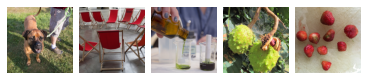

In [7]:
# optionally transform the bounds of the input space of our model
fmodel = fmodel.transform_bounds((0, 1))

# sample images
images, labels = fb.utils.samples(fmodel, dataset='imagenet', batchsize=5)

# check accuracy on sample images and plot them
accuracy = fb.utils.accuracy(fmodel, images, labels)
print('Model accuracy on sample images:', accuracy)
# print(labels)
fb.plot.images(images)
plt.show()
plt.close()

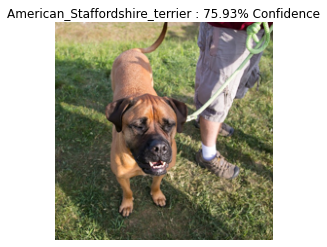

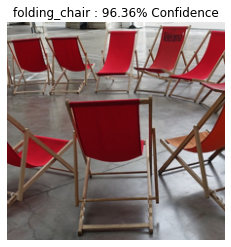

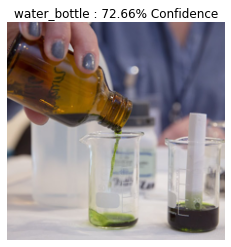

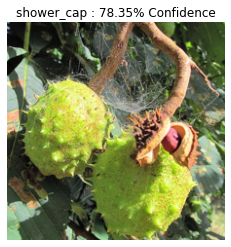

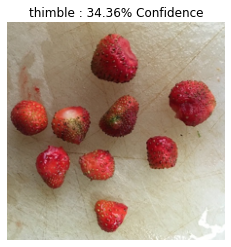

In [8]:
# Predict with pre-trained model
for x in images:
    image = np.expand_dims(x, axis=0)
    image_probs = pretrained_model.predict(image*255) # 0,1 to 0,255
    plt.figure()
    plt.imshow(x)  # To change [-1, 1] to [0,1]?
    _, image_class, class_confidence = get_imagenet_label(image_probs)
    plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
    plt.axis('off')
    plt.show()

000000000139 598 = home theater
000000000285 294 = brown bear
000000000632 750 = quilt
000000000724 919 = street sign
000000000776 973 = coral reef
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


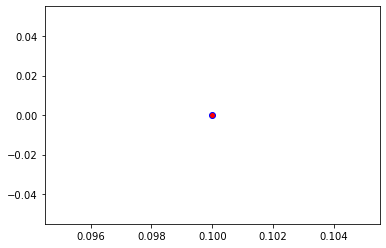

000000000785 248 = ski
000000000802 760 = refrigerator
000000000872 615 = knee pad
000000000885 752 = racket
000000001000 560 = football helmet
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


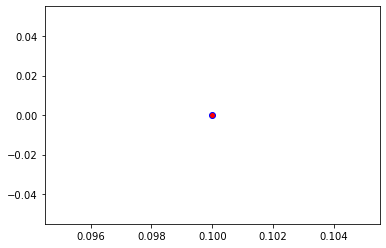

000000001268 399 = abaya
000000001296 626 = lighter
000000001353 598 = home theater
000000001425 960 = chocolate sauce
000000001490 693 = paddle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


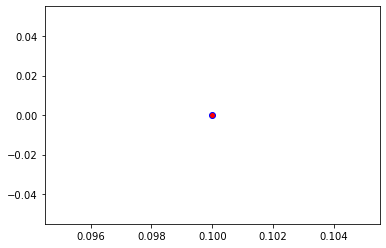

000000001503 526 = desk
000000001532 575 = golfcart
000000001584 654 = minibus
000000001675 620 = laptop
000000001761 821 = steel arch bridge
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


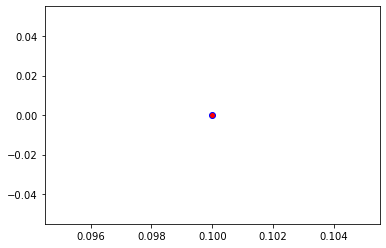

000000001818 340 = zebra
000000001993 799 = sliding door
000000002006 874 = trolleybus
000000002149 948 = Granny Smith
000000002153 904 = window screen
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


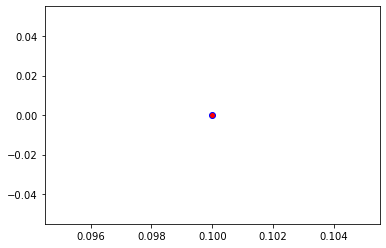

000000002157 470 = candle
000000002261 842 = swimming trunks
000000002299 842 = swimming trunks
000000002431 666 = mortar
000000002473 248 = ski
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


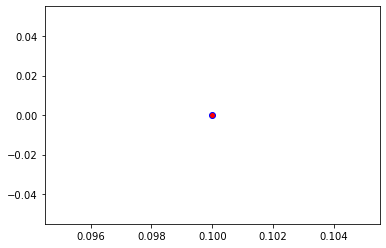

000000002532 978 = seashore
000000002587 801 = snorkel
000000002592 504 = coffee mug
000000002685 480 = cash machine
000000002923 978 = seashore
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


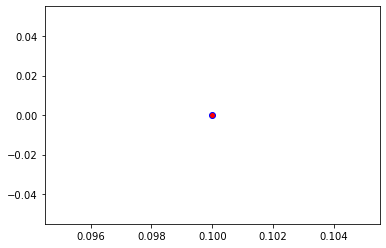

000000003156 739 = potter's wheel
000000003255 400 = gown
000000003501 461 = plate
000000003553 514 = cowboy boot
000000003661 954 = banana
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


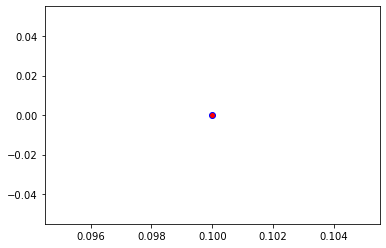

000000003845 924 = guacamole
000000003934 791 = shopping cart
000000004134 887 = vestment
000000004395 906 = Windsor tie
000000004495 831 = studio couch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


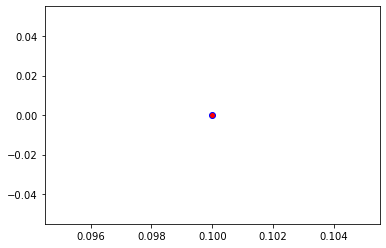

000000004765 248 = ski
000000004795 223 = schipperke
000000005001 560 = football helmet
000000005037 829 = streetcar
000000005060 611 = jigsaw puzzle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


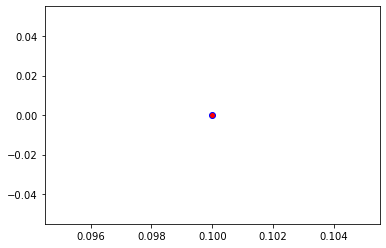

000000005193 691 = oxygen mask
000000005477 404 = airliner
000000005503 861 = toilet seat
000000005529 248 = ski
000000005586 862 = torch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


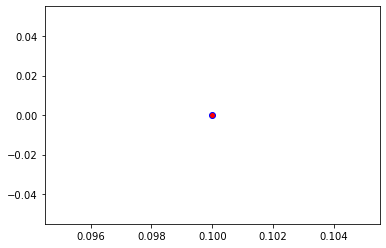

000000005600 679 = necklace
000000005992 5 = ram
000000006012 920 = traffic light
000000006040 829 = streetcar
000000006213 648 = medicine chest
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


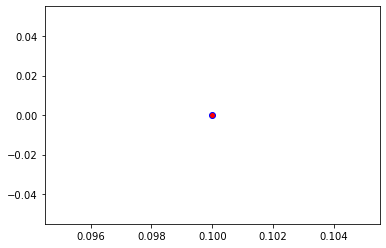

000000006460 978 = seashore
000000006471 981 = ballplayer
000000006614 149 = gong
000000006723 829 = streetcar
000000006763 570 = mask
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


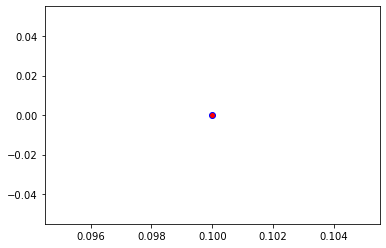

000000006771 562 = fountain
000000006818 861 = toilet seat
000000006894 581 = radiator
000000006954 768 = rugby ball
000000007088 879 = umbrella
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


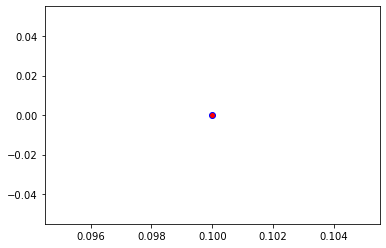

000000007108 101 = tusker
000000007278 701 = parachute
000000007281 978 = seashore
000000007386 870 = tricycle
000000007511 879 = umbrella
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


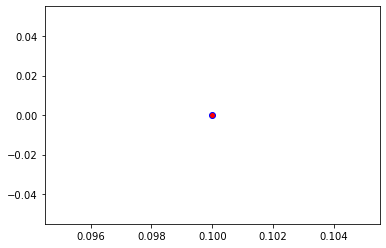

000000007574 532 = dining table
000000007784 701 = parachute
000000007795 799 = sliding door
000000007816 665 = moped
000000007818 532 = dining table
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


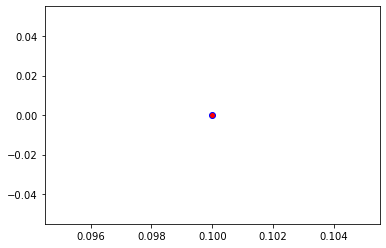

000000007888 619 = lampshade
000000007977 981 = ballplayer
000000007991 658 = mitten
000000008021 851 = television
000000008211 444 = bicycle-built-for-two
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


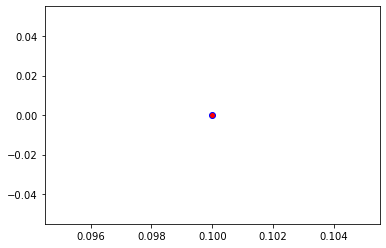

000000008277 451 = bolo tie
000000008532 862 = torch
000000008629 916 = web site
000000008690 180 = American Staffordshire terrier
000000008762 920 = traffic light
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


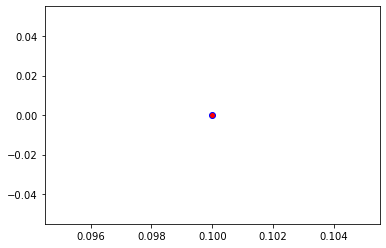

000000008844 716 = picket fence
000000008899 480 = cash machine
000000009378 818 = spotlight
000000009400 620 = laptop
000000009448 879 = umbrella
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


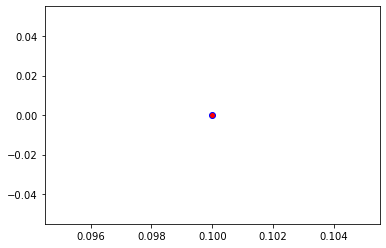

000000009483 745 = projector
000000009590 457 = bow tie
000000009769 569 = garbage truck
000000009772 435 = tub
000000009891 627 = limousine
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


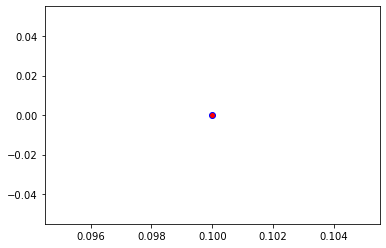

000000009914 447 = binoculars
000000010092 669 = mosquito net
000000010363 285 = Egyptian cat
000000010583 928 = ice cream
000000010707 982 = groom
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


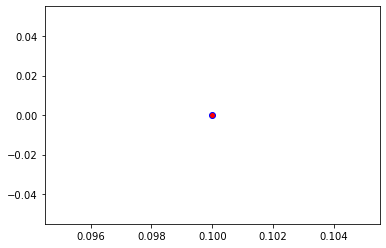

000000010764 843 = swing
000000010977 794 = shower curtain
000000010995 799 = sliding door
000000011051 639 = suit
000000011122 489 = chainlink fence
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


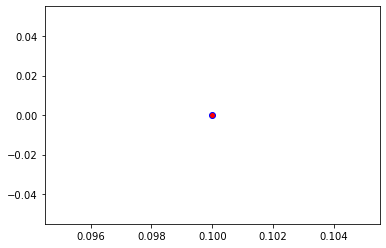

000000011149 444 = bicycle-built-for-two
000000011197 412 = ashcan
000000011511 490 = chain mail
000000011615 919 = street sign
000000011699 691 = oxygen mask
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


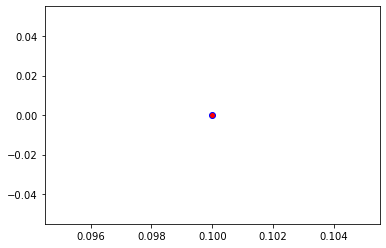

000000011760 340 = zebra
000000011813 872 = tripod
000000012062 5 = ram
000000012120 781 = scoreboard
000000012280 799 = sliding door
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


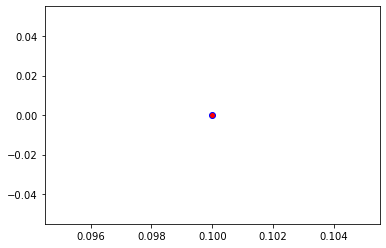

000000012576 611 = jigsaw puzzle
000000012639 981 = ballplayer
000000012667 528 = dial telephone
000000012670 667 = mortarboard
000000012748 476 = carousel
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


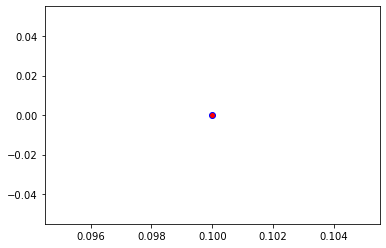

000000013004 809 = soup bowl
000000013177 880 = unicycle
000000013201 981 = ballplayer
000000013291 560 = football helmet
000000013348 404 = airliner
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


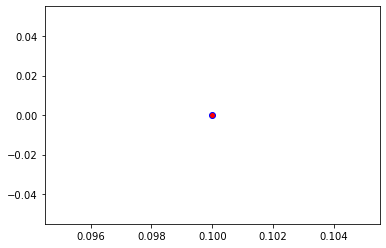

000000013546 646 = maze
000000013597 929 = ice lolly
000000013659 624 = library
000000013729 401 = accordion
000000013774 978 = seashore
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


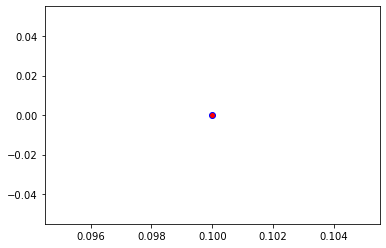

000000013923 818 = spotlight
000000014007 818 = spotlight
000000014038 423 = barber chair
000000014226 620 = laptop
000000014380 839 = suspension bridge
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


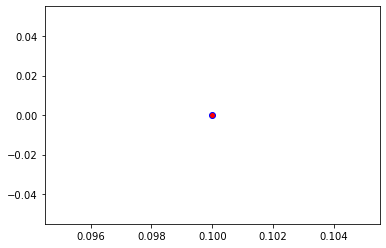

000000014439 842 = swimming trunks
000000014473 320 = damselfly
000000014831 333 = hamster
000000014888 898 = water bottle
000000015079 419 = Band Aid
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


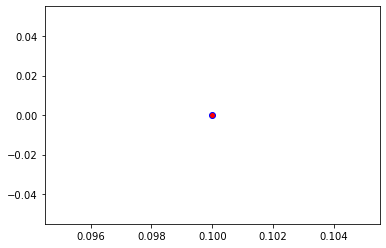

000000015254 509 = confectionery
000000015272 772 = safety pin
000000015278 947 = mushroom
000000015335 851 = television
000000015338 603 = horse cart
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


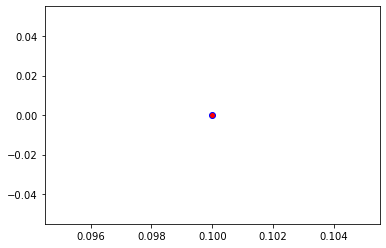

000000015440 530 = digital clock
000000015497 282 = tiger cat
000000015517 582 = grocery store
000000015597 755 = radio telescope
000000015660 978 = seashore
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


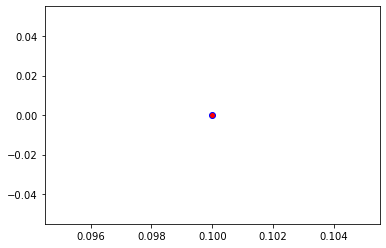

000000015746 756 = rain barrel
000000015751 113 = nail
000000015956 237 = miniature pinscher
000000016010 355 = llama
000000016228 575 = golfcart
Min values in image-array: 0.060264587 Max values in image-array: 255.0
Min values in image-array: 0.00023633172 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


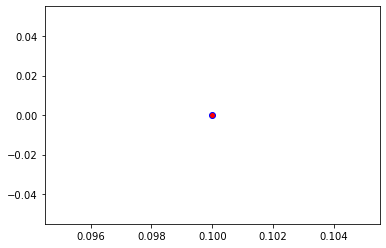

000000016249 603 = horse cart
000000016439 526 = desk
000000016451 978 = seashore
000000016502 797 = sleeping bag
000000016598 585 = hair spray
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


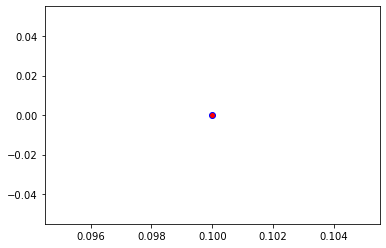

000000016958 532 = dining table
000000017029 205 = flat-coated retriever
000000017031 596 = hatchet
000000017115 340 = zebra
000000017178 444 = bicycle-built-for-two
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


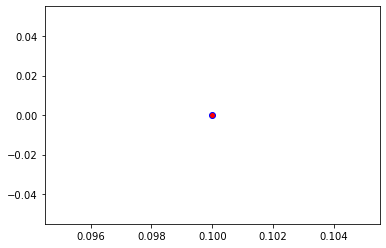

000000017182 519 = crate
000000017207 654 = minibus
000000017379 435 = bathtub
000000017436 703 = park bench
000000017627 412 = ashcan
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


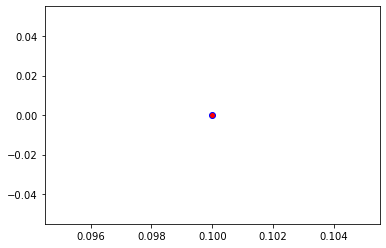

000000017714 633 = loupe
000000017899 706 = patio
000000017905 920 = traffic light
000000017959 723 = pinwheel
000000018150 611 = jigsaw puzzle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


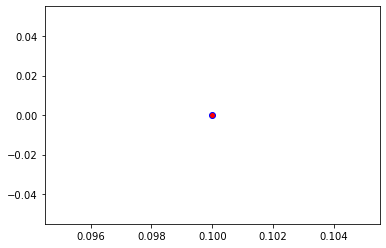

000000018193 570 = mask
000000018380 297 = slot
000000018491 981 = ballplayer
000000018519 702 = parallel bars
000000018575 679 = necklace
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


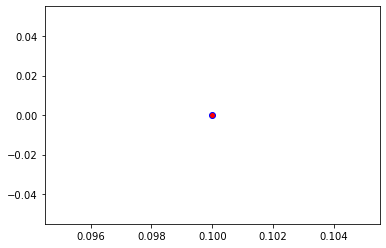

000000018737 612 = jinrikisha
000000018770 906 = Windsor tie
000000018833 770 = running shoe
000000018837 864 = tow truck
000000019042 977 = sandbar
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


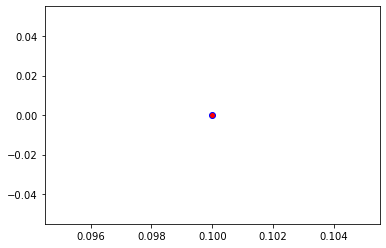

000000019109 297 = slot
000000019221 937 = broccoli
000000019402 626 = lighter
000000019432 752 = racket
000000019742 572 = goblet
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


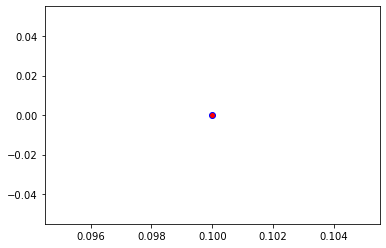

000000019786 457 = bow tie
000000019924 515 = cowboy hat
000000020059 340 = zebra
000000020107 412 = ashcan
000000020247 296 = ice bear
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


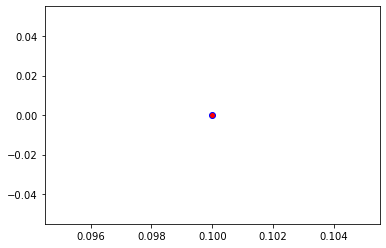

000000020333 793 = shower cap
000000020553 695 = padlock
000000020571 536 = dock
000000020992 457 = bow tie
000000021167 457 = bow tie
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


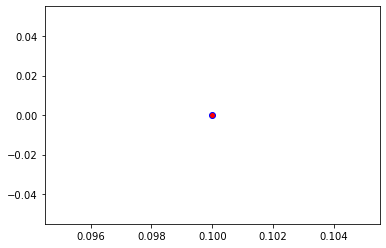

000000021465 644 = matchstick
000000021503 858 = tile roof
000000021604 457 = bow tie
000000021839 498 = cinema
000000021879 445 = bikini
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


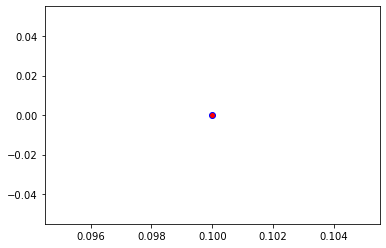

000000021903 385 = Indian elephant
000000022192 721 = pillow
000000022371 681 = notebook
000000022396 812 = space shuttle
000000022479 843 = swing
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


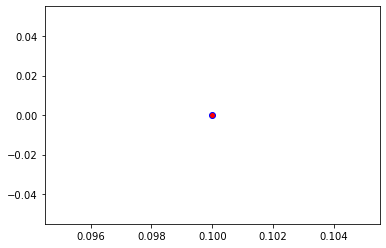

000000022589 228 = komondor
000000022623 761 = remote control
000000022705 655 = miniskirt
000000022755 545 = electric fan
000000022892 237 = miniature pinscher
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


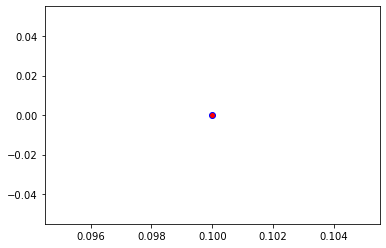

000000022935 805 = soccer ball
000000022969 251 = dalmatian
000000023023 626 = lighter
000000023034 955 = jackfruit
000000023126 843 = swing
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


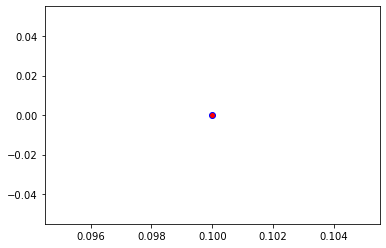

000000023230 562 = fountain
000000023272 324 = cab
000000023359 248 = ski
000000023666 896 = washbasin
000000023751 879 = umbrella
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


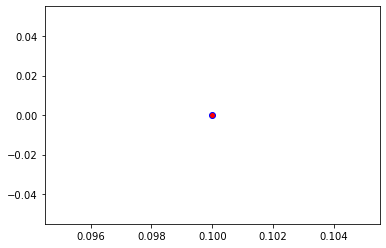

000000023781 938 = cauliflower
000000023899 982 = groom
000000023937 203 = West Highland white terrier
000000024021 488 = chain
000000024027 657 = missile
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


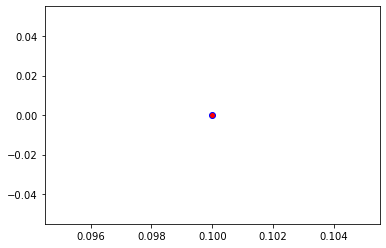

000000024144 461 = breastplate
000000024243 568 = fur coat
000000024567 611 = jigsaw puzzle
000000024610 532 = dining table
000000024919 101 = tusker
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


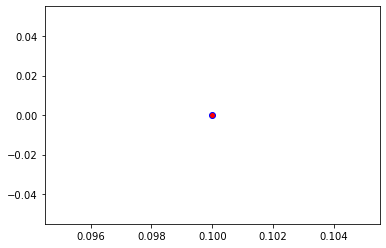

000000025057 768 = rugby ball
000000025096 611 = jigsaw puzzle
000000025139 340 = zebra
000000025181 705 = passenger car
000000025228 982 = groom
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


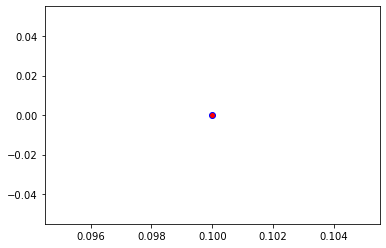

000000025386 611 = jigsaw puzzle
000000025393 875 = trombone
000000025394 868 = tray
000000025424 752 = racket
000000025560 480 = cash machine
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


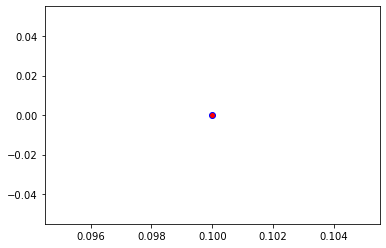

000000025593 919 = street sign
000000025603 762 = restaurant
000000025986 965 = burrito
000000026204 324 = cab
000000026465 620 = laptop
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


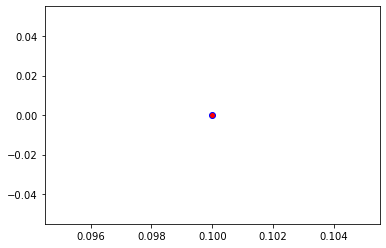

000000026564 526 = desk
000000026690 598 = home theater
000000026926 637 = mailbox
000000026941 561 = forklift
000000027186 905 = window shade
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


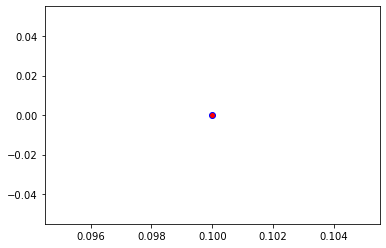

000000027620 532 = dining table
000000027696 924 = guacamole
000000027768 874 = trolleybus
000000027932 125 = hermit crab
000000027972 916 = web site
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


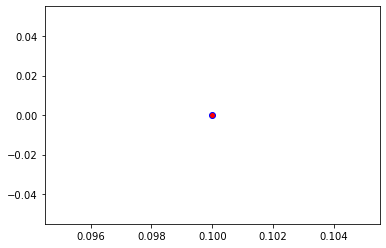

000000027982 896 = washbasin
000000028285 538 = dome
000000028449 386 = African elephant
000000028452 760 = refrigerator
000000028809 788 = shoe shop
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


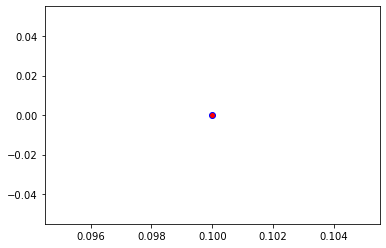

000000028993 412 = ashcan
000000029187 354 = Arabian camel
000000029393 177 = Scottish deerhound
000000029397 458 = brass
000000029596 581 = radiator
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


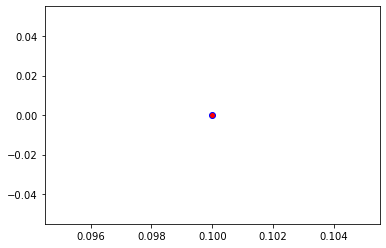

000000029640 28 = pot
000000029675 506 = coil
000000029984 879 = umbrella
000000030213 706 = patio
000000030494 162 = beagle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


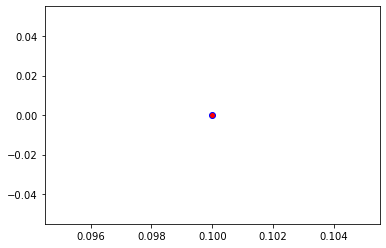

000000030504 248 = ski
000000030675 569 = garbage truck
000000030785 461 = plate
000000030828 406 = altar
000000031050 883 = vase
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


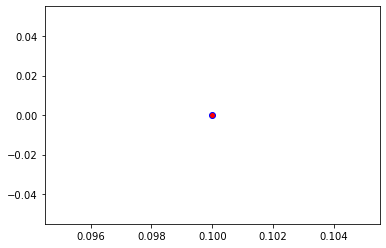

000000031093 727 = planetarium
000000031118 839 = suspension bridge
000000031217 752 = racket
000000031248 532 = dining table
000000031269 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


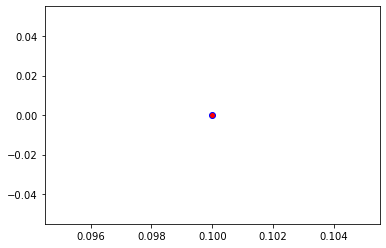

000000031296 532 = dining table
000000031322 737 = pop bottle
000000031620 669 = mosquito net
000000031735 532 = dining table
000000031749 409 = analog clock
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


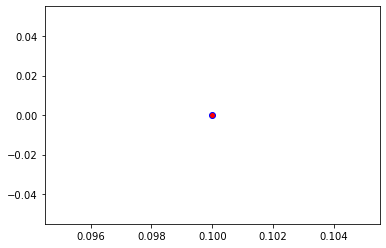

000000031817 410 = apiary
000000032038 864 = wreck
000000032081 752 = racket
000000032285 794 = shower curtain
000000032334 572 = goblet
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


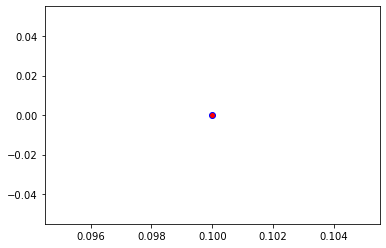

000000032570 801 = snorkel
000000032610 620 = laptop
000000032735 248 = ski
000000032811 799 = sliding door
000000032817 700 = paper towel
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


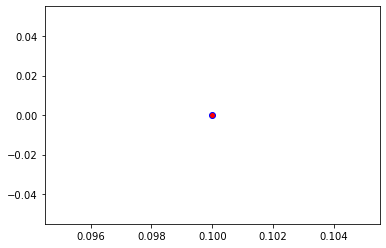

000000032861 793 = shower cap
000000032887 646 = maze
000000032901 617 = lab coat
000000032941 412 = ashcan
000000033005 752 = racket
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


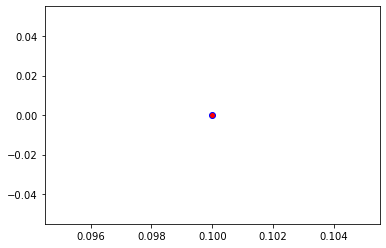

000000033104 248 = ski
000000033109 569 = garbage truck
000000033114 778 = scale
000000033221 801 = snorkel
000000033368 746 = puck
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


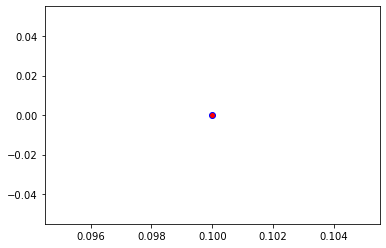

000000033638 575 = golfcart
000000033707 562 = fountain
000000033759 981 = ballplayer
000000033854 717 = pickup
000000034071 704 = parking meter
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


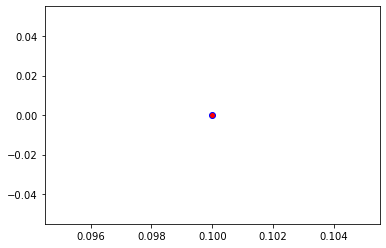

000000034139 636 = mailbag
000000034205 937 = broccoli
000000034257 664 = monitor
000000034417 324 = cab
000000034452 843 = swing
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


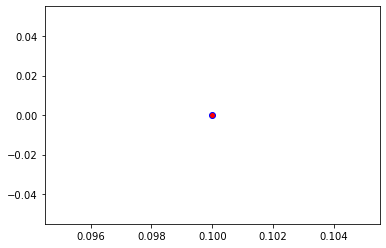

000000034760 794 = shower curtain
000000034873 896 = washbasin
000000035062 794 = shower curtain
000000035197 746 = puck
000000035279 632 = loudspeaker
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


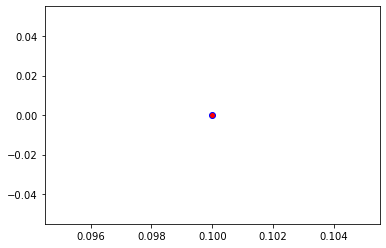

000000035326 905 = window shade
000000035682 613 = joystick
000000035770 712 = Petri dish
000000035963 458 = brass
000000036494 297 = slot
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


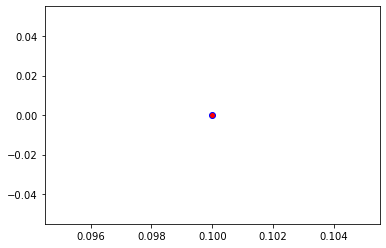

000000036539 248 = ski
000000036660 464 = buckle
000000036678 576 = gondola
000000036844 556 = screen
000000036861 704 = parking meter
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


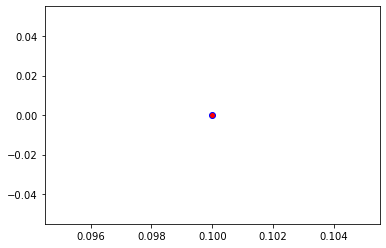

000000036936 982 = groom
000000037670 861 = toilet seat
000000037689 248 = ski
000000037740 526 = desk
000000037751 237 = miniature pinscher
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


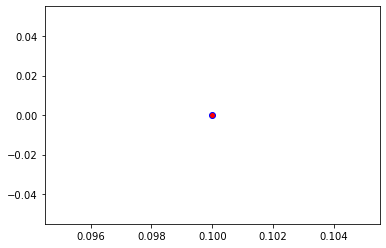

000000037777 435 = bathtub
000000037988 752 = racket
000000038048 575 = golfcart
000000038070 861 = toilet seat
000000038118 248 = ski
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


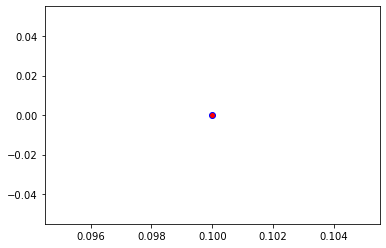

000000038210 248 = ski
000000038576 527 = desktop computer
000000038678 909 = wok
000000038825 340 = zebra
000000038829 880 = unicycle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


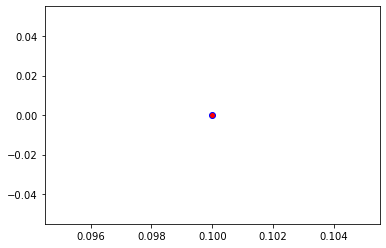

000000039405 981 = ballplayer
000000039477 905 = window shade
000000039480 752 = racket
000000039484 324 = cab
000000039551 752 = racket
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


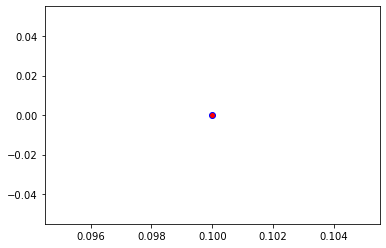

000000039670 757 = recreational vehicle
000000039769 265 = toy poodle
000000039785 145 = king penguin
000000039914 843 = swing
000000039951 752 = racket
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


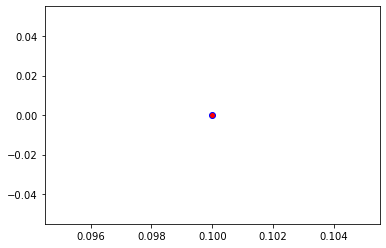

000000039956 532 = dining table
000000040036 676 = muzzle
000000040083 423 = barber chair
000000040471 423 = barber chair
000000040757 750 = quilt
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


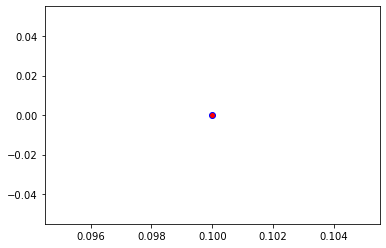

000000041488 781 = scoreboard
000000041633 569 = garbage truck
000000041635 37 = ox
000000041872 598 = home theater
000000041888 85 = quail
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


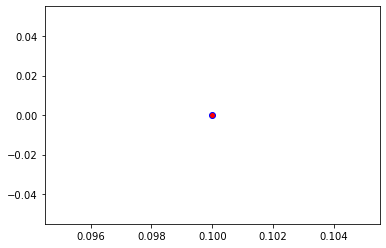

000000041990 248 = ski
000000042070 874 = trolleybus
000000042102 639 = suit
000000042178 791 = shopping cart
000000042276 532 = dining table
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


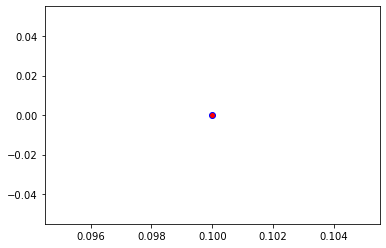

000000042296 296 = ice bear
000000042528 596 = hatchet
000000042563 407 = ambulance
000000042628 792 = shovel
000000042888 919 = street sign
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


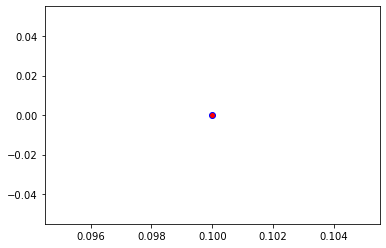

000000042889 620 = laptop
000000043314 248 = ski
000000043435 978 = seashore
000000043581 470 = candle
000000043737 409 = analog clock
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


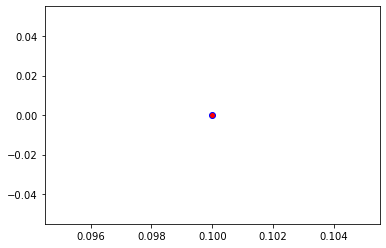

000000043816 981 = ballplayer
000000044068 765 = rocking chair
000000044195 413 = assault rifle
000000044260 562 = fountain
000000044279 617 = lab coat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


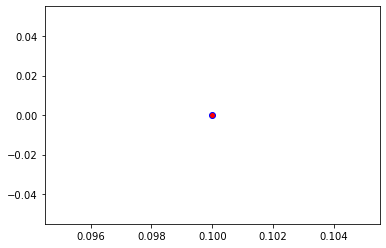

000000044590 140 = alp
000000044652 744 = projectile
000000044699 161 = basset
000000044877 752 = racket
000000045070 515 = cowboy hat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


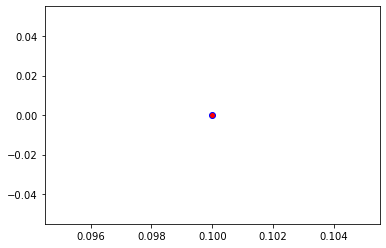

000000045090 978 = seashore
000000045229 495 = china cabinet
000000045472 855 = thimble
000000045550 443 = bib
000000045596 799 = sliding door
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


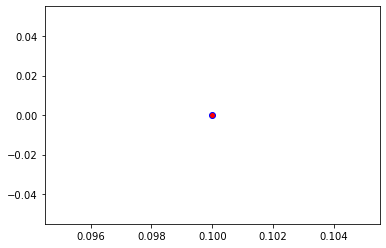

000000045728 109 = brain coral
000000046031 527 = desktop computer
000000046048 750 = quilt
000000046252 248 = ski
000000046378 258 = Samoyed
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


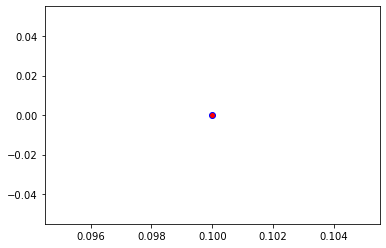

000000046463 691 = oxygen mask
000000046497 223 = schipperke
000000046804 5 = ram
000000046872 569 = garbage truck
000000047010 251 = dalmatian
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


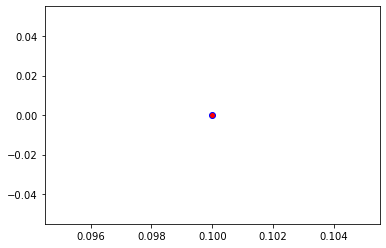

000000047112 762 = restaurant
000000047121 435 = tub
000000047571 690 = oxcart
000000047585 575 = golfcart
000000047740 838 = sunscreen
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


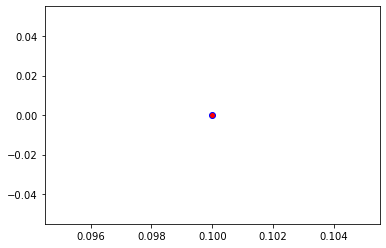

000000047769 532 = dining table
000000047801 761 = remote control
000000047819 461 = breastplate
000000047828 324 = cab
000000048153 806 = sock
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


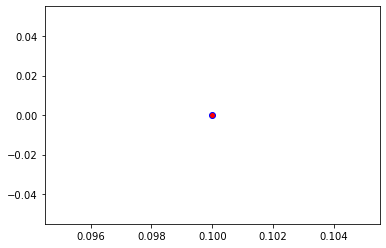

000000048396 411 = apron
000000048504 386 = African elephant
000000048555 37 = ox
000000048564 641 = maraca
000000048924 955 = jackfruit
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


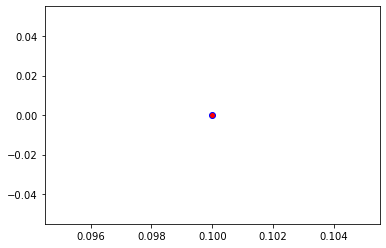

000000049060 705 = passenger car
000000049091 324 = cab
000000049259 693 = paddle
000000049269 676 = muzzle
000000049759 862 = torch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


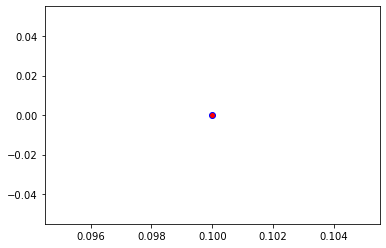

000000049761 349 = bighorn
000000049810 383 = Madagascar cat
000000050006 536 = dock
000000050145 444 = bicycle-built-for-two
000000050149 824 = stole
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


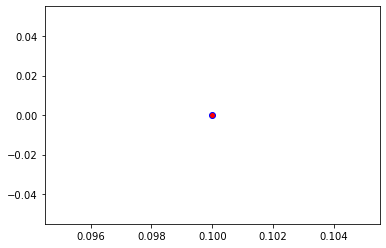

000000050165 565 = freight car
000000050326 843 = swing
000000050331 938 = cauliflower
000000050380 389 = barracouta
000000050638 3 = tiger
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


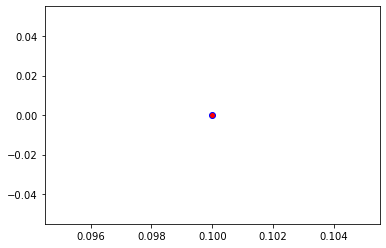

000000050679 84 = peacock
000000050811 982 = groom
000000050828 831 = studio couch
000000050844 611 = jigsaw puzzle
000000050896 574 = golf ball
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


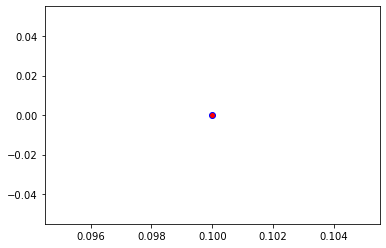

000000050943 803 = snowplow
000000051008 620 = laptop
000000051309 386 = African elephant
000000051314 978 = seashore
000000051326 684 = ocarina
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


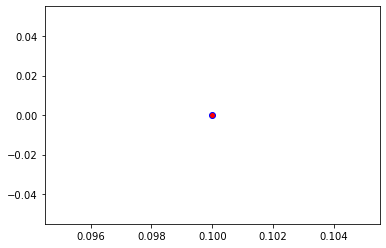

000000051598 896 = washbasin
000000051610 423 = barber chair
000000051712 792 = shovel
000000051738 564 = four-poster
000000051938 248 = ski
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


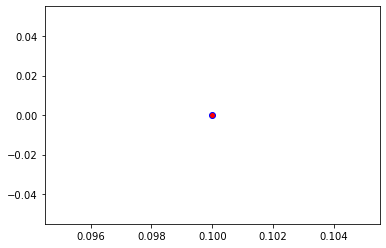

000000051961 324 = cab
000000051976 978 = seashore
000000052007 569 = garbage truck
000000052017 318 = wing
000000052412 318 = wing
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


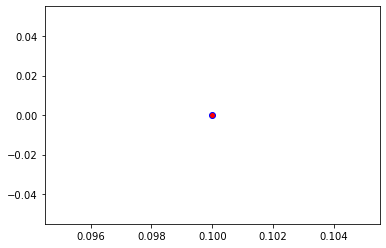

000000052413 419 = Band Aid
000000052462 340 = zebra
000000052507 978 = seashore
000000052565 37 = ox
000000052591 872 = tripod
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


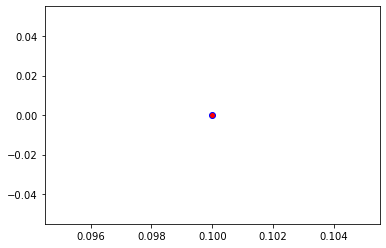

000000052891 173 = Ibizan hound
000000052996 898 = water bottle
000000053505 760 = refrigerator
000000053529 840 = swab
000000053624 386 = African elephant
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


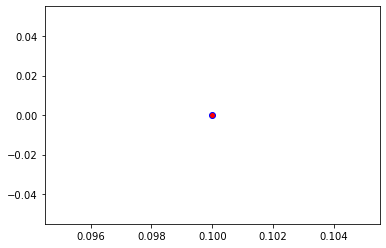

000000053626 248 = ski
000000053909 605 = iPod
000000053994 704 = parking meter
000000054123 340 = zebra
000000054164 445 = bikini
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


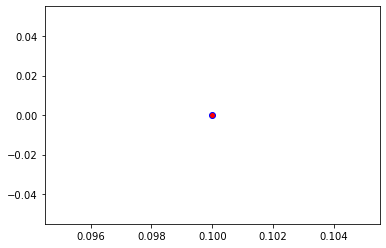

000000054592 792 = shovel
000000054593 890 = volleyball
000000054605 470 = candle
000000054628 619 = lampshade
000000054654 822 = steel drum
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


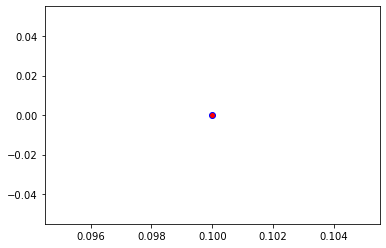

000000054931 676 = muzzle
000000054967 920 = traffic light
000000055002 861 = toilet seat
000000055022 444 = bicycle-built-for-two
000000055072 293 = cheetah
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


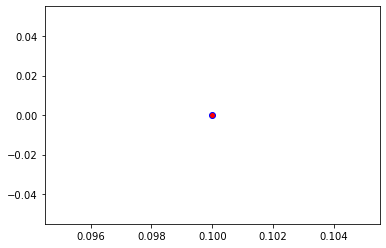

000000055150 324 = cab
000000055167 829 = streetcar
000000055299 460 = breakwater
000000055528 898 = water bottle
000000055950 752 = racket
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


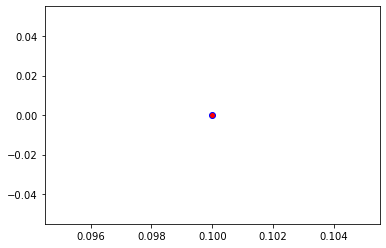

000000056127 736 = pool table
000000056288 928 = ice cream
000000056344 556 = screen
000000056350 947 = mushroom
000000056545 16 = bulbul
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


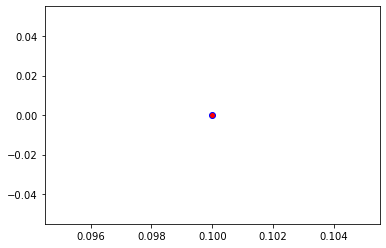

000000057027 386 = African elephant
000000057149 734 = police van
000000057150 865 = toyshop
000000057232 877 = turnstile
000000057238 760 = refrigerator
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


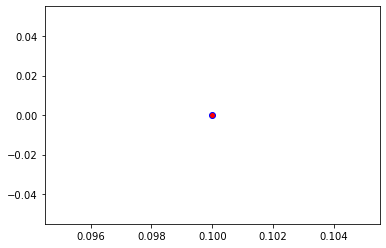

000000057244 820 = steam locomotive
000000057597 805 = soccer ball
000000057672 693 = paddle
000000057725 791 = shopping cart
000000057760 978 = seashore
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


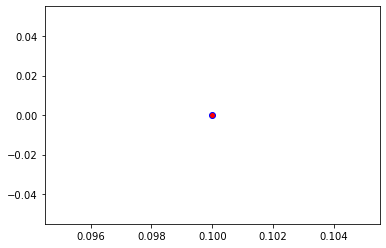

000000058029 896 = washbasin
000000058111 283 = Persian cat
000000058350 691 = oxygen mask
000000058384 975 = lakeside
000000058393 703 = park bench
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


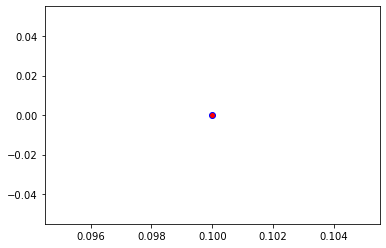

000000058539 639 = suit
000000058636 919 = street sign
000000058655 807 = solar dish
000000058705 887 = vestment
000000059044 617 = lab coat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


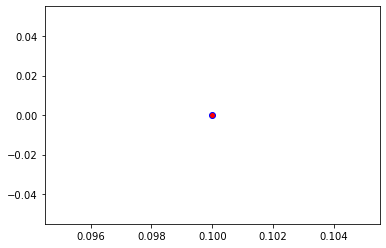

000000059386 251 = dalmatian
000000059598 916 = web site
000000059635 227 = kelpie
000000059920 794 = shower curtain
000000060052 149 = gong
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


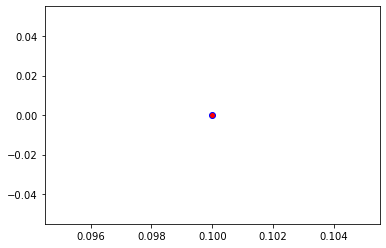

000000060090 547 = electric locomotive
000000060102 560 = football helmet
000000060347 843 = swing
000000060363 409 = analog clock
000000060449 706 = patio
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


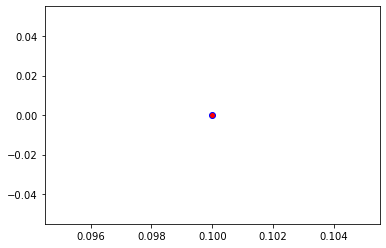

000000060507 151 = Chihuahua
000000060770 340 = zebra
000000060823 203 = West Highland white terrier
000000060835 383 = Madagascar cat
000000060855 398 = abacus
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


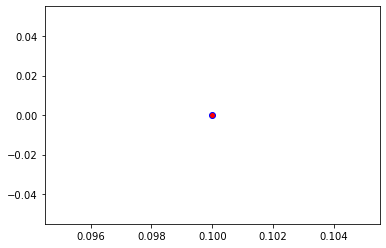

000000060886 981 = ballplayer
000000060899 265 = toy poodle
000000060932 617 = lab coat
000000061108 870 = tricycle
000000061171 222 = kuvasz
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


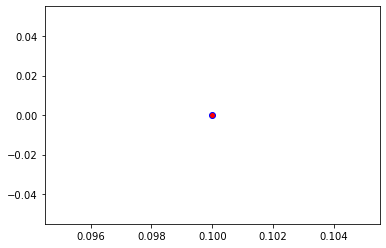

000000061268 920 = traffic light
000000061333 284 = Siamese cat
000000061418 791 = shopping cart
000000061471 176 = Saluki
000000061584 209 = Chesapeake Bay retriever
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


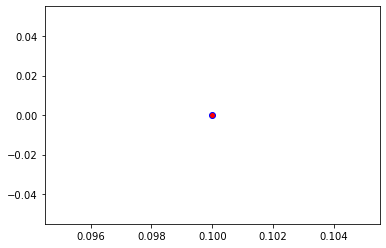

000000061658 973 = coral reef
000000061747 248 = ski
000000061960 721 = pillow
000000062025 896 = washbasin
000000062353 716 = picket fence
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


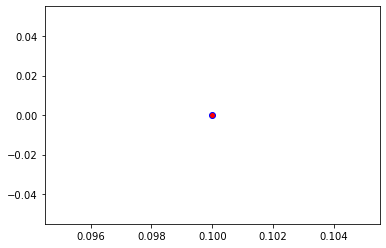

000000062355 772 = safety pin
000000062554 924 = guacamole
000000062692 752 = racket
000000062808 909 = wok
000000063047 898 = water bottle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


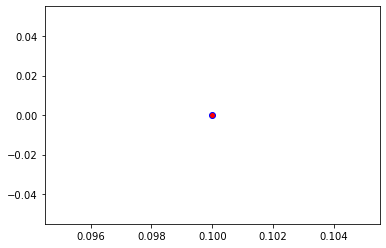

000000063154 978 = seashore
000000063552 282 = tiger cat
000000063602 556 = screen
000000063740 526 = desk
000000063965 971 = bubble
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


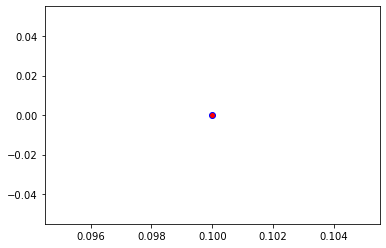

000000064084 898 = water bottle
000000064359 340 = zebra
000000064462 248 = ski
000000064495 704 = parking meter
000000064499 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


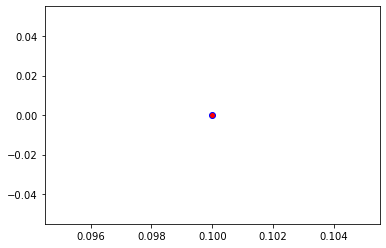

000000064523 716 = picket fence
000000064574 4 = hammer
000000064718 615 = knee pad
000000064868 534 = dishwasher
000000064898 978 = seashore
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


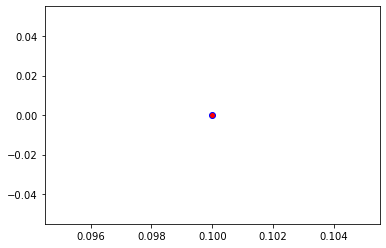

000000065074 750 = quilt
000000065288 791 = shopping cart
000000065350 646 = maze
000000065455 825 = stone wall
000000065485 609 = jeep
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


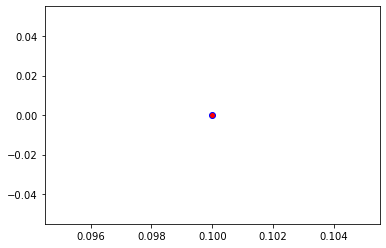

000000065736 752 = racket
000000065798 981 = ballplayer
000000066038 879 = umbrella
000000066135 547 = electric locomotive
000000066231 617 = lab coat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


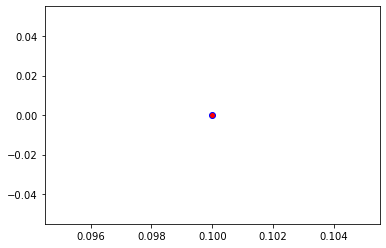

000000066523 669 = mosquito net
000000066561 5 = ram
000000066635 527 = desktop computer
000000066706 464 = buckle
000000066771 512 = corkscrew
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


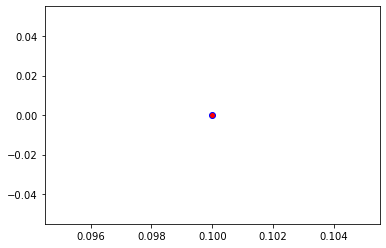

000000066817 584 = hair slide
000000066841 526 = desk
000000066886 570 = mask
000000066926 506 = coil
000000067180 843 = swing
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


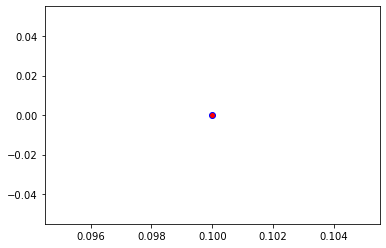

000000067213 235 = German shepherd
000000067310 981 = ballplayer
000000067315 639 = suit
000000067406 576 = gondola
000000067534 457 = bow tie
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


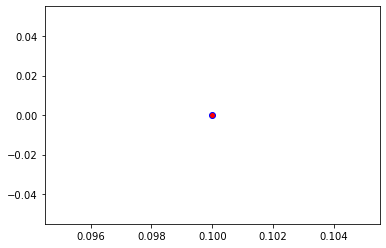

000000067616 324 = cab
000000067896 409 = analog clock
000000068078 896 = washbasin
000000068093 801 = snorkel
000000068286 831 = studio couch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


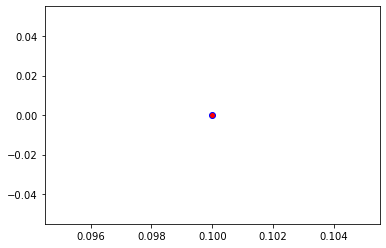

000000068387 646 = maze
000000068409 467 = butcher shop
000000068628 421 = bannister
000000068765 508 = computer keyboard
000000068833 556 = screen
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


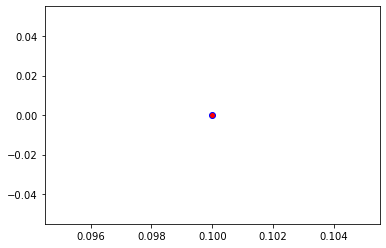

000000068933 340 = zebra
000000069106 340 = zebra
000000069138 704 = parking meter
000000069213 457 = bow tie
000000069224 617 = lab coat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


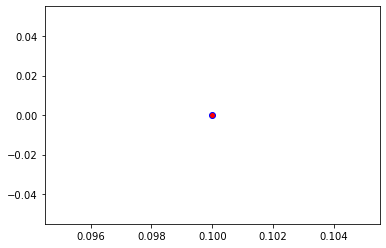

000000069356 898 = water bottle
000000069795 843 = swing
000000070048 28 = pot
000000070158 340 = zebra
000000070229 349 = bighorn
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


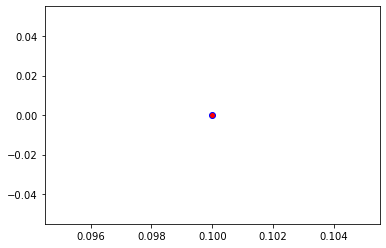

000000070254 829 = streetcar
000000070739 887 = vestment
000000070774 954 = banana
000000071226 529 = diaper
000000071451 750 = quilt
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


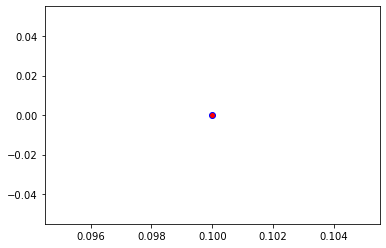

000000071711 812 = space shuttle
000000071756 280 = grey fox
000000071877 898 = water bottle
000000071938 481 = cassette
000000072281 515 = cowboy hat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


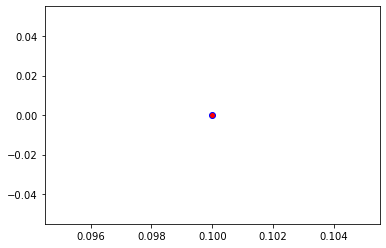

000000072795 781 = scoreboard
000000072813 171 = Italian greyhound
000000072852 480 = cash machine
000000073118 850 = teddy
000000073153 955 = jackfruit
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


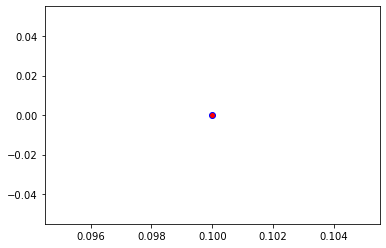

000000073326 886 = vending machine
000000073533 796 = ski mask
000000073702 830 = stretcher
000000073946 570 = mask
000000074058 476 = carousel
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


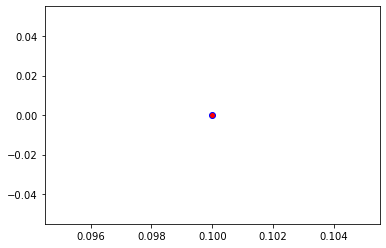

000000074092 981 = ballplayer
000000074200 405 = airship
000000074209 532 = dining table
000000074256 608 = jean
000000074457 706 = patio
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


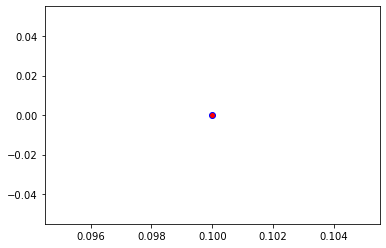

000000074646 978 = seashore
000000074733 470 = candle
000000074860 696 = paintbrush
000000075393 898 = water bottle
000000075456 818 = spotlight
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


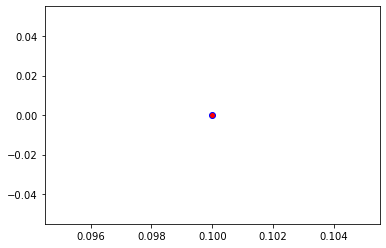

000000075612 620 = laptop
000000076211 498 = cinema
000000076261 23 = vulture
000000076416 704 = parking meter
000000076417 254 = pug
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


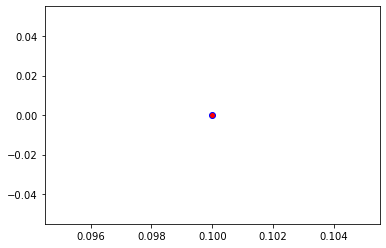

000000076468 781 = scoreboard
000000076547 612 = jinrikisha
000000076625 829 = streetcar
000000076731 662 = modem
000000077396 851 = television
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


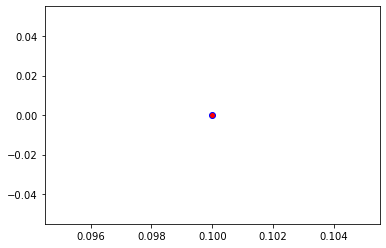

000000077460 958 = hay
000000077595 285 = Egyptian cat
000000078032 706 = patio
000000078170 851 = television
000000078266 762 = restaurant
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


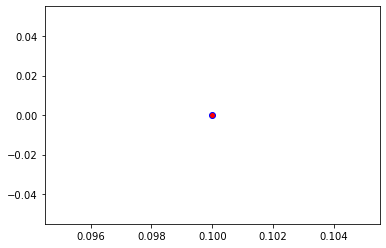

000000078404 445 = bikini
000000078420 620 = laptop
000000078426 285 = Egyptian cat
000000078565 780 = schooner
000000078748 870 = tricycle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


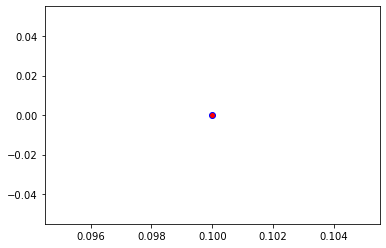

000000078823 704 = parking meter
000000078843 570 = gasmask
000000078915 805 = soccer ball
000000078959 954 = banana
000000079014 836 = sunglass
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


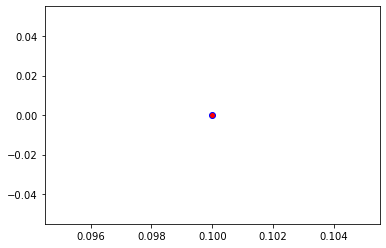

000000079031 433 = bathing cap
000000079034 562 = fountain
000000079144 373 = macaque
000000079188 290 = jaguar
000000079229 173 = Ibizan hound
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


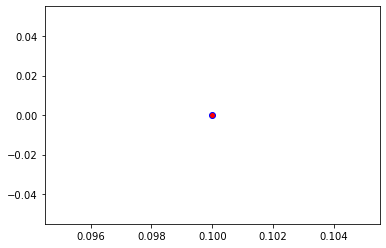

000000079408 919 = street sign
000000079565 646 = maze
000000079588 324 = cab
000000079651 440 = beer bottle
000000079837 978 = seashore
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


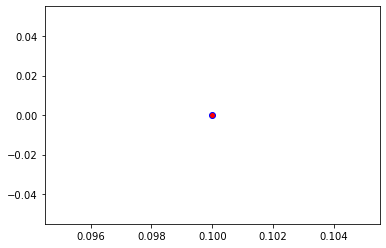

000000079969 916 = web site
000000080022 752 = racket
000000080057 855 = thimble
000000080153 248 = ski
000000080273 248 = ski
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


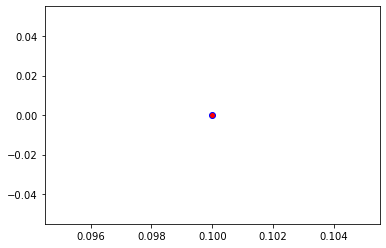

000000080274 386 = African elephant
000000080340 706 = patio
000000080413 627 = limousine
000000080659 676 = muzzle
000000080666 284 = Siamese cat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


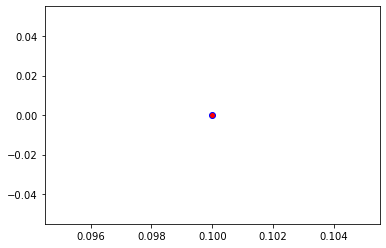

000000080671 248 = ski
000000080932 611 = jigsaw puzzle
000000080949 620 = laptop
000000081061 831 = studio couch
000000081394 791 = shopping cart
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


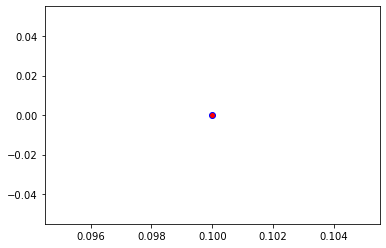

000000081594 489 = chainlink fence
000000081738 999 = toilet tissue
000000081766 256 = Newfoundland
000000081988 978 = seashore
000000082085 705 = passenger car
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


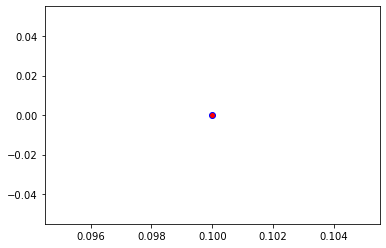

000000082180 765 = rocking chair
000000082688 570 = gasmask
000000082696 250 = Siberian husky
000000082715 801 = snorkel
000000082765 669 = mosquito net
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


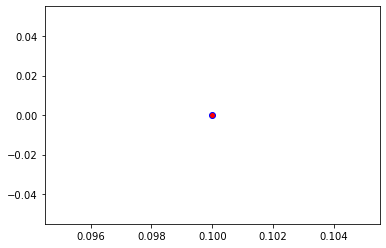

000000082807 219 = cocker spaniel
000000082812 456 = bow
000000082821 449 = boathouse
000000082846 829 = streetcar
000000082986 562 = fountain
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


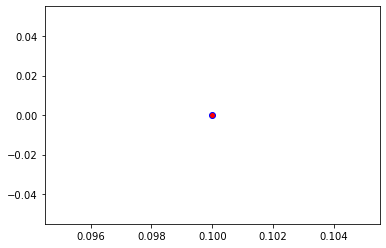

000000083113 386 = African elephant
000000083172 781 = scoreboard
000000083531 898 = water bottle
000000083540 500 = cliff
000000084031 602 = horizontal bar
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


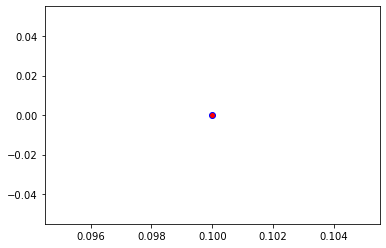

000000084170 654 = minibus
000000084241 909 = wok
000000084270 297 = slot
000000084362 598 = home theater
000000084431 827 = stove
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


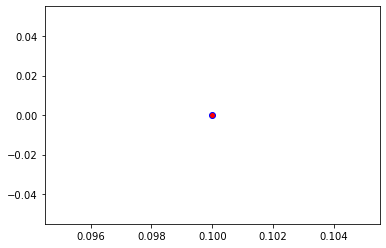

000000084477 559 = folding chair
000000084492 421 = bannister
000000084650 412 = ashcan
000000084664 461 = plate
000000084674 529 = diaper
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


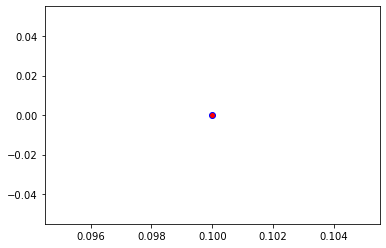

000000084752 404 = airliner
000000085089 572 = goblet
000000085157 614 = kimono
000000085195 898 = water bottle
000000085329 570 = mask
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


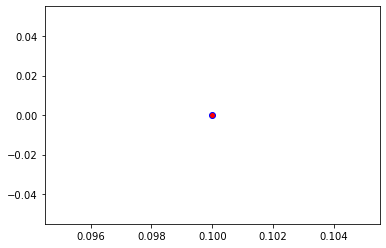

000000085376 665 = moped
000000085478 296 = ice bear
000000085576 999 = toilet tissue
000000085665 879 = umbrella
000000085682 248 = ski
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


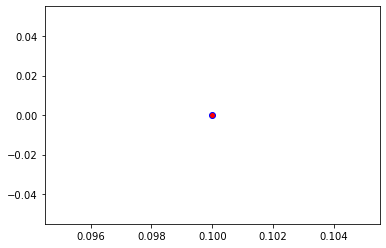

000000085772 752 = racket
000000085823 340 = zebra
000000085911 203 = West Highland white terrier
000000086220 829 = streetcar
000000086483 919 = street sign
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


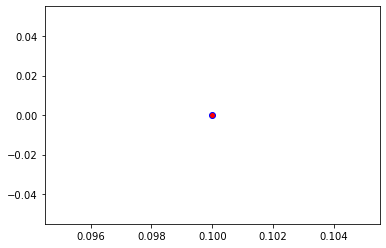

000000086582 620 = laptop
000000086755 248 = ski
000000086956 642 = marimba
000000087038 880 = unicycle
000000087144 843 = swing
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


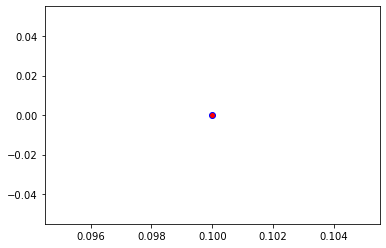

000000087244 899 = water jug
000000087470 349 = bighorn
000000087476 791 = shopping cart
000000087742 532 = dining table
000000087875 189 = Lakeland terrier
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


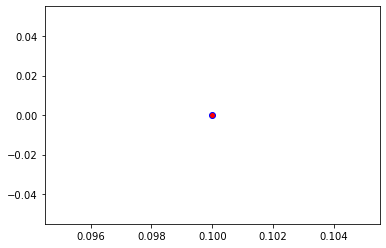

000000088040 532 = dining table
000000088218 920 = traffic light
000000088250 386 = African elephant
000000088265 603 = horse cart
000000088269 809 = soup bowl
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


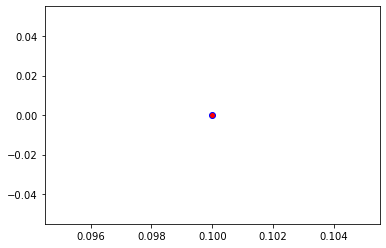

000000088345 691 = oxygen mask
000000088432 799 = sliding door
000000088462 779 = school bus
000000088485 971 = bubble
000000088848 916 = web site
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


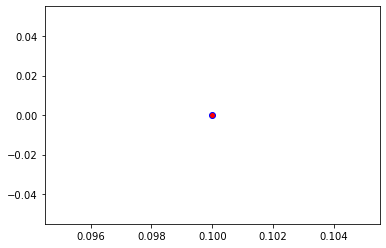

000000088951 462 = broom
000000088970 752 = racket
000000089045 831 = studio couch
000000089078 248 = ski
000000089271 452 = bonnet
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


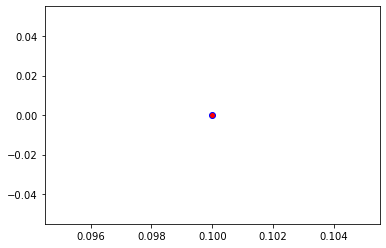

000000089296 233 = Bouvier des Flandres
000000089556 656 = minivan
000000089648 695 = padlock
000000089670 746 = puck
000000089697 562 = fountain
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


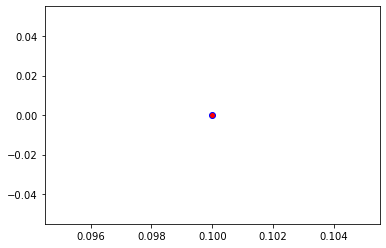

000000089761 835 = sundial
000000089880 178 = Weimaraner
000000090003 265 = toy poodle
000000090062 37 = ox
000000090108 794 = shower curtain
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


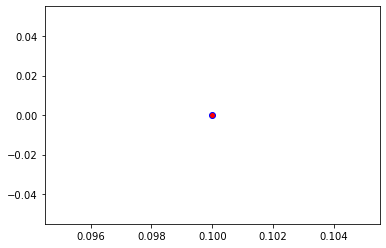

000000090155 576 = gondola
000000090208 407 = ambulance
000000090284 248 = ski
000000090631 404 = airliner
000000090891 991 = coral fungus
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


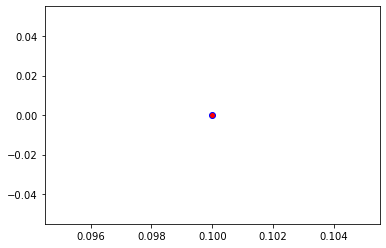

000000090956 248 = ski
000000091406 898 = water bottle
000000091495 560 = football helmet
000000091500 982 = groom
000000091615 651 = microwave
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


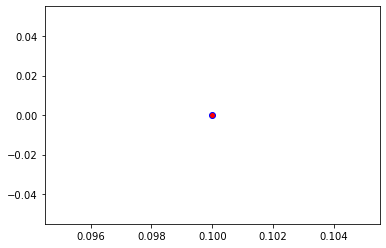

000000091619 919 = street sign
000000091654 818 = spotlight
000000091779 470 = candle
000000091921 340 = zebra
000000092053 461 = plate
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


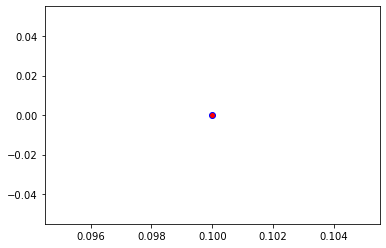

000000092091 721 = pillow
000000092124 794 = shower curtain
000000092177 626 = lighter
000000092416 639 = suit
000000092660 818 = spotlight
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


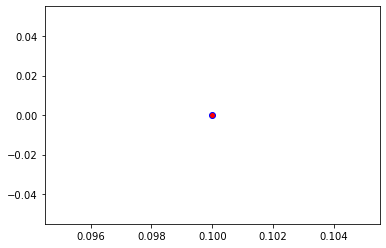

000000092839 296 = ice bear
000000092939 793 = shower cap
000000093154 920 = traffic light
000000093261 445 = bikini
000000093353 452 = bonnet
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


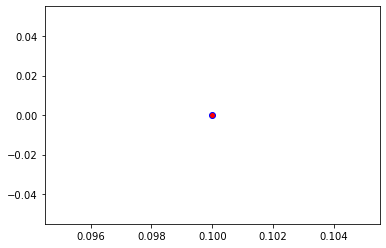

000000093437 887 = vestment
000000093717 491 = chain saw
000000093965 340 = zebra
000000094157 442 = bell cote
000000094185 886 = vending machine
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


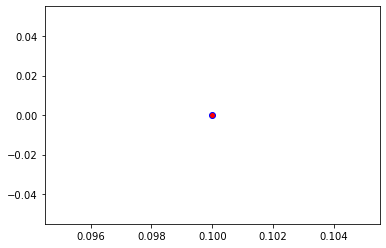

000000094326 89 = sulphur-crested cockatoo
000000094336 435 = tub
000000094614 248 = ski
000000094751 818 = spotlight
000000094852 386 = African elephant
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


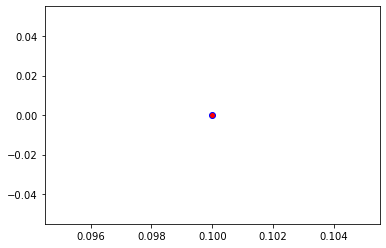

000000094871 5 = ram
000000094944 792 = shovel
000000095069 498 = palace
000000095155 248 = ski
000000095707 807 = solar dish
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


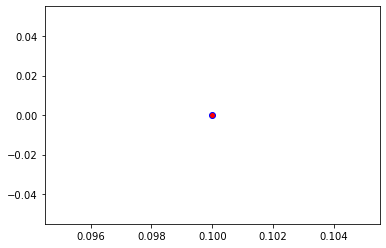

000000095786 883 = vase
000000095843 915 = yurt
000000095862 355 = llama
000000095899 134 = crane
000000096001 623 = letter opener
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


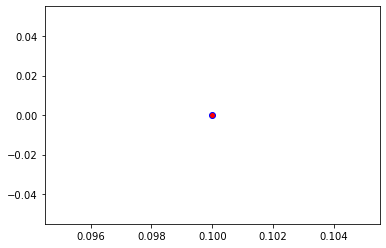

000000096427 752 = racket
000000096493 434 = bath towel
000000096549 404 = airliner
000000096825 354 = Arabian camel
000000096960 296 = ice bear
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


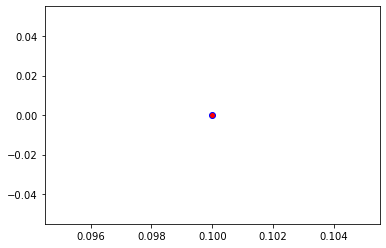

000000097022 651 = microwave
000000097230 101 = tusker
000000097278 796 = ski mask
000000097337 556 = screen
000000097585 572 = goblet
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


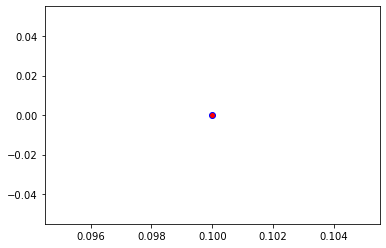

000000097679 656 = minivan
000000097924 792 = shovel
000000097988 842 = swimming trunks
000000097994 527 = desktop computer
000000098018 454 = bookshop
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


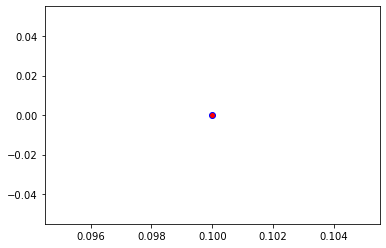

000000098261 14 = indigo bunting
000000098287 703 = park bench
000000098392 668 = mosque
000000098497 668 = mosque
000000098520 404 = airliner
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


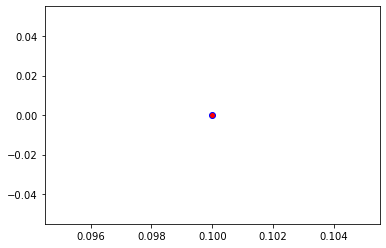

000000098633 696 = paintbrush
000000098716 703 = park bench
000000098839 282 = tiger cat
000000098853 781 = scoreboard
000000099024 843 = swing
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


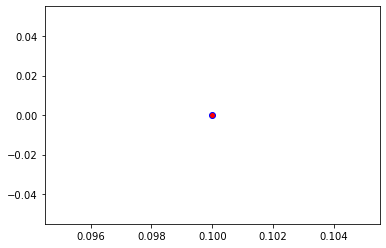

000000099039 898 = water bottle
000000099053 818 = spotlight
000000099054 484 = catamaran
000000099114 562 = fountain
000000099182 478 = carton
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


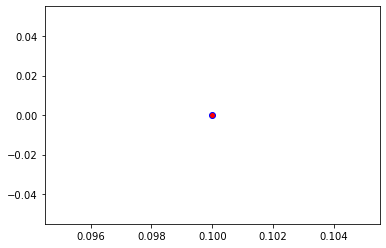

000000099242 248 = ski
000000099428 605 = iPod
000000099810 585 = hair spray
000000100238 570 = mask
000000100274 582 = grocery store
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


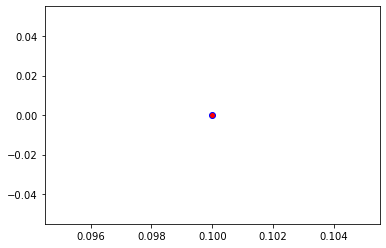

000000100283 919 = street sign
000000100428 461 = breastplate
000000100489 16 = bulbul
000000100510 233 = Bouvier des Flandres
000000100582 924 = guacamole
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


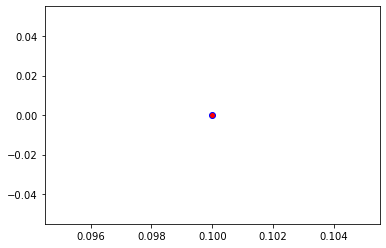

000000100624 558 = flute
000000100723 954 = banana
000000101022 637 = mailbox
000000101068 981 = ballplayer
000000101420 750 = quilt
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


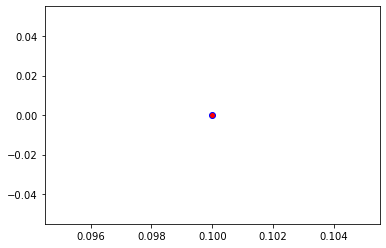

000000101762 880 = unicycle
000000101780 355 = llama
000000101787 134 = crane
000000101884 498 = cinema
000000102331 671 = mountain bike
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


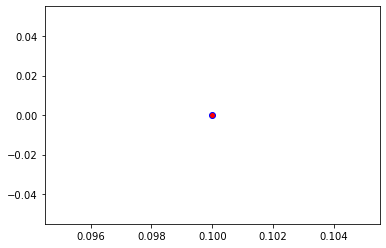

000000102356 665 = moped
000000102411 612 = jinrikisha
000000102644 861 = toilet seat
000000102707 737 = pop bottle
000000102805 515 = cowboy hat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


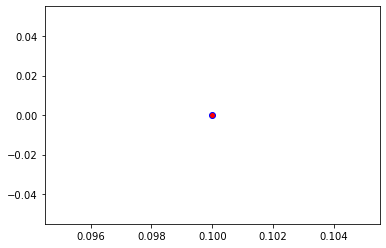

000000102820 916 = web site
000000103548 977 = sandbar
000000103585 534 = dishwasher
000000103723 386 = African elephant
000000104119 84 = peacock
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


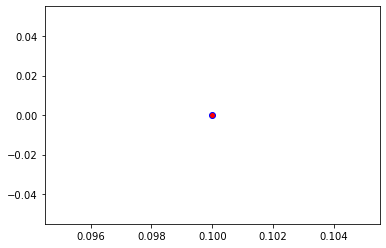

000000104198 919 = street sign
000000104424 752 = racket
000000104455 340 = zebra
000000104572 611 = jigsaw puzzle
000000104603 294 = brown bear
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


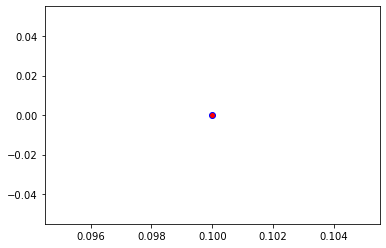

000000104612 712 = Petri dish
000000104619 523 = crutch
000000104666 532 = dining table
000000104669 954 = banana
000000104782 470 = candle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


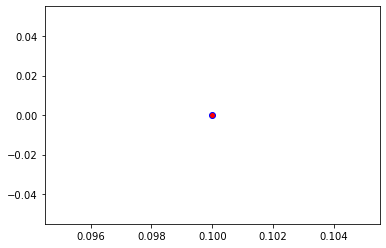

000000104803 971 = bubble
000000105014 611 = jigsaw puzzle
000000105249 861 = toilet seat
000000105264 37 = ox
000000105335 123 = crayfish
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


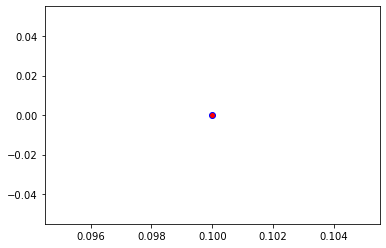

000000105455 442 = bell cote
000000105912 412 = ashcan
000000105923 799 = sliding door
000000106048 757 = recreational vehicle
000000106235 851 = television
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


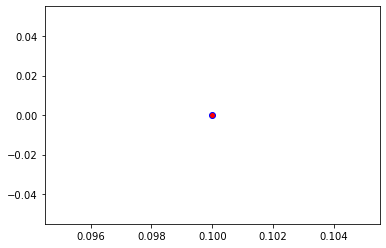

000000106266 949 = strawberry
000000106281 565 = freight car
000000106330 265 = toy poodle
000000106389 281 = tabby
000000106563 884 = vault
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


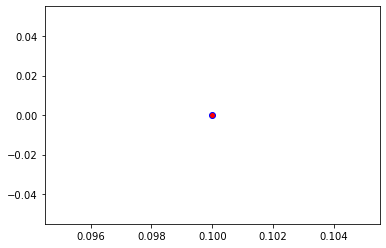

000000106757 386 = African elephant
000000106881 93 = hornbill
000000106912 879 = umbrella
000000107087 669 = mosquito net
000000107094 807 = solar dish
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


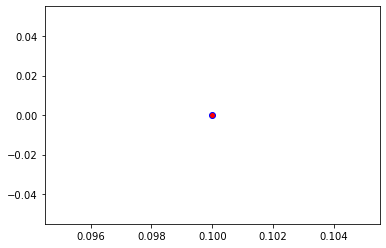

000000107226 257 = Great Pyrenees
000000107339 851 = television
000000107554 702 = parallel bars
000000107851 973 = coral reef
000000108026 620 = laptop
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


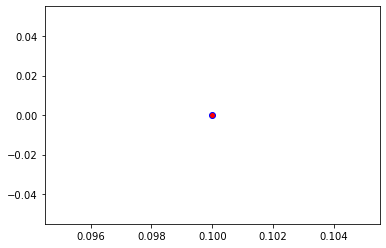

000000108244 620 = laptop
000000108253 898 = water bottle
000000108440 703 = park bench
000000108495 843 = swing
000000108503 250 = Siberian husky
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


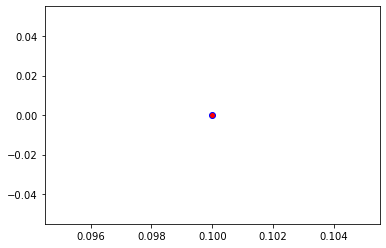

000000108864 386 = African elephant
000000109055 545 = electric fan
000000109118 652 = military uniform
000000109313 770 = running shoe
000000109441 498 = cinema
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


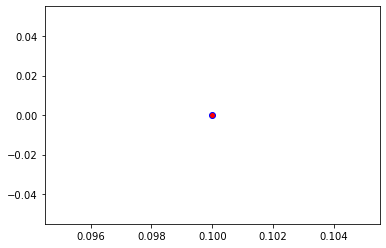

000000109798 928 = ice cream
000000109827 562 = fountain
000000109900 575 = golfcart
000000109916 729 = plate rack
000000109976 651 = microwave
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


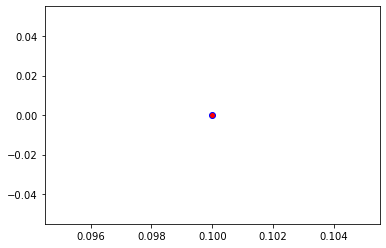

000000109992 792 = shovel
000000110042 731 = plunger
000000110211 340 = zebra
000000110282 920 = traffic light
000000110359 404 = airliner
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


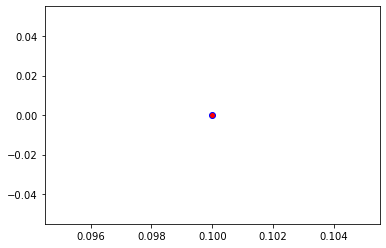

000000110449 691 = oxygen mask
000000110638 386 = African elephant
000000110721 466 = bullet train
000000110784 874 = trolleybus
000000110884 435 = bathtub
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


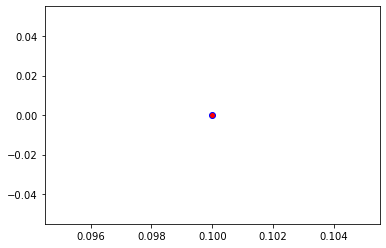

000000110972 294 = brown bear
000000110999 598 = home theater
000000111036 827 = stove
000000111086 297 = slot
000000111179 497 = church
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


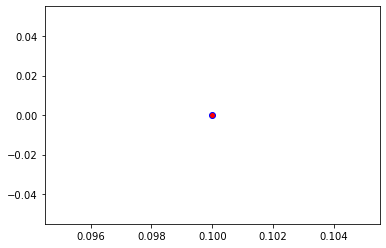

000000111207 880 = unicycle
000000111609 620 = laptop
000000111951 435 = tub
000000112110 778 = scale
000000112298 617 = lab coat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


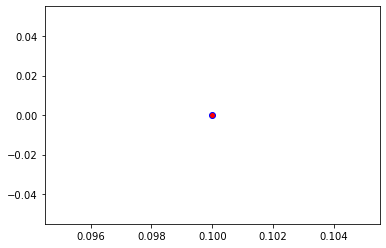

000000112378 706 = patio
000000112626 637 = mailbox
000000112634 210 = German short-haired pointer
000000112798 658 = mitten
000000112997 487 = cellular telephone
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


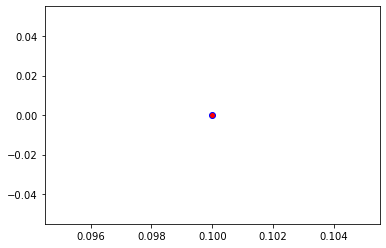

000000113051 713 = pier
000000113235 199 = Scotch terrier
000000113354 340 = zebra
000000113403 850 = teddy
000000113589 868 = tray
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


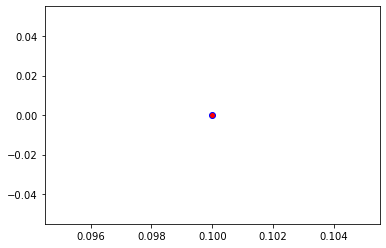

000000113720 532 = dining table
000000113867 839 = suspension bridge
000000114049 543 = dumbbell
000000114770 730 = plow
000000114871 600 = hook
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


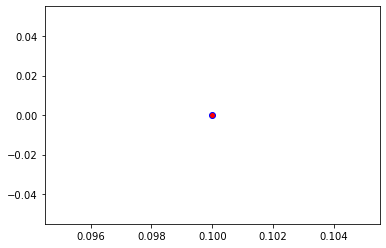

000000114884 523 = crutch
000000114907 757 = recreational vehicle
000000115118 547 = electric locomotive
000000115245 413 = assault rifle
000000115870 918 = crossword puzzle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


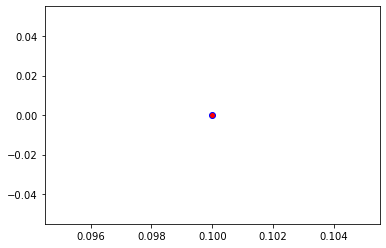

000000115885 681 = notebook
000000115898 693 = paddle
000000115946 412 = ashcan
000000116068 775 = sarong
000000116206 492 = chest
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


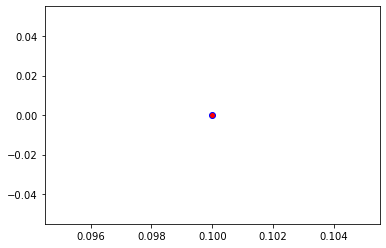

000000116208 927 = trifle
000000116362 78 = tick
000000116439 369 = siamang
000000116479 669 = mosquito net
000000116589 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


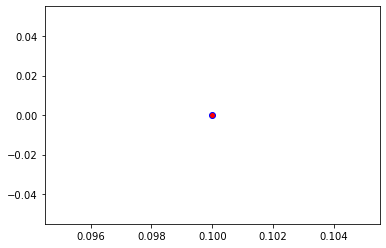

000000116825 284 = Siamese cat
000000117197 683 = oboe
000000117374 245 = French bulldog
000000117425 470 = candle
000000117492 433 = bathing cap
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


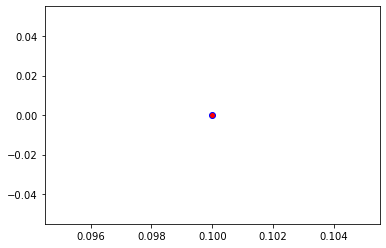

000000117525 242 = boxer
000000117645 792 = shovel
000000117719 598 = home theater
000000117744 752 = racket
000000117908 534 = dishwasher
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


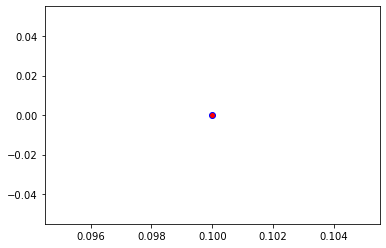

000000117914 861 = toilet seat
000000118209 339 = sorrel
000000118367 898 = water bottle
000000118405 919 = street sign
000000118515 361 = skunk
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


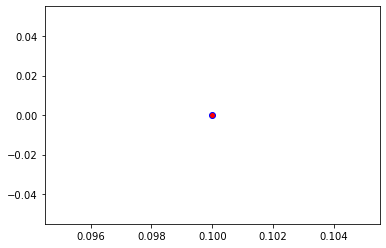

000000118594 37 = ox
000000118921 248 = ski
000000119038 5 = ram
000000119088 977 = sandbar
000000119233 217 = English springer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


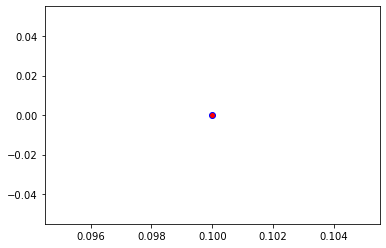

000000119365 620 = laptop
000000119445 716 = picket fence
000000119452 954 = banana
000000119516 920 = traffic light
000000119641 975 = lakeside
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


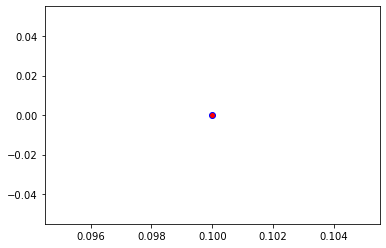

000000119677 767 = rubber eraser
000000119828 223 = schipperke
000000119911 552 = feather boa
000000119995 880 = unicycle
000000120420 447 = binoculars
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


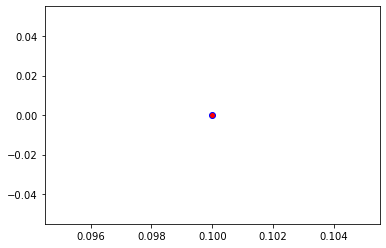

000000120572 442 = bell cote
000000120584 781 = scoreboard
000000120777 532 = dining table
000000120853 965 = burrito
000000121031 354 = Arabian camel
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


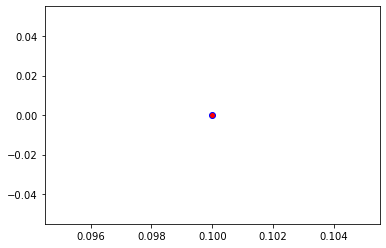

000000121153 920 = traffic light
000000121242 603 = horse cart
000000121417 879 = umbrella
000000121497 543 = dumbbell
000000121506 669 = mosquito net
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


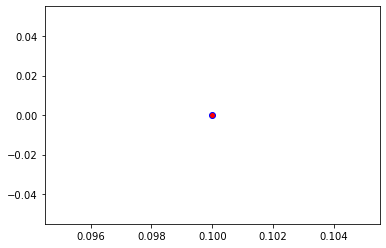

000000121586 760 = refrigerator
000000121591 478 = carton
000000121673 693 = paddle
000000121744 971 = bubble
000000122046 879 = umbrella
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


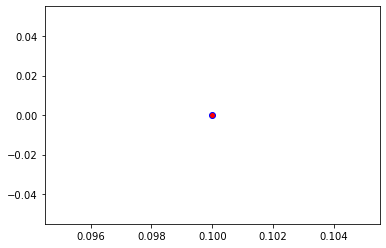

000000122166 324 = cab
000000122217 254 = pug
000000122606 654 = minibus
000000122672 801 = snorkel
000000122745 919 = street sign
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


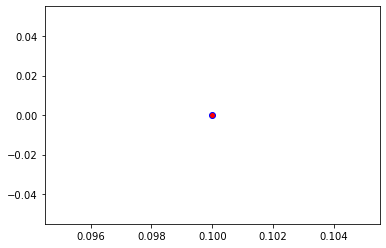

000000122927 135 = limpkin
000000122962 788 = shoe shop
000000122969 340 = zebra
000000123131 864 = tow truck
000000123213 981 = ballplayer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


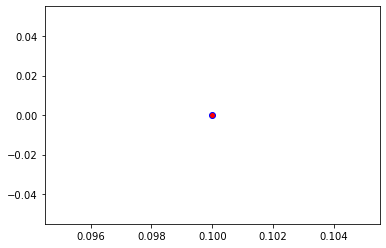

000000123321 556 = screen
000000123480 794 = shower curtain
000000123585 17 = jay
000000123633 903 = wig
000000124277 324 = cab
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


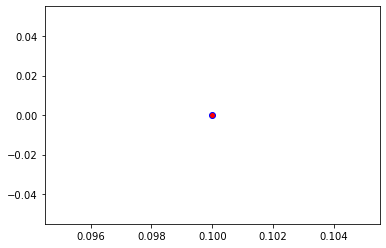

000000124442 879 = umbrella
000000124636 37 = ox
000000124659 520 = crib
000000124798 829 = streetcar
000000124975 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


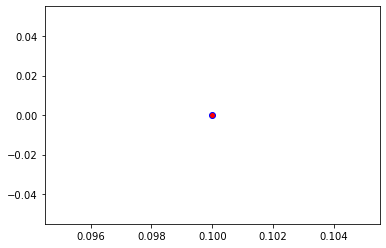

000000125062 684 = ocarina
000000125072 978 = seashore
000000125129 254 = pug
000000125211 340 = zebra
000000125245 973 = coral reef
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


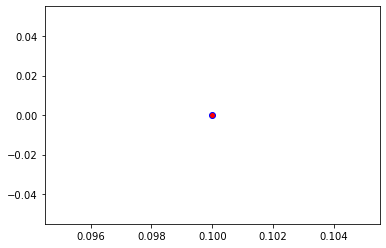

000000125257 313 = walking stick
000000125405 177 = Scottish deerhound
000000125472 981 = ballplayer
000000125572 682 = obelisk
000000125778 851 = television
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


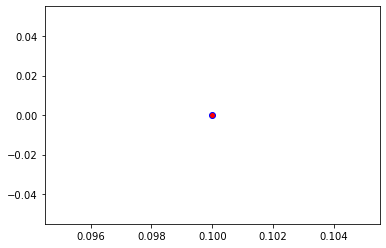

000000125806 237 = miniature pinscher
000000125850 463 = bucket
000000125936 954 = banana
000000125952 414 = backpack
000000126107 978 = seashore
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


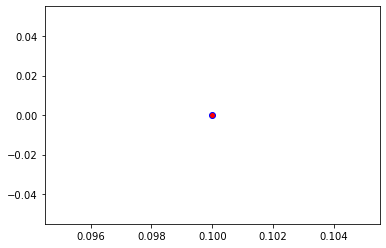

000000126110 626 = lighter
000000126137 981 = ballplayer
000000126216 178 = Weimaraner
000000126226 513 = cornet
000000126592 919 = street sign
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


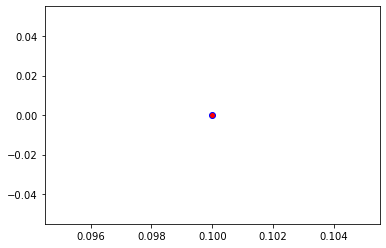

000000127092 829 = streetcar
000000127135 361 = skunk
000000127182 651 = microwave
000000127263 862 = torch
000000127270 752 = racket
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


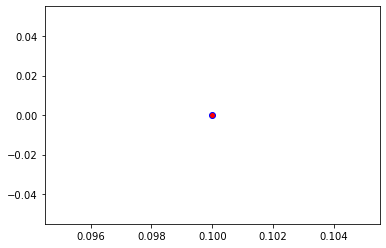

000000127394 532 = dining table
000000127476 813 = spatula
000000127494 461 = plate
000000127517 418 = ballpoint
000000127530 560 = football helmet
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


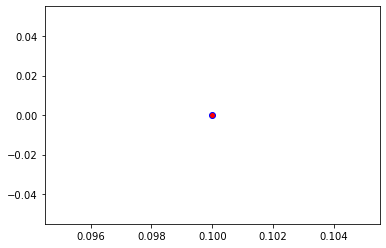

000000127624 556 = screen
000000127660 553 = file
000000127955 295 = American black bear
000000127987 788 = shoe shop
000000128051 915 = yurt
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


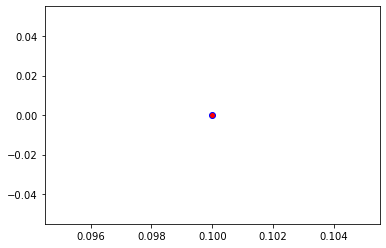

000000128112 537 = dogsled
000000128148 598 = home theater
000000128372 829 = streetcar
000000128476 533 = dishrag
000000128598 644 = matchstick
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


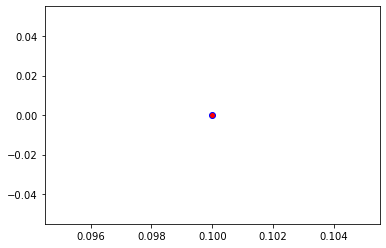

000000128654 701 = parachute
000000128658 584 = hair slide
000000128675 693 = paddle
000000128699 632 = loudspeaker
000000128748 560 = football helmet
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


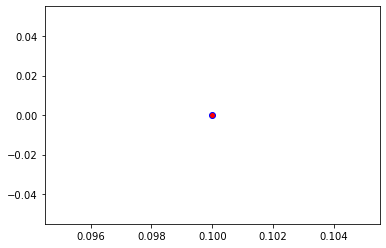

000000129054 340 = zebra
000000129062 704 = parking meter
000000129113 618 = ladle
000000129135 705 = passenger car
000000129322 572 = goblet
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


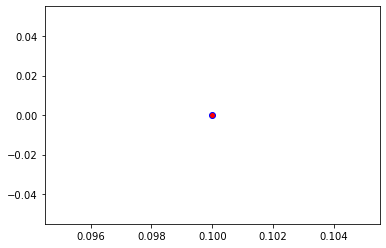

000000129416 347 = bison
000000129492 572 = goblet
000000129756 5 = ram
000000129812 840 = swab
000000129945 246 = Great Dane
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


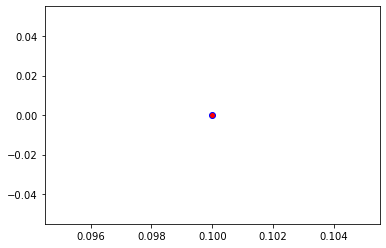

000000130386 781 = scoreboard
000000130465 442 = bell cote
000000130566 565 = freight car
000000130579 981 = ballplayer
000000130586 701 = parachute
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


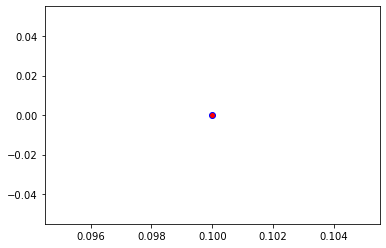

000000130599 560 = football helmet
000000130613 965 = burrito
000000130699 569 = garbage truck
000000130826 433 = bathing cap
000000131131 282 = tiger cat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


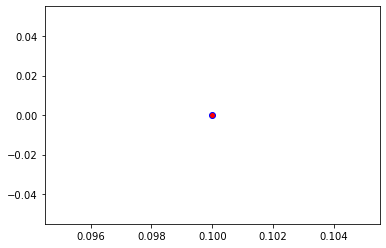

000000131138 526 = desk
000000131273 250 = Siberian husky
000000131379 113 = nail
000000131386 512 = screw
000000131431 409 = analog clock
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


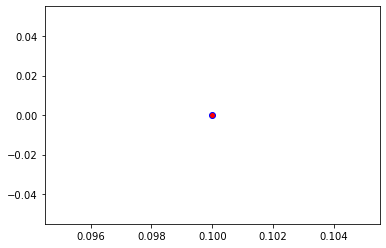

000000131444 639 = suit
000000131556 421 = bannister
000000131938 281 = tabby
000000132116 924 = guacamole
000000132329 760 = refrigerator
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


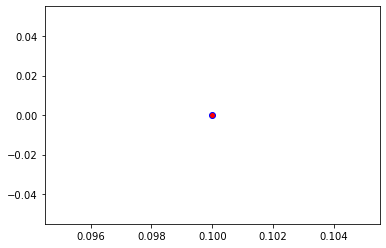

000000132375 883 = vase
000000132408 37 = ox
000000132544 981 = ballplayer
000000132587 837 = sunglasses
000000132622 294 = brown bear
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


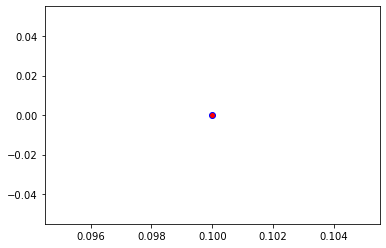

000000132703 693 = paddle
000000132796 354 = Arabian camel
000000132931 781 = scoreboard
000000133000 829 = streetcar
000000133087 646 = maze
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


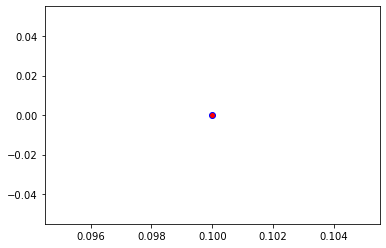

000000133233 536 = dock
000000133244 752 = racket
000000133343 837 = sunglasses
000000133418 246 = Great Dane
000000133567 523 = crutch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


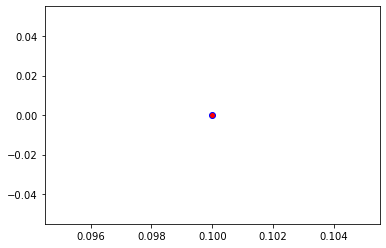

000000133631 386 = African elephant
000000133645 536 = dock
000000133778 37 = ox
000000133819 874 = trolleybus
000000133969 842 = swimming trunks
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


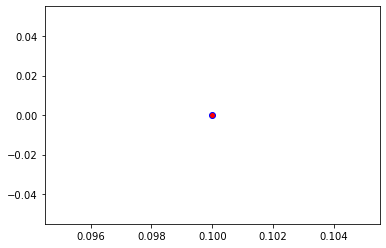

000000134034 704 = parking meter
000000134096 285 = Egyptian cat
000000134112 157 = papillon
000000134322 134 = crane
000000134689 164 = bluetick
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


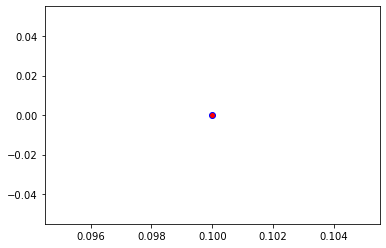

000000134722 757 = recreational vehicle
000000134856 978 = seashore
000000134882 750 = quilt
000000134886 405 = airship
000000135410 704 = parking meter
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


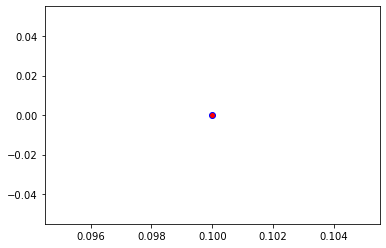

000000135561 648 = medicine chest
000000135604 805 = soccer ball
000000135670 799 = sliding door
000000135673 48 = ant
000000135872 532 = dining table
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


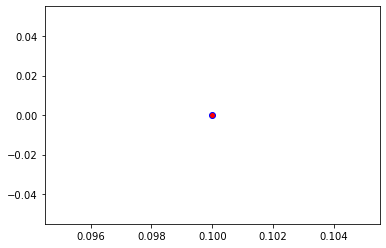

000000135890 498 = palace
000000135902 547 = electric locomotive
000000136033 579 = grand piano
000000136334 248 = ski
000000136355 532 = dining table
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


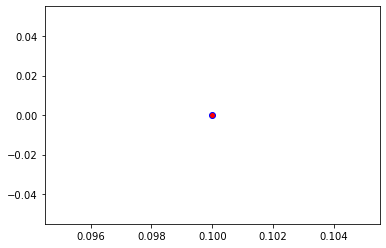

000000136466 827 = stove
000000136600 620 = laptop
000000136633 428 = barrow
000000136715 541 = drum
000000136772 644 = matchstick
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


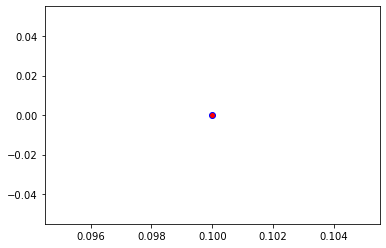

000000136915 558 = flute
000000137106 434 = bath towel
000000137246 955 = jackfruit
000000137294 480 = cash machine
000000137576 730 = plow
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


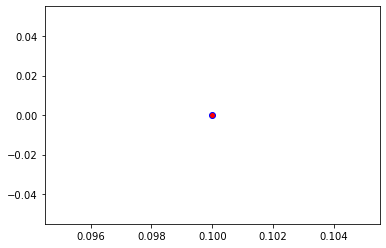

000000137727 877 = turnstile
000000137950 895 = warplane
000000138115 641 = maraca
000000138241 461 = plate
000000138492 232 = Border collie
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


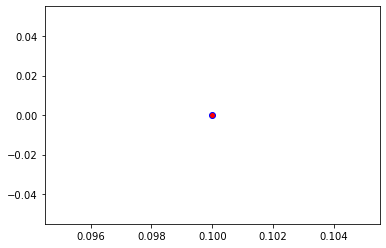

000000138550 704 = parking meter
000000138639 880 = unicycle
000000138819 896 = washbasin
000000138856 324 = cab
000000138954 584 = hair slide
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


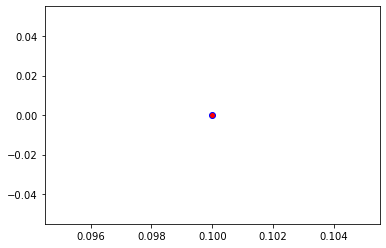

000000138979 734 = police van
000000139077 480 = cash machine
000000139099 399 = abaya
000000139260 470 = candle
000000139684 831 = studio couch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


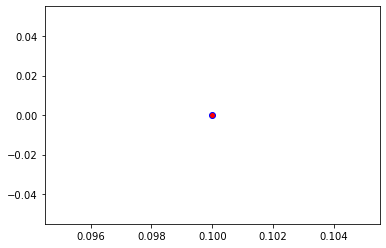

000000139871 318 = wing
000000139872 195 = Boston bull
000000139883 723 = pinwheel
000000140076 532 = dining table
000000140203 407 = ambulance
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


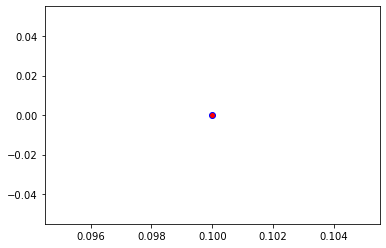

000000140270 209 = Chesapeake Bay retriever
000000140286 603 = horse cart
000000140420 209 = Chesapeake Bay retriever
000000140439 883 = vase
000000140556 822 = steel drum
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


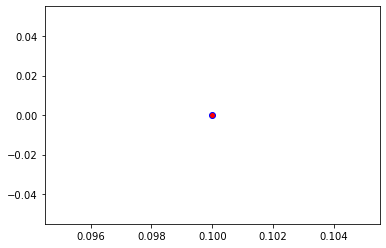

000000140583 475 = car mirror
000000140640 883 = vase
000000140658 442 = bell cote
000000140840 879 = umbrella
000000140929 409 = analog clock
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


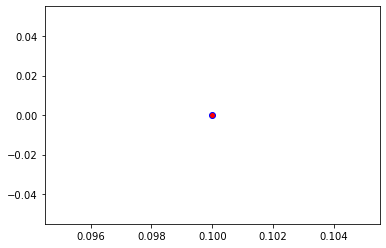

000000140987 762 = restaurant
000000141328 973 = coral reef
000000141597 757 = recreational vehicle
000000141671 921 = book jacket
000000141821 898 = water bottle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


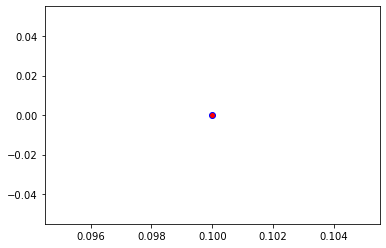

000000142092 583 = guillotine
000000142238 862 = torch
000000142324 612 = jinrikisha
000000142472 324 = cab
000000142585 656 = minivan
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


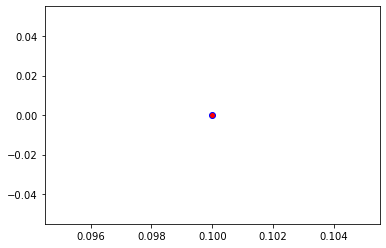

000000142620 898 = water bottle
000000142790 248 = ski
000000142971 801 = snorkel
000000143068 576 = gondola
000000143556 518 = crash helmet
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


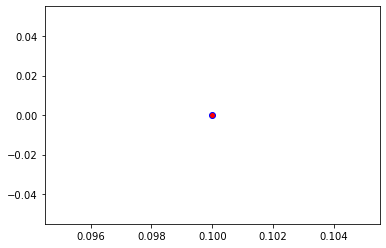

000000143572 611 = jigsaw puzzle
000000143931 757 = recreational vehicle
000000143961 862 = torch
000000143998 840 = swab
000000144003 865 = toyshop
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


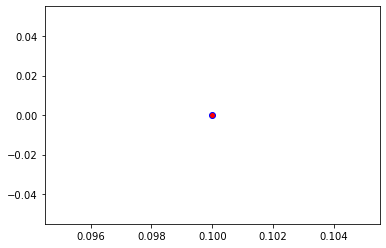

000000144114 404 = airliner
000000144300 870 = tricycle
000000144333 444 = bicycle-built-for-two
000000144706 920 = traffic light
000000144784 470 = candle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


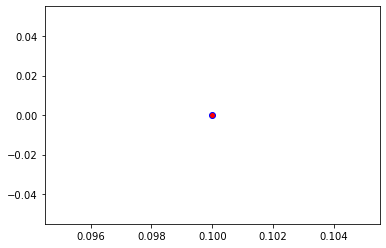

000000144798 896 = washbasin
000000144932 472 = canoe
000000144984 697 = pajama
000000145020 818 = spotlight
000000145591 409 = analog clock
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


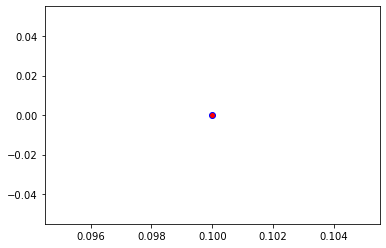

000000145597 646 = maze
000000145620 671 = mountain bike
000000145665 977 = sandbar
000000145781 208 = Labrador retriever
000000146155 503 = cocktail shaker
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


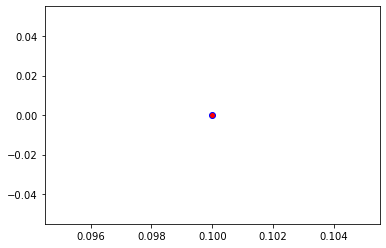

000000146358 532 = dining table
000000146363 879 = umbrella
000000146457 608 = jean
000000146489 532 = dining table
000000146498 919 = street sign
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


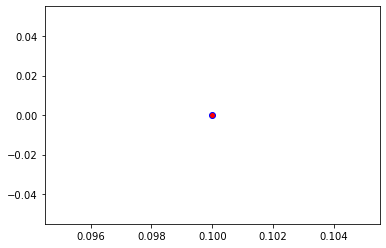

000000146667 955 = jackfruit
000000146825 547 = electric locomotive
000000146831 843 = swing
000000147205 928 = ice cream
000000147223 569 = garbage truck
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


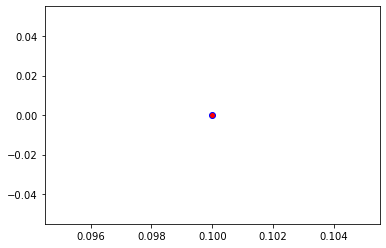

000000147338 412 = ashcan
000000147415 905 = window shade
000000147498 644 = matchstick
000000147518 794 = shower curtain
000000147725 575 = golfcart
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


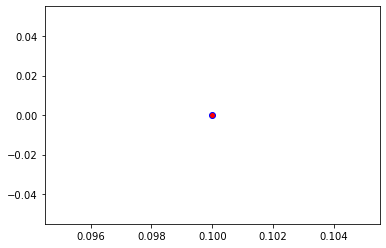

000000147729 543 = dumbbell
000000147740 452 = bonnet
000000147745 407 = ambulance
000000148508 704 = parking meter
000000148620 526 = desk
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


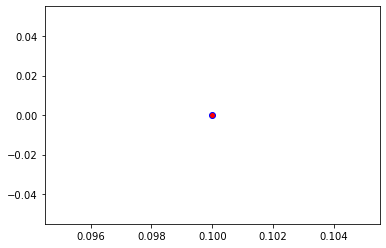

000000148662 785 = seat belt
000000148707 955 = jackfruit
000000148719 717 = pickup
000000148730 534 = dishwasher
000000148739 842 = swimming trunks
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


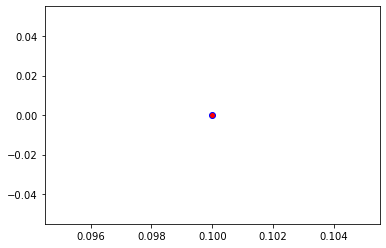

000000148783 340 = zebra
000000148957 464 = buckle
000000148999 820 = steam locomotive
000000149222 556 = screen
000000149375 981 = ballplayer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


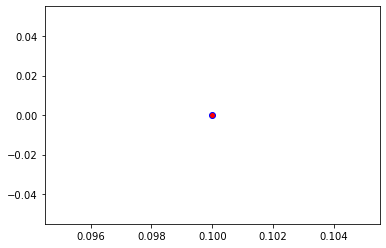

000000149406 665 = moped
000000149568 267 = standard poodle
000000149622 21 = kite
000000149770 602 = horizontal bar
000000150224 978 = seashore
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


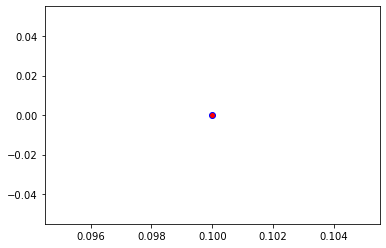

000000150265 898 = water bottle
000000150417 626 = lighter
000000150638 898 = water bottle
000000150649 842 = swimming trunks
000000150726 293 = cheetah
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


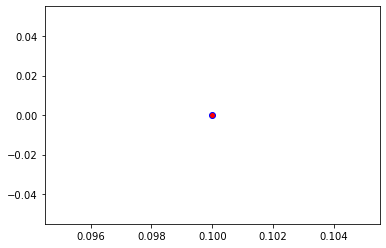

000000150930 409 = analog clock
000000151000 608 = jean
000000151051 248 = ski
000000151480 781 = scoreboard
000000151516 801 = snorkel
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


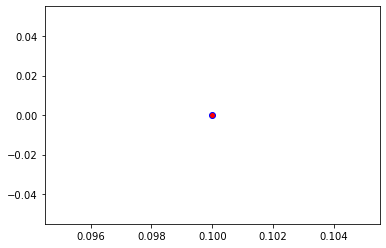

000000151629 752 = racket
000000151657 801 = snorkel
000000151662 489 = chainlink fence
000000151820 791 = shopping cart
000000151857 705 = passenger car
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


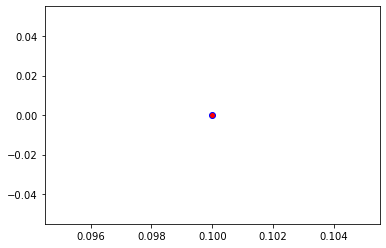

000000151938 688 = oscilloscope
000000151962 475 = car mirror
000000152120 518 = crash helmet
000000152214 639 = suit
000000152465 898 = water bottle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


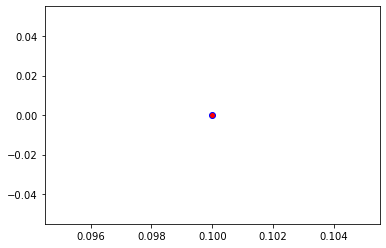

000000152686 560 = football helmet
000000152740 562 = fountain
000000152771 646 = maze
000000152870 251 = dalmatian
000000153011 612 = jinrikisha
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


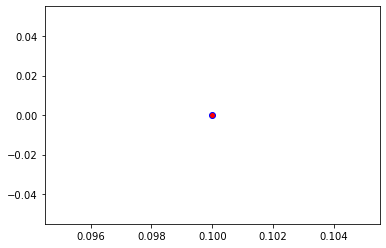

000000153217 665 = moped
000000153229 805 = soccer ball
000000153299 251 = dalmatian
000000153343 971 = bubble
000000153510 328 = sea urchin
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


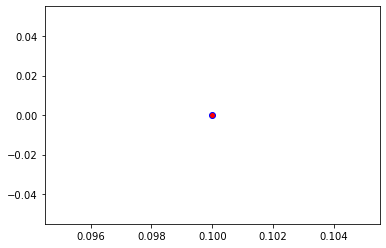

000000153527 634 = lumbermill
000000153529 882 = vacuum
000000153568 919 = street sign
000000153632 461 = plate
000000153669 981 = ballplayer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


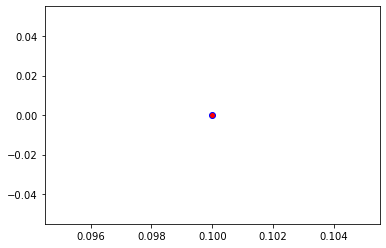

000000153782 297 = slot
000000153797 562 = fountain
000000154000 864 = tow truck
000000154004 978 = seashore
000000154087 248 = ski
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


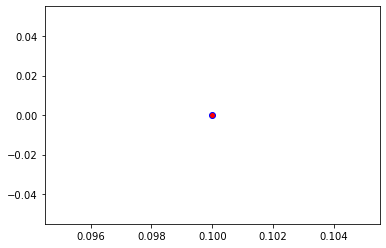

000000154213 828 = strainer
000000154339 827 = stove
000000154358 799 = sliding door
000000154425 898 = water bottle
000000154431 799 = sliding door
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


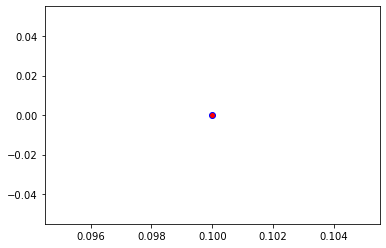

000000154644 626 = lighter
000000154705 526 = desk
000000154718 861 = toilet seat
000000154947 349 = bighorn
000000155051 892 = wall clock
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


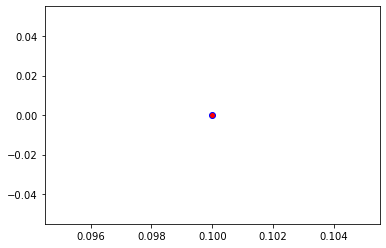

000000155145 472 = canoe
000000155154 861 = toilet seat
000000155179 470 = candle
000000155291 285 = Egyptian cat
000000155341 654 = minibus
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


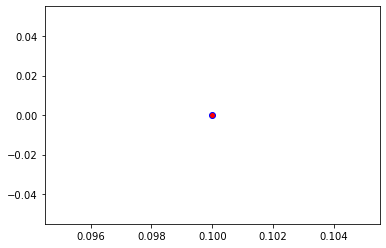

000000155443 829 = streetcar
000000155451 555 = fire engine
000000155571 101 = tusker
000000156071 702 = parallel bars
000000156076 470 = candle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


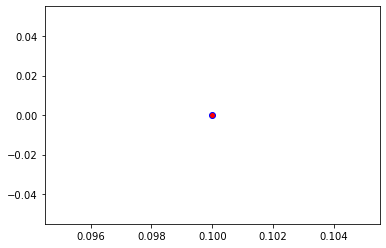

000000156278 495 = china cabinet
000000156292 426 = barometer
000000156372 822 = steel drum
000000156643 898 = water bottle
000000156924 880 = unicycle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


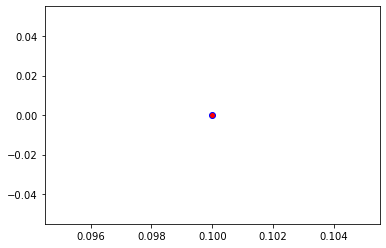

000000157046 641 = maraca
000000157098 251 = dalmatian
000000157124 896 = washbasin
000000157138 928 = ice cream
000000157213 101 = tusker
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


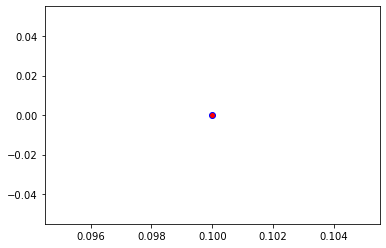

000000157365 898 = water bottle
000000157390 463 = bucket
000000157418 809 = soup bowl
000000157601 550 = espresso
000000157756 442 = bell cote
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


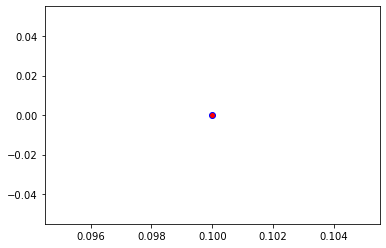

000000157767 399 = abaya
000000157807 861 = toilet seat
000000157847 922 = menu
000000157928 537 = dogsled
000000158227 655 = miniskirt
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


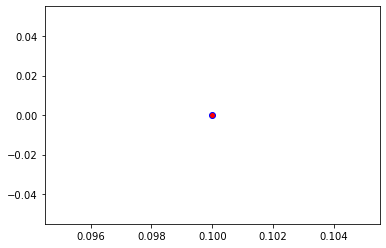

000000158548 203 = West Highland white terrier
000000158660 809 = soup bowl
000000158744 843 = swing
000000158945 385 = Indian elephant
000000158956 818 = spotlight
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


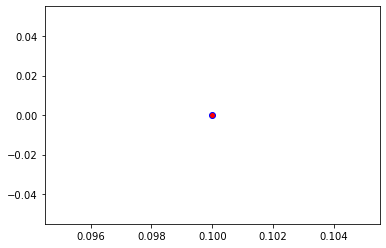

000000159112 938 = cauliflower
000000159282 632 = loudspeaker
000000159311 340 = zebra
000000159399 843 = swing
000000159458 478 = carton
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


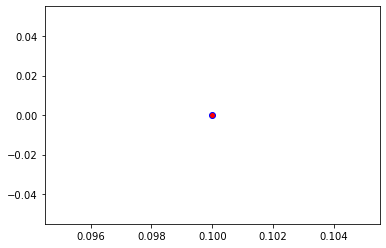

000000159684 466 = bullet train
000000159791 760 = refrigerator
000000159977 293 = cheetah
000000160012 963 = pizza
000000160556 851 = television
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


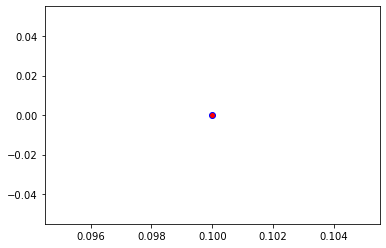

000000160666 692 = packet
000000160728 978 = seashore
000000160772 404 = liner
000000160864 842 = swimming trunks
000000161008 774 = sandal
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


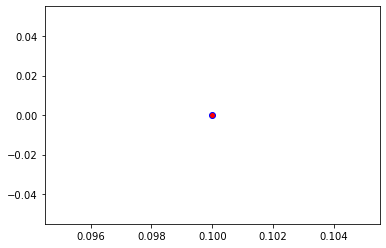

000000161032 879 = umbrella
000000161044 562 = fountain
000000161128 919 = street sign
000000161397 883 = vase
000000161609 841 = sweatshirt
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


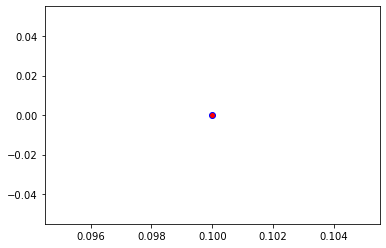

000000161642 892 = wall clock
000000161781 248 = ski
000000161799 880 = unicycle
000000161820 956 = custard apple
000000161861 752 = racket
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


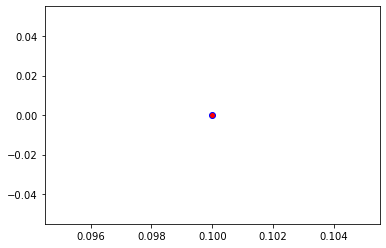

000000161875 237 = miniature pinscher
000000161879 880 = unicycle
000000161925 792 = shovel
000000161978 916 = web site
000000162035 496 = Christmas stocking
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


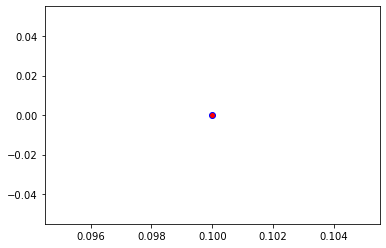

000000162092 745 = projector
000000162130 703 = park bench
000000162366 781 = scoreboard
000000162415 558 = flute
000000162543 569 = garbage truck
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


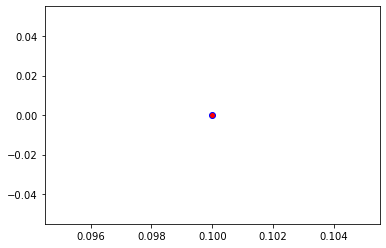

000000162581 752 = racket
000000162732 842 = swimming trunks
000000162858 324 = cab
000000163057 445 = bikini
000000163117 981 = ballplayer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


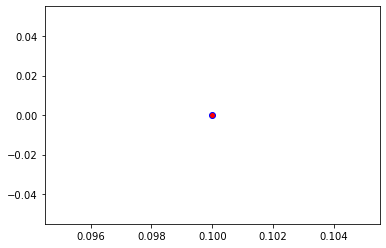

000000163118 890 = volleyball
000000163155 285 = Egyptian cat
000000163257 971 = bubble
000000163258 861 = toilet seat
000000163290 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


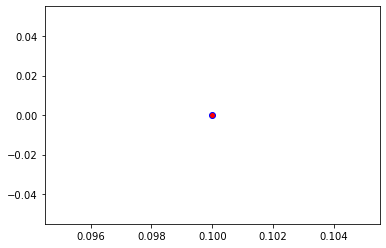

000000163314 627 = limousine
000000163562 608 = jean
000000163611 793 = shower cap
000000163640 652 = military uniform
000000163682 793 = shower cap
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


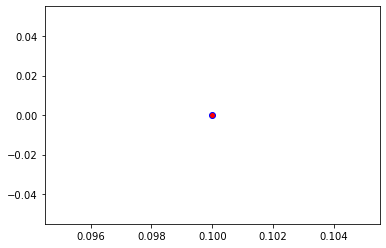

000000163746 562 = fountain
000000163951 665 = moped
000000164115 706 = patio
000000164363 892 = wall clock
000000164602 431 = bassinet
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


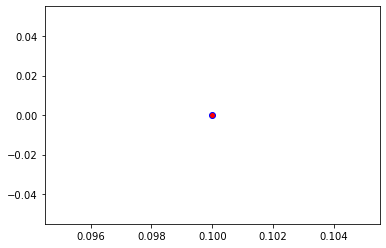

000000164637 881 = upright
000000164883 613 = joystick
000000164885 248 = ski
000000164969 861 = toilet seat
000000165039 734 = police van
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


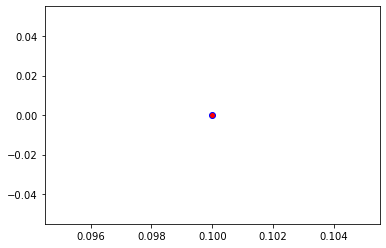

000000165257 859 = toaster
000000165336 562 = fountain
000000165351 584 = hair slide
000000165500 223 = schipperke
000000165518 818 = spotlight
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


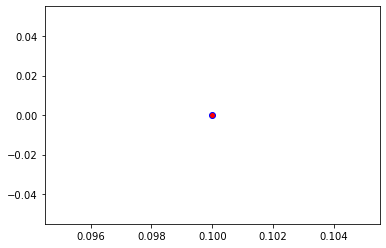

000000165681 954 = banana
000000165713 412 = ashcan
000000165831 868 = tray
000000166165 4 = hammer
000000166166 532 = dining table
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


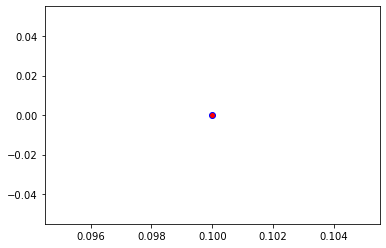

000000166259 84 = peacock
000000166277 282 = tiger cat
000000166287 37 = ox
000000166391 920 = traffic light
000000166426 532 = dining table
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


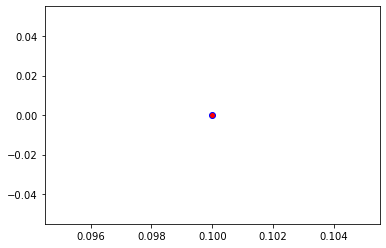

000000166478 620 = laptop
000000166509 669 = mosquito net
000000166521 598 = home theater
000000166563 385 = Indian elephant
000000166642 386 = African elephant
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


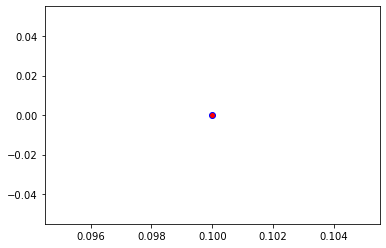

000000166664 656 = minivan
000000166747 829 = streetcar
000000166768 457 = bow tie
000000166918 762 = restaurant
000000167067 457 = bow tie
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


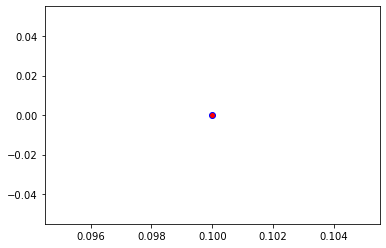

000000167122 475 = car mirror
000000167128 5 = ram
000000167159 431 = bassinet
000000167240 883 = vase
000000167353 892 = wall clock
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


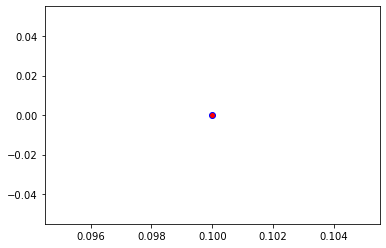

000000167486 632 = loudspeaker
000000167540 812 = space shuttle
000000167572 745 = projector
000000167898 794 = shower curtain
000000167902 96 = toucan
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


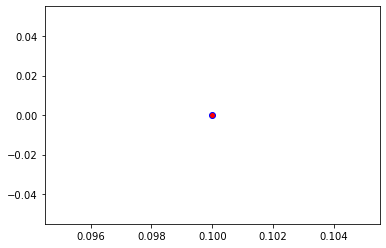

000000168330 704 = parking meter
000000168337 439 = bearskin
000000168458 883 = vase
000000168593 760 = refrigerator
000000168619 916 = web site
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


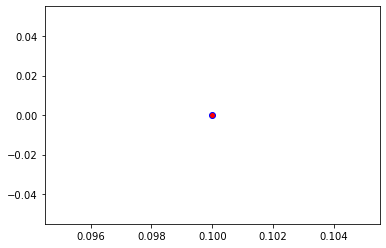

000000168883 837 = sunglasses
000000168974 891 = waffle iron
000000169076 851 = television
000000169169 920 = traffic light
000000169356 421 = bannister
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


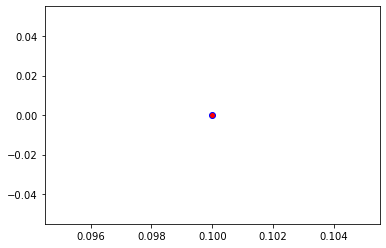

000000169996 603 = horse cart
000000170099 906 = Windsor tie
000000170116 886 = vending machine
000000170191 639 = suit
000000170278 242 = boxer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


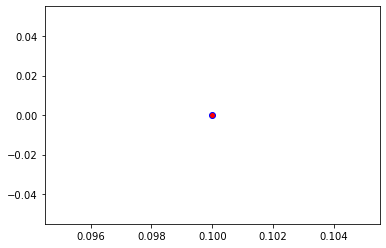

000000170474 752 = racket
000000170545 818 = spotlight
000000170595 928 = ice cream
000000170613 916 = web site
000000170670 706 = patio
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


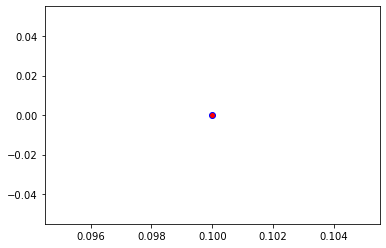

000000170739 386 = African elephant
000000170893 861 = toilet seat
000000170955 832 = stupa
000000171050 538 = dome
000000171190 762 = restaurant
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


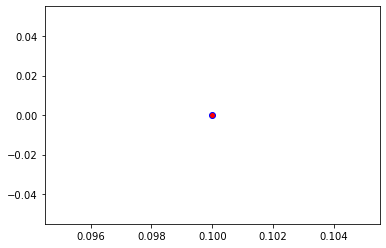

000000171298 757 = recreational vehicle
000000171382 842 = swimming trunks
000000171611 833 = submarine
000000171740 788 = shoe shop
000000171757 457 = bow tie
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


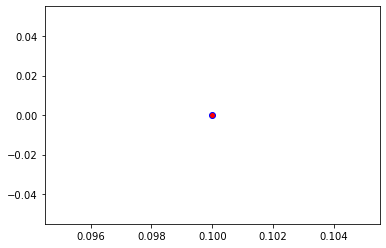

000000171788 880 = unicycle
000000172083 600 = hook
000000172330 656 = minivan
000000172396 886 = vending machine
000000172547 979 = valley
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


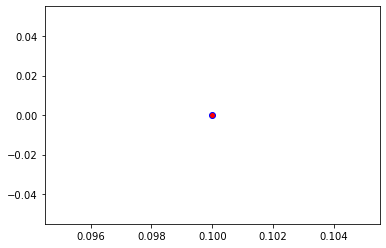

000000172571 470 = candle
000000172595 423 = barber chair
000000172617 237 = miniature pinscher
000000172648 569 = garbage truck
000000172649 421 = bannister
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


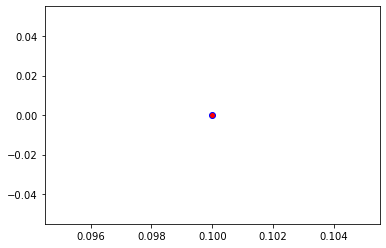

000000172856 919 = street sign
000000172877 457 = bow tie
000000172935 776 = sax
000000172946 513 = cornet
000000172977 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


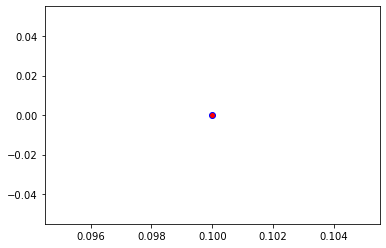

000000173004 896 = washbasin
000000173008 568 = fur coat
000000173033 208 = Labrador retriever
000000173044 497 = church
000000173057 781 = scoreboard
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


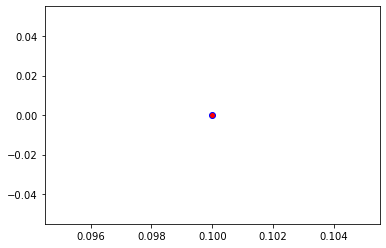

000000173091 631 = lotion
000000173183 919 = street sign
000000173302 424 = barbershop
000000173371 461 = plate
000000173383 406 = altar
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


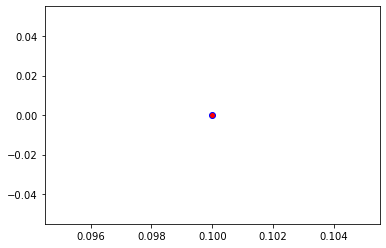

000000173799 5 = ram
000000173830 248 = ski
000000174004 730 = plow
000000174018 850 = teddy
000000174123 813 = spatula
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


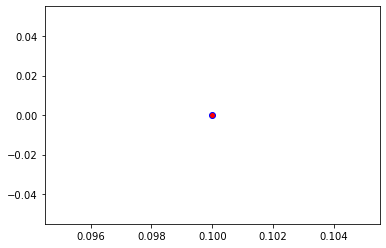

000000174231 579 = grand piano
000000174371 457 = bow tie
000000174482 444 = bicycle-built-for-two
000000175251 929 = ice lolly
000000175364 435 = tub
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


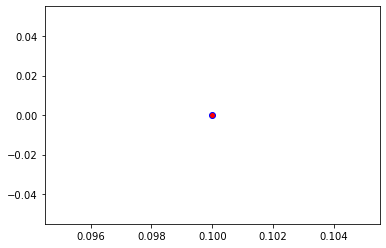

000000175387 861 = toilet seat
000000175438 920 = traffic light
000000175443 850 = teddy
000000175535 470 = candle
000000176037 829 = streetcar
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


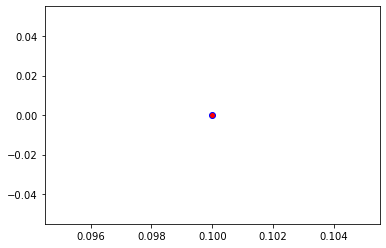

000000176232 916 = web site
000000176446 761 = remote control
000000176606 222 = kuvasz
000000176634 340 = zebra
000000176701 920 = traffic light
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


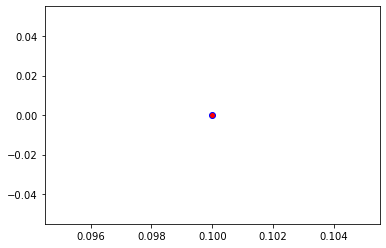

000000176778 861 = toilet seat
000000176799 642 = marimba
000000176847 955 = jackfruit
000000176857 400 = gown
000000176901 248 = ski
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


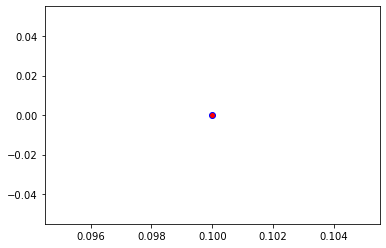

000000177015 851 = television
000000177065 981 = ballplayer
000000177213 965 = burrito
000000177357 405 = airship
000000177383 547 = electric locomotive
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


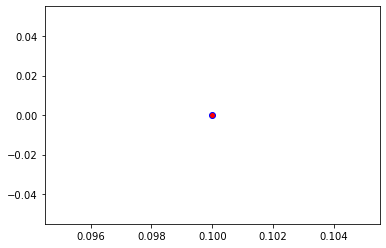

000000177489 589 = hand blower
000000177539 801 = snorkel
000000177714 924 = guacamole
000000177861 346 = water buffalo
000000177893 874 = trolleybus
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


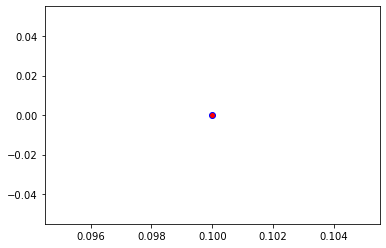

000000177934 444 = bicycle-built-for-two
000000177935 651 = microwave
000000178028 532 = dining table
000000178469 620 = laptop
000000178618 101 = tusker
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


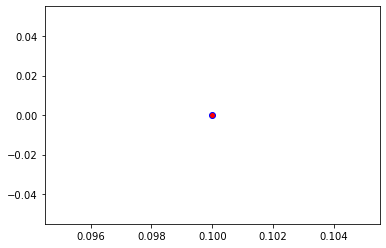

000000178744 626 = lighter
000000178982 530 = digital clock
000000179112 487 = cellular telephone
000000179141 818 = spotlight
000000179174 634 = lumbermill
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


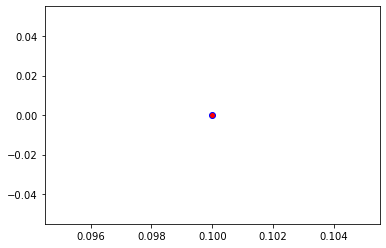

000000179214 896 = washbasin
000000179265 569 = garbage truck
000000179285 752 = racket
000000179392 223 = schipperke
000000179487 981 = ballplayer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


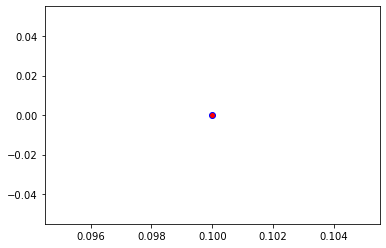

000000179642 745 = projector
000000179653 706 = patio
000000179765 665 = moped
000000179898 865 = toyshop
000000180011 383 = Madagascar cat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


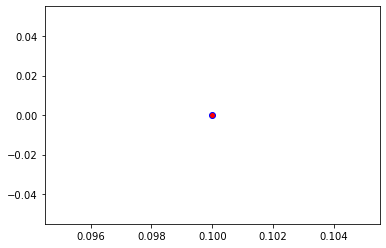

000000180101 470 = candle
000000180135 650 = microphone
000000180188 565 = freight car
000000180296 575 = golfcart
000000180383 827 = stove
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


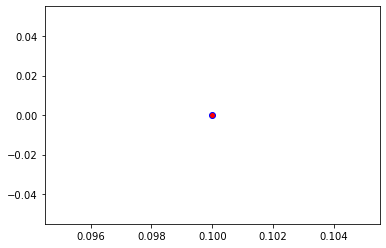

000000180487 822 = steel drum
000000180560 639 = suit
000000180751 297 = slot
000000180792 861 = toilet seat
000000180798 605 = iPod
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


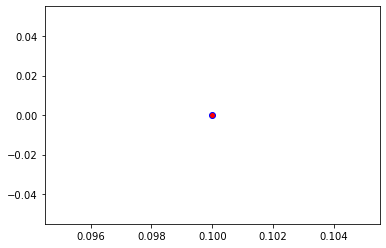

000000180878 692 = packet
000000181303 669 = mosquito net
000000181421 879 = umbrella
000000181499 508 = computer keyboard
000000181542 444 = bicycle-built-for-two
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


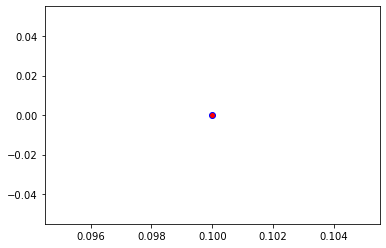

000000181666 975 = lakeside
000000181753 532 = dining table
000000181796 451 = bolo tie
000000181816 703 = park bench
000000181859 285 = Egyptian cat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


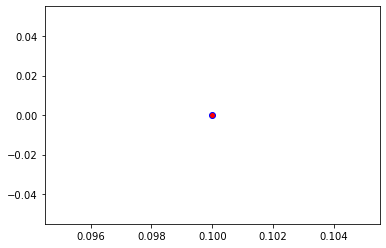

000000181969 911 = wool
000000182021 842 = swimming trunks
000000182155 589 = hand blower
000000182162 423 = barber chair
000000182202 626 = lighter
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


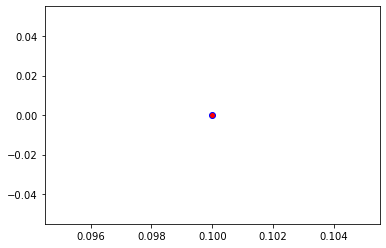

000000182417 461 = plate
000000182441 978 = seashore
000000182611 928 = ice cream
000000182805 476 = carousel
000000182923 560 = football helmet
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


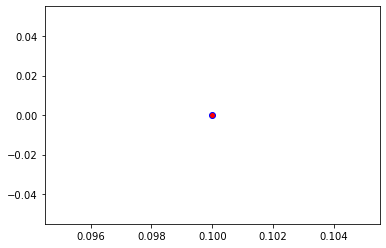

000000183049 453 = bookcase
000000183104 51 = triceratops
000000183127 978 = seashore
000000183246 920 = traffic light
000000183391 752 = racket
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


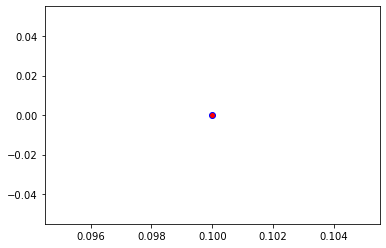

000000183437 690 = oxcart
000000183500 248 = ski
000000183648 385 = Indian elephant
000000183675 787 = shield
000000183709 568 = fur coat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


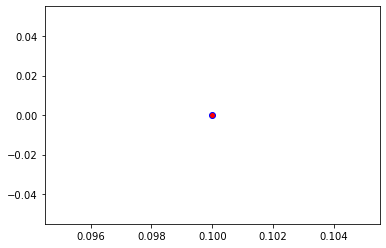

000000183716 457 = bow tie
000000183965 920 = traffic light
000000184321 565 = freight car
000000184324 324 = cab
000000184338 569 = garbage truck
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


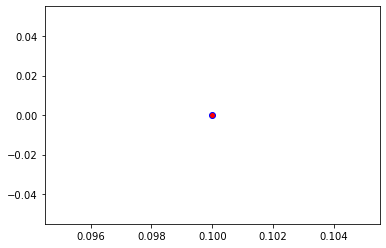

000000184384 927 = trifle
000000184400 781 = scoreboard
000000184611 297 = slot
000000184762 409 = analog clock
000000184791 711 = perfume
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


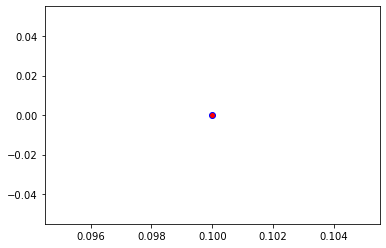

000000184978 248 = ski
000000185157 919 = street sign
000000185250 161 = basset
000000185292 242 = boxer
000000185409 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


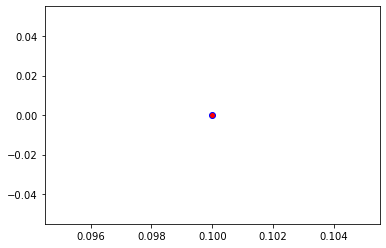

000000185472 612 = jinrikisha
000000185473 562 = fountain
000000185599 398 = abacus
000000185802 559 = folding chair
000000185890 611 = jigsaw puzzle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


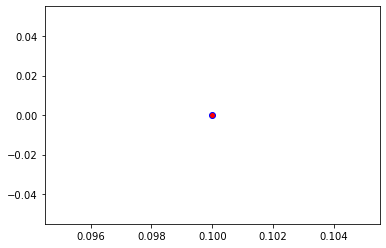

000000185950 916 = web site
000000186042 224 = groenendael
000000186282 648 = medicine chest
000000186296 539 = doormat
000000186345 562 = fountain
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


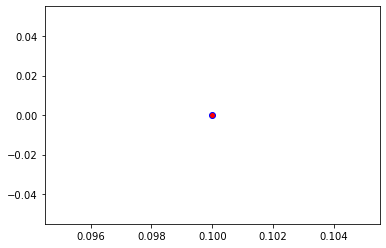

000000186422 42 = agama
000000186449 523 = crutch
000000186624 820 = steam locomotive
000000186632 762 = restaurant
000000186637 489 = chainlink fence
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


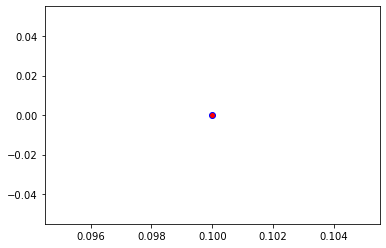

000000186873 576 = gondola
000000186929 48 = ant
000000186938 19 = chickadee
000000186980 532 = dining table
000000187055 433 = bathing cap
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


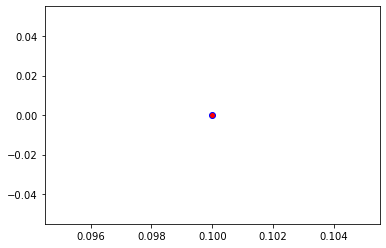

000000187144 407 = ambulance
000000187236 999 = toilet tissue
000000187243 570 = gasmask
000000187249 585 = hair spray
000000187271 760 = refrigerator
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


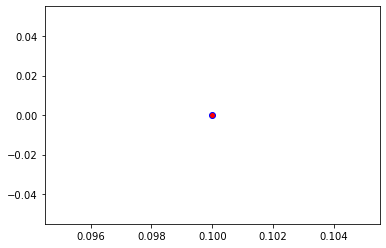

000000187362 978 = seashore
000000187513 534 = washer
000000187585 412 = ashcan
000000187734 916 = web site
000000187745 404 = airliner
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


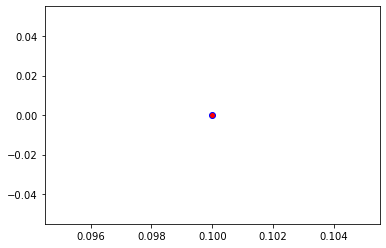

000000187990 843 = swing
000000188296 560 = football helmet
000000188439 569 = garbage truck
000000188465 981 = ballplayer
000000188592 977 = sandbar
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


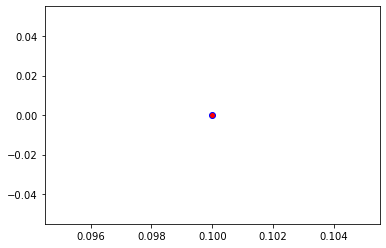

000000188689 864 = wreck
000000188906 793 = shower cap
000000189078 679 = necklace
000000189213 706 = patio
000000189226 898 = water bottle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


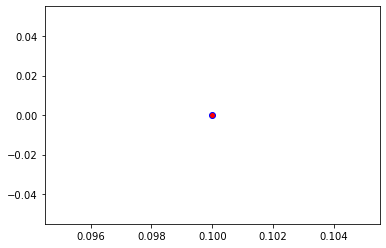

000000189310 598 = home theater
000000189436 793 = shower cap
000000189451 461 = plate
000000189475 762 = restaurant
000000189698 919 = street sign
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


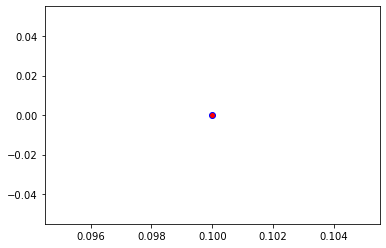

000000189752 924 = guacamole
000000189775 890 = volleyball
000000189806 223 = schipperke
000000189820 556 = screen
000000189828 916 = web site
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


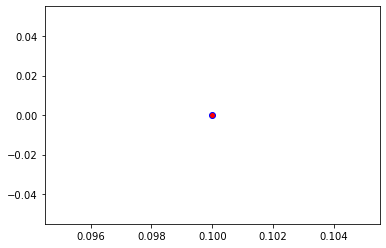

000000190007 18 = magpie
000000190140 814 = speedboat
000000190236 556 = screen
000000190307 978 = seashore
000000190637 750 = quilt
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


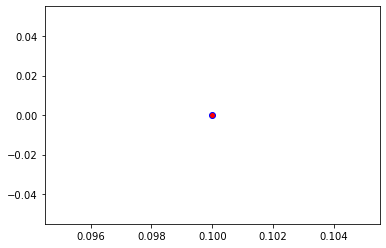

000000190648 669 = mosquito net
000000190676 504 = coffee mug
000000190753 706 = patio
000000190756 671 = mountain bike
000000190841 880 = unicycle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


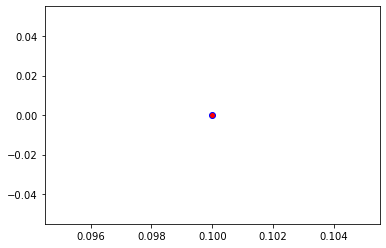

000000190853 515 = cowboy hat
000000190923 920 = traffic light
000000191013 409 = analog clock
000000191288 103 = platypus
000000191471 919 = street sign
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


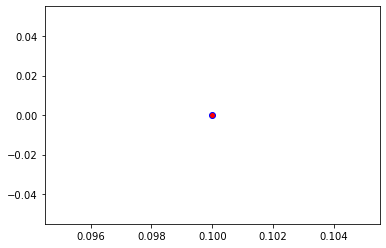

000000191580 461 = plate
000000191614 793 = shower cap
000000191672 978 = seashore
000000191761 774 = sandal
000000191845 723 = pinwheel
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


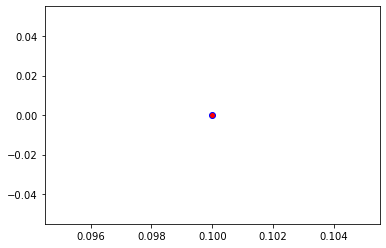

000000192047 435 = bathtub
000000192191 827 = stove
000000192607 609 = jeep
000000192670 843 = swing
000000192699 796 = ski mask
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


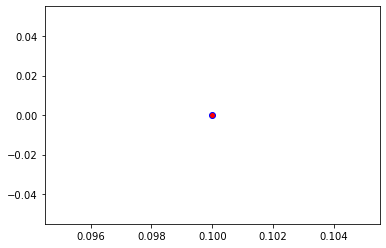

000000192716 919 = street sign
000000192871 572 = goblet
000000192904 570 = gasmask
000000192964 755 = radio telescope
000000193162 433 = bathing cap
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


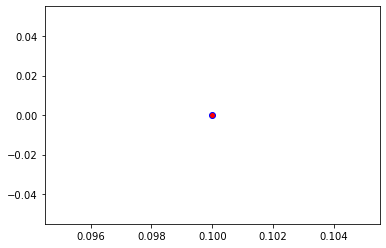

000000193181 981 = ballplayer
000000193245 842 = swimming trunks
000000193348 761 = remote control
000000193429 428 = barrow
000000193494 669 = mosquito net
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


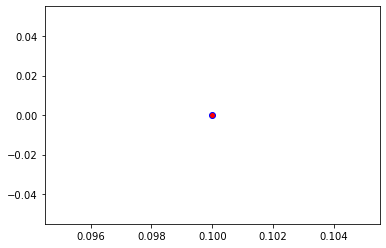

000000193674 842 = swimming trunks
000000193717 447 = binoculars
000000193743 752 = racket
000000193884 716 = picket fence
000000193926 806 = sock
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


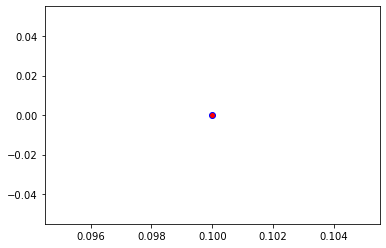

000000194216 830 = stretcher
000000194471 4 = hammer
000000194506 328 = sea urchin
000000194716 570 = mask
000000194724 965 = burrito
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


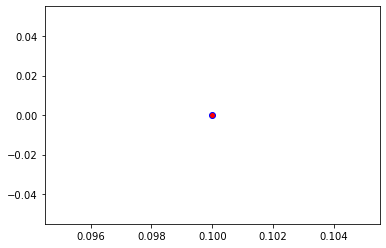

000000194746 572 = goblet
000000194832 705 = passenger car
000000194875 518 = crash helmet
000000194940 551 = face powder
000000195045 706 = patio
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


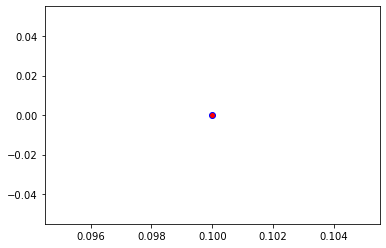

000000195165 896 = washbasin
000000195754 598 = home theater
000000195842 495 = china cabinet
000000195918 527 = desktop computer
000000196009 898 = water bottle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


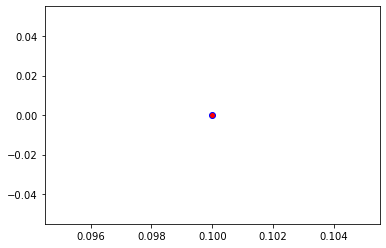

000000196141 862 = torch
000000196185 404 = airliner
000000196442 248 = ski
000000196754 611 = jigsaw puzzle
000000196759 656 = minivan
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


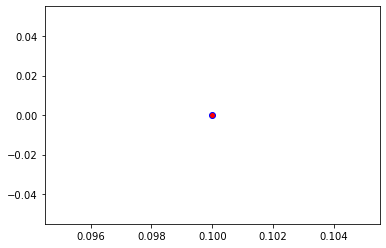

000000196843 829 = streetcar
000000197004 793 = shower cap
000000197022 861 = toilet seat
000000197388 248 = ski
000000197528 904 = window screen
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


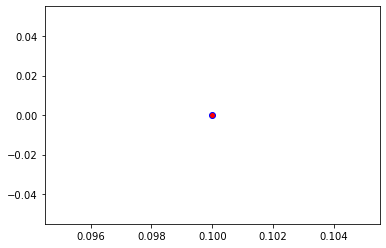

000000197658 981 = ballplayer
000000197796 648 = medicine chest
000000197870 355 = llama
000000198489 879 = umbrella
000000198510 872 = tripod
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


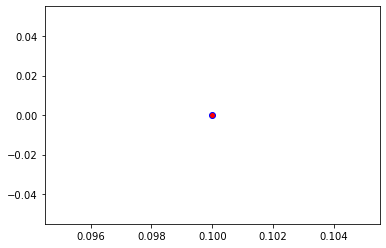

000000198641 556 = screen
000000198805 717 = pickup
000000198915 919 = street sign
000000198928 863 = totem pole
000000198960 178 = Weimaraner
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


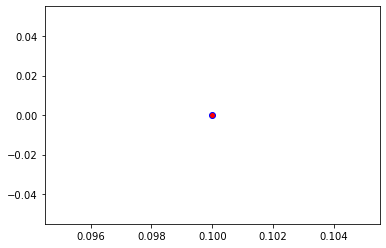

000000199055 570 = gasmask
000000199236 818 = spotlight
000000199310 202 = soft-coated wheaten terrier
000000199395 701 = parachute
000000199442 248 = ski
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


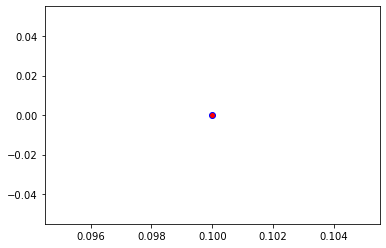

000000199551 669 = mosquito net
000000199681 651 = microwave
000000199771 762 = restaurant
000000199977 744 = projectile
000000200152 971 = bubble
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


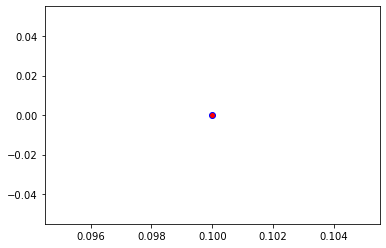

000000200162 547 = electric locomotive
000000200252 750 = quilt
000000200421 223 = schipperke
000000200667 541 = drum
000000200839 324 = cab
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


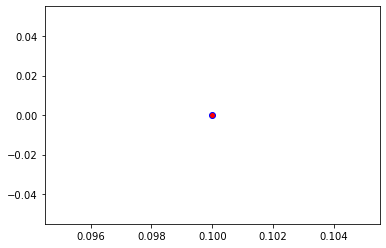

000000200961 173 = Ibizan hound
000000201025 386 = African elephant
000000201072 981 = ballplayer
000000201148 829 = streetcar
000000201418 627 = limousine
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


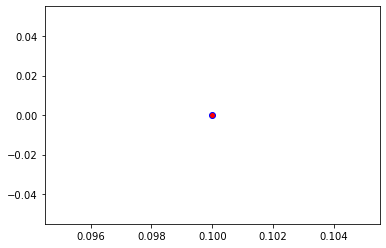

000000201426 720 = pill bottle
000000201646 593 = harmonica
000000201676 340 = zebra
000000201775 896 = washbasin
000000201934 874 = trolleybus
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


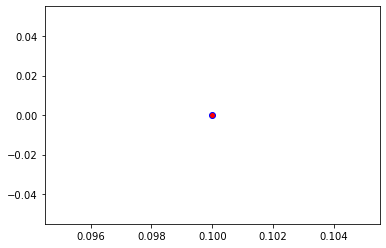

000000202001 650 = microphone
000000202228 648 = medicine chest
000000202339 747 = punching bag
000000202445 831 = studio couch
000000203095 883 = vase
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


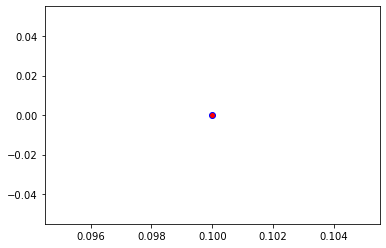

000000203294 757 = recreational vehicle
000000203317 704 = parking meter
000000203389 461 = breastplate
000000203488 704 = parking meter
000000203546 344 = hippopotamus
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


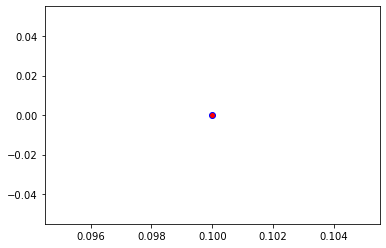

000000203580 879 = umbrella
000000203629 558 = flute
000000203639 447 = binoculars
000000203864 752 = racket
000000203931 981 = ballplayer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


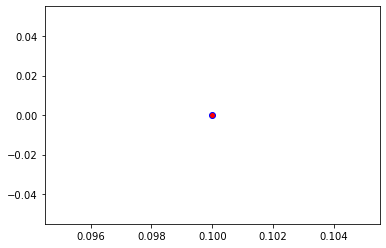

000000204186 560 = football helmet
000000204329 806 = sock
000000204871 503 = cocktail shaker
000000205105 752 = racket
000000205282 251 = dalmatian
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


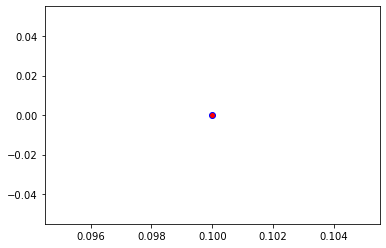

000000205289 866 = tractor
000000205324 234 = Rottweiler
000000205333 832 = stupa
000000205401 576 = gondola
000000205514 762 = restaurant
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


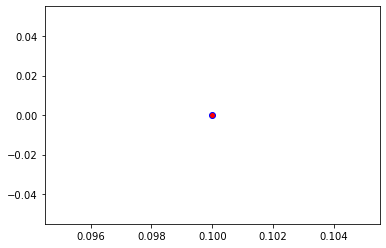

000000205542 725 = pitcher
000000205647 569 = garbage truck
000000205776 51 = triceratops
000000205834 219 = cocker spaniel
000000206025 639 = suit
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


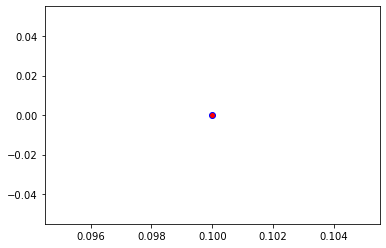

000000206027 965 = burrito
000000206135 355 = llama
000000206218 620 = laptop
000000206271 846 = table lamp
000000206411 861 = toilet seat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


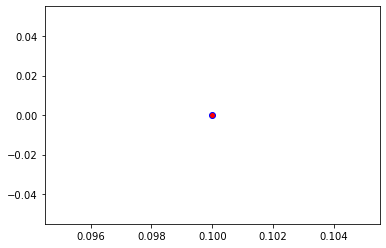

000000206487 734 = police van
000000206579 626 = lighter
000000206831 178 = Weimaraner
000000206838 145 = king penguin
000000206994 407 = ambulance
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


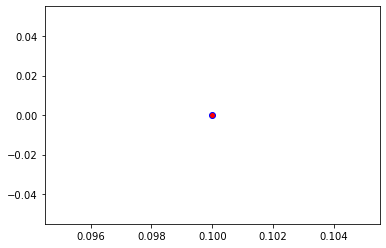

000000207306 412 = ashcan
000000207538 651 = microwave
000000207585 850 = teddy
000000207728 5 = ram
000000207844 879 = umbrella
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


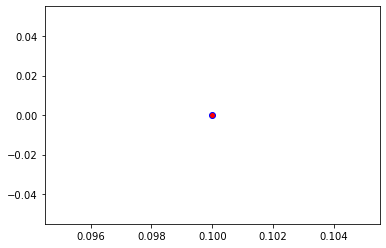

000000208208 549 = envelope
000000208363 982 = groom
000000208423 978 = seashore
000000208901 404 = airliner
000000209142 412 = ashcan
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


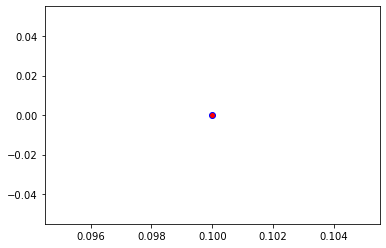

000000209222 401 = accordion
000000209530 851 = television
000000209613 5 = ram
000000209747 896 = washbasin
000000209753 558 = flute
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


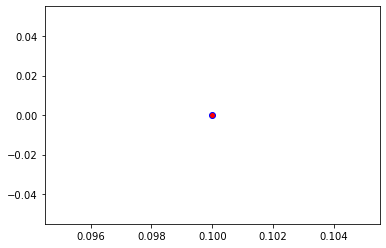

000000209757 916 = web site
000000209829 646 = maze
000000209972 484 = catamaran
000000210030 712 = Petri dish
000000210032 928 = ice cream
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


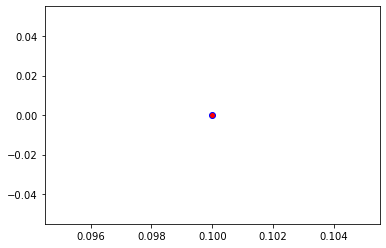

000000210099 765 = rocking chair
000000210230 898 = water bottle
000000210273 654 = minibus
000000210299 671 = mountain bike
000000210388 818 = spotlight
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


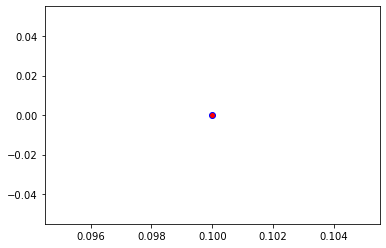

000000210394 654 = minibus
000000210502 466 = bullet train
000000210520 584 = hair slide
000000210708 386 = African elephant
000000210789 879 = umbrella
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


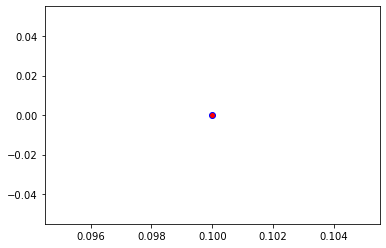

000000210855 896 = washbasin
000000210915 2 = great white shark
000000211042 861 = toilet seat
000000211069 293 = cheetah
000000211120 721 = pillow
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


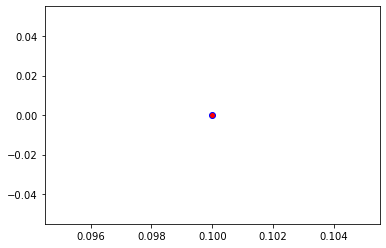

000000211674 829 = streetcar
000000211825 898 = water bottle
000000212072 704 = parking meter
000000212166 916 = web site
000000212226 818 = spotlight
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


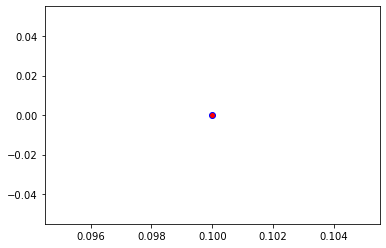

000000212453 794 = shower curtain
000000212559 5 = ram
000000212573 568 = fur coat
000000212800 576 = gondola
000000212895 138 = bustard
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


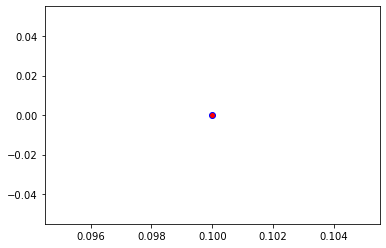

000000213033 447 = binoculars
000000213035 457 = bow tie
000000213086 760 = refrigerator
000000213171 981 = ballplayer
000000213224 883 = vase
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


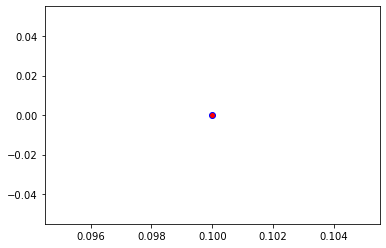

000000213255 898 = water bottle
000000213422 750 = quilt
000000213445 285 = Egyptian cat
000000213547 297 = slot
000000213593 324 = cab
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


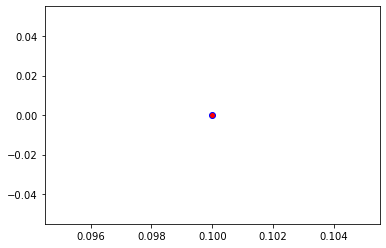

000000213605 874 = trolleybus
000000213816 799 = sliding door
000000213830 752 = racket
000000213935 398 = abacus
000000214192 671 = mountain bike
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


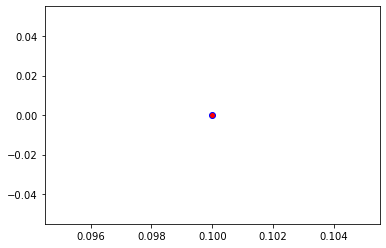

000000214200 919 = street sign
000000214205 405 = airship
000000214224 737 = pop bottle
000000214539 805 = soccer ball
000000214703 143 = oystercatcher
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


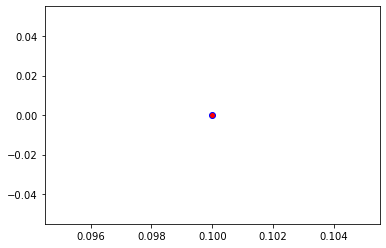

000000214720 532 = dining table
000000214753 354 = Arabian camel
000000214869 461 = breastplate
000000215072 665 = moped
000000215114 760 = refrigerator
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


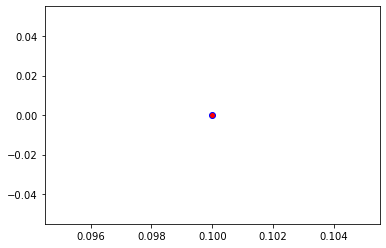

000000215245 340 = zebra
000000215259 560 = football helmet
000000215644 651 = microwave
000000215723 324 = cab
000000215778 681 = notebook
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


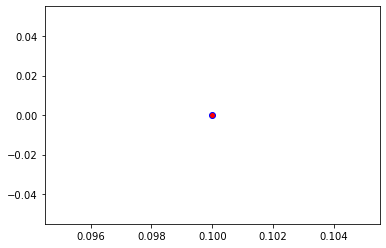

000000216277 487 = cellular telephone
000000216296 752 = racket
000000216419 409 = analog clock
000000216497 799 = sliding door
000000216516 248 = ski
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


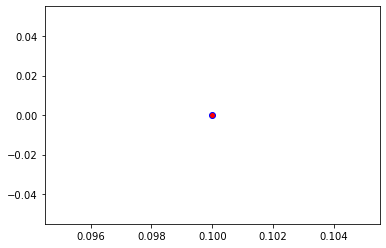

000000216636 470 = candle
000000216739 562 = fountain
000000217060 318 = wing
000000217219 750 = quilt
000000217285 655 = miniskirt
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


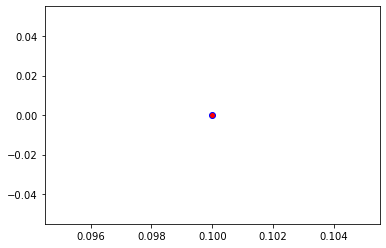

000000217400 705 = passenger car
000000217425 892 = wall clock
000000217614 250 = Siberian husky
000000217753 509 = confectionery
000000217872 248 = ski
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


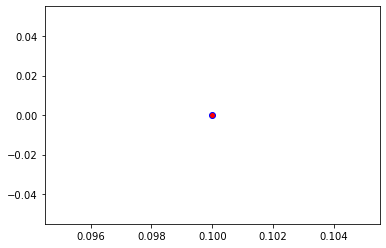

000000217948 366 = gorilla
000000217957 442 = bell cote
000000218091 532 = dining table
000000218249 419 = Band Aid
000000218362 781 = scoreboard
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


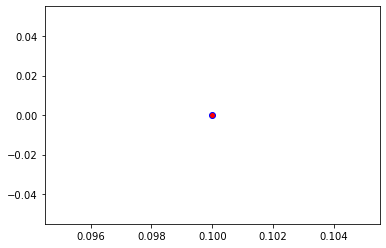

000000218424 340 = zebra
000000218439 655 = miniskirt
000000218997 646 = maze
000000219271 140 = alp
000000219283 850 = teddy
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


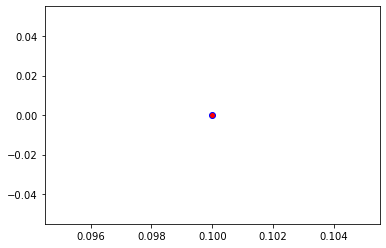

000000219440 344 = hippopotamus
000000219485 904 = window screen
000000219578 151 = Chihuahua
000000220310 412 = ashcan
000000220584 67 = dam
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


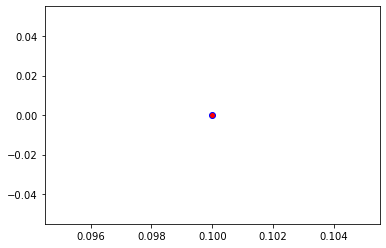

000000220732 654 = minibus
000000220764 872 = tripod
000000220858 978 = seashore
000000221017 355 = llama
000000221155 843 = swing
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


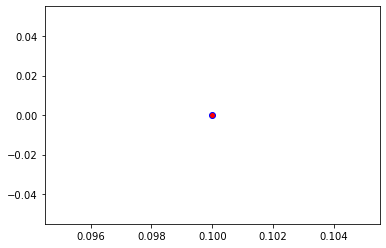

000000221213 839 = suspension bridge
000000221281 50 = American alligator
000000221291 433 = bathing cap
000000221502 703 = park bench
000000221693 209 = Chesapeake Bay retriever
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


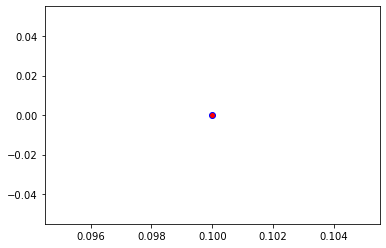

000000221708 762 = restaurant
000000221754 829 = streetcar
000000221872 329 = cucumber
000000222094 792 = shovel
000000222118 614 = kimono
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


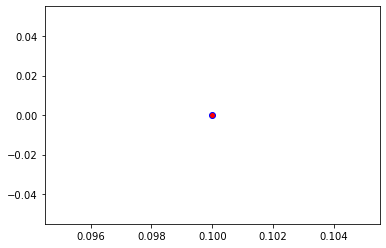

000000222235 282 = tiger cat
000000222299 636 = mailbag
000000222317 831 = studio couch
000000222455 556 = screen
000000222458 703 = park bench
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


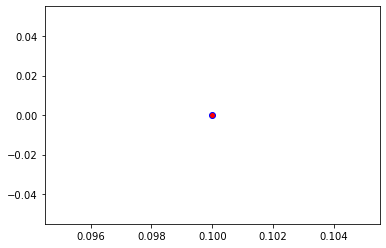

000000222559 536 = dock
000000222735 761 = remote control
000000222825 760 = refrigerator
000000222863 246 = Great Dane
000000222991 840 = swab
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


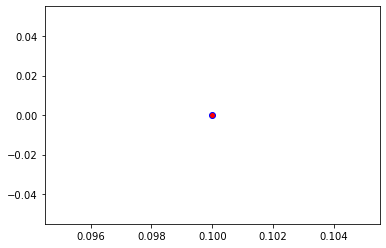

000000223090 883 = vase
000000223130 251 = dalmatian
000000223182 297 = slot
000000223188 51 = triceratops
000000223738 560 = football helmet
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


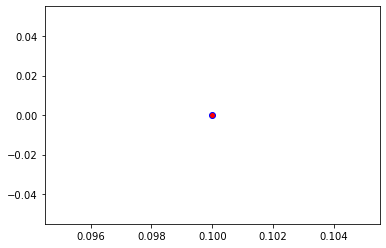

000000223747 785 = seat belt
000000223789 896 = washbasin
000000223955 522 = croquet ball
000000223959 752 = racket
000000224051 671 = mountain bike
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


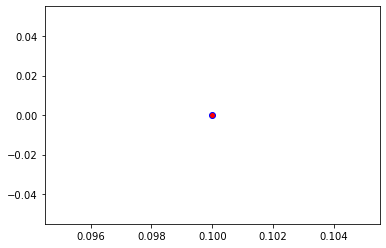

000000224093 958 = hay
000000224119 466 = bullet train
000000224200 562 = fountain
000000224222 978 = seashore
000000224337 457 = bow tie
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


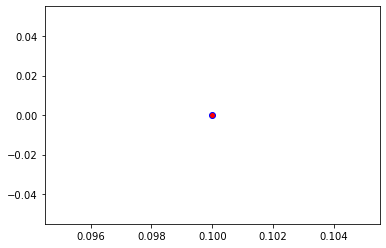

000000224664 978 = seashore
000000224675 445 = bikini
000000224724 571 = gas pump
000000224807 787 = shield
000000225184 129 = spoonbill
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


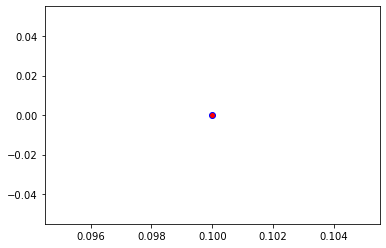

000000225405 560 = football helmet
000000225532 919 = street sign
000000225670 498 = cinema
000000225757 556 = screen
000000225946 460 = breakwater
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


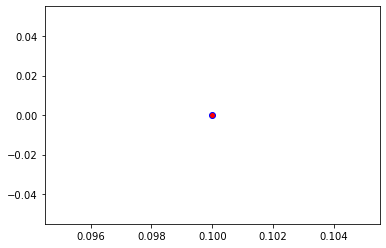

000000226058 721 = pillow
000000226111 919 = street sign
000000226130 934 = hotdog
000000226147 723 = pinwheel
000000226154 654 = minibus
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


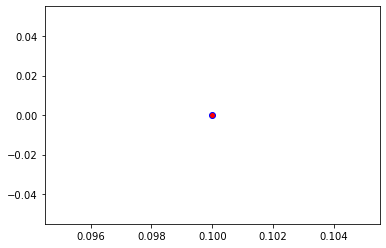

000000226171 526 = desk
000000226408 616 = knot
000000226417 880 = unicycle
000000226592 721 = pillow
000000226662 444 = bicycle-built-for-two
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


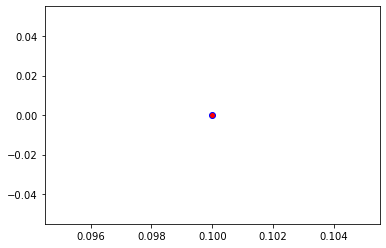

000000226802 829 = streetcar
000000226883 386 = African elephant
000000226903 706 = patio
000000226984 415 = bakery
000000227044 861 = toilet seat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


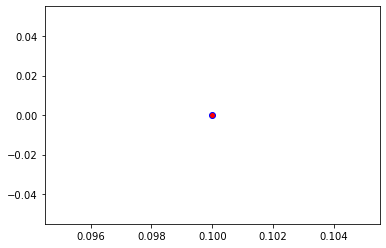

000000227187 613 = joystick
000000227399 829 = streetcar
000000227478 603 = horse cart
000000227482 429 = baseball
000000227491 248 = ski
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


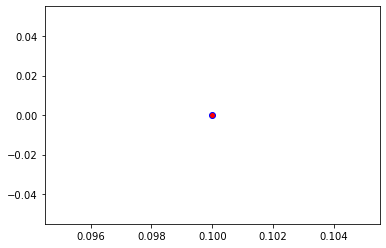

000000227511 324 = cab
000000227686 735 = poncho
000000227765 828 = strainer
000000227898 880 = unicycle
000000227985 965 = burrito
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


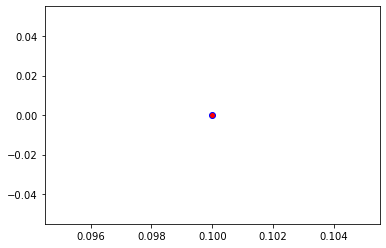

000000228144 116 = cradle
000000228214 632 = loudspeaker
000000228436 444 = bicycle-built-for-two
000000228771 919 = street sign
000000228942 324 = cab
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


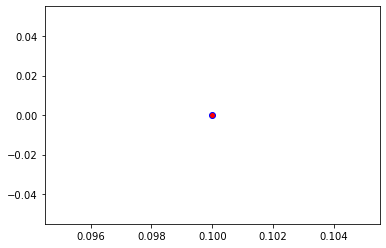

000000228981 487 = cellular telephone
000000229111 688 = oscilloscope
000000229216 461 = breastplate
000000229221 242 = boxer
000000229311 896 = washbasin
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


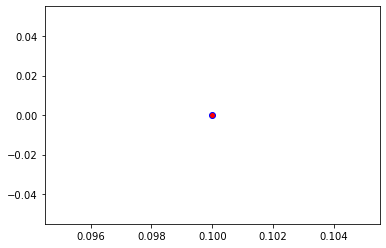

000000229358 648 = medicine chest
000000229553 570 = gasmask
000000229601 562 = fountain
000000229659 762 = restaurant
000000229747 812 = space shuttle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


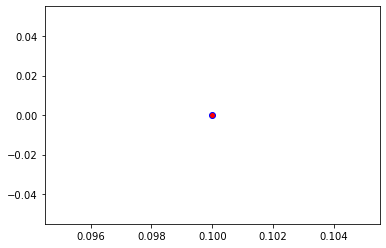

000000229753 113 = nail
000000229849 981 = ballplayer
000000229858 354 = Arabian camel
000000229948 603 = horse cart
000000229997 973 = coral reef
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


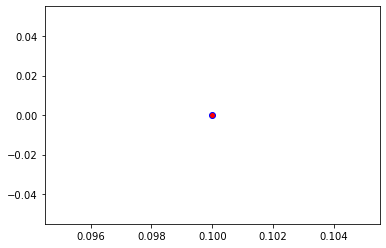

000000230008 444 = bicycle-built-for-two
000000230166 267 = standard poodle
000000230362 536 = dock
000000230450 704 = parking meter
000000230819 99 = goose
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


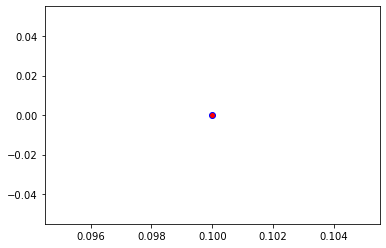

000000230983 523 = crutch
000000230993 879 = umbrella
000000231088 879 = umbrella
000000231097 438 = beaker
000000231125 582 = grocery store
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


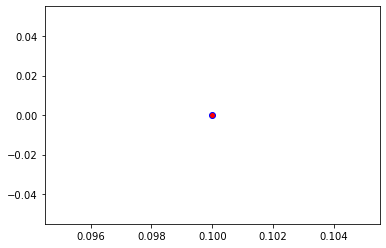

000000231169 829 = streetcar
000000231237 883 = vase
000000231339 760 = refrigerator
000000231508 879 = umbrella
000000231527 712 = Petri dish
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


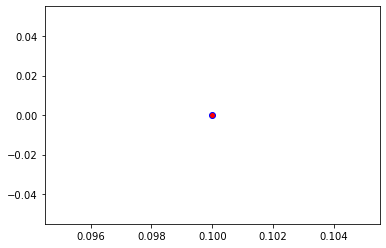

000000231549 406 = altar
000000231580 105 = koala
000000231747 495 = china cabinet
000000231822 928 = ice cream
000000231831 285 = Egyptian cat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


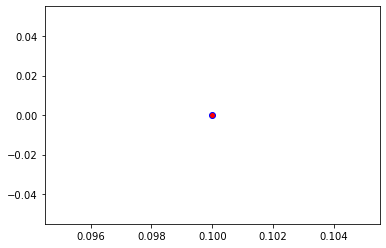

000000231879 474 = cardigan
000000232088 598 = home theater
000000232244 411 = apron
000000232348 859 = toaster
000000232489 928 = ice cream
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


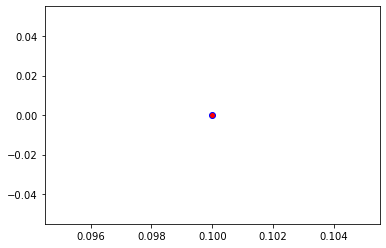

000000232538 829 = streetcar
000000232563 879 = umbrella
000000232646 704 = parking meter
000000232649 896 = washbasin
000000232684 818 = spotlight
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


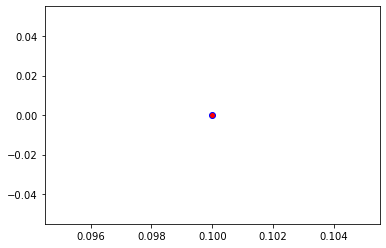

000000232692 562 = fountain
000000233033 706 = patio
000000233139 892 = wall clock
000000233238 706 = patio
000000233370 4 = hammer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


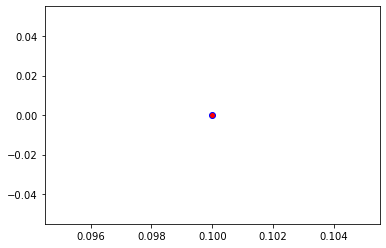

000000233567 346 = water buffalo
000000233727 874 = trolleybus
000000233771 879 = umbrella
000000233825 532 = dining table
000000234366 442 = bell cote
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


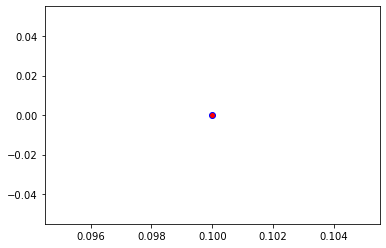

000000234413 861 = toilet seat
000000234526 254 = pug
000000234607 608 = jean
000000234660 466 = bullet train
000000234757 704 = parking meter
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


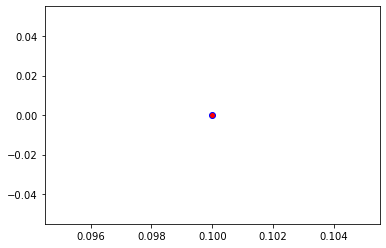

000000234779 928 = ice cream
000000234807 649 = megalith
000000235057 290 = jaguar
000000235064 294 = brown bear
000000235241 819 = stage
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


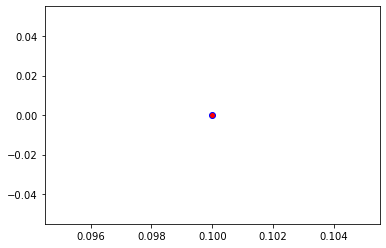

000000235252 802 = snowmobile
000000235399 675 = moving van
000000235778 794 = shower curtain
000000235784 646 = maze
000000235836 556 = screen
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


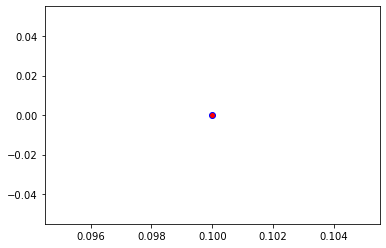

000000235857 37 = ox
000000236166 151 = Chihuahua
000000236308 248 = ski
000000236412 463 = bucket
000000236426 752 = racket
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


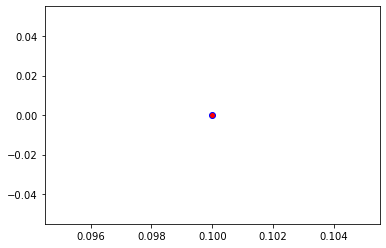

000000236592 217 = English springer
000000236599 522 = croquet ball
000000236690 89 = sulphur-crested cockatoo
000000236721 899 = water jug
000000236730 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


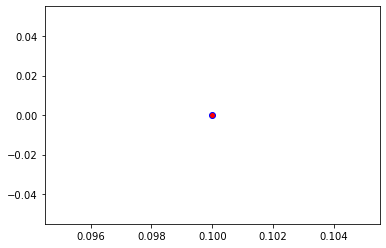

000000236784 209 = Chesapeake Bay retriever
000000236845 919 = street sign
000000236914 850 = teddy
000000237071 752 = racket
000000237118 793 = shower cap
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


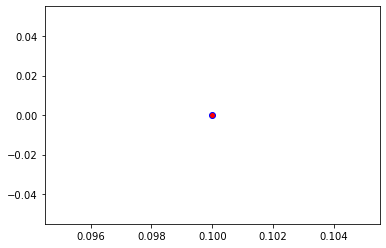

000000237316 861 = toilet seat
000000237517 28 = pot
000000237864 101 = tusker
000000237928 760 = refrigerator
000000237984 703 = park bench
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


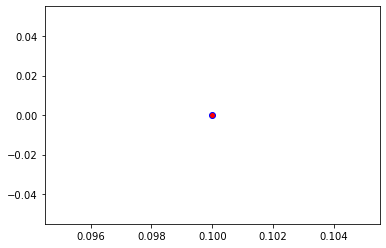

000000238013 722 = ping-pong ball
000000238039 104 = wallaby
000000238410 559 = folding chair
000000238866 149 = gong
000000239041 648 = medicine chest
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


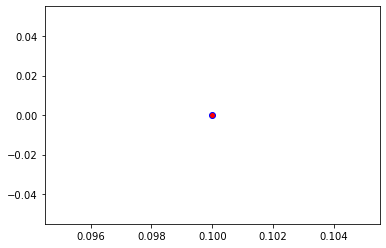

000000239274 404 = liner
000000239318 620 = laptop
000000239347 495 = china cabinet
000000239537 522 = croquet ball
000000239627 896 = washbasin
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


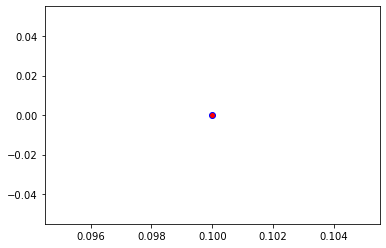

000000239717 898 = water bottle
000000239773 981 = ballplayer
000000239843 919 = street sign
000000239857 354 = Arabian camel
000000240023 752 = racket
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


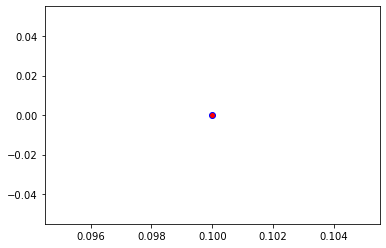

000000240049 431 = bassinet
000000240250 435 = bathtub
000000240754 37 = ox
000000240767 324 = cab
000000240940 285 = Egyptian cat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


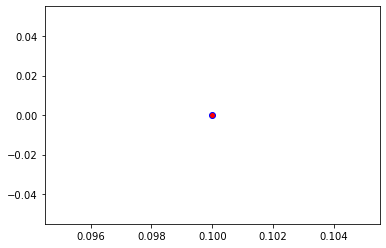

000000241297 565 = freight car
000000241319 896 = washbasin
000000241326 237 = miniature pinscher
000000241602 539 = doormat
000000241668 982 = groom
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


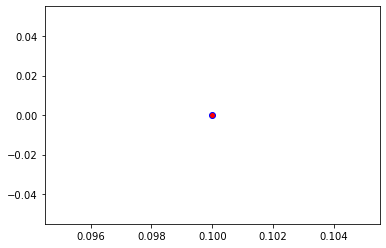

000000241677 839 = suspension bridge
000000242060 861 = toilet seat
000000242287 765 = rocking chair
000000242411 829 = streetcar
000000242678 297 = slot
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


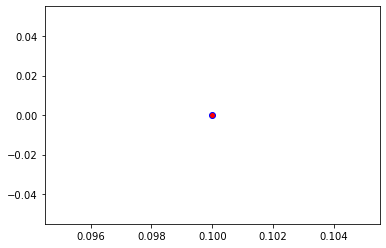

000000242724 603 = horse cart
000000242934 794 = shower curtain
000000242946 532 = dining table
000000243034 442 = bell cote
000000243075 296 = ice bear
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


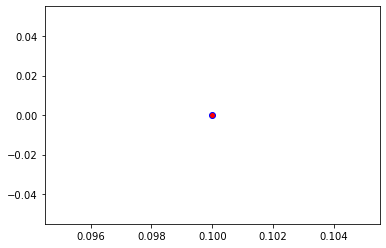

000000243148 796 = ski mask
000000243199 620 = laptop
000000243204 796 = ski mask
000000243344 760 = refrigerator
000000243495 861 = toilet seat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


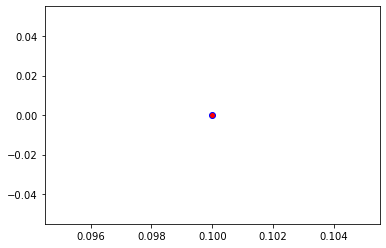

000000243626 461 = plate
000000243867 627 = limousine
000000243989 898 = water bottle
000000244019 704 = parking meter
000000244099 977 = sandbar
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


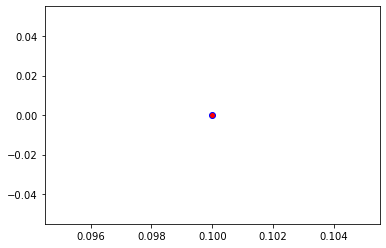

000000244181 679 = necklace
000000244379 920 = traffic light
000000244411 37 = ox
000000244496 639 = suit
000000244592 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


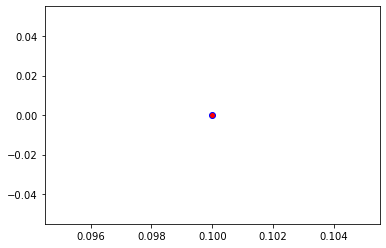

000000244750 647 = measuring cup
000000244833 788 = shoe shop
000000245026 786 = sewing machine
000000245102 818 = spotlight
000000245173 442 = bell cote
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


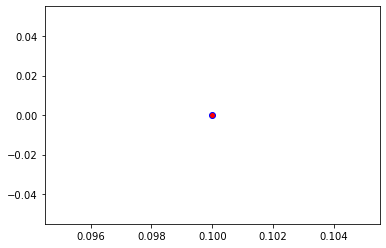

000000245311 922 = menu
000000245320 386 = African elephant
000000245448 444 = bicycle-built-for-two
000000245513 706 = patio
000000245576 658 = mitten
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


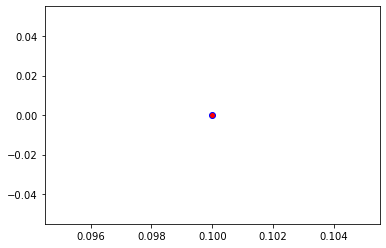

000000245651 605 = iPod
000000245764 794 = shower curtain
000000245915 5 = ram
000000246308 611 = jigsaw puzzle
000000246436 827 = stove
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


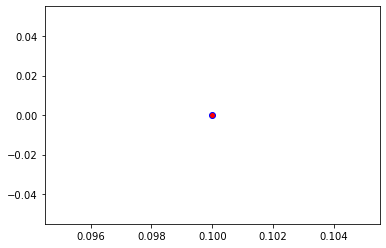

000000246454 171 = Italian greyhound
000000246522 442 = bell cote
000000246883 978 = seashore
000000246963 670 = motor scooter
000000246968 532 = dining table
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


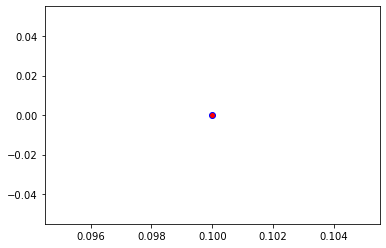

000000247806 497 = church
000000247838 802 = snowmobile
000000247917 560 = football helmet
000000248111 760 = refrigerator
000000248112 752 = racket
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


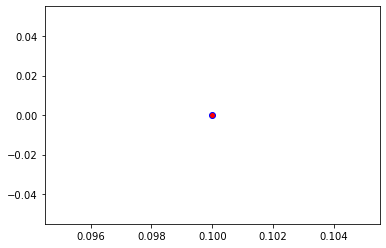

000000248284 879 = umbrella
000000248314 526 = desk
000000248334 472 = canoe
000000248400 745 = projector
000000248616 560 = football helmet
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


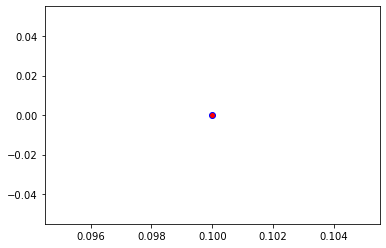

000000248631 681 = notebook
000000248752 981 = ballplayer
000000248810 289 = snow leopard
000000248980 451 = bolo tie
000000249025 818 = spotlight
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


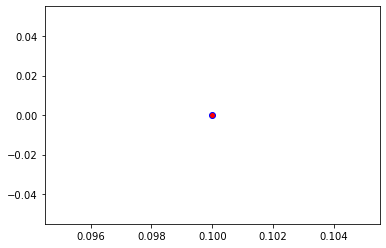

000000249129 745 = projector
000000249180 421 = bannister
000000249219 829 = streetcar
000000249550 750 = quilt
000000249643 829 = streetcar
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


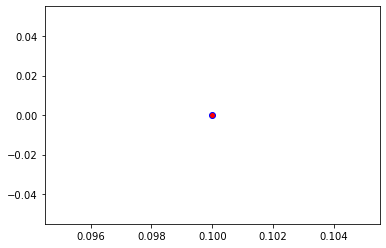

000000249786 248 = ski
000000250127 879 = umbrella
000000250137 541 = drum
000000250205 146 = albatross
000000250282 880 = unicycle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


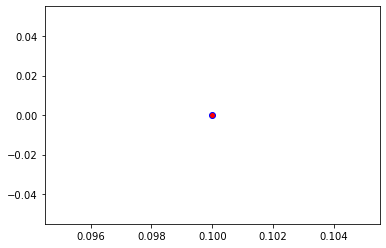

000000250619 879 = umbrella
000000250758 340 = zebra
000000250766 464 = buckle
000000250901 105 = koala
000000251065 861 = toilet seat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


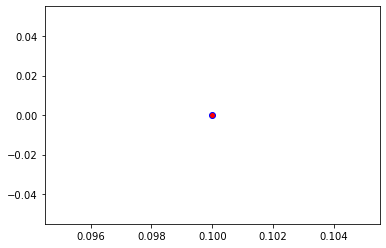

000000251119 898 = water bottle
000000251140 922 = menu
000000251537 584 = hair slide
000000251572 212 = English setter
000000251824 683 = oboe
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


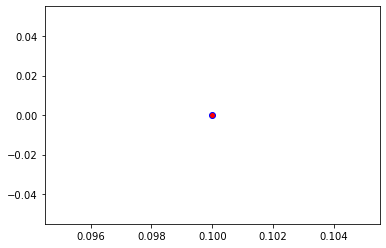

000000252216 355 = llama
000000252219 799 = sliding door
000000252294 423 = barber chair
000000252332 919 = street sign
000000252507 248 = ski
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


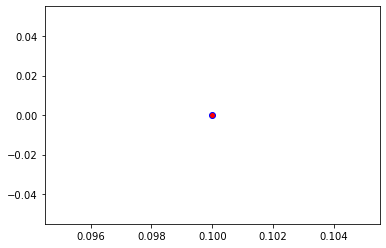

000000252559 324 = cab
000000252701 144 = pelican
000000252716 947 = mushroom
000000252776 880 = unicycle
000000253002 829 = streetcar
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


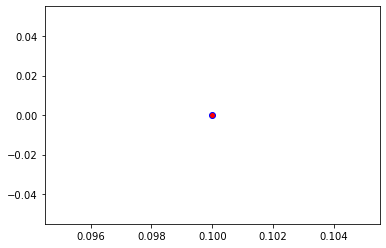

000000253386 236 = Doberman
000000253433 850 = teddy
000000253452 461 = plate
000000253695 981 = ballplayer
000000253742 879 = umbrella
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


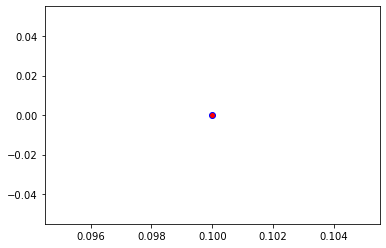

000000253819 843 = swing
000000253835 880 = unicycle
000000254016 634 = lumbermill
000000254368 564 = four-poster
000000254516 843 = swing
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


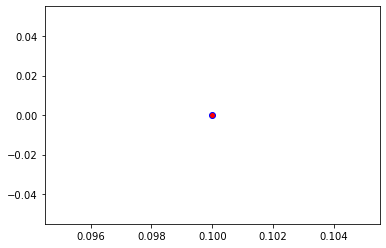

000000254814 627 = limousine
000000255165 526 = desk
000000255401 861 = toilet seat
000000255483 879 = umbrella
000000255536 706 = patio
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


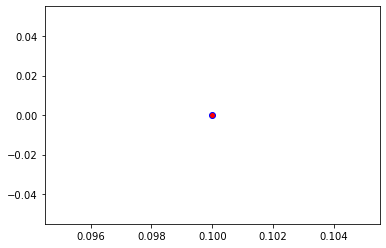

000000255664 172 = whippet
000000255718 562 = fountain
000000255747 928 = ice cream
000000255749 555 = fire engine
000000255824 700 = paper towel
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


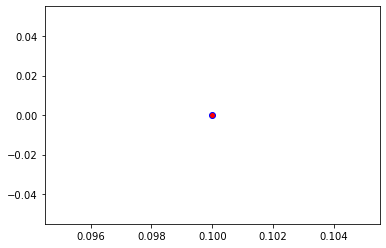

000000255912 28 = pot
000000255917 324 = cab
000000255965 285 = Egyptian cat
000000256192 670 = motor scooter
000000256195 547 = electric locomotive
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


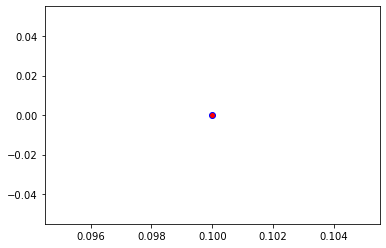

000000256407 679 = necklace
000000256518 504 = coffee mug
000000256775 801 = snorkel
000000256868 880 = unicycle
000000256916 529 = diaper
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


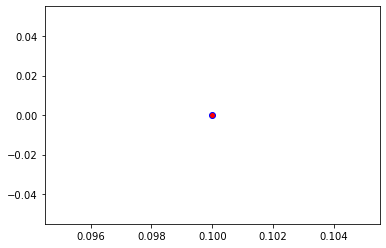

000000256941 727 = planetarium
000000257084 818 = spotlight
000000257169 589 = hand blower
000000257370 781 = scoreboard
000000257478 981 = ballplayer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


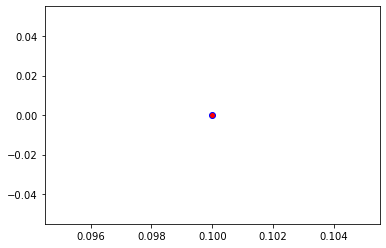

000000257566 839 = suspension bridge
000000257624 805 = soccer ball
000000257865 981 = ballplayer
000000257896 639 = suit
000000258388 745 = projector
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


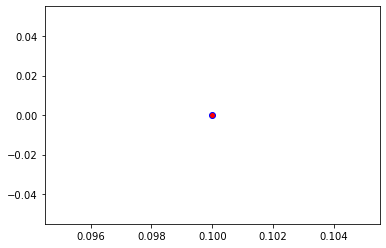

000000258541 906 = Windsor tie
000000258793 704 = parking meter
000000258883 455 = bottlecap
000000258911 476 = carousel
000000259097 460 = breakwater
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


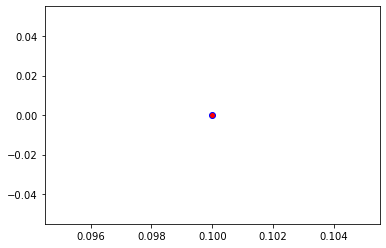

000000259382 251 = dalmatian
000000259571 561 = forklift
000000259597 851 = television
000000259625 270 = white wolf
000000259640 480 = cash machine
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


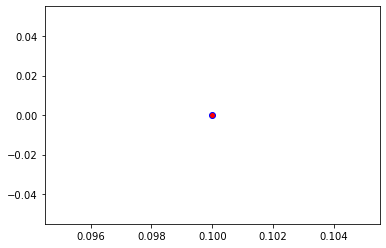

000000259690 566 = French horn
000000259830 569 = garbage truck
000000259854 919 = street sign
000000260105 532 = dining table
000000260106 830 = stretcher
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


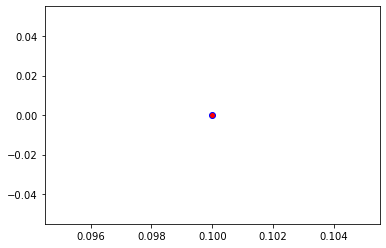

000000260261 480 = cash machine
000000260266 920 = traffic light
000000260470 898 = water bottle
000000260657 919 = street sign
000000260925 230 = Shetland sheepdog
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


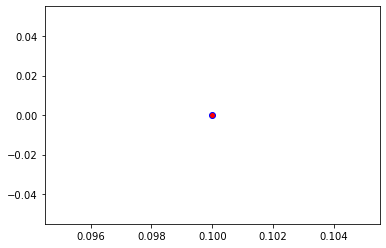

000000261036 879 = umbrella
000000261061 522 = croquet ball
000000261097 981 = ballplayer
000000261116 818 = spotlight
000000261161 217 = English springer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


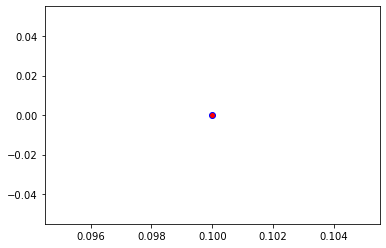

000000261318 791 = shopping cart
000000261535 752 = racket
000000261706 223 = schipperke
000000261712 706 = patio
000000261732 297 = slot
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


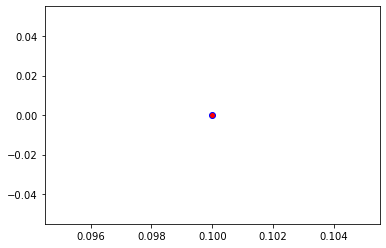

000000261796 716 = picket fence
000000261888 671 = mountain bike
000000261982 843 = swing
000000262048 879 = umbrella
000000262227 620 = laptop
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


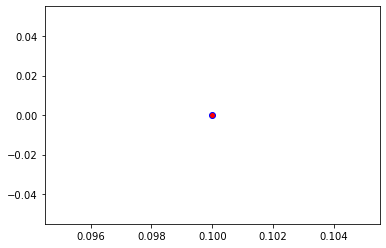

000000262440 423 = barber chair
000000262487 819 = stage
000000262587 978 = seashore
000000262631 971 = bubble
000000262682 651 = microwave
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


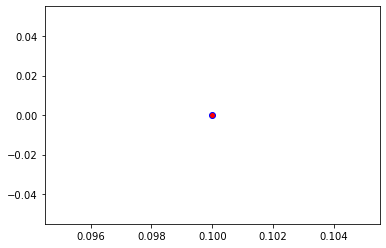

000000262895 457 = bow tie
000000262938 785 = seat belt
000000263068 421 = bannister
000000263299 444 = bicycle-built-for-two
000000263403 500 = cliff
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


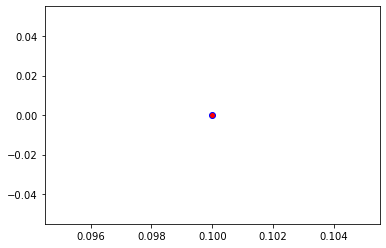

000000263425 410 = apiary
000000263463 475 = car mirror
000000263474 861 = toilet seat
000000263594 324 = cab
000000263644 564 = four-poster
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


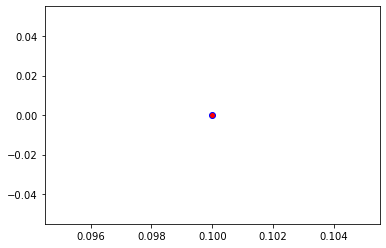

000000263679 417 = balloon
000000263796 485 = CD player
000000263860 386 = African elephant
000000263966 250 = Siberian husky
000000263969 570 = gasmask
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


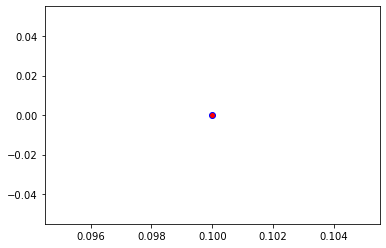

000000264335 21 = kite
000000264441 356 = weasel
000000264535 267 = standard poodle
000000264968 981 = ballplayer
000000265108 417 = balloon
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


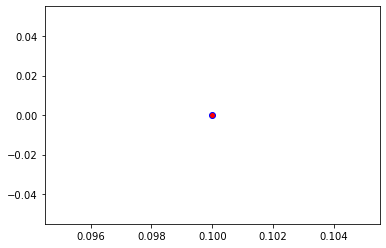

000000265518 855 = thimble
000000265777 966 = red wine
000000265816 444 = bicycle-built-for-two
000000266082 898 = water bottle
000000266206 799 = sliding door
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


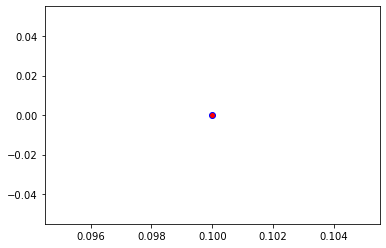

000000266400 665 = moped
000000266409 248 = ski
000000266768 444 = bicycle-built-for-two
000000266892 523 = crutch
000000266981 756 = rain barrel
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


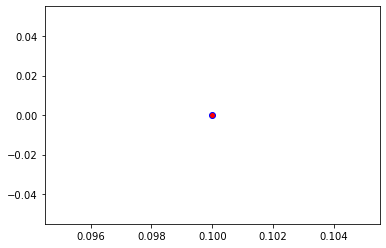

000000267169 973 = coral reef
000000267191 386 = African elephant
000000267300 173 = Ibizan hound
000000267351 442 = bell cote
000000267434 37 = ox
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


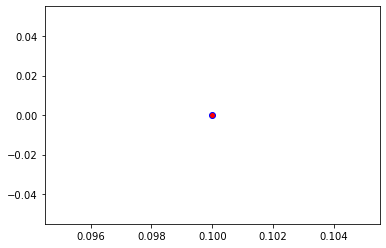

000000267537 612 = jinrikisha
000000267670 896 = washbasin
000000267903 572 = goblet
000000267933 646 = maze
000000267940 404 = liner
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


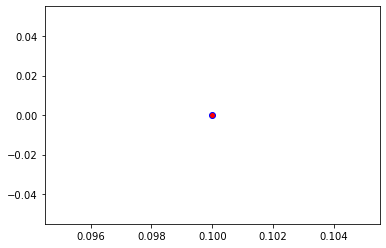

000000267946 919 = street sign
000000268000 839 = suspension bridge
000000268375 386 = African elephant
000000268378 716 = picket fence
000000268729 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


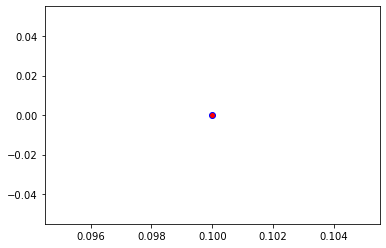

000000268831 861 = toilet seat
000000268996 919 = street sign
000000269113 171 = Italian greyhound
000000269121 752 = racket
000000269196 54 = hog
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


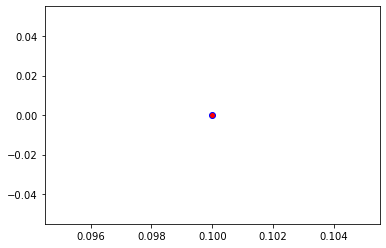

000000269314 496 = Christmas stocking
000000269316 862 = torch
000000269632 874 = trolleybus
000000269682 920 = traffic light
000000269866 651 = microwave
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


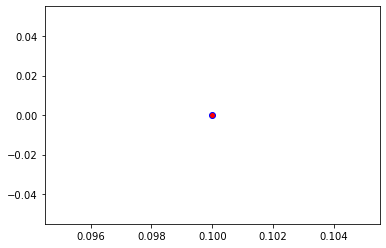

000000269932 583 = guillotine
000000269942 920 = traffic light
000000270066 665 = moped
000000270122 460 = breakwater
000000270244 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


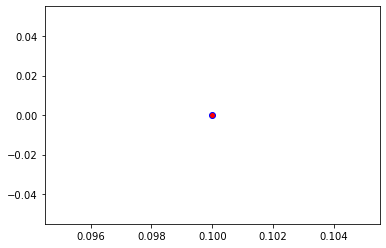

000000270297 565 = freight car
000000270386 919 = street sign
000000270402 386 = African elephant
000000270474 862 = torch
000000270677 474 = cardigan
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


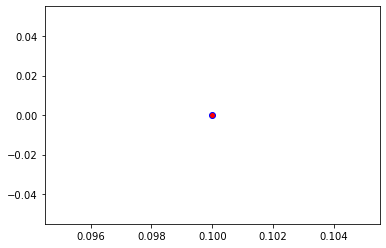

000000270705 84 = peacock
000000270883 678 = neck brace
000000270908 616 = knot
000000271116 639 = suit
000000271402 615 = knee pad
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


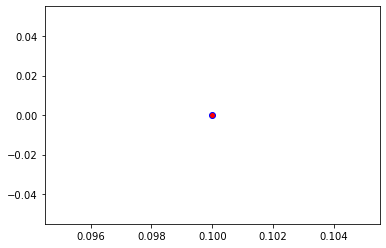

000000271457 562 = fountain
000000271471 415 = bakery
000000271728 831 = studio couch
000000271997 457 = bow tie
000000272049 866 = tractor
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


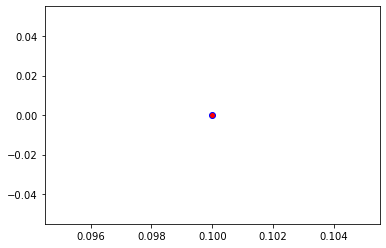

000000272136 812 = space shuttle
000000272148 978 = seashore
000000272212 349 = bighorn
000000272364 61 = boa constrictor
000000272416 861 = toilet seat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


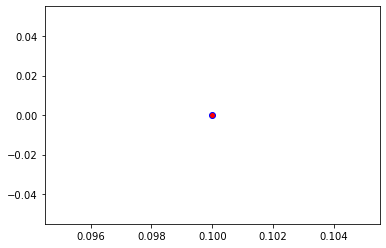

000000272566 954 = banana
000000273132 420 = banjo
000000273198 552 = feather boa
000000273232 807 = solar dish
000000273420 830 = stretcher
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


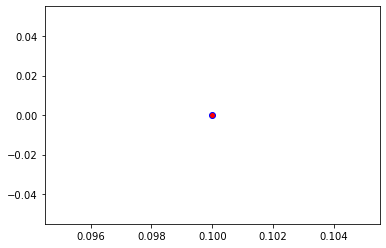

000000273493 752 = racket
000000273551 842 = swimming trunks
000000273617 920 = traffic light
000000273642 761 = remote control
000000273711 532 = dining table
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


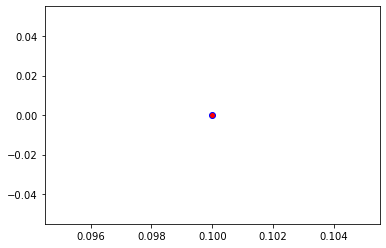

000000273712 760 = refrigerator
000000273715 916 = web site
000000273760 805 = soccer ball
000000274066 248 = ski
000000274219 457 = bow tie
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


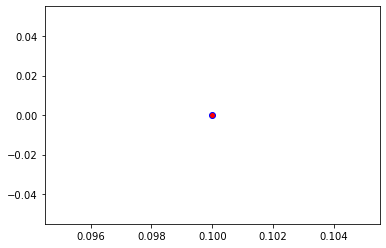

000000274272 734 = police van
000000274411 752 = racket
000000274460 723 = pinwheel
000000274687 444 = bicycle-built-for-two
000000274708 916 = web site
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


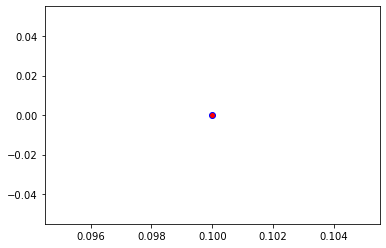

000000275058 843 = swing
000000275198 879 = umbrella
000000275392 354 = Arabian camel
000000275727 547 = electric locomotive
000000275749 532 = dining table
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


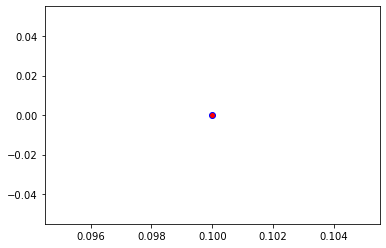

000000275791 654 = minibus
000000276018 560 = football helmet
000000276024 646 = maze
000000276055 416 = balance beam
000000276284 671 = mountain bike
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


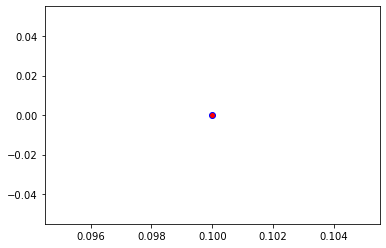

000000276285 762 = restaurant
000000276434 470 = candle
000000276707 919 = street sign
000000276720 562 = fountain
000000276804 781 = scoreboard
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


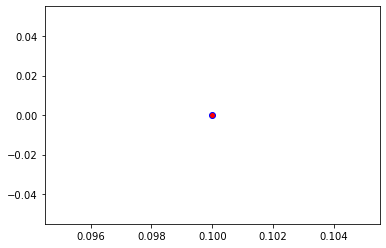

000000276921 850 = teddy
000000277005 498 = cinema
000000277020 905 = window shade
000000277051 12 = house finch
000000277197 532 = dining table
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


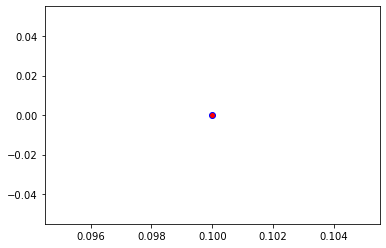

000000277584 284 = Siamese cat
000000277689 470 = candle
000000278006 716 = picket fence
000000278353 5 = ram
000000278463 454 = bookshop
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


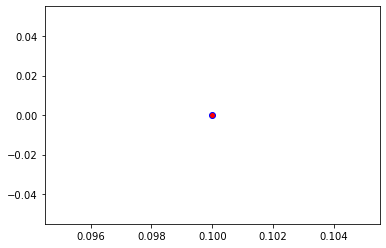

000000278705 456 = bow
000000278749 523 = crutch
000000278848 879 = umbrella
000000278973 693 = paddle
000000279145 706 = patio
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


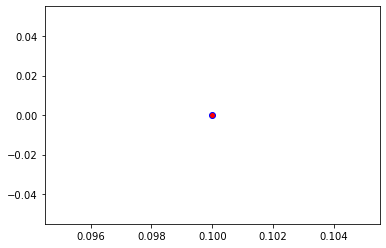

000000279278 704 = parking meter
000000279541 611 = jigsaw puzzle
000000279714 704 = parking meter
000000279730 558 = flute
000000279769 619 = lampshade
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


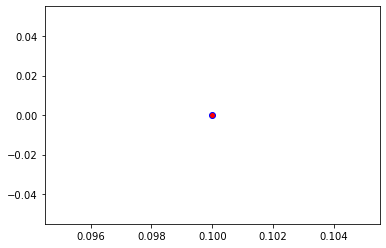

000000279774 981 = ballplayer
000000279887 862 = torch
000000279927 879 = umbrella
000000280325 704 = parking meter
000000280710 297 = slot
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


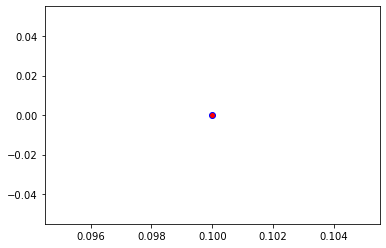

000000280779 792 = shovel
000000280891 398 = abacus
000000280918 745 = projector
000000280930 411 = apron
000000281032 896 = washbasin
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


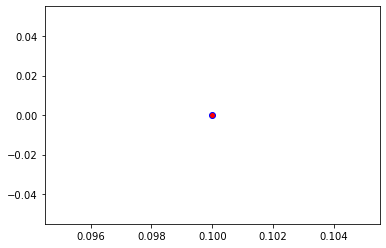

000000281179 555 = fire engine
000000281409 842 = swimming trunks
000000281414 843 = swing
000000281447 339 = sorrel
000000281687 787 = shield
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


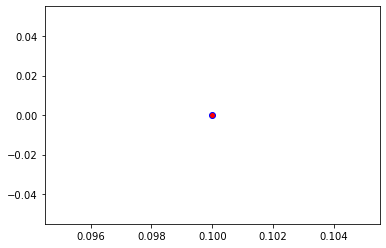

000000281693 404 = airliner
000000281754 879 = umbrella
000000281759 354 = Arabian camel
000000281929 671 = mountain bike
000000282037 981 = ballplayer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


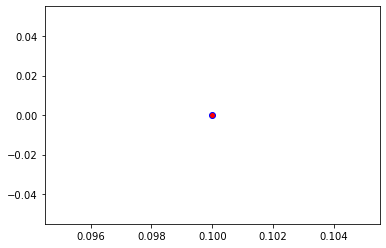

000000282046 703 = park bench
000000282296 760 = refrigerator
000000282298 877 = turnstile
000000282912 290 = jaguar
000000283037 627 = limousine
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


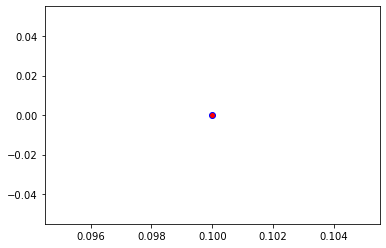

000000283038 919 = street sign
000000283070 474 = cardigan
000000283113 774 = sandal
000000283268 788 = shoe shop
000000283318 799 = sliding door
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


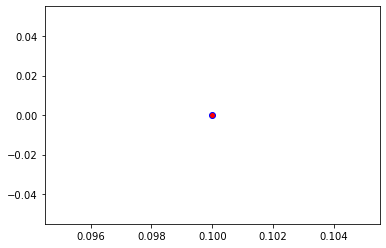

000000283412 265 = toy poodle
000000283520 522 = croquet ball
000000283717 480 = cash machine
000000283785 602 = horizontal bar
000000284106 412 = ashcan
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


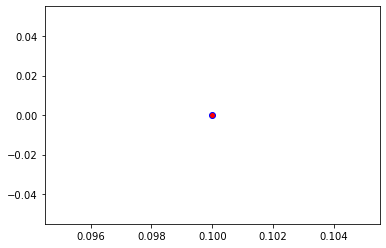

000000284279 12 = house finch
000000284282 700 = paper towel
000000284296 562 = fountain
000000284445 727 = planetarium
000000284623 285 = Egyptian cat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


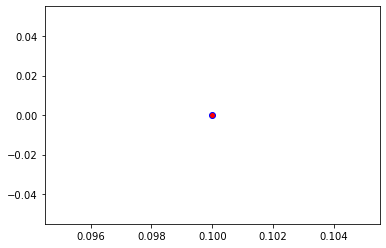

000000284698 475 = car mirror
000000284725 408 = amphibian
000000284743 862 = torch
000000284762 707 = pay-phone
000000284764 513 = cornet
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


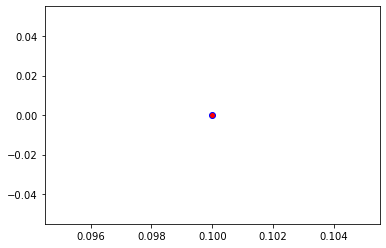

000000284991 476 = carousel
000000285047 457 = bow tie
000000285349 723 = pinwheel
000000285788 706 = patio
000000285894 903 = wig
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


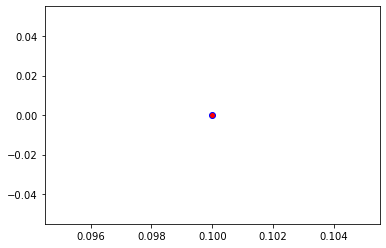

000000286182 611 = jigsaw puzzle
000000286422 484 = catamaran
000000286458 297 = slot
000000286503 386 = African elephant
000000286507 803 = snowplow
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


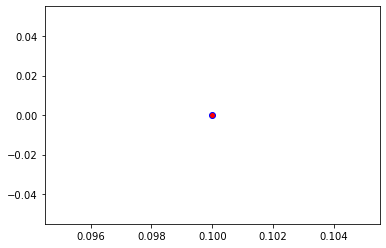

000000286523 684 = ocarina
000000286553 927 = trifle
000000286660 850 = teddy
000000286708 281 = tabby
000000286849 289 = snow leopard
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


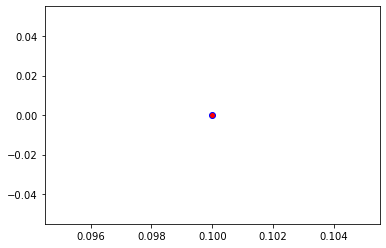

000000286907 861 = toilet seat
000000286908 916 = web site
000000286994 349 = bighorn
000000287291 704 = parking meter
000000287347 589 = hand blower
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


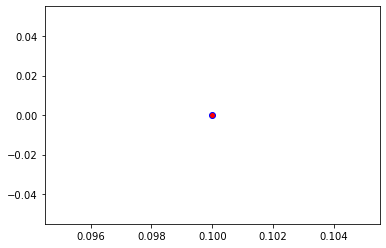

000000287527 785 = seat belt
000000287545 251 = dalmatian
000000287649 508 = computer keyboard
000000287667 641 = maraca
000000287714 896 = washbasin
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


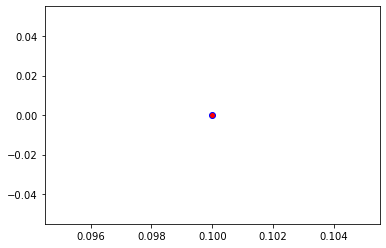

000000287874 829 = streetcar
000000287959 125 = hermit crab
000000288042 562 = fountain
000000288062 861 = toilet seat
000000288391 656 = minivan
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


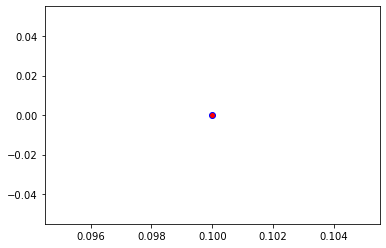

000000288430 537 = dogsled
000000288584 843 = swing
000000288685 254 = pug
000000288762 644 = matchstick
000000288862 884 = vault
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


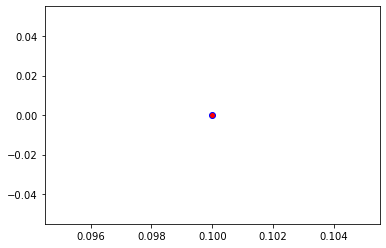

000000288882 562 = fountain
000000289059 752 = racket
000000289222 920 = traffic light
000000289229 841 = sweatshirt
000000289343 880 = unicycle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


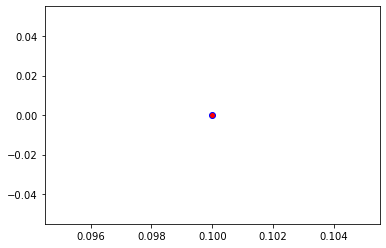

000000289393 250 = Siberian husky
000000289415 861 = toilet seat
000000289417 248 = ski
000000289516 409 = analog clock
000000289586 58 = water snake
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


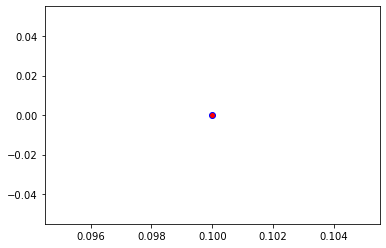

000000289594 385 = Indian elephant
000000289659 251 = dalmatian
000000289702 234 = Rottweiler
000000289741 404 = liner
000000289938 627 = limousine
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


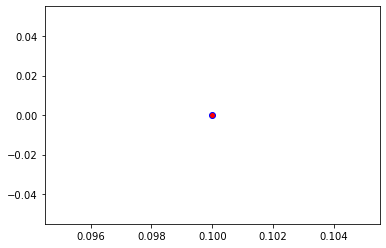

000000289960 978 = seashore
000000289992 648 = medicine chest
000000290081 928 = ice cream
000000290163 461 = plate
000000290179 978 = seashore
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


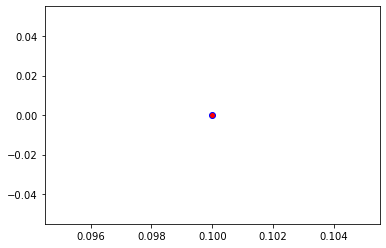

000000290248 297 = slot
000000290293 669 = mosquito net
000000290592 355 = llama
000000290619 731 = plunger
000000290768 534 = washer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


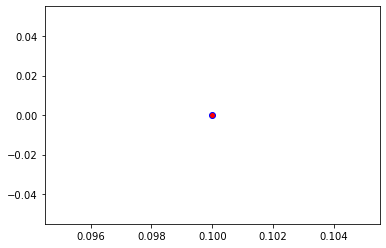

000000290771 799 = sliding door
000000290833 340 = zebra
000000290843 750 = quilt
000000291490 203 = West Highland white terrier
000000291551 842 = swimming trunks
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


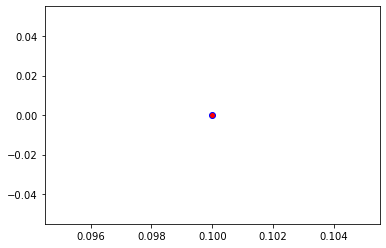

000000291619 862 = torch
000000291634 665 = moped
000000291664 177 = Scottish deerhound
000000291791 665 = moped
000000291861 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


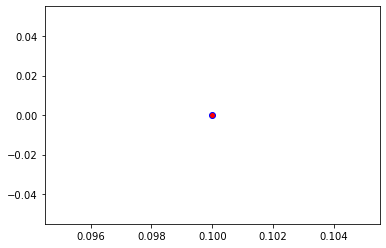

000000292005 794 = shower curtain
000000292024 927 = trifle
000000292060 827 = stove
000000292082 401 = accordion
000000292155 879 = umbrella
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


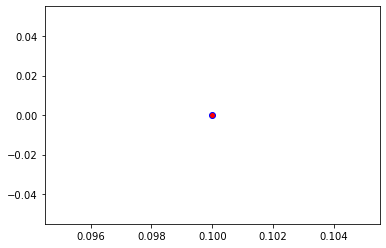

000000292225 233 = Bouvier des Flandres
000000292236 791 = shopping cart
000000292330 169 = borzoi
000000292415 864 = wreck
000000292446 415 = bakery
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


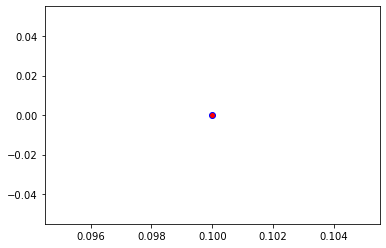

000000292456 670 = motor scooter
000000292488 617 = lab coat
000000292908 978 = seashore
000000292997 324 = cab
000000293044 451 = bolo tie
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


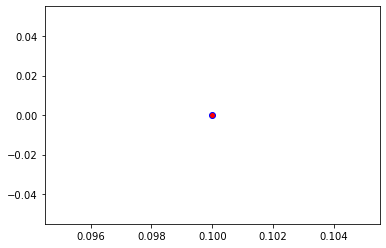

000000293071 412 = ashcan
000000293200 645 = maypole
000000293245 665 = moped
000000293300 5 = ram
000000293324 404 = liner
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


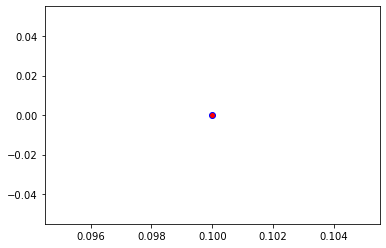

000000293390 493 = chiffonier
000000293474 896 = washbasin
000000293625 589 = hand blower
000000293794 954 = banana
000000293804 598 = home theater
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


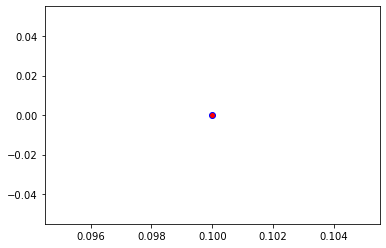

000000293858 631 = lotion
000000294162 681 = notebook
000000294163 442 = bell cote
000000294350 617 = lab coat
000000294695 819 = stage
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


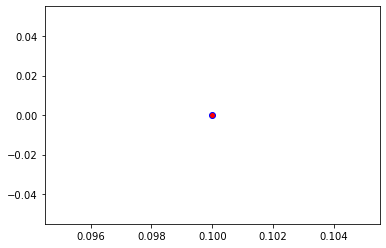

000000294783 324 = cab
000000294831 551 = face powder
000000294855 223 = schipperke
000000295138 843 = swing
000000295231 5 = ram
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


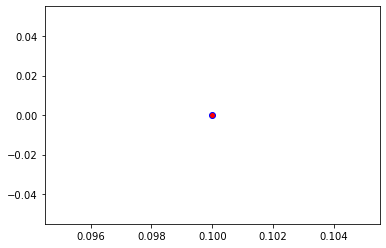

000000295316 801 = snorkel
000000295420 675 = moving van
000000295478 203 = West Highland white terrier
000000295713 843 = swing
000000295797 442 = bell cote
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


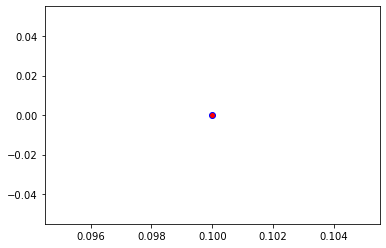

000000295809 324 = cab
000000296222 523 = crutch
000000296224 734 = police van
000000296231 886 = vending machine
000000296284 760 = refrigerator
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


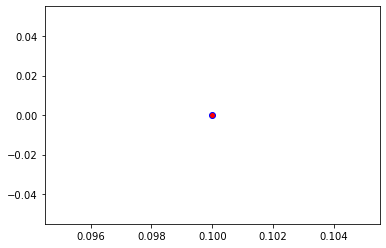

000000296317 176 = gazelle
000000296634 464 = buckle
000000296649 612 = jinrikisha
000000296657 354 = Arabian camel
000000296969 251 = dalmatian
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


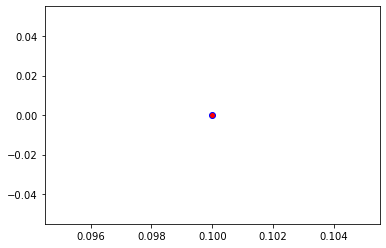

000000297022 575 = golfcart
000000297084 470 = candle
000000297085 651 = microwave
000000297147 665 = moped
000000297343 620 = laptop
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


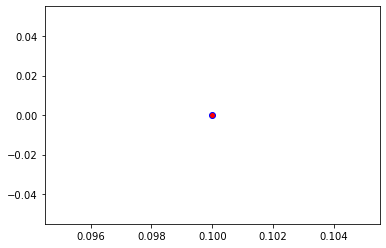

000000297353 745 = projector
000000297396 464 = buckle
000000297427 929 = ice lolly
000000297562 585 = hair spray
000000297578 451 = bolo tie
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


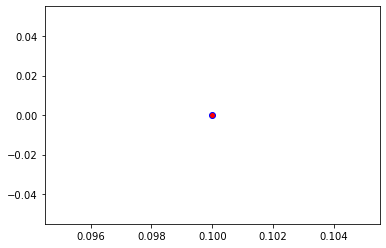

000000297595 814 = speedboat
000000297681 919 = street sign
000000297698 557 = flagpole
000000297830 232 = Border collie
000000298251 562 = fountain
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


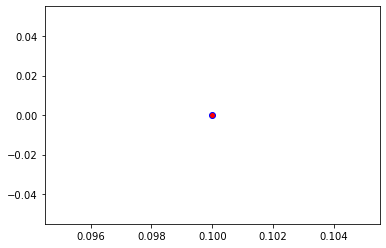

000000298396 534 = washer
000000298697 977 = sandbar
000000298738 388 = giant panda
000000298904 883 = vase
000000298994 954 = banana
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


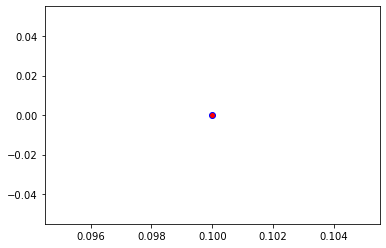

000000299355 868 = tray
000000299553 417 = balloon
000000299609 978 = seashore
000000299720 562 = fountain
000000299887 822 = steel drum
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


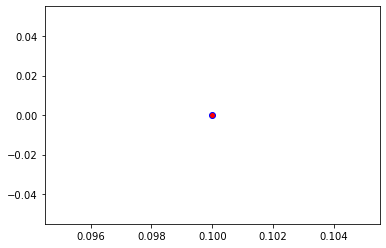

000000300039 626 = lighter
000000300155 94 = hummingbird
000000300233 818 = spotlight
000000300276 411 = apron
000000300341 770 = running shoe
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


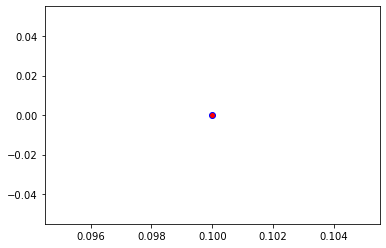

000000300659 905 = window shade
000000300842 812 = space shuttle
000000300913 284 = Siamese cat
000000301061 799 = sliding door
000000301135 84 = peacock
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


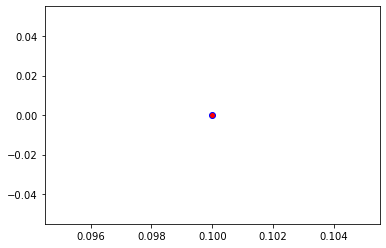

000000301376 920 = traffic light
000000301421 532 = dining table
000000301563 248 = ski
000000301718 499 = cleaver
000000301867 879 = umbrella
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


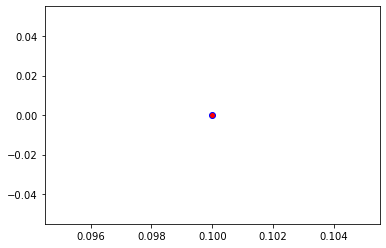

000000301981 251 = dalmatian
000000302030 454 = bookshop
000000302107 560 = football helmet
000000302165 245 = French bulldog
000000302452 697 = pajama
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


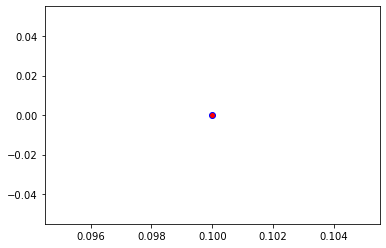

000000302536 589 = hand blower
000000302760 896 = washbasin
000000302882 971 = bubble
000000302990 801 = snorkel
000000303305 407 = ambulance
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


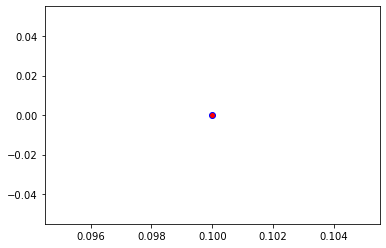

000000303499 170 = Irish wolfhound
000000303566 952 = fig
000000303653 354 = Arabian camel
000000303713 981 = ballplayer
000000303818 324 = cab
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


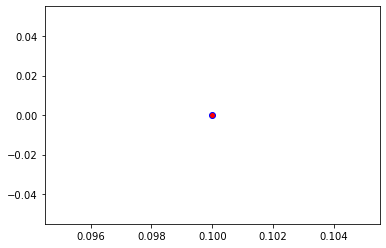

000000303863 565 = freight car
000000303893 490 = chain mail
000000303908 843 = swing
000000304180 480 = cash machine
000000304291 354 = Arabian camel
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


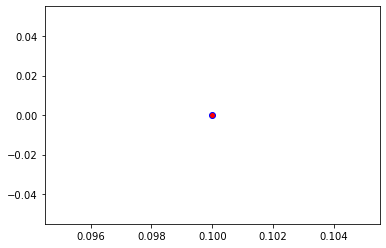

000000304365 829 = streetcar
000000304396 442 = bell cote
000000304404 842 = swimming trunks
000000304545 465 = bulletproof vest
000000304560 285 = Egyptian cat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


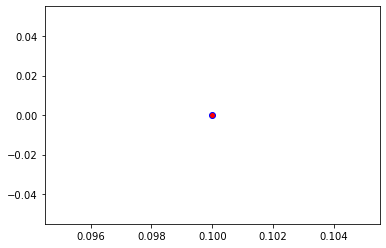

000000304812 978 = seashore
000000304817 491 = chain saw
000000304984 868 = tray
000000305309 562 = fountain
000000305317 890 = volleyball
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


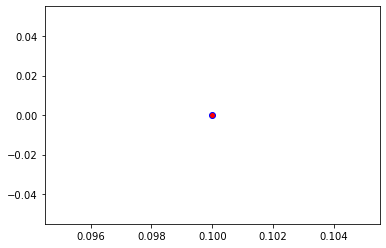

000000305343 334 = cup
000000305609 868 = tray
000000305695 575 = golfcart
000000306136 656 = minivan
000000306139 696 = paintbrush
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


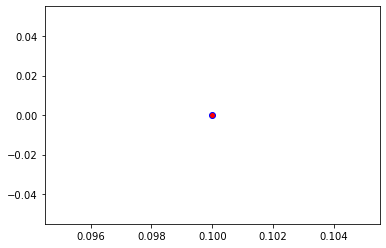

000000306437 412 = ashcan
000000306582 562 = fountain
000000306700 611 = jigsaw puzzle
000000306733 794 = shower curtain
000000306893 829 = streetcar
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


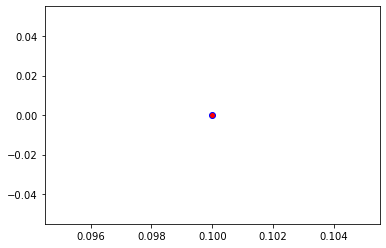

000000307074 919 = street sign
000000307145 435 = tub
000000307172 927 = trifle
000000307598 547 = electric locomotive
000000307658 367 = chimpanzee
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


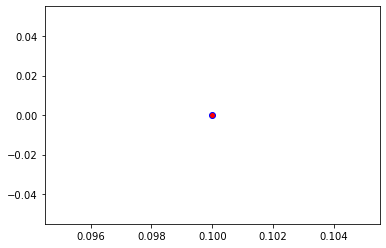

000000308165 879 = umbrella
000000308193 442 = bell cote
000000308328 675 = moving van
000000308391 916 = web site
000000308394 799 = sliding door
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


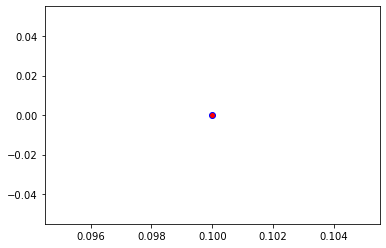

000000308430 818 = spotlight
000000308466 861 = toilet seat
000000308476 296 = ice bear
000000308531 781 = scoreboard
000000308545 562 = fountain
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


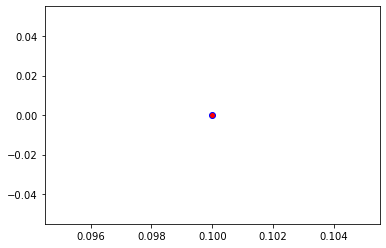

000000308587 978 = seashore
000000308631 518 = crash helmet
000000308753 500 = cliff dwelling
000000308793 248 = ski
000000308799 664 = monitor
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


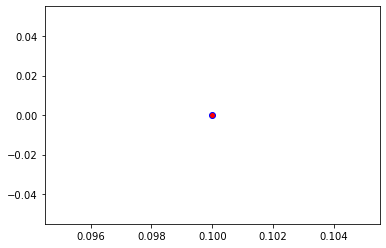

000000309173 919 = street sign
000000309391 324 = cab
000000309452 14 = indigo bunting
000000309467 248 = ski
000000309484 237 = miniature pinscher
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


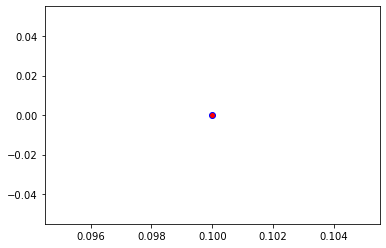

000000309495 861 = toilet seat
000000309655 399 = abaya
000000309678 692 = packet
000000309938 259 = Pomeranian
000000309964 514 = cowboy boot
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


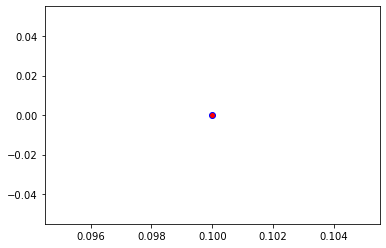

000000310072 703 = park bench
000000310200 928 = ice cream
000000310622 919 = street sign
000000310862 906 = Windsor tie
000000310980 850 = teddy
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


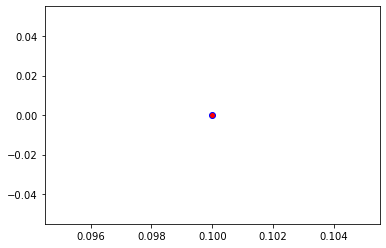

000000311002 787 = shield
000000311081 435 = tub
000000311180 806 = sock
000000311190 237 = miniature pinscher
000000311295 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


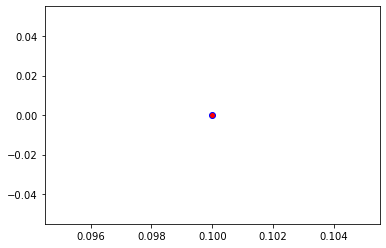

000000311303 720 = pill bottle
000000311392 37 = ox
000000311394 971 = bubble
000000311518 472 = canoe
000000311789 333 = hamster
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


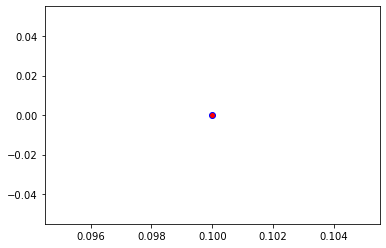

000000311883 536 = dock
000000311909 757 = recreational vehicle
000000311928 429 = baseball
000000311950 898 = water bottle
000000312192 938 = cauliflower
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


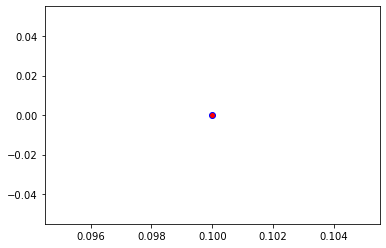

000000312213 620 = laptop
000000312237 978 = seashore
000000312263 640 = manhole cover
000000312278 781 = scoreboard
000000312340 250 = Siberian husky
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


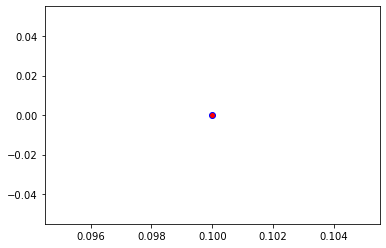

000000312406 438 = beaker
000000312421 760 = refrigerator
000000312489 248 = ski
000000312549 919 = street sign
000000312552 999 = toilet tissue
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


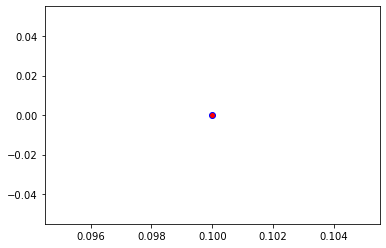

000000312586 294 = brown bear
000000312720 978 = seashore
000000313034 793 = shower cap
000000313130 760 = refrigerator
000000313182 654 = minibus
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


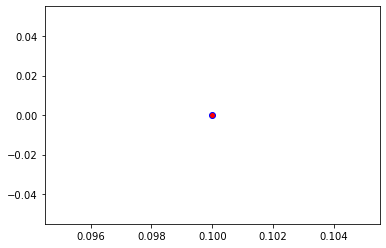

000000313454 579 = grand piano
000000313562 490 = chain mail
000000313588 879 = umbrella
000000313783 928 = ice cream
000000314034 978 = seashore
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


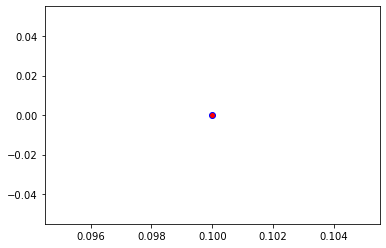

000000314177 793 = shower cap
000000314182 463 = bucket
000000314251 324 = cab
000000314264 760 = refrigerator
000000314294 257 = Great Pyrenees
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


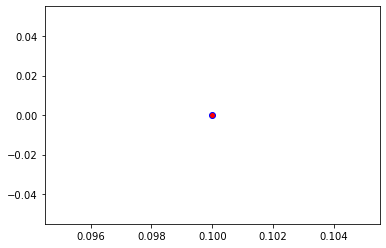

000000314541 703 = park bench
000000314709 248 = ski
000000314914 919 = street sign
000000315001 978 = seashore
000000315187 829 = streetcar
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


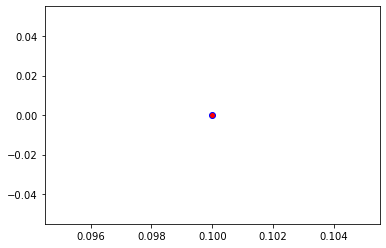

000000315219 512 = corkscrew
000000315257 12 = house finch
000000315450 874 = trolleybus
000000315492 816 = spindle
000000316015 508 = computer keyboard
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


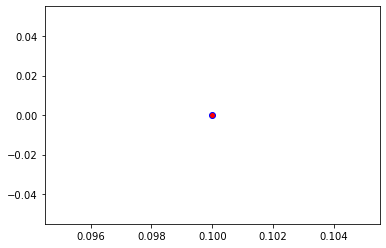

000000316054 704 = parking meter
000000316404 898 = water bottle
000000316666 598 = home theater
000000317024 340 = zebra
000000317433 730 = plow
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


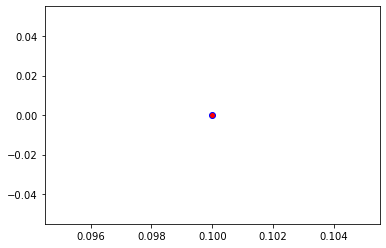

000000317999 982 = groom
000000318080 366 = gorilla
000000318114 723 = pinwheel
000000318138 523 = crutch
000000318238 177 = Scottish deerhound
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


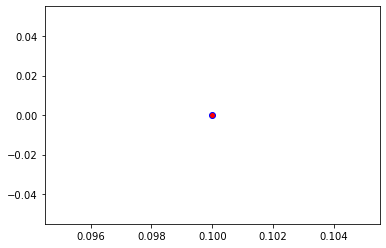

000000318455 572 = goblet
000000318908 153 = Maltese dog
000000319100 630 = Loafer
000000319184 560 = football helmet
000000319369 879 = umbrella
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


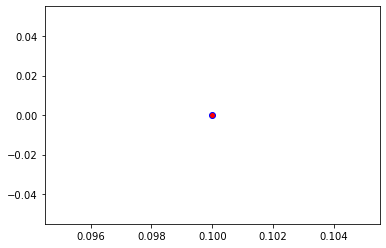

000000319534 654 = minibus
000000319607 324 = cab
000000319617 898 = water bottle
000000319696 651 = microwave
000000319721 603 = horse cart
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


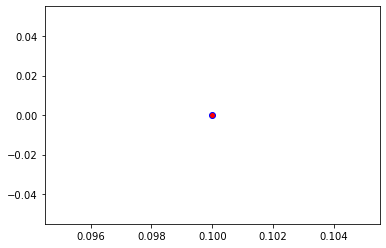

000000319935 905 = window shade
000000320232 498 = cinema
000000320425 562 = fountain
000000320490 462 = broom
000000320554 104 = wallaby
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


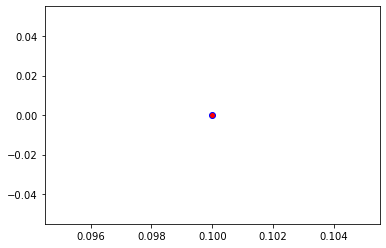

000000320632 340 = zebra
000000320642 650 = microphone
000000320664 929 = ice lolly
000000320696 792 = shovel
000000320706 550 = espresso maker
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


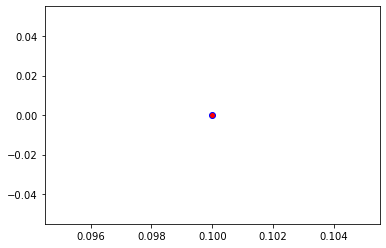

000000320743 101 = tusker
000000321118 620 = laptop
000000321214 529 = diaper
000000321333 641 = maraca
000000321557 670 = motor scooter
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


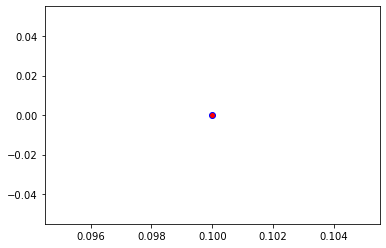

000000321790 752 = racket
000000321887 37 = ox
000000322163 617 = lab coat
000000322211 591 = handkerchief
000000322352 532 = dining table
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


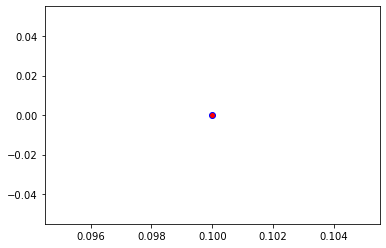

000000322429 495 = china cabinet
000000322574 840 = swab
000000322610 879 = umbrella
000000322724 723 = pinwheel
000000322829 857 = throne
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


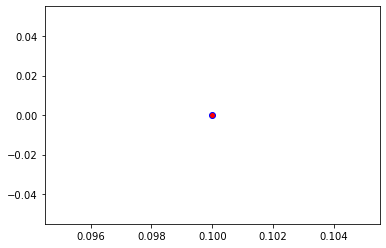

000000322844 223 = schipperke
000000322864 511 = convertible
000000322895 799 = sliding door
000000322944 971 = bubble
000000322959 916 = web site
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


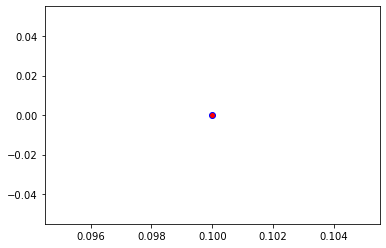

000000322968 442 = bell cote
000000323151 965 = burrito
000000323202 861 = toilet seat
000000323263 562 = fountain
000000323355 433 = bathing cap
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


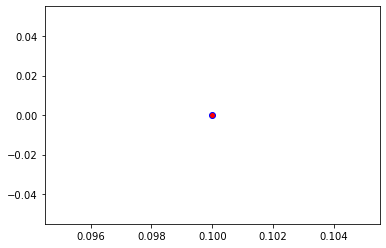

000000323496 752 = racket
000000323571 919 = street sign
000000323709 405 = airship
000000323751 705 = passenger car
000000323799 862 = torch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


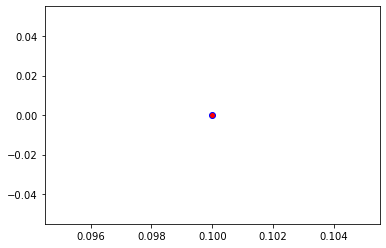

000000323828 705 = passenger car
000000323895 752 = racket
000000324158 568 = fur coat
000000324258 589 = hand blower
000000324614 818 = spotlight
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


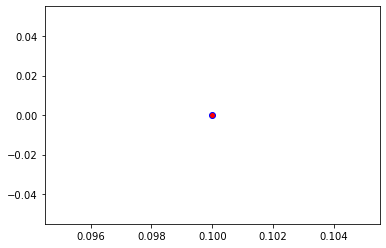

000000324715 772 = safety pin
000000324818 84 = peacock
000000324927 845 = syringe
000000325031 562 = fountain
000000325114 896 = washbasin
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


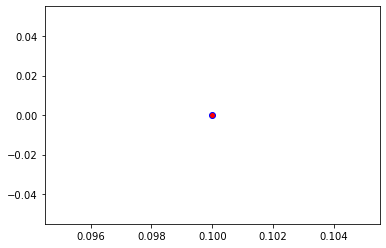

000000325306 340 = zebra
000000325347 752 = racket
000000325483 617 = lab coat
000000325527 850 = teddy
000000325838 620 = laptop
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


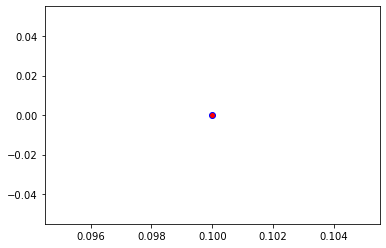

000000325991 805 = soccer ball
000000326082 646 = maze
000000326128 248 = ski
000000326174 978 = seashore
000000326248 781 = scoreboard
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


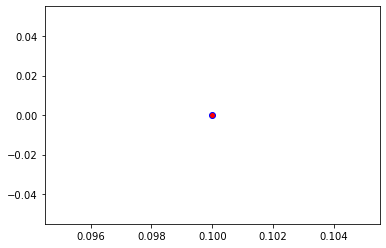

000000326462 611 = jigsaw puzzle
000000326541 254 = pug
000000326542 248 = ski
000000326627 324 = cab
000000326970 801 = snorkel
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


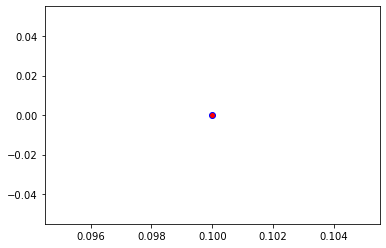

000000327306 421 = bannister
000000327592 801 = snorkel
000000327601 882 = vacuum
000000327605 248 = ski
000000327617 828 = strainer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


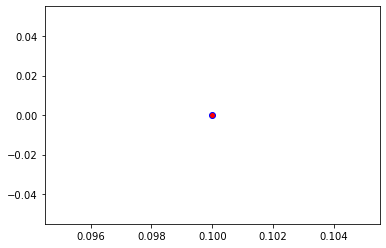

000000327701 400 = academic gown
000000327769 896 = washbasin
000000327780 813 = spatula
000000327890 412 = ashcan
000000328030 611 = jigsaw puzzle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


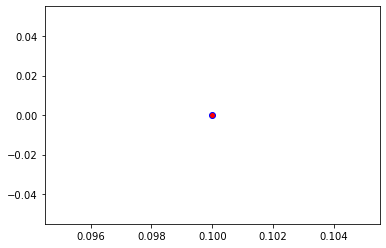

000000328117 415 = bakery
000000328238 862 = torch
000000328286 536 = dock
000000328337 880 = unicycle
000000328430 862 = torch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


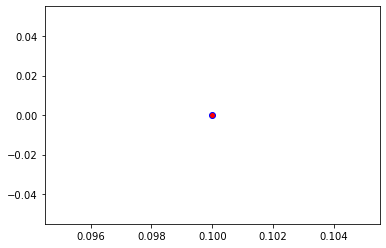

000000328601 981 = ballplayer
000000328683 704 = parking meter
000000328959 861 = toilet seat
000000329041 480 = cash machine
000000329080 750 = quilt
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


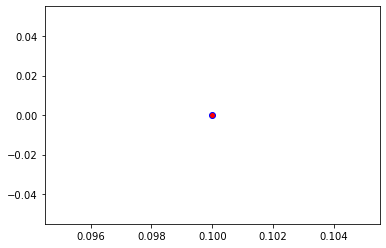

000000329219 253 = basenji
000000329319 250 = Siberian husky
000000329323 808 = sombrero
000000329447 5 = ram
000000329455 455 = bottlecap
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


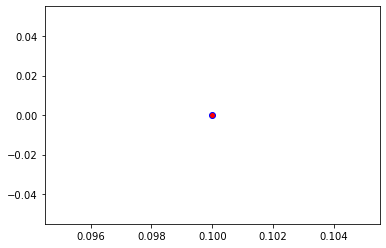

000000329456 731 = plunger
000000329542 556 = screen
000000329614 569 = garbage truck
000000329827 248 = ski
000000330369 536 = dock
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


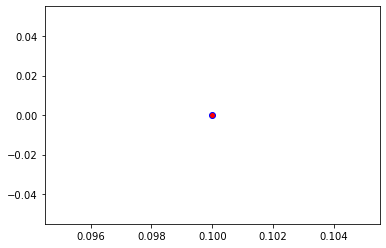

000000330396 982 = groom
000000330554 745 = projector
000000330790 101 = tusker
000000330818 409 = analog clock
000000331075 232 = Border collie
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


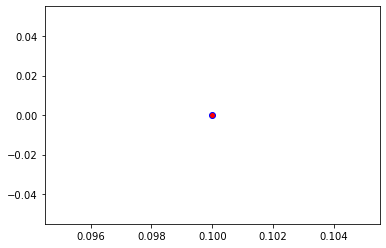

000000331280 386 = African elephant
000000331317 743 = prison
000000331352 861 = toilet seat
000000331569 572 = goblet
000000331604 723 = pinwheel
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


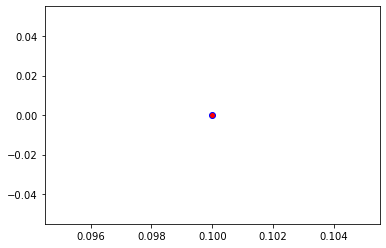

000000331799 585 = hair spray
000000331817 470 = candle
000000332318 500 = cliff dwelling
000000332351 978 = seashore
000000332455 861 = toilet seat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


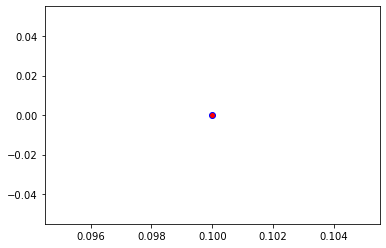

000000332570 590 = hand-held computer
000000332845 669 = mosquito net
000000332901 568 = fur coat
000000333069 383 = Madagascar cat
000000333237 669 = mosquito net
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


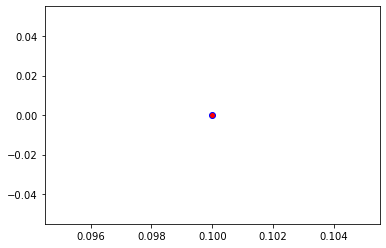

000000333402 829 = streetcar
000000333697 919 = street sign
000000333745 324 = cab
000000333772 556 = screen
000000333956 704 = parking meter
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


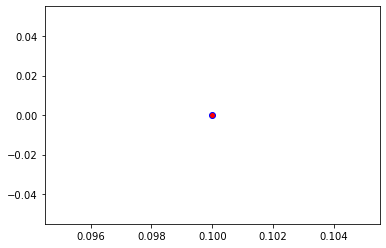

000000334006 569 = garbage truck
000000334309 448 = birdhouse
000000334371 916 = web site
000000334399 786 = sewing machine
000000334417 650 = microphone
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


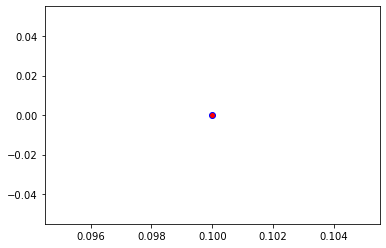

000000334483 611 = jigsaw puzzle
000000334521 489 = chainlink fence
000000334530 99 = goose
000000334555 37 = ox
000000334719 500 = cliff
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


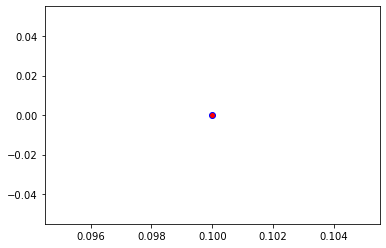

000000334767 872 = tripod
000000334977 605 = iPod
000000335081 600 = hook
000000335177 975 = lakeside
000000335328 346 = water buffalo
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


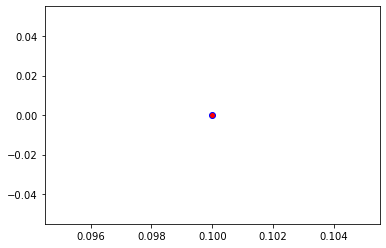

000000335427 534 = washer
000000335450 562 = fountain
000000335529 703 = park bench
000000335658 673 = mouse
000000335800 498 = cinema
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


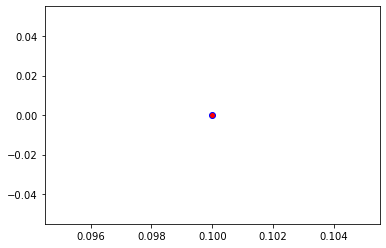

000000335954 818 = spotlight
000000336053 965 = burrito
000000336209 543 = dumbbell
000000336232 670 = motor scooter
000000336265 195 = Boston bull
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


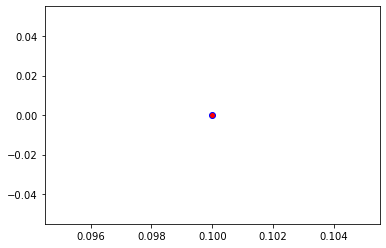

000000336309 405 = airship
000000336356 611 = jigsaw puzzle
000000336587 919 = street sign
000000336628 297 = slot
000000336658 664 = monitor
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


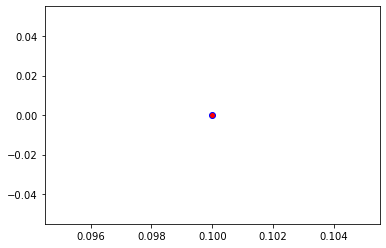

000000337055 416 = balance beam
000000337498 818 = spotlight
000000337987 24 = great grey owl
000000338191 297 = slot
000000338219 671 = mountain bike
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


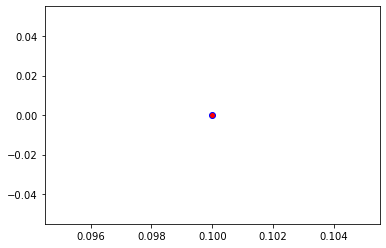

000000338304 223 = schipperke
000000338325 812 = space shuttle
000000338428 717 = pickup
000000338532 293 = cheetah
000000338560 412 = ashcan
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


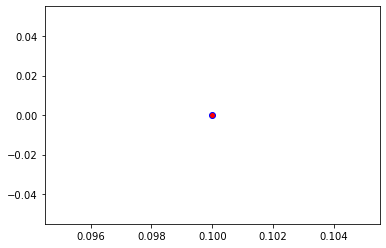

000000338624 523 = crutch
000000338625 757 = recreational vehicle
000000338718 791 = shopping cart
000000338901 721 = pillow
000000338905 762 = restaurant
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


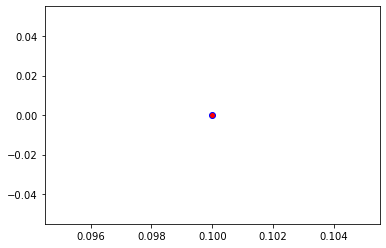

000000338986 705 = passenger car
000000339442 916 = web site
000000339823 725 = pitcher
000000339870 920 = traffic light
000000340015 855 = thimble
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


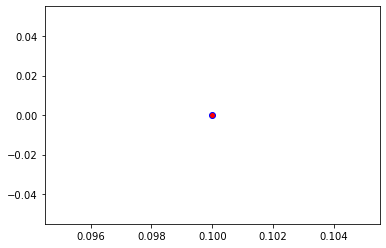

000000340175 706 = patio
000000340272 5 = ram
000000340451 703 = park bench
000000340697 898 = water bottle
000000340894 527 = desktop computer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


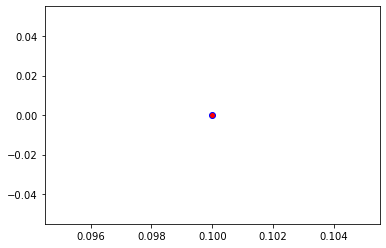

000000340930 849 = teapot
000000341058 532 = dining table
000000341094 412 = ashcan
000000341196 164 = bluetick
000000341469 882 = vacuum
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


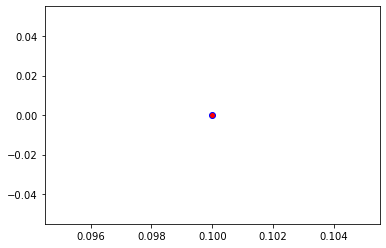

000000341681 421 = bannister
000000341719 500 = cliff dwelling
000000341828 916 = web site
000000341921 706 = patio
000000341973 903 = wig
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


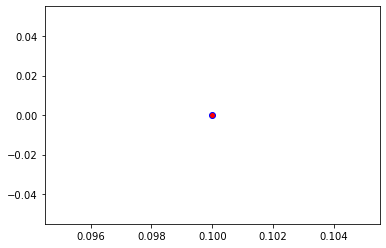

000000342006 978 = seashore
000000342128 430 = basketball
000000342186 961 = dough
000000342295 556 = screen
000000342367 664 = monitor
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


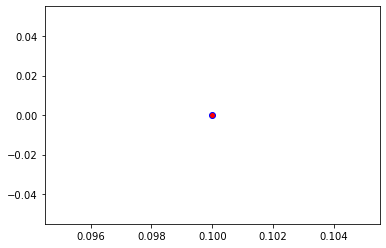

000000342397 248 = ski
000000342971 796 = ski mask
000000343076 281 = tabby
000000343149 498 = cinema
000000343218 752 = racket
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


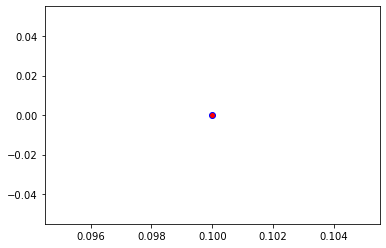

000000343315 706 = patio
000000343453 248 = ski
000000343466 651 = microwave
000000343496 920 = traffic light
000000343524 752 = racket
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


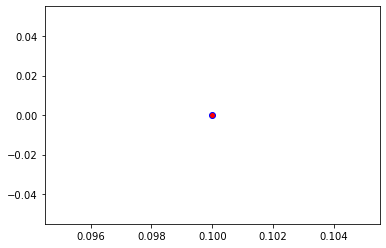

000000343561 665 = moped
000000343706 494 = chime
000000343803 981 = ballplayer
000000343934 670 = motor scooter
000000343937 445 = bikini
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


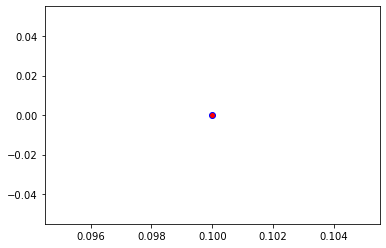

000000343976 324 = cab
000000344029 874 = trolleybus
000000344059 562 = fountain
000000344100 441 = beer glass
000000344268 650 = microphone
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


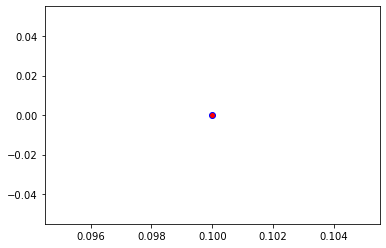

000000344611 919 = street sign
000000344614 442 = bell cote
000000344621 799 = sliding door
000000344795 581 = grille
000000344816 565 = freight car
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


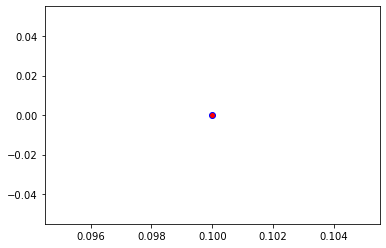

000000344888 792 = shovel
000000344909 637 = mailbox
000000345027 250 = Siberian husky
000000345252 523 = crutch
000000345261 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


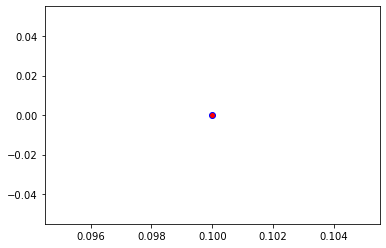

000000345356 691 = oxygen mask
000000345361 770 = running shoe
000000345385 431 = bassinet
000000345397 605 = iPod
000000345466 560 = football helmet
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


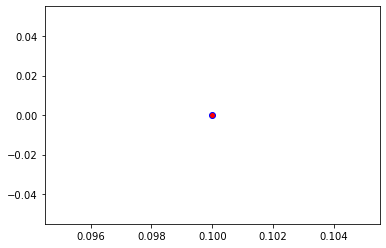

000000345469 905 = window shade
000000345941 928 = ice cream
000000346232 879 = umbrella
000000346638 620 = laptop
000000346703 982 = groom
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


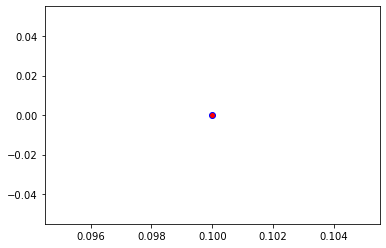

000000346707 948 = Granny Smith
000000346905 101 = tusker
000000346968 617 = lab coat
000000347163 919 = street sign
000000347174 116 = cradle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


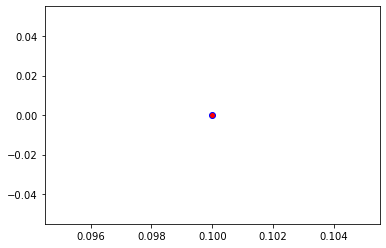

000000347254 785 = seat belt
000000347265 537 = dogsled
000000347335 461 = plate
000000347370 616 = knot
000000347456 178 = Weimaraner
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


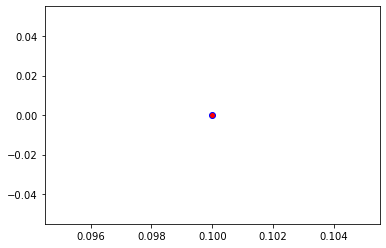

000000347544 675 = moving van
000000347664 978 = seashore
000000347693 799 = sliding door
000000347930 529 = diaper
000000348012 473 = can opener
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


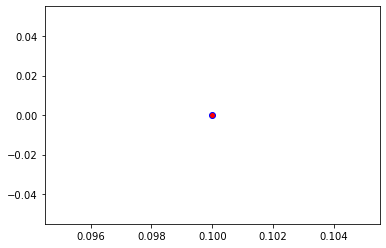

000000348045 861 = toilet seat
000000348216 435 = tub
000000348243 343 = warthog
000000348481 772 = safety pin
000000348488 859 = toaster
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


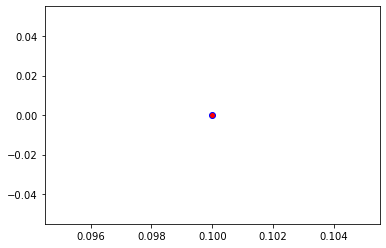

000000348708 461 = plate
000000348881 523 = crutch
000000349152 591 = handkerchief
000000349184 703 = park bench
000000349302 84 = peacock
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


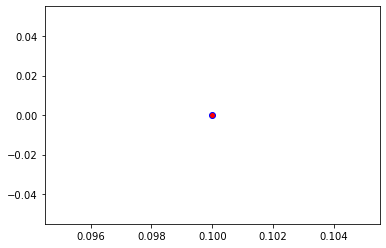

000000349480 981 = ballplayer
000000349594 916 = web site
000000349678 442 = bell cote
000000349837 760 = refrigerator
000000349860 701 = parachute
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


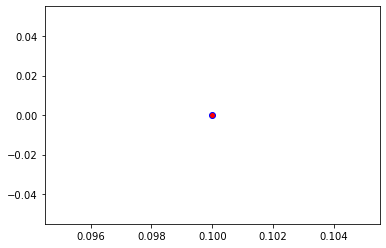

000000350002 601 = hoopskirt
000000350003 569 = garbage truck
000000350019 773 = saltshaker
000000350023 829 = streetcar
000000350054 786 = sewing machine
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


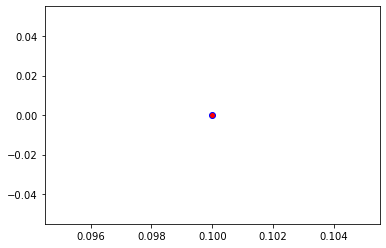

000000350122 466 = bullet train
000000350148 532 = dining table
000000350388 461 = plate
000000350405 248 = ski
000000350488 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


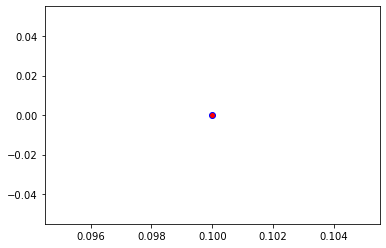

000000350607 470 = candle
000000350679 982 = groom
000000350833 861 = toilet seat
000000351096 473 = can opener
000000351331 818 = spotlight
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


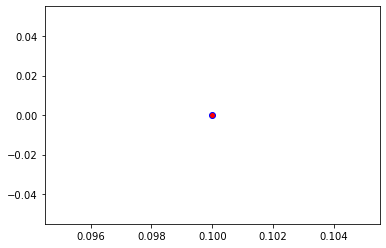

000000351362 669 = mosquito net
000000351530 703 = park bench
000000351559 324 = cab
000000351589 706 = patio
000000351609 506 = coil
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


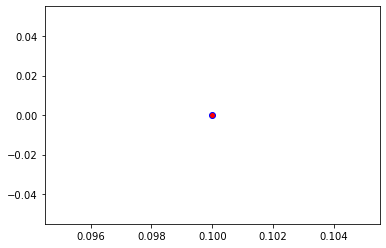

000000351810 414 = backpack
000000351823 981 = ballplayer
000000352491 705 = passenger car
000000352582 981 = ballplayer
000000352584 606 = iron
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


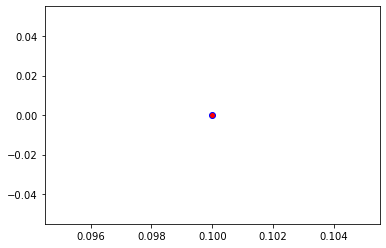

000000352618 522 = croquet ball
000000352684 787 = shield
000000352760 600 = hook
000000352900 461 = plate
000000353027 125 = hermit crab
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


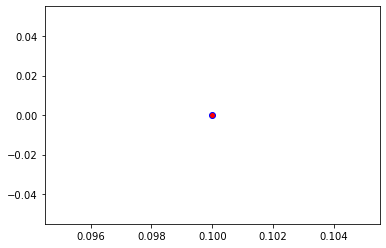

000000353051 339 = sorrel
000000353096 527 = desktop computer
000000353180 842 = swimming trunks
000000353518 978 = seashore
000000353970 223 = schipperke
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


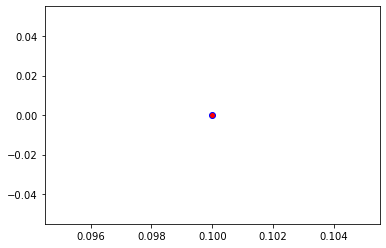

000000354072 760 = refrigerator
000000354307 242 = boxer
000000354547 639 = suit
000000354753 818 = spotlight
000000354829 801 = snorkel
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


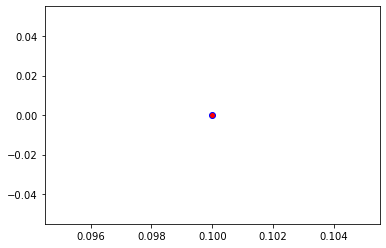

000000355169 781 = scoreboard
000000355240 669 = mosquito net
000000355257 651 = microwave
000000355325 966 = red wine
000000355610 850 = teddy
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


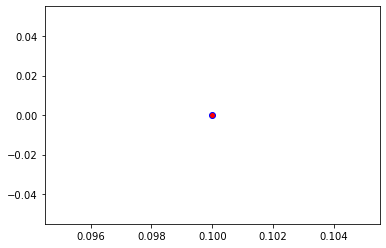

000000355677 644 = matchstick
000000355817 705 = passenger car
000000355905 172 = whippet
000000356094 747 = punching bag
000000356125 386 = African elephant
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


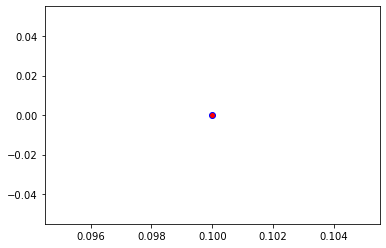

000000356169 489 = chainlink fence
000000356248 851 = television
000000356261 5 = ram
000000356347 659 = mixing bowl
000000356387 324 = cab
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


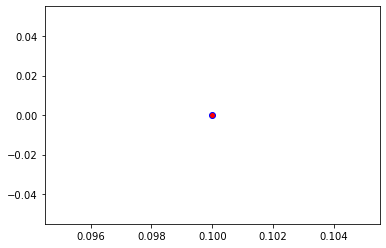

000000356424 441 = beer glass
000000356427 862 = torch
000000356428 706 = patio
000000356432 831 = studio couch
000000356498 924 = guacamole
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


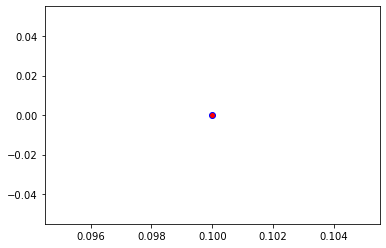

000000356505 248 = ski
000000356531 818 = spotlight
000000356612 690 = oxcart
000000356968 339 = sorrel
000000357060 141 = redshank
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


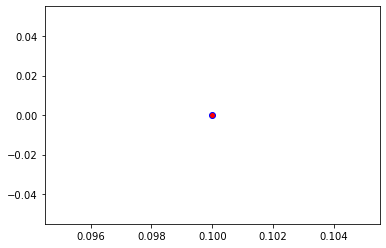

000000357081 242 = boxer
000000357238 701 = parachute
000000357430 584 = hair slide
000000357459 196 = miniature schnauzer
000000357501 862 = torch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


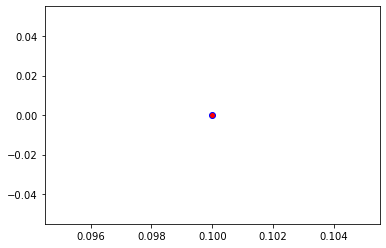

000000357567 905 = window shade
000000357737 444 = bicycle-built-for-two
000000357742 248 = ski
000000357748 627 = limousine
000000357816 981 = ballplayer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


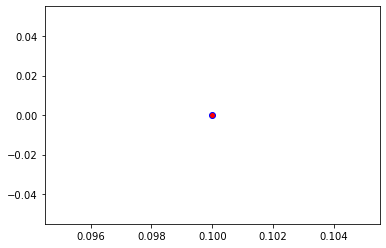

000000357888 886 = vending machine
000000357903 927 = trifle
000000357941 851 = television
000000357978 480 = cash machine
000000358195 824 = stole
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


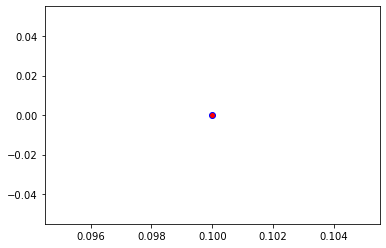

000000358427 700 = paper towel
000000358525 593 = harmonica
000000358923 879 = umbrella
000000359135 344 = hippopotamus
000000359219 807 = solar dish
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


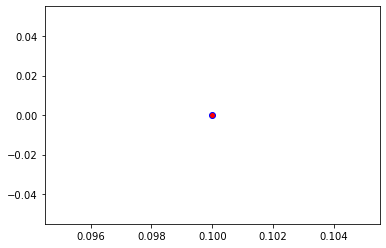

000000359540 611 = jigsaw puzzle
000000359677 843 = swing
000000359781 562 = fountain
000000359833 575 = golfcart
000000359855 478 = carton
Min values in image-array: 0.07176555 Max values in image-array: 255.0
Min values in image-array: 0.00028143352 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


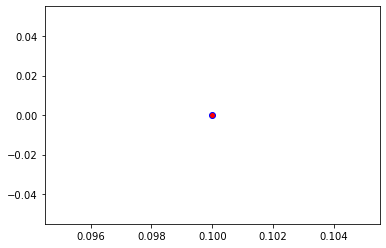

000000359937 757 = recreational vehicle
000000360097 510 = container ship
000000360137 694 = paddlewheel
000000360325 355 = llama
000000360393 464 = buckle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


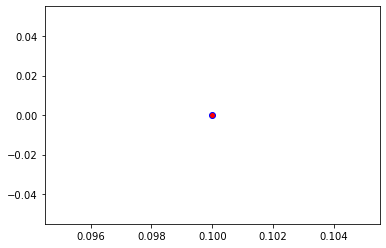

000000360564 534 = washer
000000360661 646 = maze
000000360943 523 = crutch
000000360951 526 = desk
000000360960 879 = umbrella
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


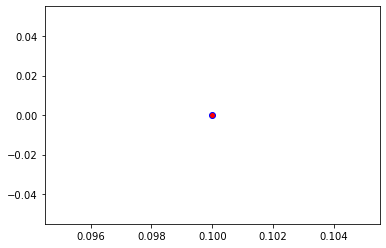

000000361103 920 = traffic light
000000361142 324 = cab
000000361147 752 = racket
000000361180 294 = brown bear
000000361238 793 = shower cap
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


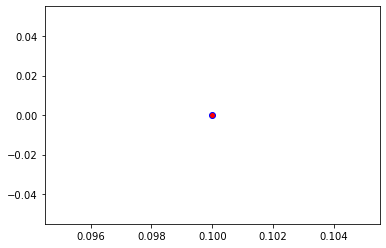

000000361268 250 = Siberian husky
000000361506 745 = projector
000000361551 864 = wreck
000000361571 180 = American Staffordshire terrier
000000361586 297 = slot
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


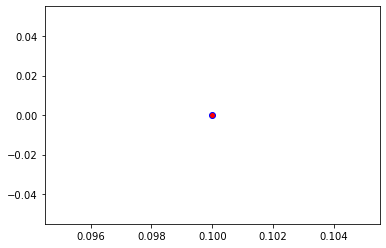

000000361621 285 = Egyptian cat
000000361730 978 = seashore
000000361919 248 = ski
000000362434 850 = teddy
000000362520 248 = ski
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


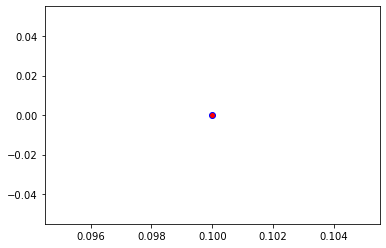

000000362682 654 = minibus
000000362716 880 = unicycle
000000363072 565 = freight car
000000363188 562 = fountain
000000363207 431 = bassinet
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


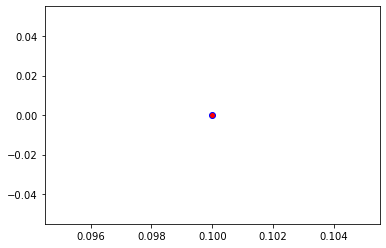

000000363461 526 = desk
000000363666 770 = running shoe
000000363784 435 = tub
000000363840 620 = laptop
000000363875 670 = motor scooter
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


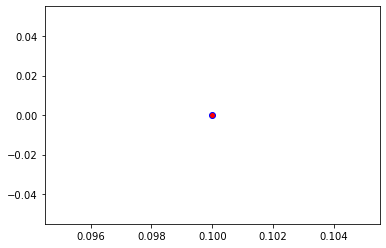

000000364102 880 = unicycle
000000364126 842 = swimming trunks
000000364166 340 = zebra
000000364297 508 = computer keyboard
000000364322 5 = ram
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


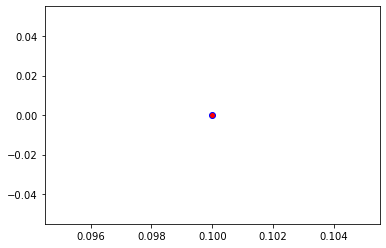

000000364557 975 = lakeside
000000364587 664 = monitor
000000364636 179 = Staffordshire bullterrier
000000364884 324 = cab
000000365095 981 = ballplayer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


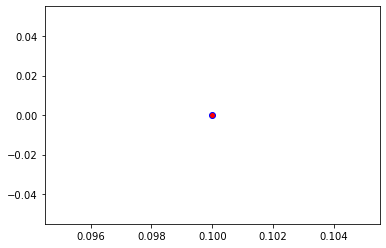

000000365098 822 = steel drum
000000365207 475 = car mirror
000000365208 476 = carousel
000000365385 916 = web site
000000365387 799 = sliding door
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


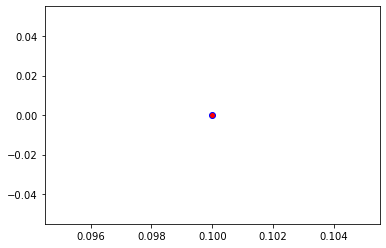

000000365521 248 = ski
000000365642 870 = tricycle
000000365655 575 = golfcart
000000365745 569 = garbage truck
000000365766 519 = crate
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


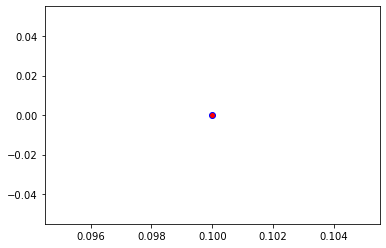

000000365886 487 = cellular telephone
000000366141 750 = quilt
000000366178 919 = street sign
000000366199 619 = lampshade
000000366225 527 = desktop computer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


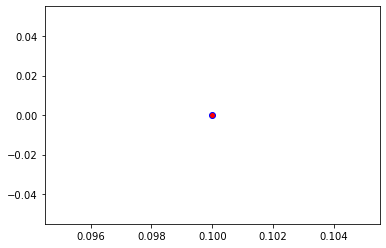

000000366611 189 = Lakeland terrier
000000366711 954 = banana
000000366884 799 = sliding door
000000367082 669 = mosquito net
000000367095 762 = restaurant
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


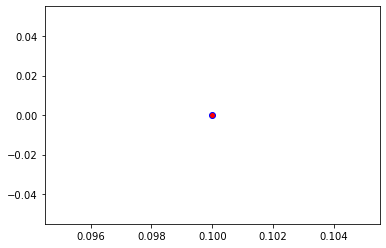

000000367195 173 = Ibizan hound
000000367228 879 = umbrella
000000367386 532 = dining table
000000367569 532 = dining table
000000367680 734 = police van
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


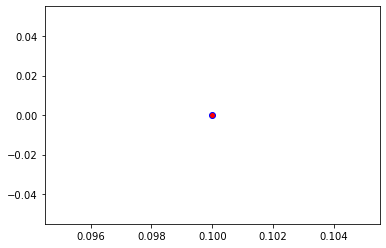

000000367818 339 = sorrel
000000368038 547 = electric locomotive
000000368212 861 = toilet seat
000000368294 452 = bonnet
000000368335 254 = pug
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


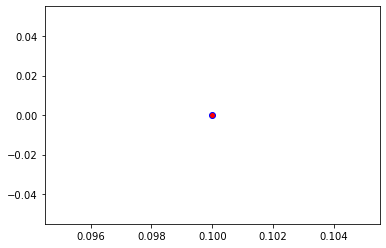

000000368456 565 = freight car
000000368684 620 = laptop
000000368752 927 = trifle
000000368900 424 = barbershop
000000368940 534 = washer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


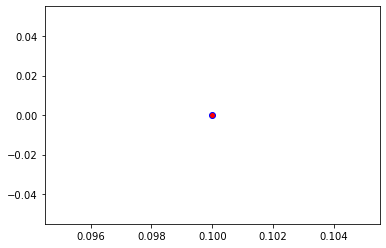

000000368961 799 = sliding door
000000368982 828 = strainer
000000369037 898 = water bottle
000000369081 354 = Arabian camel
000000369310 615 = knee pad
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


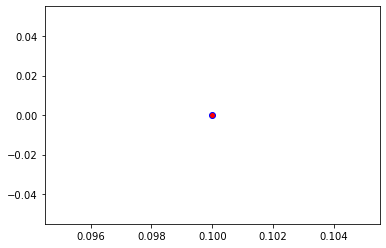

000000369323 752 = racket
000000369370 237 = miniature pinscher
000000369442 793 = shower cap
000000369503 877 = turnstile
000000369541 254 = pug
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


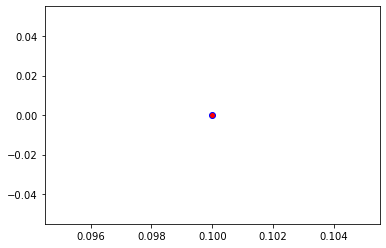

000000369675 466 = bullet train
000000369751 704 = parking meter
000000369757 464 = buckle
000000369771 818 = spotlight
000000369812 919 = street sign
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


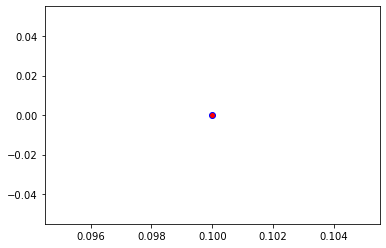

000000370042 898 = water bottle
000000370208 704 = parking meter
000000370270 736 = pool table
000000370375 602 = horizontal bar
000000370478 208 = Labrador retriever
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


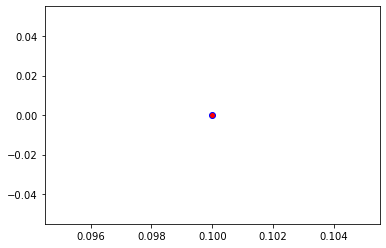

000000370486 879 = umbrella
000000370677 617 = lab coat
000000370711 494 = chime
000000370813 701 = parachute
000000370818 894 = wardrobe
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


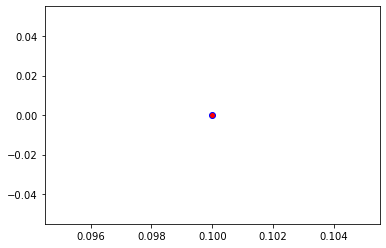

000000370900 865 = toyshop
000000370999 818 = spotlight
000000371042 867 = trailer truck
000000371472 723 = pinwheel
000000371529 861 = toilet seat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


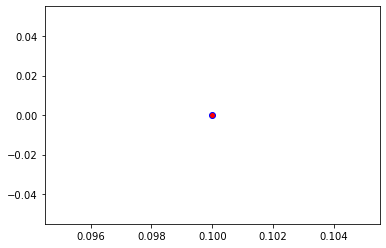

000000371552 805 = soccer ball
000000371677 760 = refrigerator
000000371699 624 = library
000000371749 786 = sewing machine
000000372203 978 = seashore
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


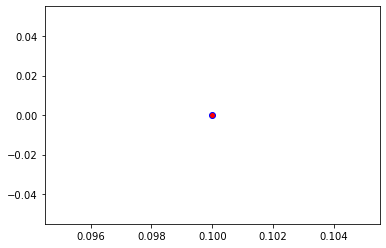

000000372260 879 = umbrella
000000372307 716 = picket fence
000000372317 705 = passenger car
000000372349 842 = swimming trunks
000000372466 673 = mouse
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


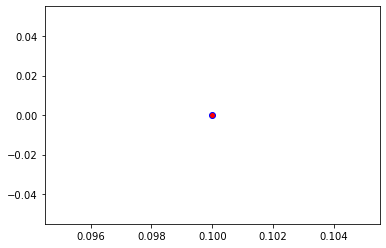

000000372577 752 = racket
000000372718 883 = vase
000000372819 339 = sorrel
000000373315 421 = bannister
000000373353 324 = cab
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


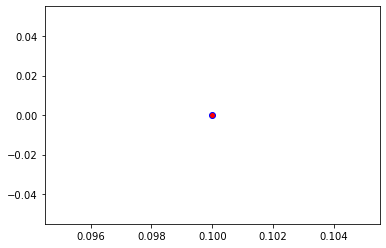

000000373382 752 = racket
000000373705 704 = parking meter
000000374052 702 = parallel bars
000000374083 927 = trifle
000000374369 248 = ski
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


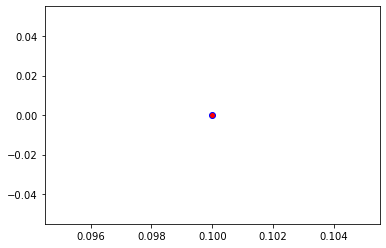

000000374545 843 = swing
000000374551 17 = jay
000000374727 324 = cab
000000374982 469 = caldron
000000375015 372 = baboon
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


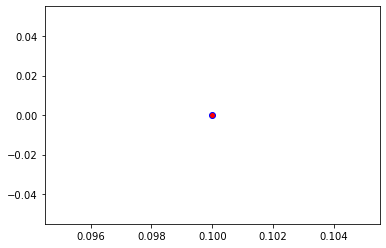

000000375078 744 = projectile
000000375278 223 = schipperke
000000375430 470 = candle
000000375469 770 = running shoe
000000375493 646 = maze
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


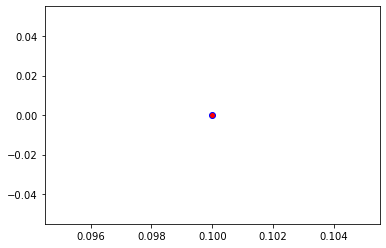

000000375763 349 = bighorn
000000376093 787 = shield
000000376112 248 = ski
000000376206 693 = paddle
000000376264 761 = remote control
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


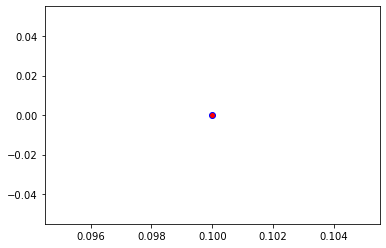

000000376278 340 = zebra
000000376284 898 = water bottle
000000376307 954 = banana
000000376310 896 = washbasin
000000376322 762 = restaurant
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


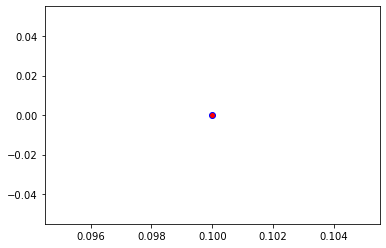

000000376365 818 = spotlight
000000376442 861 = toilet seat
000000376478 883 = vase
000000376625 829 = streetcar
000000376856 593 = harmonica
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


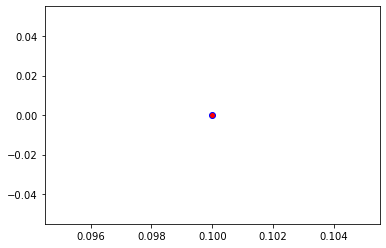

000000376900 981 = ballplayer
000000377000 283 = Persian cat
000000377113 796 = ski mask
000000377239 879 = umbrella
000000377368 695 = padlock
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


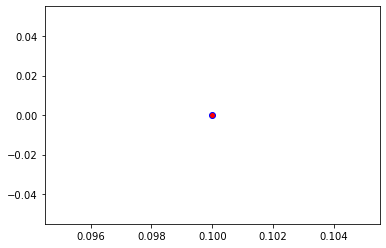

000000377393 324 = cab
000000377486 562 = fountain
000000377497 340 = zebra
000000377575 850 = teddy
000000377588 862 = torch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


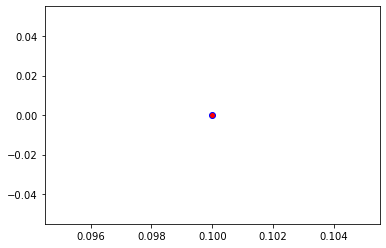

000000377635 706 = patio
000000377670 532 = dining table
000000377723 829 = streetcar
000000377814 931 = bagel
000000377882 383 = Madagascar cat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


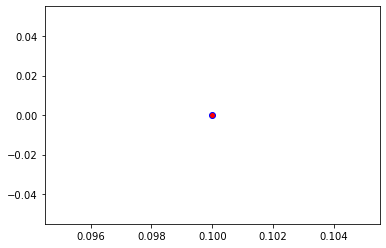

000000377946 734 = police van
000000378099 918 = crossword puzzle
000000378116 562 = fountain
000000378139 324 = cab
000000378244 195 = Boston bull
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


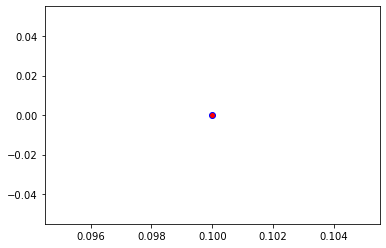

000000378284 924 = guacamole
000000378453 340 = zebra
000000378454 978 = seashore
000000378515 947 = mushroom
000000378605 334 = cup
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


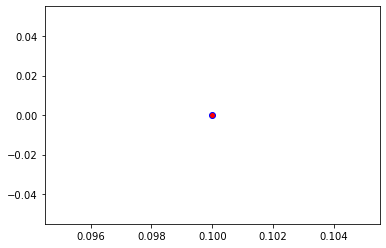

000000378673 880 = unicycle
000000378873 737 = pop bottle
000000379332 752 = racket
000000379441 453 = bookcase
000000379453 812 = space shuttle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


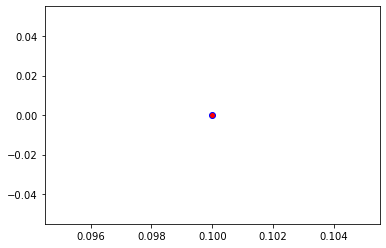

000000379476 646 = maze
000000379533 340 = zebra
000000379800 829 = streetcar
000000379842 454 = bookshop
000000380203 343 = warthog
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


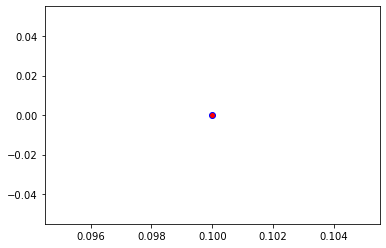

000000380706 612 = jinrikisha
000000380711 842 = swimming trunks
000000380913 654 = minibus
000000381360 562 = fountain
000000381587 861 = toilet seat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


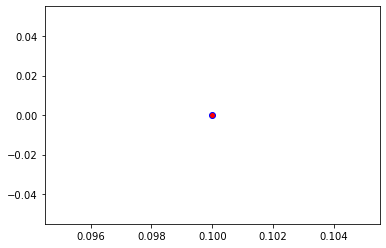

000000381639 916 = web site
000000381971 603 = horse cart
000000382009 880 = unicycle
000000382030 788 = shoe shop
000000382088 562 = fountain
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


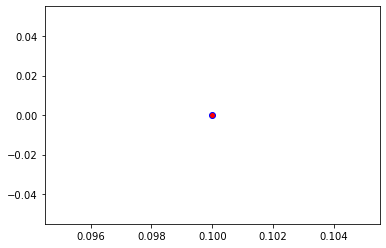

000000382111 690 = oxcart
000000382122 497 = church
000000382125 504 = coffee mug
000000382696 534 = washer
000000382734 760 = refrigerator
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


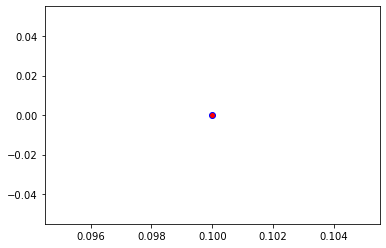

000000382743 549 = envelope
000000383289 880 = unicycle
000000383337 523 = crutch
000000383339 978 = seashore
000000383384 842 = swimming trunks
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


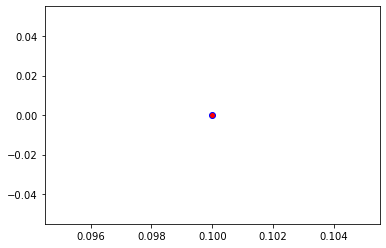

000000383386 824 = stole
000000383443 669 = mosquito net
000000383606 896 = washbasin
000000383621 404 = airliner
000000383676 251 = dalmatian
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


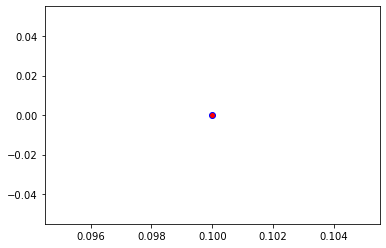

000000383838 903 = wig
000000383842 617 = lab coat
000000383921 349 = bighorn
000000384136 570 = gasmask
000000384350 404 = airliner
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


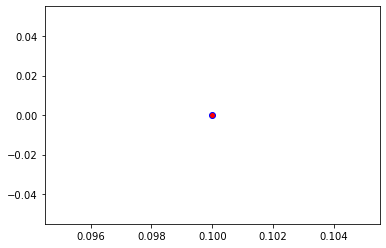

000000384468 386 = African elephant
000000384513 803 = snowplow
000000384527 495 = china cabinet
000000384616 358 = pole
000000384651 669 = mosquito net
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


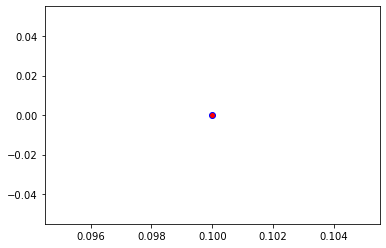

000000384661 827 = stove
000000384666 248 = ski
000000384670 752 = racket
000000384808 861 = toilet seat
000000384850 794 = shower curtain
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


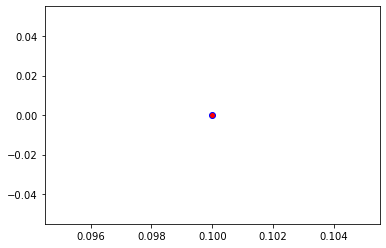

000000384949 713 = pier
000000385029 618 = ladle
000000385190 561 = forklift
000000385205 197 = giant schnauzer
000000385719 527 = desktop computer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


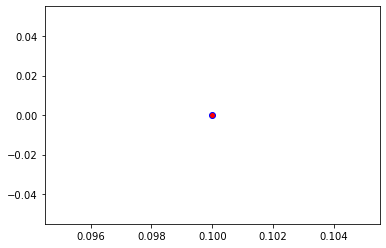

000000385997 905 = window shade
000000386134 868 = tray
000000386210 28 = pot
000000386277 619 = lampshade
000000386352 723 = pinwheel
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


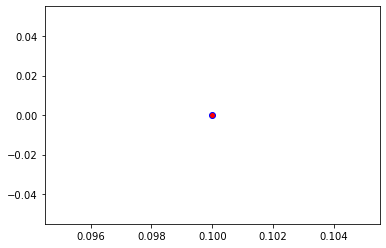

000000386457 282 = tiger cat
000000386879 752 = racket
000000386912 454 = bookshop
000000387098 799 = sliding door
000000387148 562 = fountain
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


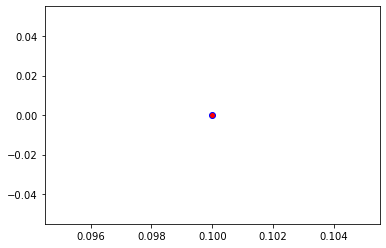

000000387383 223 = schipperke
000000387387 888 = viaduct
000000387916 140 = alp
000000388056 251 = dalmatian
000000388215 752 = racket
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


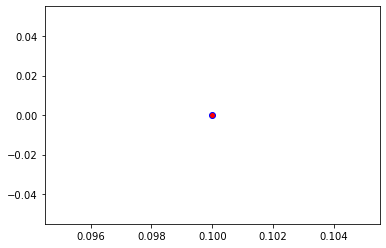

000000388258 671 = mountain bike
000000388846 898 = water bottle
000000388903 399 = abaya
000000388927 761 = remote control
000000389109 762 = restaurant
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


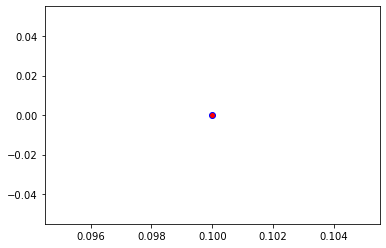

000000389197 619 = lampshade
000000389315 692 = packet
000000389316 690 = oxcart
000000389381 851 = television
000000389451 349 = bighorn
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


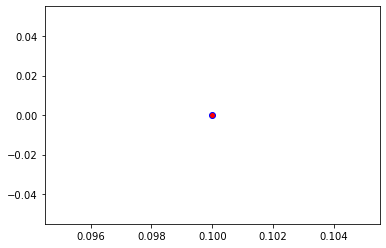

000000389532 557 = flagpole
000000389566 562 = fountain
000000389684 734 = police van
000000389804 877 = turnstile
000000389812 451 = bolo tie
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


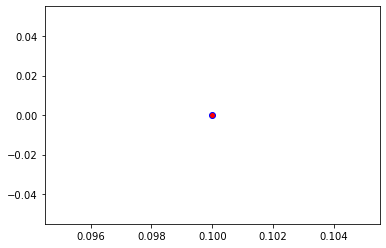

000000389933 178 = Weimaraner
000000390246 978 = seashore
000000390301 84 = peacock
000000390555 716 = picket fence
000000390826 388 = giant panda
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


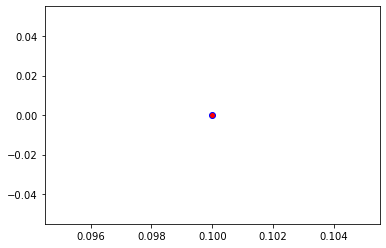

000000390902 641 = maraca
000000391140 474 = cardigan
000000391144 386 = African elephant
000000391290 522 = croquet ball
000000391375 884 = vault
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


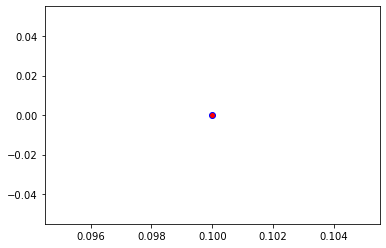

000000391648 442 = bell cote
000000391722 474 = cardigan
000000392228 442 = bell cote
000000392481 144 = pelican
000000392722 704 = parking meter
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


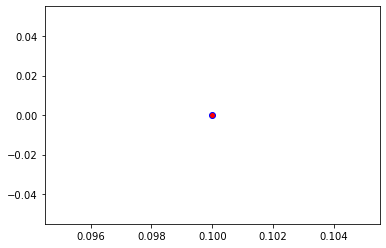

000000392818 156 = Blenheim spaniel
000000392933 4 = hammerhead
000000393014 850 = teddy
000000393056 978 = seashore
000000393093 713 = pier
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


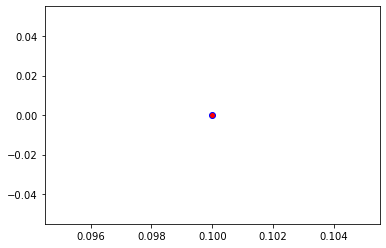

000000393115 696 = paintbrush
000000393226 561 = forklift
000000393282 176 = gazelle
000000393469 792 = shovel
000000393569 116 = cradle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


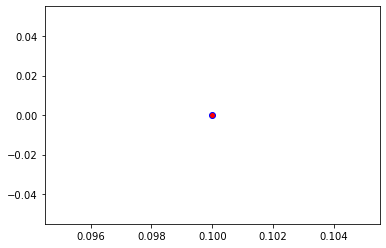

000000393838 818 = spotlight
000000394199 670 = motor scooter
000000394206 955 = jackfruit
000000394275 654 = minibus
000000394328 861 = toilet seat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


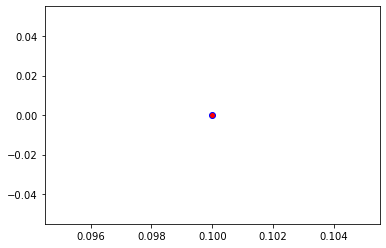

000000394510 898 = water bottle
000000394559 752 = racket
000000394611 347 = bison
000000394677 560 = football helmet
000000394940 641 = maraca
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


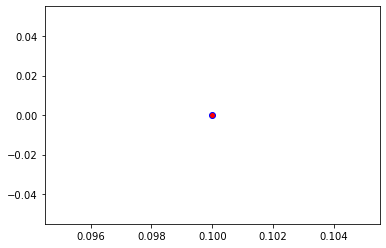

000000395180 562 = fountain
000000395343 883 = vase
000000395388 634 = lumbermill
000000395575 449 = boathouse
000000395633 724 = pirate
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


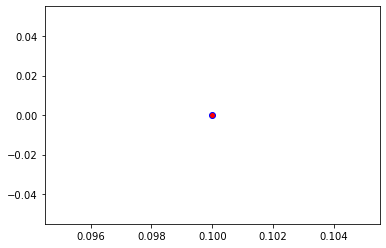

000000395701 598 = home theater
000000395801 704 = parking meter
000000395903 842 = swimming trunks
000000396200 879 = umbrella
000000396205 5 = ram
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


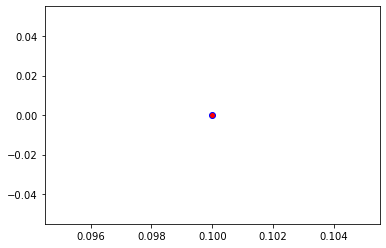

000000396274 28 = pot
000000396338 569 = garbage truck
000000396518 428 = barrow
000000396526 905 = window shade
000000396568 562 = fountain
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


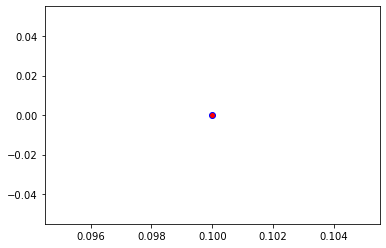

000000396580 410 = apiary
000000396729 761 = remote control
000000396863 167 = English foxhound
000000396903 895 = warplane
000000397133 532 = dining table
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


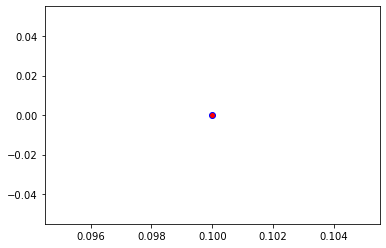

000000397279 852 = tennis ball
000000397303 788 = shoe shop
000000397327 435 = bathtub
000000397351 954 = banana
000000397354 655 = miniskirt
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


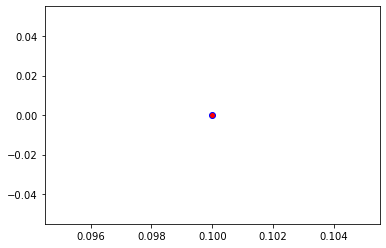

000000397639 5 = ram
000000397681 916 = web site
000000398028 981 = ballplayer
000000398203 560 = football helmet
000000398237 714 = pick
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


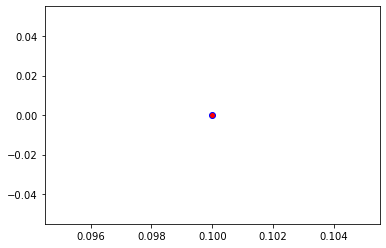

000000398377 523 = crutch
000000398438 503 = cocktail shaker
000000398652 538 = dome
000000398742 615 = knee pad
000000398810 223 = schipperke
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


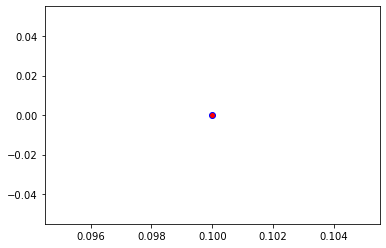

000000398905 745 = projector
000000399205 824 = stole
000000399296 898 = water bottle
000000399462 242 = boxer
000000399560 285 = Egyptian cat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


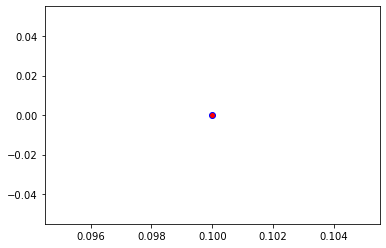

000000399655 245 = French bulldog
000000399764 37 = ox
000000400044 248 = ski
000000400082 545 = electric fan
000000400161 443 = bib
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


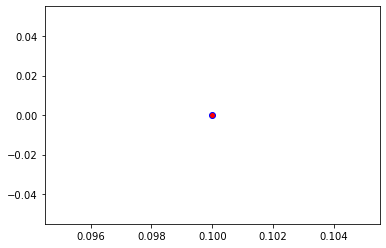

000000400367 324 = cab
000000400573 558 = flute
000000400794 679 = necklace
000000400803 408 = amphibian
000000400815 669 = mosquito net
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


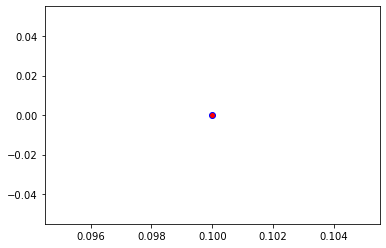

000000400922 900 = water tower
000000401244 701 = parachute
000000401250 512 = screw
000000401446 562 = fountain
000000401862 297 = slot
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


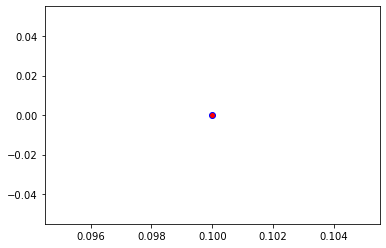

000000401991 223 = schipperke
000000402096 799 = sliding door
000000402118 562 = fountain
000000402334 497 = church
000000402346 868 = tray
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


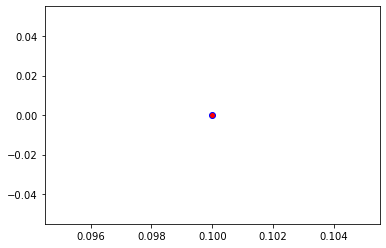

000000402433 611 = jigsaw puzzle
000000402473 285 = Egyptian cat
000000402519 14 = indigo bunting
000000402615 862 = torch
000000402720 851 = television
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


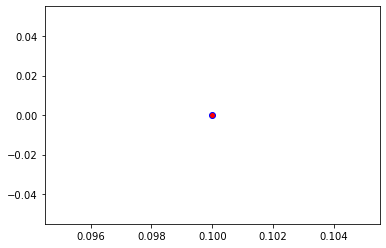

000000402765 761 = remote control
000000402774 879 = umbrella
000000402783 679 = necklace
000000402992 54 = hog
000000403122 781 = scoreboard
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


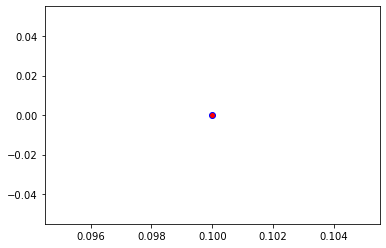

000000403353 846 = table lamp
000000403385 794 = shower curtain
000000403565 444 = bicycle-built-for-two
000000403584 978 = seashore
000000403817 851 = television
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


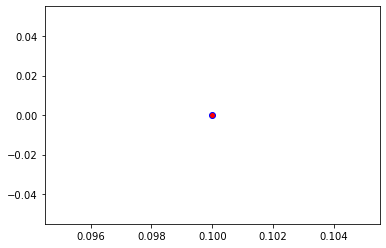

000000404128 318 = wing
000000404191 760 = refrigerator
000000404249 981 = ballplayer
000000404479 404 = airliner
000000404484 237 = miniature pinscher
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


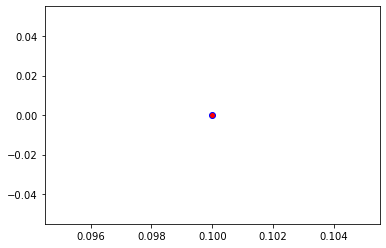

000000404534 879 = umbrella
000000404568 84 = peacock
000000404601 919 = street sign
000000404678 532 = dining table
000000404805 812 = space shuttle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


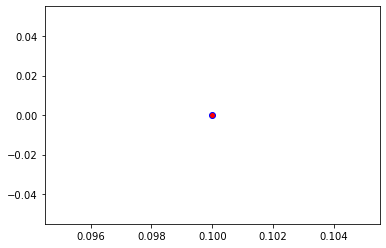

000000404839 456 = bow
000000404922 529 = diaper
000000404923 981 = ballplayer
000000405195 788 = shoe shop
000000405205 874 = trolleybus
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


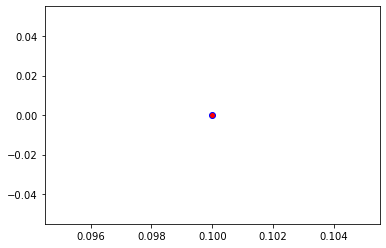

000000405249 796 = ski mask
000000405279 843 = swing
000000405306 281 = tabby
000000405432 692 = packet
000000405691 572 = goblet
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


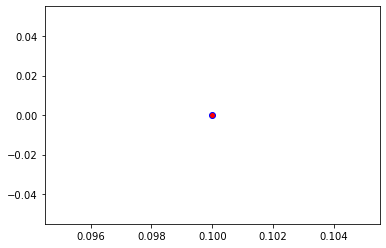

000000405970 831 = studio couch
000000405972 385 = Indian elephant
000000406129 752 = racket
000000406417 981 = ballplayer
000000406570 398 = abacus
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


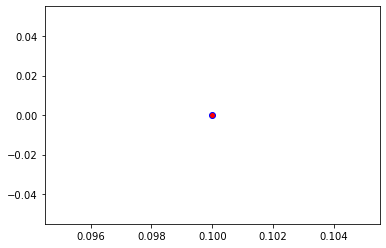

000000406611 575 = golfcart
000000406997 355 = llama
000000407002 792 = shovel
000000407083 654 = minibus
000000407298 770 = running shoe
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


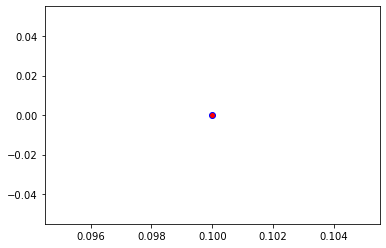

000000407403 725 = pitcher
000000407518 85 = quail
000000407524 938 = cauliflower
000000407574 954 = banana
000000407614 454 = bookshop
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


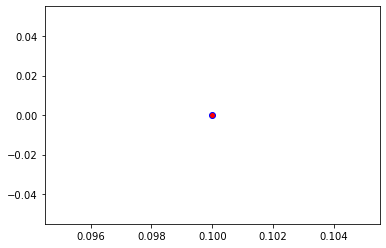

000000407646 752 = racket
000000407650 672 = mountain tent
000000407825 409 = analog clock
000000407868 971 = bubble
000000407943 619 = lampshade
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


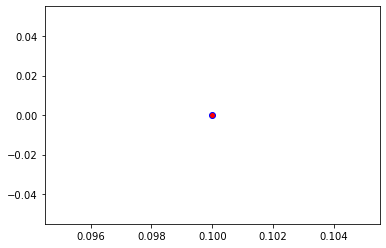

000000407960 285 = Egyptian cat
000000408112 569 = garbage truck
000000408120 671 = mountain bike
000000408696 794 = shower curtain
000000408774 781 = scoreboard
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


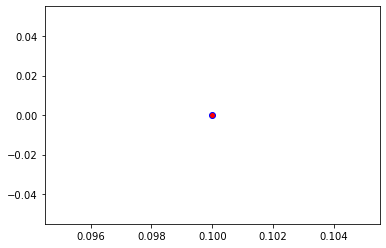

000000408830 670 = motor scooter
000000409198 768 = rugby ball
000000409211 862 = torch
000000409268 850 = teddy
000000409358 896 = washbasin
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


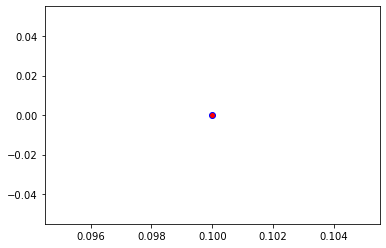

000000409424 584 = hair slide
000000409475 248 = ski
000000409542 409 = analog clock
000000409630 508 = computer keyboard
000000409867 905 = window shade
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


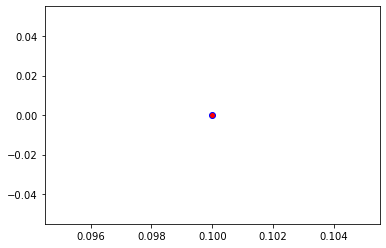

000000410221 497 = church
000000410428 5 = ram
000000410456 562 = fountain
000000410487 492 = chest
000000410496 752 = racket
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


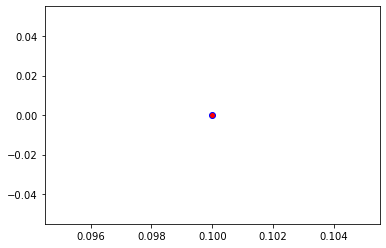

000000410510 921 = book jacket
000000410612 536 = dock
000000410650 523 = crutch
000000410712 919 = street sign
000000410735 928 = ice cream
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


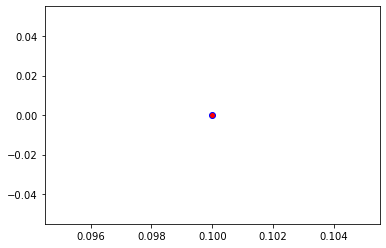

000000410878 665 = moped
000000410880 267 = standard poodle
000000410934 938 = cauliflower
000000411530 248 = ski
000000411665 818 = spotlight
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


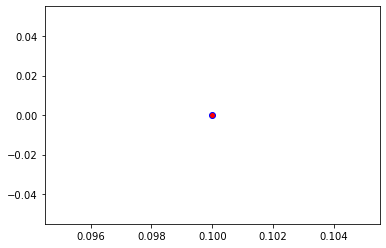

000000411754 617 = lab coat
000000411774 745 = projector
000000411817 886 = vending machine
000000411938 612 = jinrikisha
000000411953 546 = electric guitar
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


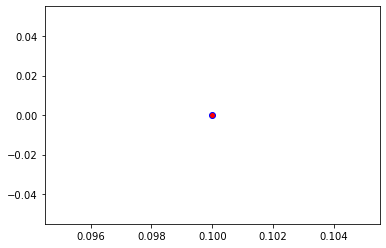

000000412240 831 = studio couch
000000412286 981 = ballplayer
000000412362 457 = bow tie
000000412531 920 = traffic light
000000412887 355 = llama
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


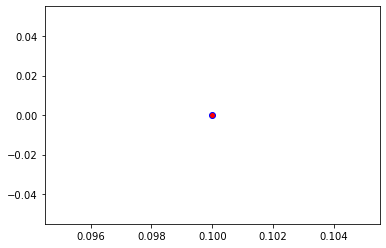

000000412894 920 = traffic light
000000413247 526 = desk
000000413395 195 = Boston bull
000000413404 703 = park bench
000000413552 765 = rocking chair
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


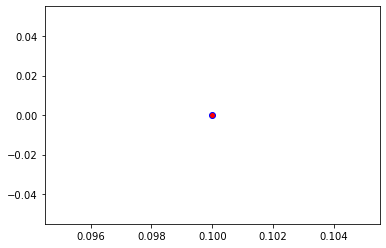

000000413689 791 = shopping cart
000000414034 898 = water bottle
000000414133 557 = flagpole
000000414170 523 = crutch
000000414261 297 = sloth bear
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


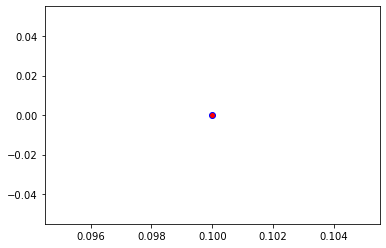

000000414340 475 = car mirror
000000414385 475 = car mirror
000000414510 569 = garbage truck
000000414638 714 = pick
000000414673 890 = volleyball
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


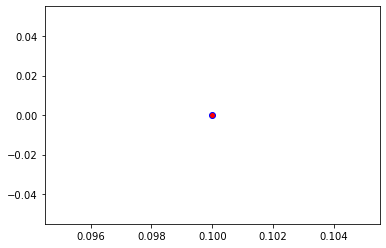

000000414676 682 = obelisk
000000414795 349 = bighorn
000000415194 423 = barber chair
000000415238 898 = water bottle
000000415536 874 = trolleybus
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


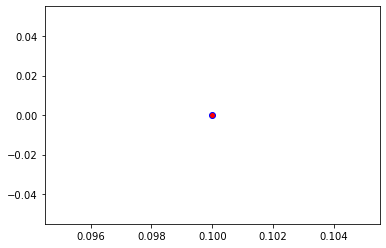

000000415716 532 = dining table
000000415727 476 = carousel
000000415741 799 = sliding door
000000415748 386 = African elephant
000000415882 564 = four-poster
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


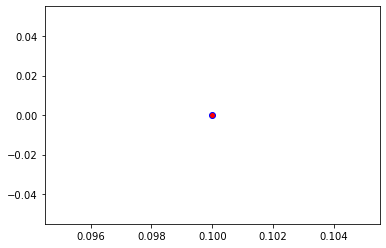

000000415990 456 = bow
000000416104 762 = restaurant
000000416170 905 = window shade
000000416256 478 = carton
000000416269 547 = electric locomotive
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


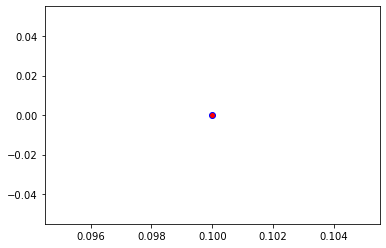

000000416330 284 = Siamese cat
000000416343 768 = rugby ball
000000416451 546 = electric guitar
000000416534 799 = sliding door
000000416745 794 = shower curtain
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


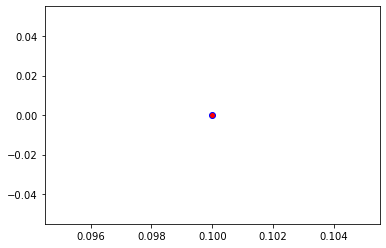

000000416758 163 = bloodhound
000000416837 350 = ibex
000000416885 572 = goblet
000000416991 920 = traffic light
000000417043 791 = shopping cart
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


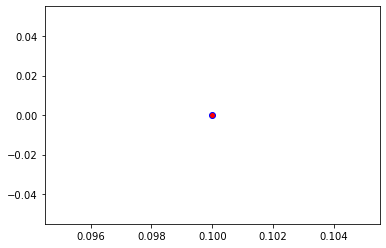

000000417085 178 = Weimaraner
000000417249 791 = shopping cart
000000417285 818 = spotlight
000000417465 434 = bath towel
000000417608 658 = mitten
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


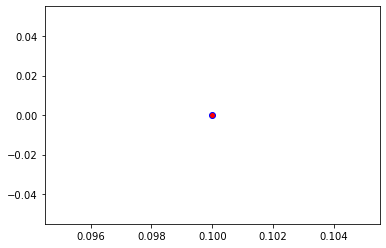

000000417632 898 = water bottle
000000417779 637 = mailbox
000000417876 562 = fountain
000000417911 562 = fountain
000000418062 898 = water bottle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


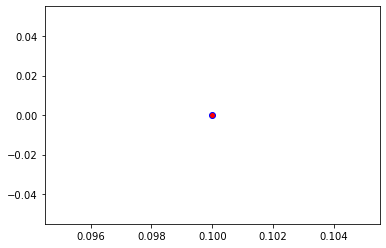

000000418281 254 = pug
000000418696 497 = church
000000418959 242 = boxer
000000418961 857 = throne
000000419096 565 = freight car
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


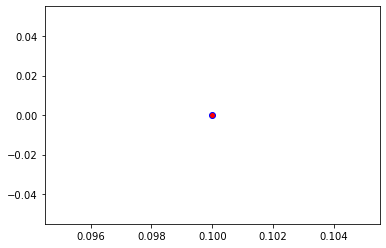

000000419098 902 = whistle
000000419201 140 = alp
000000419312 461 = plate
000000419379 470 = candle
000000419408 476 = carousel
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


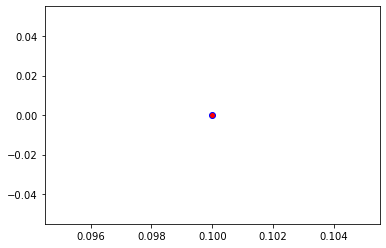

000000419601 905 = window shade
000000419653 495 = china cabinet
000000419882 664 = monitor
000000419974 572 = goblet
000000420069 562 = fountain
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


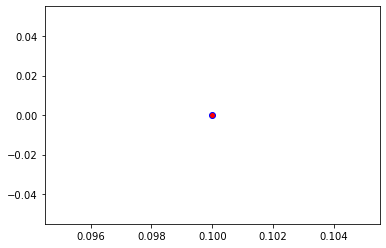

000000420230 386 = African elephant
000000420281 965 = burrito
000000420472 290 = jaguar
000000420840 680 = nipple
000000420916 982 = groom
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


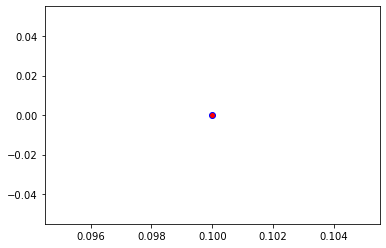

000000421060 549 = envelope
000000421455 475 = car mirror
000000421757 536 = dock
000000421834 14 = indigo bunting
000000421923 706 = patio
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


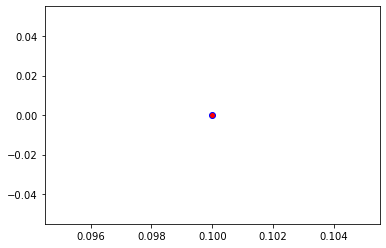

000000422670 818 = spotlight
000000422706 358 = pole
000000422836 476 = carousel
000000422886 785 = seat belt
000000422998 737 = pop bottle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


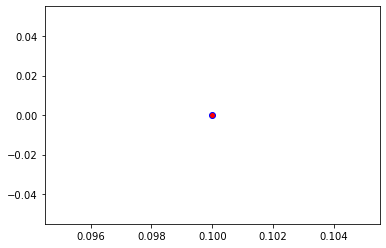

000000423104 755 = radio telescope
000000423123 414 = backpack
000000423229 820 = steam locomotive
000000423506 906 = Windsor tie
000000423519 874 = trolleybus
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


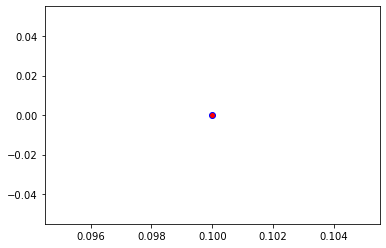

000000423617 734 = police van
000000423798 920 = traffic light
000000423944 818 = spotlight
000000423971 745 = projector
000000424135 704 = parking meter
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


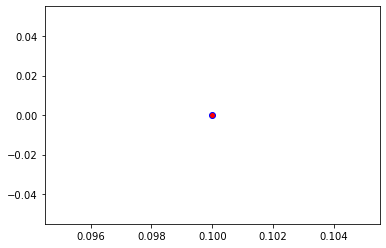

000000424162 177 = Scottish deerhound
000000424349 760 = refrigerator
000000424521 562 = fountain
000000424545 282 = tiger cat
000000424551 248 = ski
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


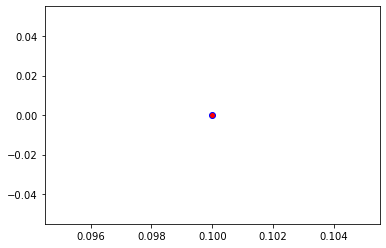

000000424642 646 = maze
000000424721 948 = Granny Smith
000000424776 895 = warplane
000000424975 498 = cinema
000000425221 904 = window screen
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


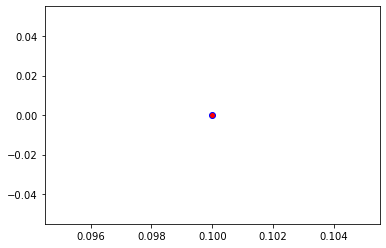

000000425226 816 = spindle
000000425227 701 = parachute
000000425361 457 = bow tie
000000425390 284 = Siamese cat
000000425702 135 = limpkin
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


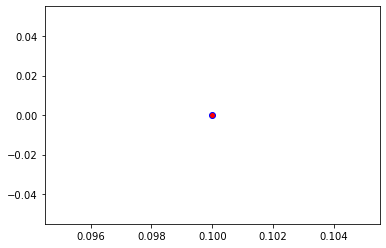

000000425906 751 = racer
000000425925 442 = bell cote
000000426166 772 = safety pin
000000426203 421 = bannister
000000426241 556 = screen
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


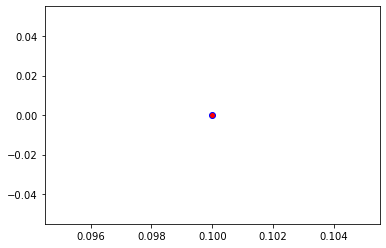

000000426253 688 = oscilloscope
000000426268 704 = parking meter
000000426297 340 = zebra
000000426329 999 = toilet tissue
000000426372 569 = garbage truck
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


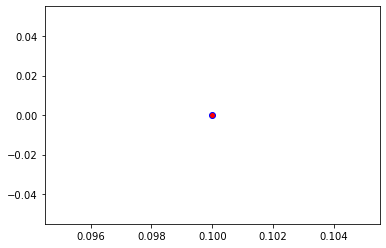

000000426376 248 = ski
000000426795 965 = burrito
000000426836 562 = fountain
000000427034 161 = basset
000000427055 409 = analog clock
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


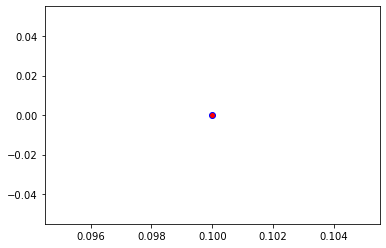

000000427077 981 = ballplayer
000000427160 981 = ballplayer
000000427256 981 = ballplayer
000000427338 663 = monastery
000000427500 412 = ashcan
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


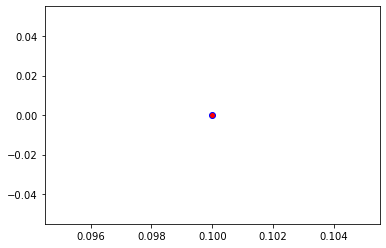

000000427649 978 = seashore
000000427655 690 = oxcart
000000427997 562 = fountain
000000428111 669 = mosquito net
000000428218 522 = croquet ball
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


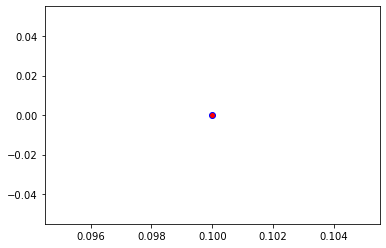

000000428280 706 = patio
000000428454 792 = shovel
000000428562 228 = komondor
000000428867 850 = teddy
000000429011 561 = forklift
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


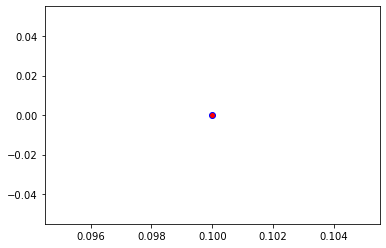

000000429109 407 = ambulance
000000429281 954 = banana
000000429530 883 = vase
000000429598 651 = microwave
000000429623 611 = jigsaw puzzle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


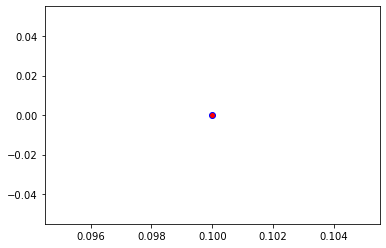

000000429690 981 = ballplayer
000000429718 646 = maze
000000429761 752 = racket
000000430048 905 = window shade
000000430056 529 = diaper
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


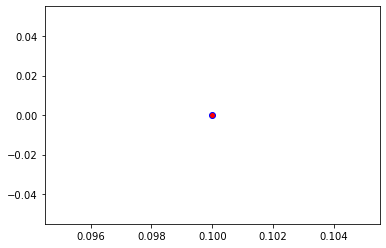

000000430073 5 = ram
000000430286 770 = running shoe
000000430377 248 = ski
000000430871 704 = parking meter
000000430875 920 = traffic light
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


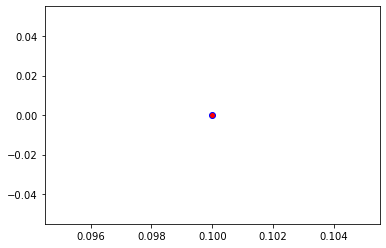

000000430961 981 = ballplayer
000000430973 861 = toilet seat
000000431140 896 = washbasin
000000431545 981 = ballplayer
000000431568 898 = water bottle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


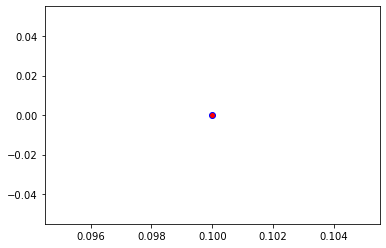

000000431693 752 = racket
000000431727 599 = honeycomb
000000431848 702 = parallel bars
000000431876 981 = ballplayer
000000431896 547 = electric locomotive
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


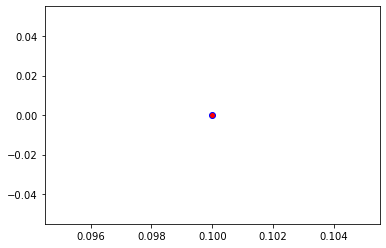

000000432085 532 = dining table
000000432468 636 = mailbag
000000432553 254 = pug
000000432898 842 = swimming trunks
000000433103 695 = padlock
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


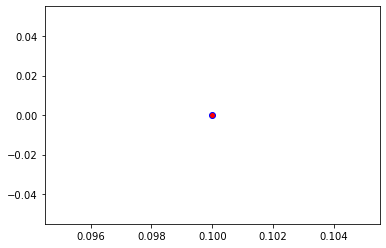

000000433134 284 = Siamese cat
000000433192 431 = bassinet
000000433204 977 = sandbar
000000433243 340 = zebra
000000433374 349 = bighorn
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


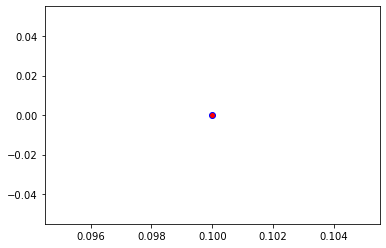

000000433515 701 = parachute
000000433774 704 = parking meter
000000433915 851 = television
000000433980 650 = microphone
000000434204 523 = crutch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


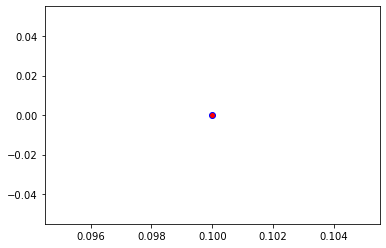

000000434230 786 = sewing machine
000000434247 460 = breakwater
000000434297 584 = hair slide
000000434459 954 = banana
000000434479 883 = vase
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


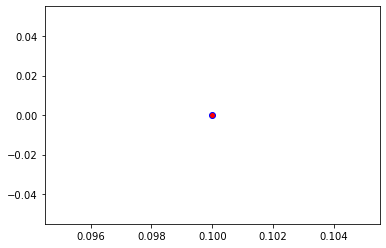

000000434548 981 = ballplayer
000000434996 721 = pillow
000000435003 526 = desk
000000435081 770 = running shoe
000000435205 850 = teddy
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


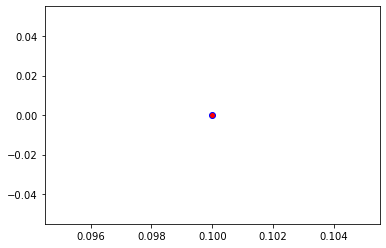

000000435206 512 = screw
000000435208 620 = laptop
000000435299 89 = sulphur-crested cockatoo
000000435880 745 = projector
000000436315 861 = toilet seat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


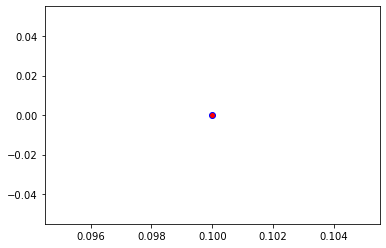

000000436551 100 = black swan
000000436617 532 = dining table
000000436738 874 = trolleybus
000000436883 569 = garbage truck
000000437110 498 = palace
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


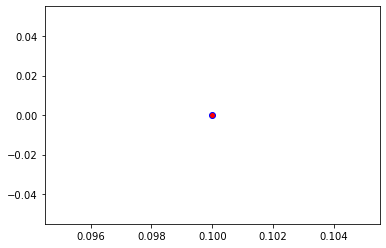

000000437205 740 = power drill
000000437239 646 = maze
000000437331 801 = snorkel
000000437351 401 = accordion
000000437392 861 = toilet seat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


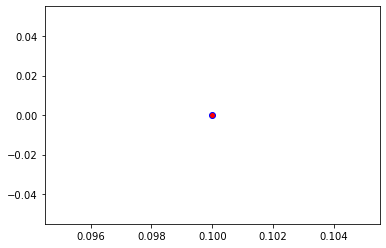

000000437514 706 = patio
000000437898 423 = barber chair
000000438017 358 = pole
000000438226 861 = toilet seat
000000438269 132 = American egret
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


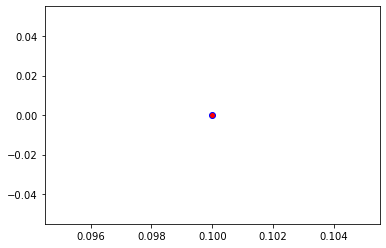

000000438304 752 = racket
000000438774 736 = pool table
000000438862 805 = soccer ball
000000438876 752 = racket
000000438907 421 = bannister
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


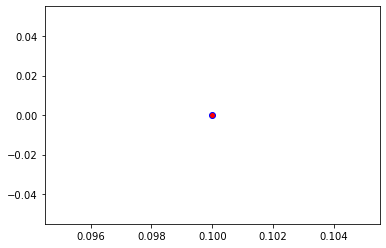

000000438955 646 = maze
000000439180 842 = swimming trunks
000000439290 815 = spider web
000000439426 904 = window screen
000000439522 843 = swing
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


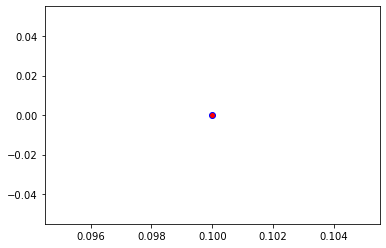

000000439525 813 = spatula
000000439593 705 = passenger car
000000439623 412 = ashcan
000000439715 385 = Indian elephant
000000439773 615 = knee pad
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


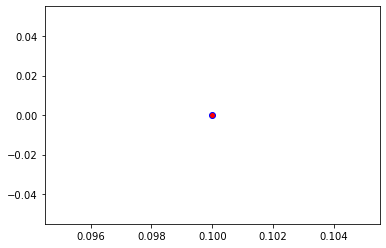

000000439854 245 = French bulldog
000000439994 781 = scoreboard
000000440171 386 = African elephant
000000440184 981 = ballplayer
000000440336 842 = swimming trunks
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


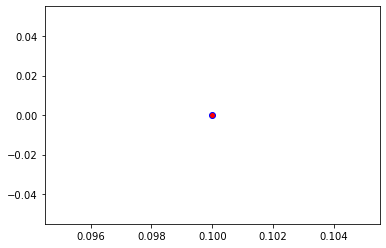

000000440475 532 = dining table
000000440507 412 = barrel
000000440508 565 = freight car
000000440617 829 = streetcar
000000441247 831 = studio couch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


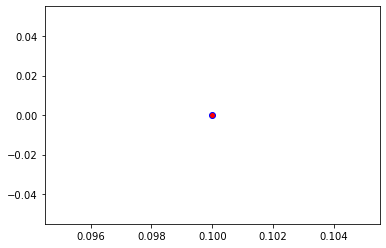

000000441286 208 = Labrador retriever
000000441442 787 = shield
000000441468 898 = water bottle
000000441491 903 = wig
000000441543 879 = umbrella
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


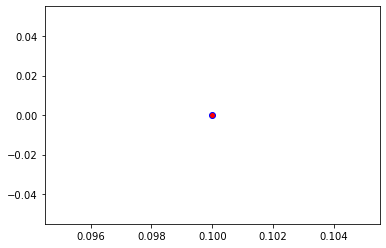

000000441553 627 = limousine
000000441586 461 = breastplate
000000442009 435 = tub
000000442161 457 = bow tie
000000442306 879 = umbrella
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


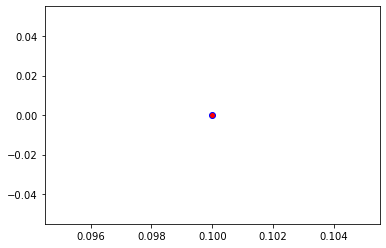

000000442323 556 = screen
000000442456 627 = limousine
000000442463 736 = pool table
000000442480 572 = goblet
000000442661 669 = mosquito net
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


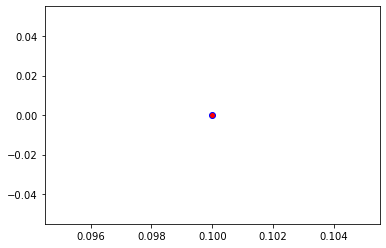

000000442746 522 = croquet ball
000000442822 536 = dock
000000442836 862 = torch
000000442993 510 = container ship
000000443303 478 = carton
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


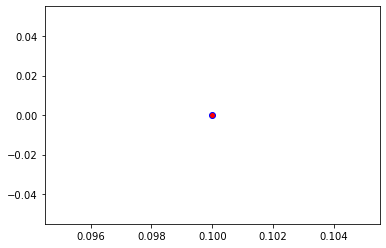

000000443426 570 = gasmask
000000443498 407 = ambulance
000000443844 358 = pole
000000443969 791 = shopping cart
000000444142 781 = scoreboard
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


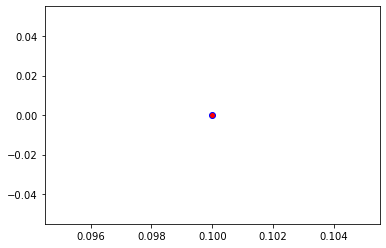

000000444275 556 = screen
000000444879 705 = passenger car
000000445248 386 = African elephant
000000445365 251 = dalmatian
000000445439 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


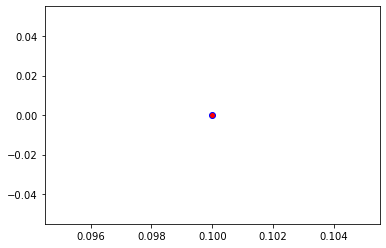

000000445602 248 = ski
000000445658 534 = dishwasher
000000445675 251 = dalmatian
000000445722 476 = carousel
000000445792 806 = sock
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


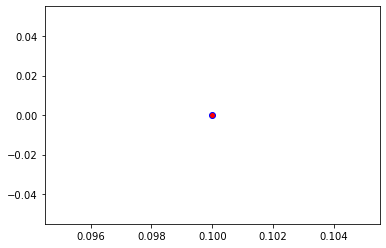

000000445834 423 = barber chair
000000445846 877 = turnstile
000000445999 641 = maraca
000000446005 651 = microwave
000000446117 761 = remote control
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


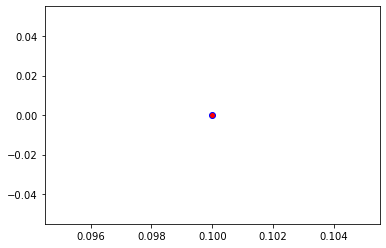

000000446206 324 = cab
000000446207 531 = digital watch
000000446522 831 = studio couch
000000446574 435 = tub
000000446651 542 = drumstick
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


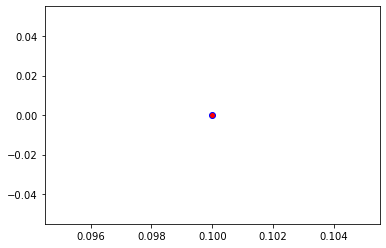

000000446703 539 = doormat
000000447088 981 = ballplayer
000000447169 760 = refrigerator
000000447187 898 = water bottle
000000447200 188 = wire-haired fox terrier
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


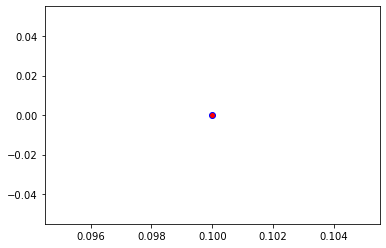

000000447313 340 = zebra
000000447314 682 = obelisk
000000447342 829 = streetcar
000000447465 248 = ski
000000447522 938 = cauliflower
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


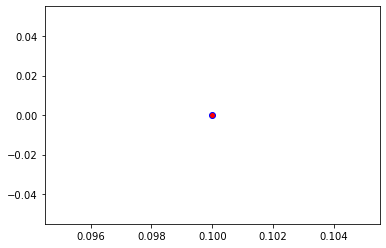

000000447611 593 = harmonica
000000447789 919 = street sign
000000447917 805 = soccer ball
000000448076 614 = kimono
000000448256 569 = garbage truck
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


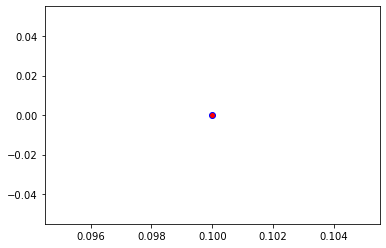

000000448263 560 = football helmet
000000448365 248 = ski
000000448410 812 = space shuttle
000000448448 289 = snow leopard
000000448810 424 = barbershop
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


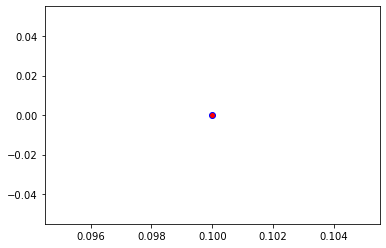

000000449190 806 = sock
000000449198 510 = container ship
000000449312 572 = goblet
000000449406 340 = zebra
000000449432 575 = golfcart
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


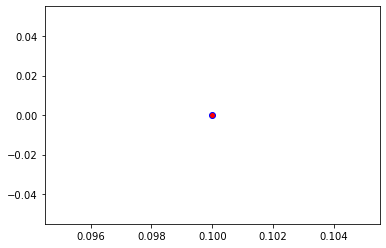

000000449579 752 = racket
000000449603 84 = peacock
000000449661 883 = vase
000000449909 562 = fountain
000000449996 404 = liner
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


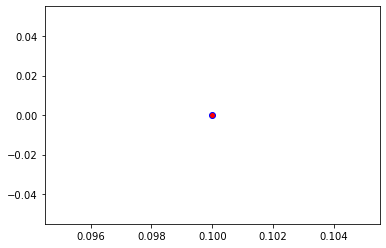

000000450075 982 = groom
000000450100 928 = ice cream
000000450202 572 = goblet
000000450303 532 = dining table
000000450399 982 = groom
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


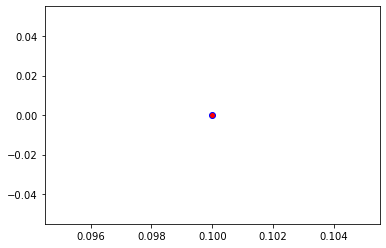

000000450439 701 = parachute
000000450488 598 = home theater
000000450559 981 = ballplayer
000000450686 761 = remote control
000000450758 978 = seashore
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


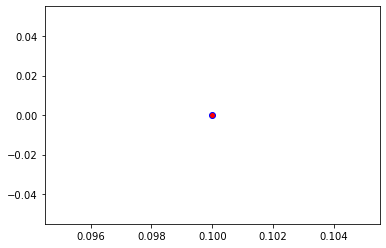

000000451043 248 = ski
000000451084 843 = swing
000000451090 484 = catamaran
000000451144 672 = mountain tent
000000451150 931 = bagel
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


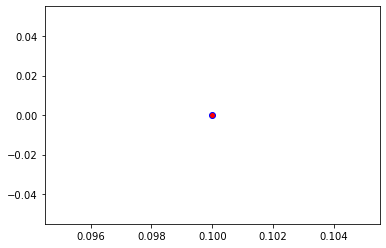

000000451155 669 = mosquito net
000000451308 556 = screen
000000451435 722 = ping-pong ball
000000451571 809 = soup bowl
000000451693 463 = bucket
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


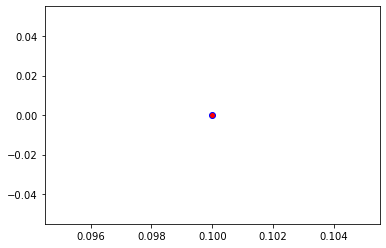

000000451714 248 = ski
000000451879 981 = ballplayer
000000452084 902 = whistle
000000452122 404 = airliner
000000452321 654 = minibus
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


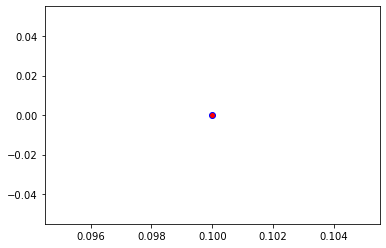

000000452515 418 = ballpoint
000000452784 646 = maze
000000452793 651 = microwave
000000452891 265 = toy poodle
000000453001 955 = jackfruit
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


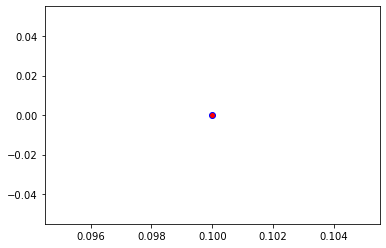

000000453040 107 = jellyfish
000000453166 639 = suit
000000453302 651 = microwave
000000453341 495 = china cabinet
000000453584 703 = park bench
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


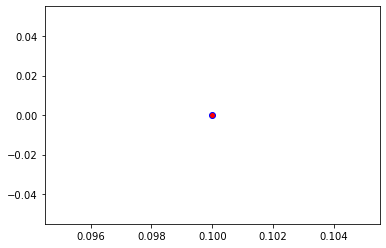

000000453634 896 = washbasin
000000453708 476 = carousel
000000453722 706 = patio
000000453841 407 = ambulance
000000453860 632 = loudspeaker
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


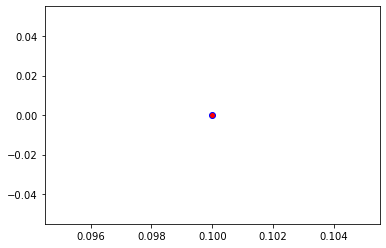

000000453981 224 = groenendael
000000454067 886 = vending machine
000000454404 579 = grand piano
000000454661 734 = police van
000000454750 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


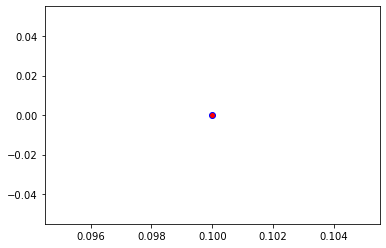

000000454798 603 = horse cart
000000454978 690 = oxcart
000000455085 874 = trolleybus
000000455157 532 = dining table
000000455219 690 = oxcart
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


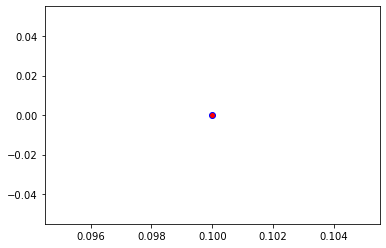

000000455267 909 = wok
000000455301 457 = bow tie
000000455352 442 = bell cote
000000455448 679 = necklace
000000455555 248 = ski
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


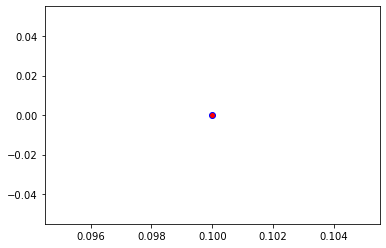

000000455597 423 = barber chair
000000455624 670 = motor scooter
000000455716 665 = moped
000000455872 576 = gondola
000000455937 498 = cinema
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


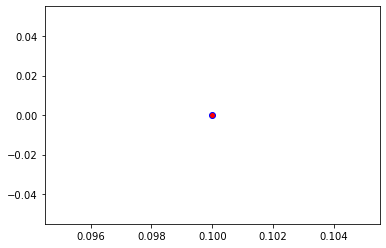

000000455981 861 = toilet seat
000000456015 354 = Arabian camel
000000456143 723 = pinwheel
000000456292 539 = doormat
000000456303 971 = bubble
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


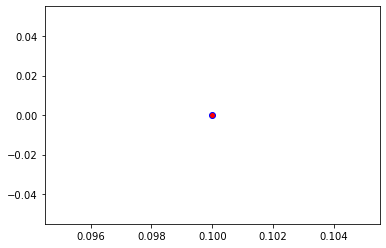

000000456394 665 = moped
000000456496 399 = abaya
000000456559 617 = lab coat
000000456662 887 = vestment
000000456865 404 = airliner
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


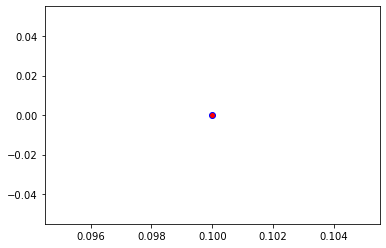

000000457078 454 = bookshop
000000457262 725 = pitcher
000000457559 805 = soccer ball
000000457848 665 = moped
000000457884 890 = volleyball
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


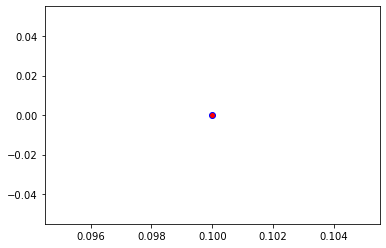

000000458045 445 = bikini
000000458054 412 = ashcan
000000458109 705 = passenger car
000000458223 460 = breakwater
000000458255 171 = Italian greyhound
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


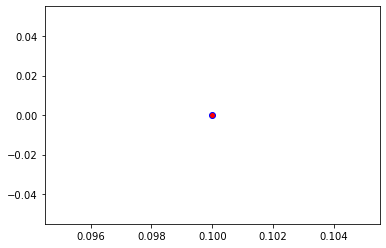

000000458325 541 = drum
000000458410 532 = dining table
000000458663 627 = limousine
000000458702 704 = parking meter
000000458755 365 = orangutan
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


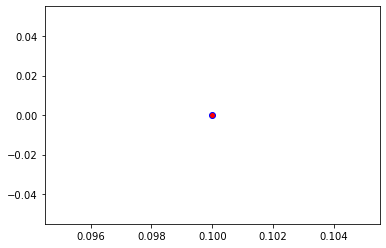

000000458768 421 = bannister
000000458790 905 = window shade
000000458992 611 = jigsaw puzzle
000000459153 263 = Pembroke
000000459195 602 = horizontal bar
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


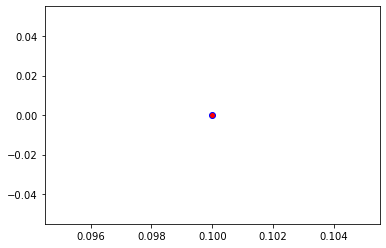

000000459272 931 = bagel
000000459396 227 = kelpie
000000459437 765 = rocking chair
000000459467 772 = safety pin
000000459500 892 = wall clock
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


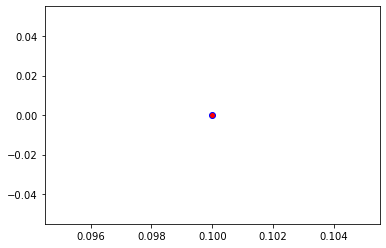

000000459634 978 = seashore
000000459662 570 = gasmask
000000459757 176 = gazelle
000000459809 576 = gondola
000000459887 828 = strainer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


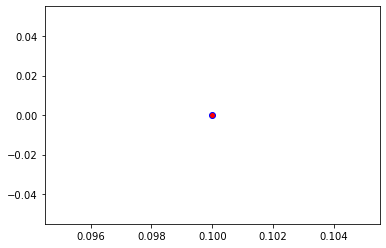

000000459954 877 = turnstile
000000460147 324 = cab
000000460160 144 = pelican
000000460229 919 = street sign
000000460333 526 = desk
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


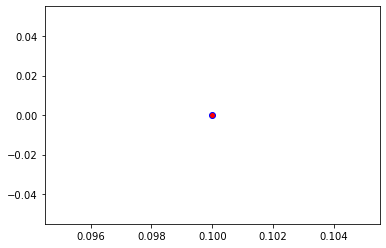

000000460347 627 = limousine
000000460379 562 = fountain
000000460494 924 = guacamole
000000460682 104 = wallaby
000000460683 898 = water bottle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


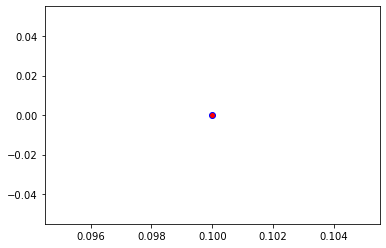

000000460841 999 = toilet tissue
000000460927 294 = brown bear
000000460929 440 = beer bottle
000000460967 561 = forklift
000000461009 457 = bow tie
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


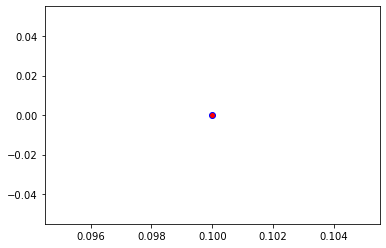

000000461036 379 = howler monkey
000000461275 919 = street sign
000000461405 562 = fountain
000000461573 703 = park bench
000000461751 971 = bubble
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


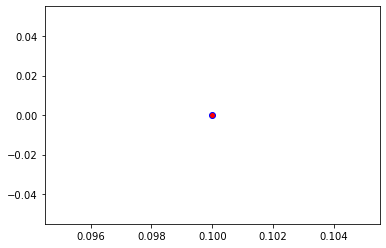

000000462031 981 = ballplayer
000000462371 947 = mushroom
000000462576 461 = plate
000000462614 532 = dining table
000000462629 760 = refrigerator
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


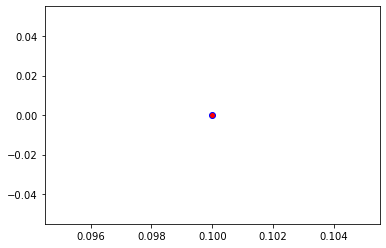

000000462643 644 = matchstick
000000462728 978 = seashore
000000462756 619 = lampshade
000000462904 5 = ram
000000463037 895 = warplane
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


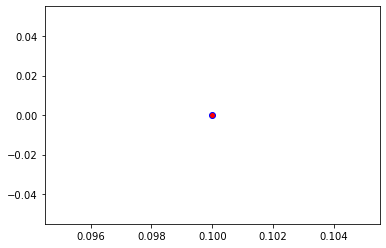

000000463174 752 = racket
000000463199 788 = shoe shop
000000463283 470 = candle
000000463522 603 = horse cart
000000463527 861 = toilet seat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


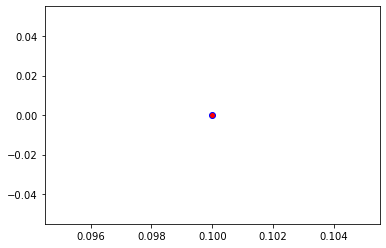

000000463542 248 = ski
000000463618 601 = hoopskirt
000000463647 898 = water bottle
000000463690 999 = toilet tissue
000000463730 569 = garbage truck
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


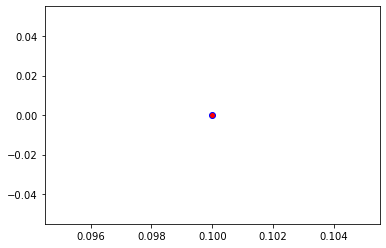

000000463802 666 = mortar
000000463842 520 = crib
000000463849 324 = cab
000000463918 641 = maraca
000000464089 843 = swing
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


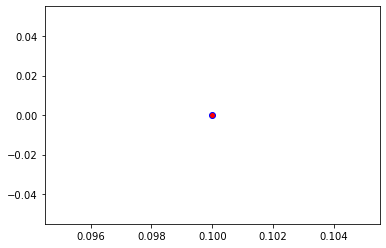

000000464144 248 = ski
000000464251 14 = indigo bunting
000000464358 799 = sliding door
000000464476 669 = mosquito net
000000464522 164 = bluetick
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


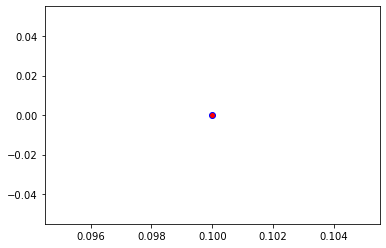

000000464689 406 = altar
000000464786 581 = radiator
000000464824 602 = horizontal bar
000000464872 340 = zebra
000000465129 651 = microwave
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


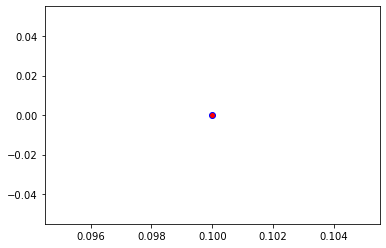

000000465179 433 = bathing cap
000000465180 433 = bathing cap
000000465430 898 = water bottle
000000465549 982 = groom
000000465585 868 = tray
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


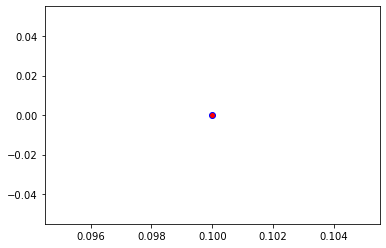

000000465675 866 = tractor
000000465718 527 = desktop computer
000000465806 898 = water bottle
000000465822 401 = accordion
000000465836 248 = ski
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


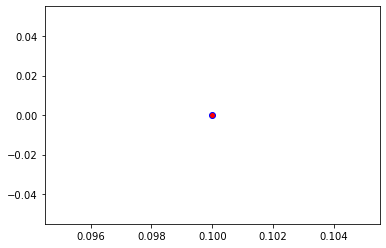

000000466085 861 = toilet seat
000000466125 879 = umbrella
000000466156 355 = llama
000000466256 742 = printer
000000466339 799 = sliding door
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


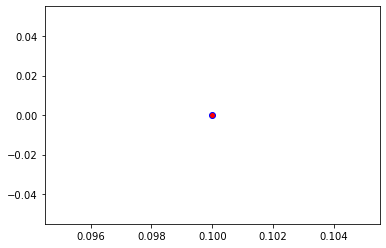

000000466416 510 = container ship
000000466567 108 = sea anemone
000000466602 801 = snorkel
000000466835 954 = banana
000000466986 480 = cash machine
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


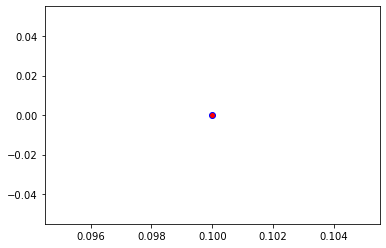

000000467176 553 = file
000000467315 794 = shower curtain
000000467511 670 = motor scooter
000000467776 339 = sorrel
000000467848 569 = garbage truck
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


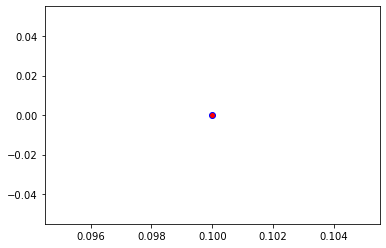

000000468124 407 = ambulance
000000468233 592 = hard disc
000000468245 799 = sliding door
000000468332 642 = marimba
000000468501 560 = football helmet
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


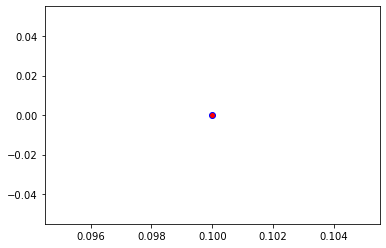

000000468505 532 = dining table
000000468577 520 = crib
000000468632 890 = volleyball
000000468925 927 = trifle
000000468954 543 = dumbbell
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


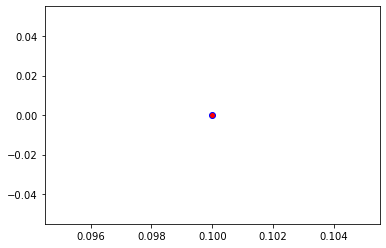

000000468965 684 = ocarina
000000469067 669 = mosquito net
000000469174 557 = flagpole
000000469192 717 = pickup
000000469246 705 = passenger car
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


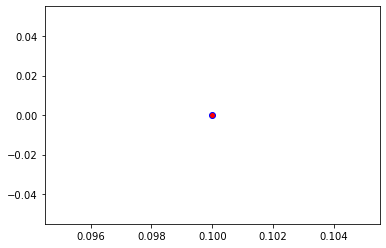

000000469652 905 = window shade
000000469828 602 = horizontal bar
000000470121 818 = spotlight
000000470173 863 = totem pole
000000470773 770 = running shoe
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


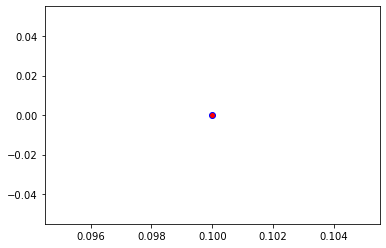

000000470779 248 = ski
000000470924 938 = cauliflower
000000470952 248 = ski
000000471023 475 = car mirror
000000471087 515 = cowboy hat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


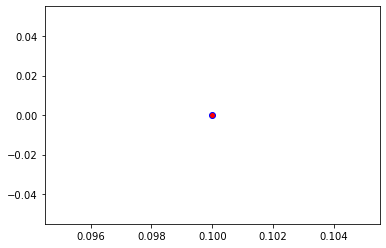

000000471450 5 = ram
000000471567 562 = fountain
000000471756 693 = paddle
000000471789 646 = maze
000000471869 850 = teddy
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


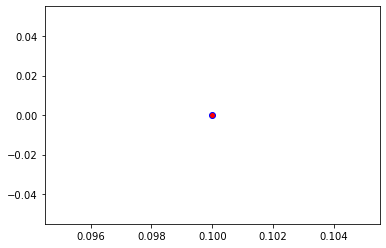

000000471893 918 = crossword puzzle
000000471991 884 = vault
000000472030 669 = mosquito net
000000472046 706 = patio
000000472298 472 = canoe
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


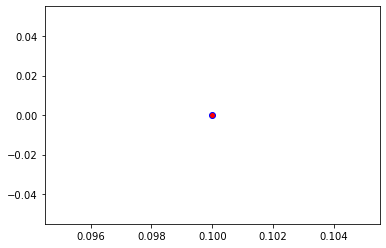

000000472375 250 = Siberian husky
000000472623 671 = mountain bike
000000472678 454 = bookshop
000000473015 978 = seashore
000000473118 421 = bannister
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


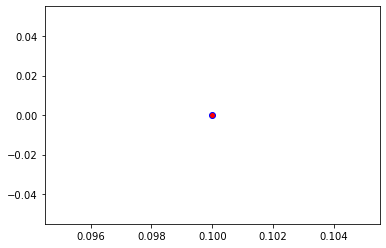

000000473121 248 = ski
000000473219 887 = vestment
000000473237 898 = water bottle
000000473406 443 = bib
000000473821 532 = dining table
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


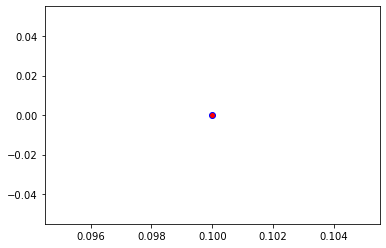

000000473869 572 = goblet
000000473974 340 = zebra
000000474021 650 = microphone
000000474028 805 = soccer ball
000000474039 806 = sock
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


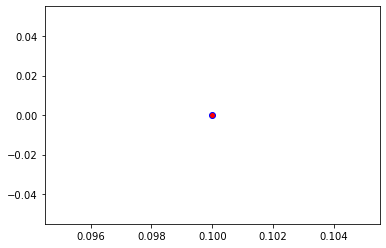

000000474078 981 = ballplayer
000000474095 870 = tricycle
000000474164 299 = meerkat
000000474167 965 = burrito
000000474170 386 = African elephant
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


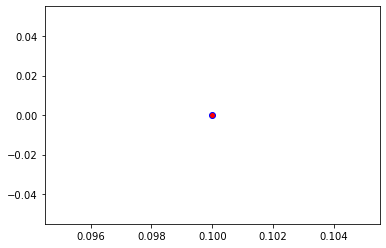

000000474293 454 = bookshop
000000474344 562 = fountain
000000474452 919 = street sign
000000474786 435 = bathtub
000000474854 793 = shower cap
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


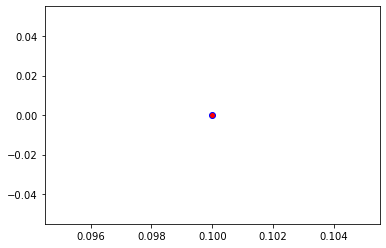

000000474881 349 = bighorn
000000475064 480 = cash machine
000000475150 368 = gibbon
000000475191 862 = torch
000000475223 131 = little blue heron
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


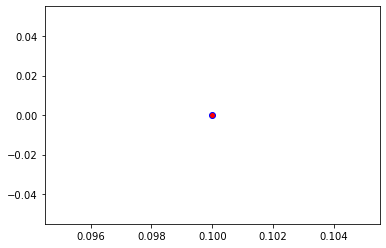

000000475365 569 = garbage truck
000000475387 547 = electric locomotive
000000475484 704 = parking meter
000000475572 721 = pillow
000000475678 670 = motor scooter
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


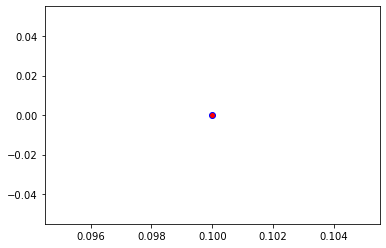

000000475732 463 = bucket
000000475779 386 = African elephant
000000475904 484 = catamaran
000000476119 560 = football helmet
000000476215 354 = Arabian camel
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


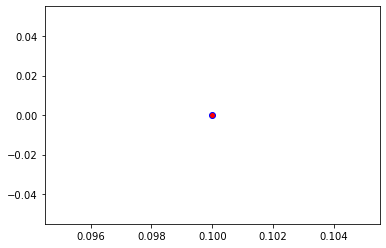

000000476258 444 = bicycle-built-for-two
000000476415 906 = Windsor tie
000000476491 704 = parking meter
000000476514 400 = gown
000000476704 829 = streetcar
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


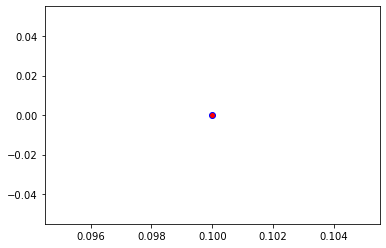

000000476770 981 = ballplayer
000000476787 898 = water bottle
000000476810 761 = remote control
000000477118 919 = street sign
000000477227 611 = jigsaw puzzle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


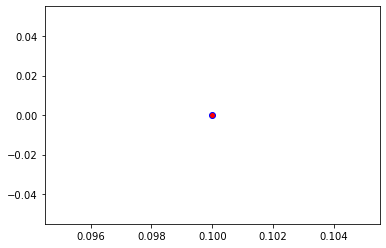

000000477288 898 = water bottle
000000477441 48 = Komodo dragon
000000477623 565 = freight car
000000477689 916 = web site
000000477805 324 = cabbage butterfly
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


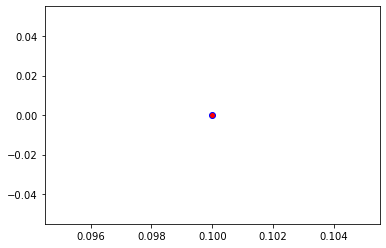

000000477955 801 = snorkel
000000478136 927 = trifle
000000478286 791 = shopping cart
000000478393 898 = water bottle
000000478420 399 = abaya
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


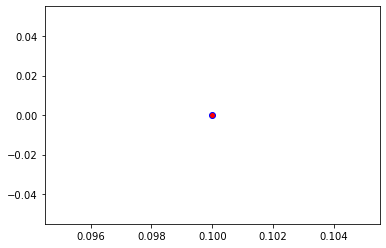

000000478474 569 = garbage truck
000000478721 412 = ashcan
000000478862 895 = warplane
000000479030 565 = freight car
000000479099 611 = jigsaw puzzle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


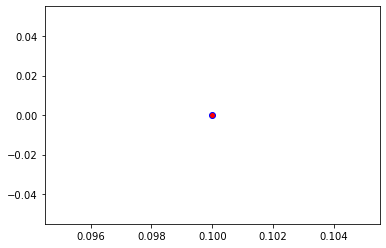

000000479126 898 = water bottle
000000479155 267 = standard poodle
000000479248 495 = china cabinet
000000479448 809 = soup bowl
000000479596 879 = umbrella
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


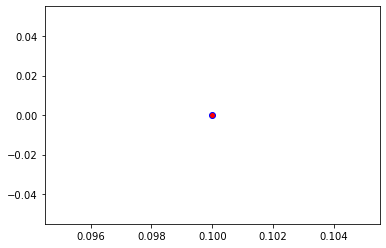

000000479732 123 = crayfish
000000479912 149 = gong
000000479953 621 = lawn mower
000000480021 671 = mountain bike
000000480122 532 = dining table
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


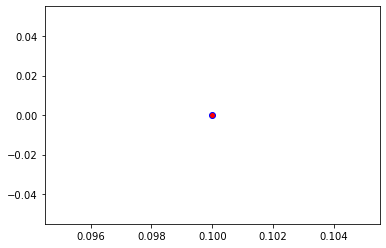

000000480212 626 = lighter
000000480275 412 = ashcan
000000480842 863 = totem pole
000000480936 861 = toilet seat
000000480944 920 = traffic light
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


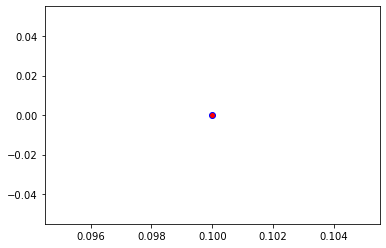

000000480985 324 = cab
000000481159 383 = Madagascar cat
000000481386 568 = fur coat
000000481390 430 = basketball
000000481404 884 = vault
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


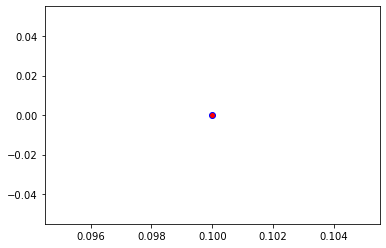

000000481413 978 = seashore
000000481480 978 = seashore
000000481567 671 = mountain bike
000000481573 421 = bannister
000000481582 799 = sliding door
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


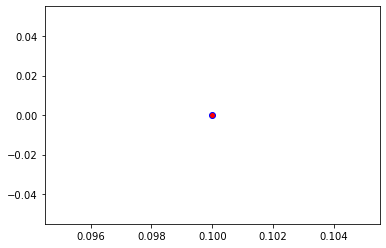

000000482100 896 = washbasin
000000482275 474 = cardigan
000000482319 691 = oxygen mask
000000482436 794 = shower curtain
000000482477 138 = bustard
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


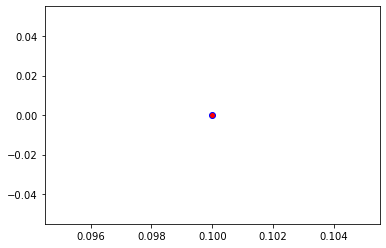

000000482487 905 = window shade
000000482585 829 = streetcar
000000482719 431 = bassinet
000000482735 500 = cliff
000000482800 842 = swimming trunks
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


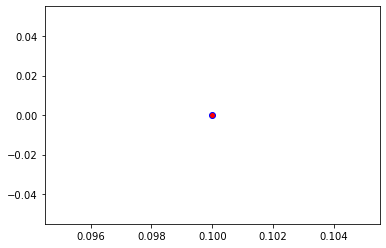

000000482917 253 = basenji
000000482970 620 = laptop
000000482978 705 = passenger car
000000483050 750 = quilt
000000483531 831 = studio couch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


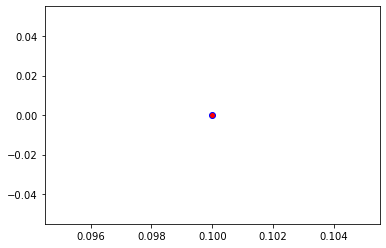

000000483667 572 = goblet
000000483999 297 = slot
000000484029 919 = street sign
000000484296 340 = zebra
000000484351 297 = slot
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


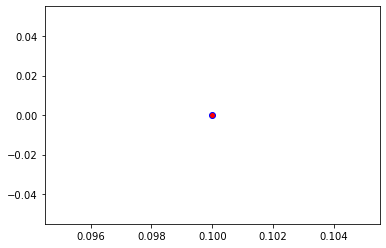

000000484404 705 = passenger car
000000484415 999 = toilet tissue
000000484760 442 = bell cote
000000484893 228 = komondor
000000484978 918 = crossword puzzle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


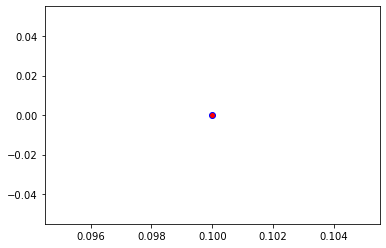

000000485027 752 = racket
000000485071 460 = breakwater
000000485130 478 = carton
000000485237 978 = seashore
000000485424 766 = rotisserie
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


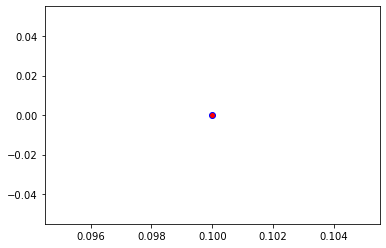

000000485480 842 = swimming trunks
000000485802 657 = missile
000000485844 583 = guillotine
000000485895 355 = llama
000000485972 746 = puck
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


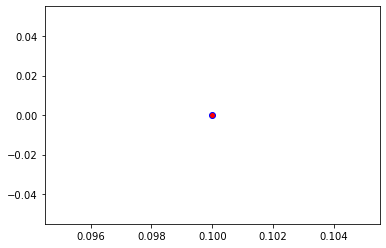

000000486040 623 = letter opener
000000486046 340 = zebra
000000486104 781 = scoreboard
000000486112 875 = trombone
000000486438 720 = pill bottle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


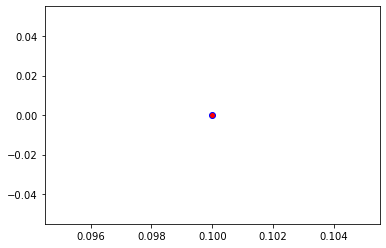

000000486479 212 = English setter
000000486573 880 = unicycle
000000487583 861 = toilet seat
000000488075 532 = dining table
000000488166 412 = ashcan
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


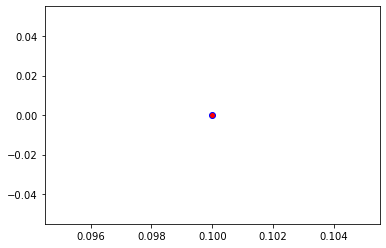

000000488251 394 = sturgeon
000000488270 978 = seashore
000000488385 670 = motor scooter
000000488592 530 = digital clock
000000488664 916 = web site
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


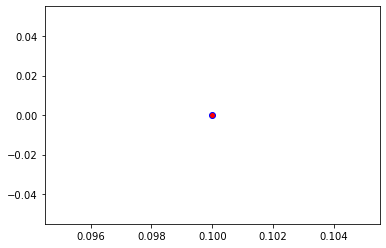

000000488673 762 = restaurant
000000488710 610 = jersey
000000488736 409 = analog clock
000000489014 484 = catamaran
000000489046 135 = limpkin
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


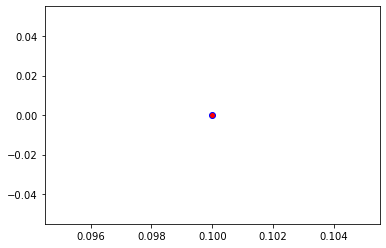

000000489091 435 = bathtub
000000489305 470 = candle
000000489339 248 = ski
000000489611 614 = kimono
000000489764 523 = crutch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


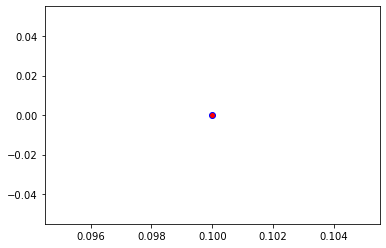

000000489842 444 = bicycle-built-for-two
000000489924 655 = miniskirt
000000490125 144 = pelican
000000490171 34 = leatherback turtle
000000490413 324 = cab
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


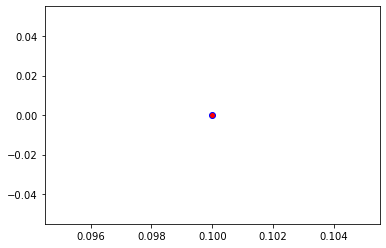

000000490470 484 = catamaran
000000490515 248 = ski
000000490936 612 = jinrikisha
000000491008 706 = patio
000000491071 894 = wardrobe
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


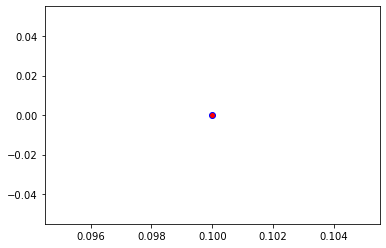

000000491090 670 = motor scooter
000000491130 248 = ski
000000491213 665 = moped
000000491216 904 = window screen
000000491366 765 = rocking chair
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


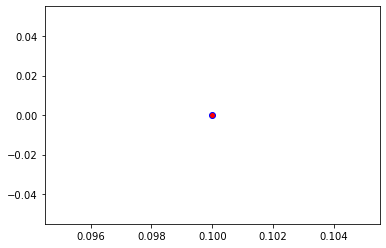

000000491464 981 = ballplayer
000000491470 803 = snowplow
000000491497 564 = four-poster
000000491613 340 = zebra
000000491683 801 = snorkel
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


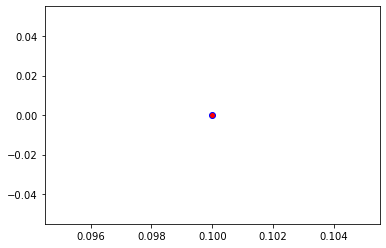

000000491725 536 = dock
000000491757 285 = Egyptian cat
000000491867 796 = ski mask
000000492077 955 = jackfruit
000000492110 650 = microphone
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


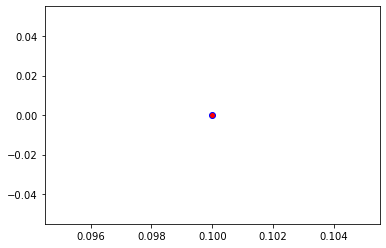

000000492282 690 = oxcart
000000492284 227 = kelpie
000000492362 297 = slot
000000492758 532 = dining table
000000492878 435 = tub
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


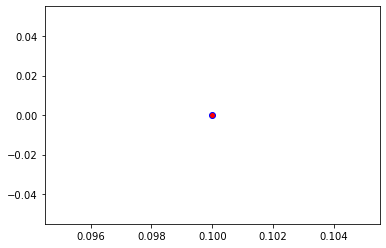

000000492905 745 = projector
000000492937 872 = tripod
000000492968 898 = water bottle
000000492992 37 = ox
000000493019 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


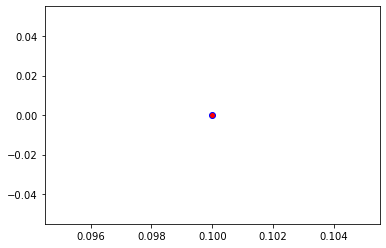

000000493284 386 = African elephant
000000493286 479 = car wheel
000000493334 692 = packet
000000493442 248 = ski
000000493566 565 = freight car
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


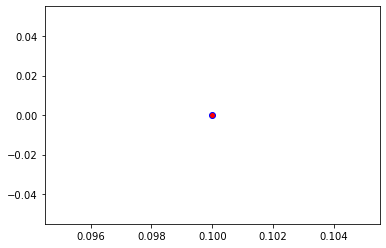

000000493613 21 = kite
000000493772 818 = spotlight
000000493799 329 = cucumber
000000493864 801 = snorkel
000000493905 752 = racket
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


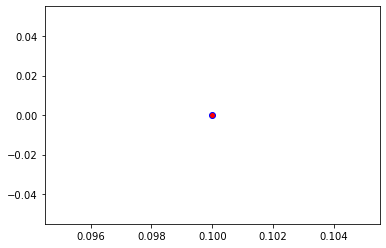

000000494188 85 = quail
000000494427 681 = notebook
000000494634 556 = screen
000000494759 248 = ski
000000494863 547 = electric locomotive
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


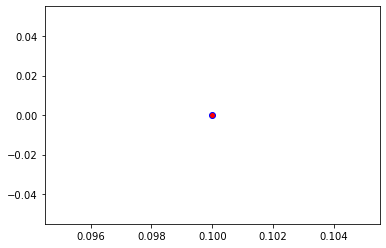

000000494869 799 = sliding door
000000494913 762 = restaurant
000000495054 404 = airliner
000000495146 734 = police van
000000495448 849 = teapot
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


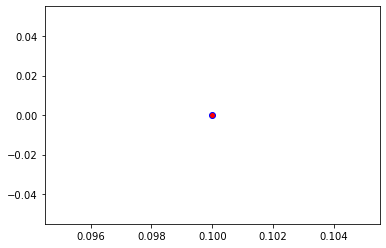

000000495732 267 = standard poodle
000000496409 248 = ski
000000496571 532 = dining table
000000496597 978 = seashore
000000496722 637 = mailbox
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


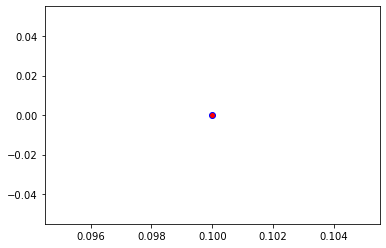

000000496854 879 = umbrella
000000496954 714 = pick
000000497344 401 = accordion
000000497568 404 = airliner
000000497599 785 = seat belt
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


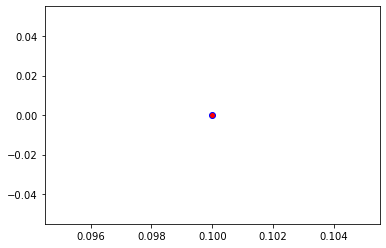

000000497628 564 = four-poster
000000497867 654 = minibus
000000498032 650 = microphone
000000498286 182 = Border terrier
000000498463 760 = refrigerator
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


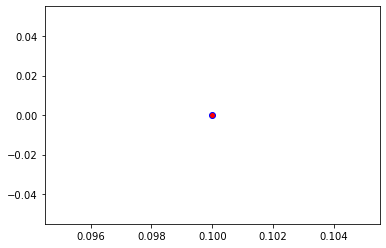

000000498709 670 = motor scooter
000000498747 745 = projector
000000498807 693 = paddle
000000498857 355 = llama
000000498919 393 = anemone fish
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


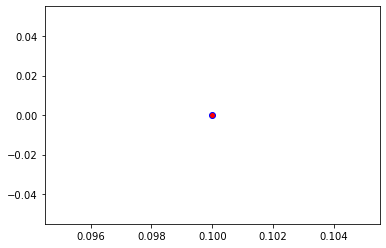

000000499031 560 = football helmet
000000499109 327 = starfish
000000499181 324 = cab
000000499266 664 = monitor
000000499313 963 = pizza
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


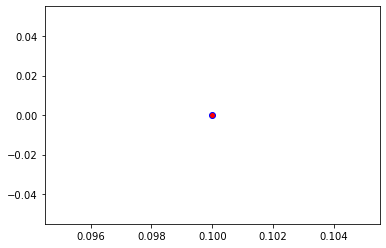

000000499622 518 = crash helmet
000000499768 706 = patio
000000499775 654 = minibus
000000500049 404 = airliner
000000500211 608 = jean
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


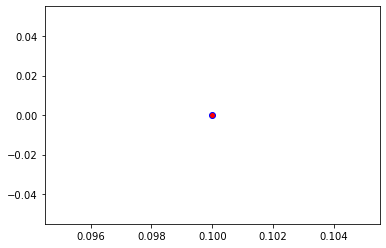

000000500257 297 = slot
000000500270 576 = gondola
000000500423 466 = bullet train
000000500464 804 = soap dispenser
000000500477 178 = Weimaraner
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


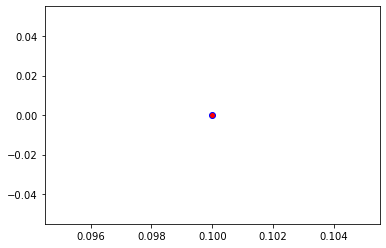

000000500478 981 = ballplayer
000000500565 66 = corn
000000500613 734 = police van
000000500663 975 = lakeside
000000500716 816 = spindle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


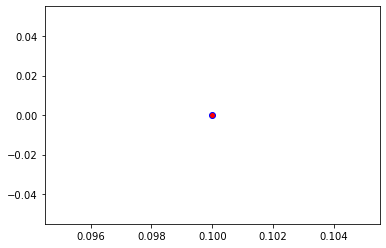

000000500826 546 = electric guitar
000000501005 701 = parachute
000000501023 919 = street sign
000000501243 340 = zebra
000000501368 589 = hand blower
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


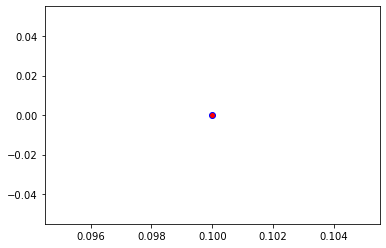

000000501523 223 = schipperke
000000502136 458 = brass
000000502168 460 = breakwater
000000502229 664 = monitor
000000502336 918 = crossword puzzle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


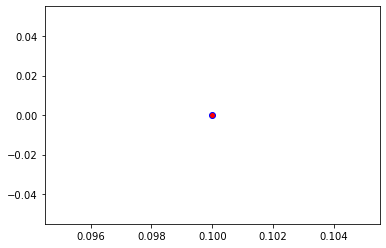

000000502347 405 = airship
000000502599 740 = power drill
000000502732 905 = window shade
000000502737 641 = maraca
000000502910 412 = ashcan
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


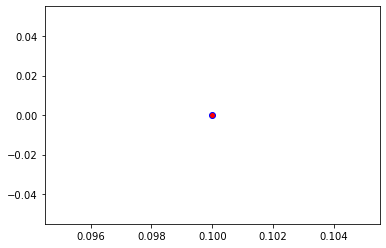

000000503755 752 = racket
000000503823 864 = wreck
000000503841 918 = crossword puzzle
000000503855 879 = umbrella
000000504000 889 = violin
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


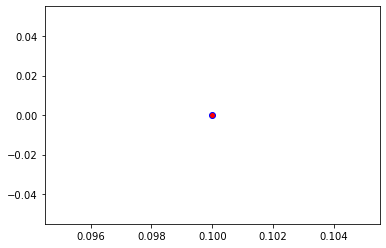

000000504074 842 = swimming trunks
000000504389 843 = swing
000000504415 879 = umbrella
000000504439 340 = zebra
000000504580 562 = fountain
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


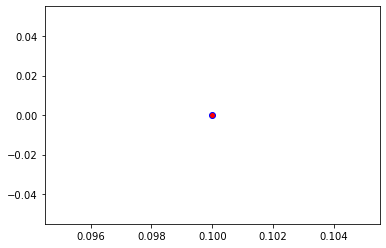

000000504589 472 = canoe
000000504635 340 = zebra
000000504711 960 = chocolate sauce
000000505169 794 = shower curtain
000000505451 258 = Samoyed
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


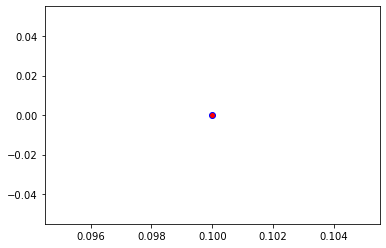

000000505565 129 = spoonbill
000000505573 227 = kelpie
000000505638 829 = streetcar
000000505789 442 = bell cote
000000505942 523 = crutch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


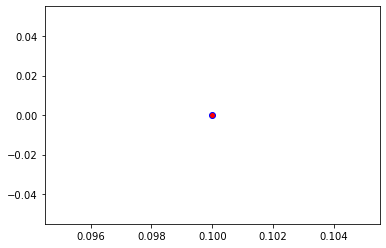

000000506004 536 = dock
000000506178 851 = television
000000506279 604 = hourglass
000000506310 707 = pay-phone
000000506454 703 = park bench
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


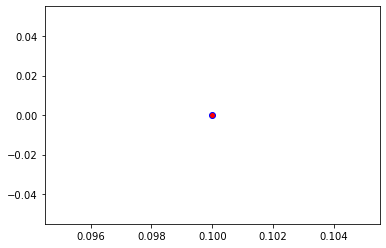

000000506656 603 = horse cart
000000506707 842 = swimming trunks
000000506933 886 = vending machine
000000507015 842 = swimming trunks
000000507037 880 = unicycle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


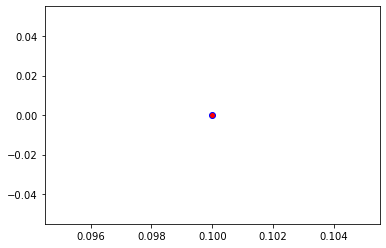

000000507042 716 = picket fence
000000507081 421 = bannister
000000507223 981 = ballplayer
000000507235 924 = guacamole
000000507473 570 = gasmask
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


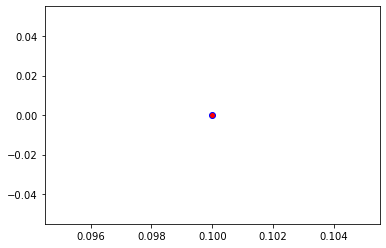

000000507575 526 = desk
000000507667 476 = carousel
000000507797 829 = streetcar
000000507893 794 = shower curtain
000000507975 339 = sorrel
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


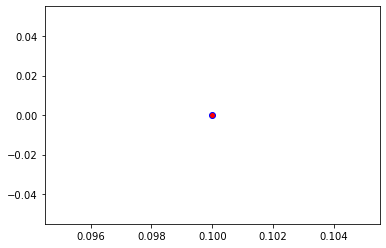

000000508101 801 = snorkel
000000508312 896 = washbasin
000000508370 444 = bicycle-built-for-two
000000508482 651 = microwave
000000508586 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


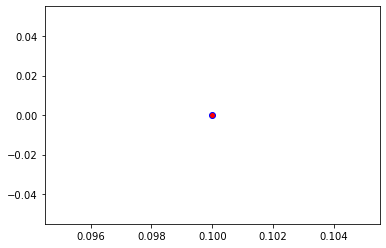

000000508602 89 = sulphur-crested cockatoo
000000508639 690 = oxcart
000000508730 793 = shower cap
000000508917 466 = bullet train
000000509008 779 = school bus
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


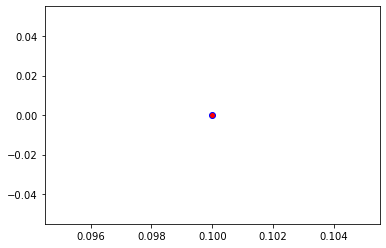

000000509014 879 = umbrella
000000509131 398 = abacus
000000509258 324 = cab
000000509260 851 = television
000000509403 246 = Great Dane
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


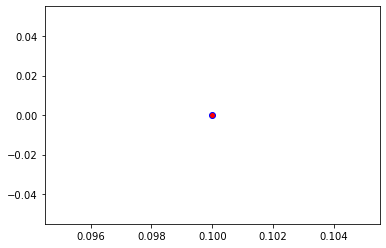

000000509451 560 = football helmet
000000509656 340 = zebra
000000509699 916 = web site
000000509719 308 = fly
000000509735 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


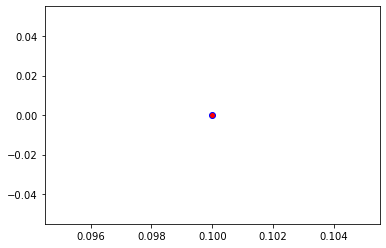

000000509824 831 = studio couch
000000510095 982 = groom
000000510329 982 = groom
000000511076 646 = maze
000000511321 510 = container ship
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


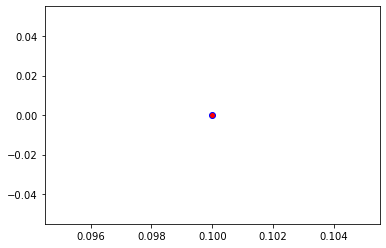

000000511384 662 = modem
000000511398 164 = bluetick
000000511453 692 = packet
000000511599 977 = sandbar
000000511647 112 = conch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


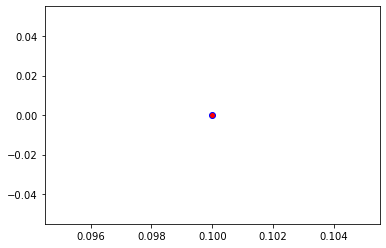

000000511760 801 = snorkel
000000511999 705 = passenger car
000000512194 725 = pitcher
000000512248 409 = analog clock
000000512330 760 = refrigerator
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


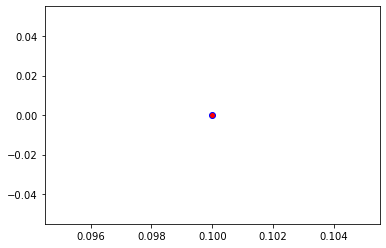

000000512403 883 = vase
000000512476 745 = projector
000000512564 324 = cab
000000512648 135 = limpkin
000000512657 4 = hammer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


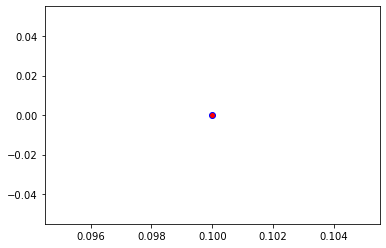

000000512776 487 = cellular telephone
000000512836 879 = umbrella
000000512929 851 = television
000000512985 792 = shovel
000000513041 461 = plate
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


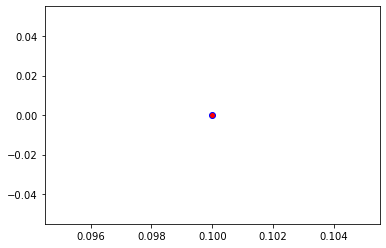

000000513181 975 = lakeside
000000513283 723 = pinwheel
000000513484 295 = American black bear
000000513524 842 = swimming trunks
000000513567 731 = plunger
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


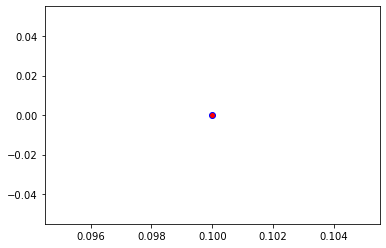

000000513580 318 = wing
000000513688 619 = lampshade
000000514376 829 = streetcar
000000514508 297 = slot
000000514540 727 = planetarium
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


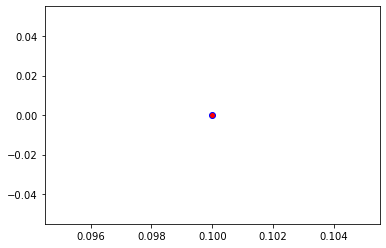

000000514586 641 = maraca
000000514797 907 = wine bottle
000000514914 896 = washbasin
000000514979 101 = tusker
000000515025 230 = Shetland sheepdog
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


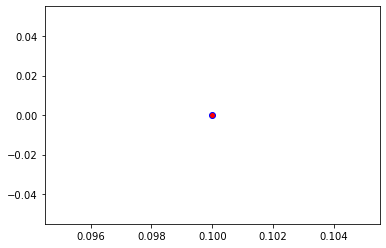

000000515077 480 = cash machine
000000515266 864 = tow truck
000000515350 428 = barrow
000000515445 978 = seashore
000000515577 537 = dogsled
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


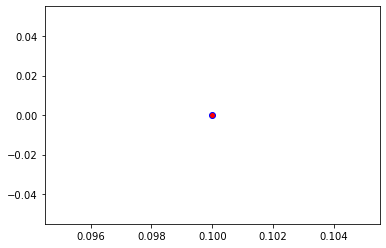

000000515579 747 = punching bag
000000515828 752 = racket
000000515982 981 = ballplayer
000000516038 981 = ballplayer
000000516143 829 = streetcar
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


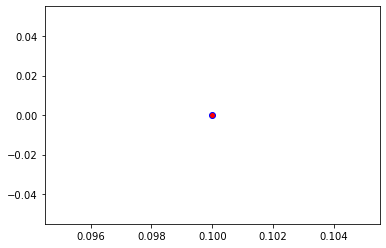

000000516173 842 = swimming trunks
000000516316 340 = zebra
000000516318 693 = paddle
000000516601 248 = ski
000000516677 140 = alp
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


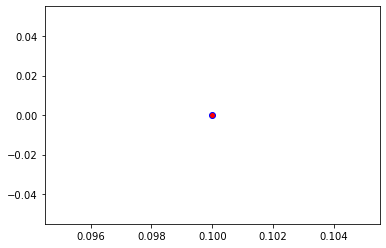

000000516708 919 = street sign
000000516804 919 = street sign
000000516871 414 = backpack
000000516916 526 = desk
000000517056 818 = spotlight
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


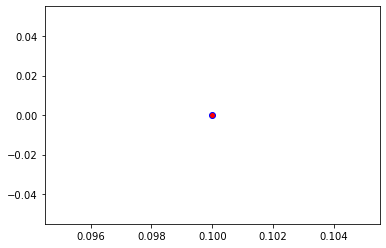

000000517069 612 = jinrikisha
000000517523 895 = warplane
000000517687 761 = remote control
000000517832 254 = pug
000000518213 37 = ox
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


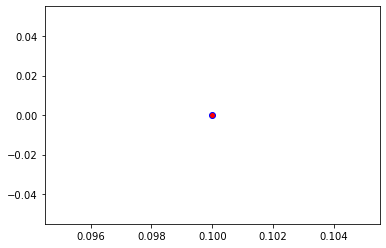

000000518326 520 = crib
000000518770 593 = harp
000000519039 716 = picket fence
000000519208 794 = shower curtain
000000519338 565 = freight car
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


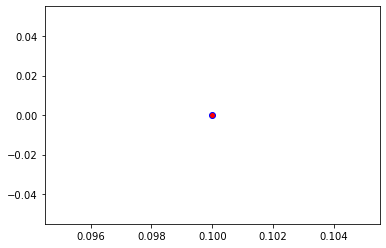

000000519491 442 = bell cote
000000519522 442 = bell cote
000000519569 532 = dining table
000000519611 296 = ice bear
000000519688 151 = Chihuahua
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


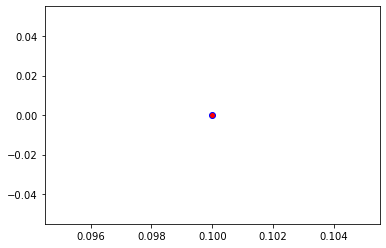

000000519764 532 = dining table
000000520009 829 = streetcar
000000520077 662 = modem
000000520264 651 = microwave
000000520301 237 = miniature pinscher
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


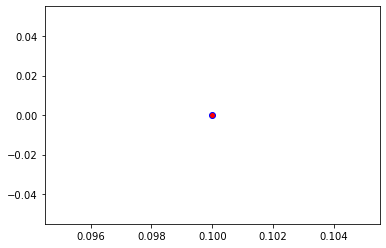

000000520324 977 = sandbar
000000520531 281 = tabby
000000520659 297 = slot
000000520707 851 = television
000000520832 880 = unicycle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


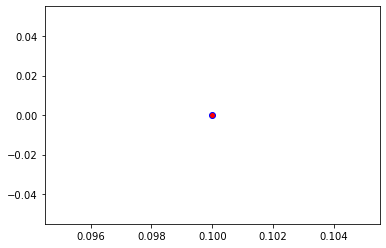

000000520871 712 = Petri dish
000000520910 916 = web site
000000521052 675 = moving van
000000521141 704 = parking meter
000000521231 296 = ice bear
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


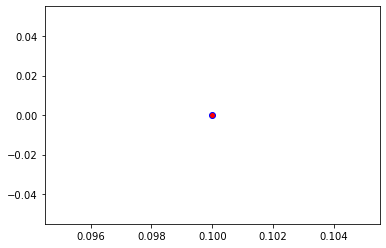

000000521259 523 = crutch
000000521282 725 = pitcher
000000521405 816 = spindle
000000521509 532 = dining table
000000521540 785 = seat belt
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


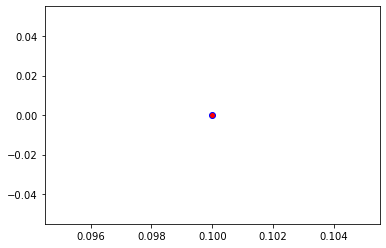

000000521601 659 = mixing bowl
000000521717 644 = matchstick
000000521719 723 = pinwheel
000000521819 842 = swimming trunks
000000521956 862 = torch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


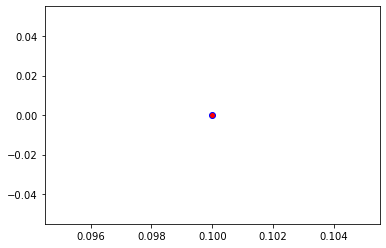

000000522007 532 = dining table
000000522156 728 = plastic bag
000000522393 914 = yawl
000000522638 850 = teddy
000000522713 791 = shopping cart
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


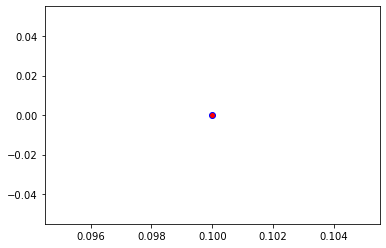

000000522751 920 = traffic light
000000522889 421 = bannister
000000522940 919 = street sign
000000523033 978 = seashore
000000523100 567 = frying pan
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


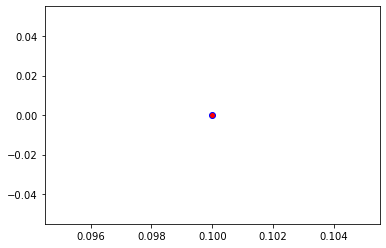

000000523175 816 = spindle
000000523194 879 = umbrella
000000523229 804 = soap dispenser
000000523241 571 = gas pump
000000523782 717 = pickup
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


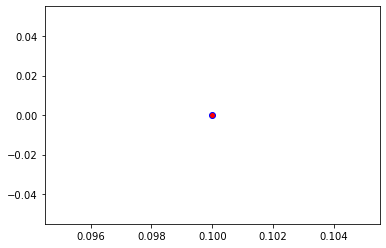

000000523807 898 = water bottle
000000523811 904 = window screen
000000523957 500 = cliff
000000524108 690 = oxcart
000000524280 283 = Persian cat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


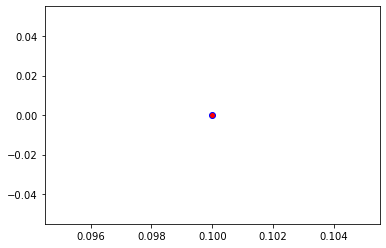

000000524456 456 = bow
000000524742 709 = pencil box
000000524850 541 = drum
000000525083 624 = library
000000525155 181 = Bedlington terrier
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


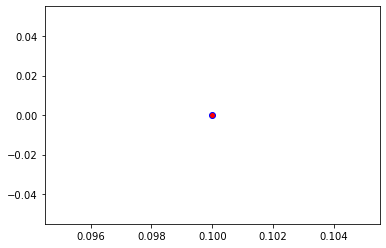

000000525247 556 = screen
000000525286 892 = wall clock
000000525322 318 = wing
000000525600 669 = mosquito net
000000526103 386 = African elephant
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


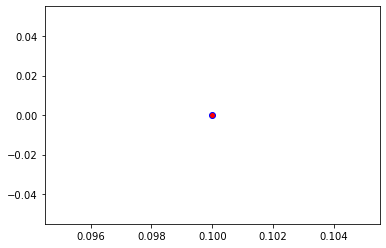

000000526197 415 = bakery
000000526256 442 = bell cote
000000526392 324 = cab
000000526706 355 = llama
000000526728 887 = vestment
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


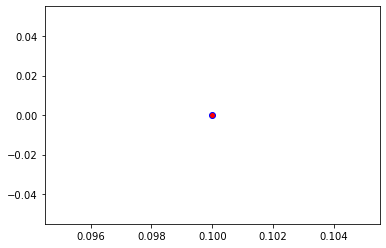

000000526751 484 = catamaran
000000527029 4 = hammer
000000527215 862 = torch
000000527220 480 = cash machine
000000527427 786 = sewing machine
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


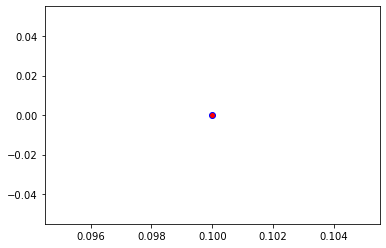

000000527528 144 = pelican
000000527616 813 = spatula
000000527695 451 = bolo tie
000000527750 882 = vacuum
000000527784 861 = toilet seat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


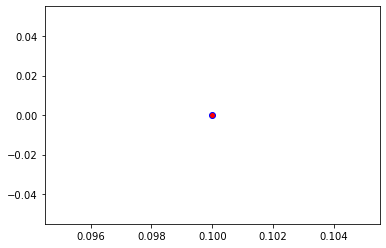

000000527960 703 = park bench
000000528314 248 = ski
000000528399 899 = water jug
000000528524 5 = ram
000000528578 576 = gondola
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


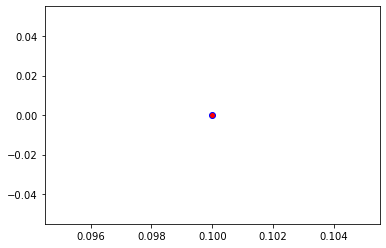

000000528705 850 = teddy
000000528862 296 = ice bear
000000528977 781 = scoreboard
000000528980 879 = umbrella
000000529105 340 = zebra
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


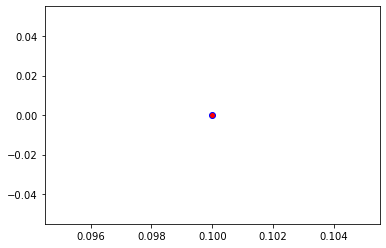

000000529122 523 = crutch
000000529148 297 = slot
000000529528 581 = grille
000000529568 831 = studio couch
000000529762 254 = pug
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


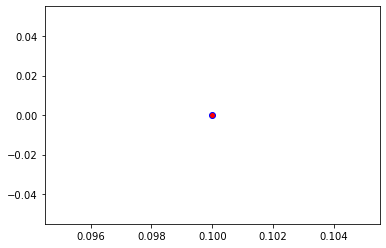

000000529939 149 = gong
000000529966 398 = abacus
000000530052 840 = swab
000000530061 659 = mixing bowl
000000530099 324 = cabbage butterfly
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


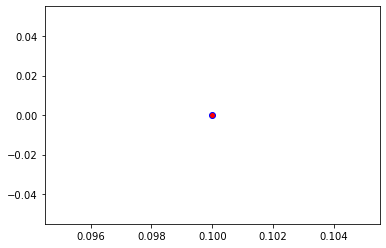

000000530146 965 = burrito
000000530162 619 = lampshade
000000530457 883 = vase
000000530466 829 = streetcar
000000530470 475 = car mirror
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


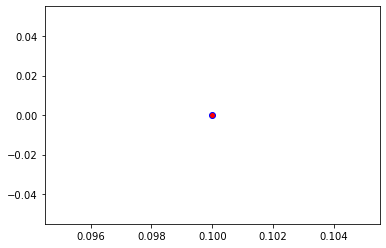

000000530624 223 = schipperke
000000530820 862 = torch
000000530836 788 = shoe shop
000000530854 879 = umbrella
000000530975 552 = feather boa
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


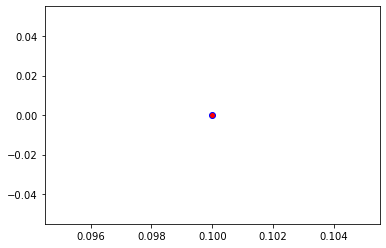

000000531036 569 = garbage truck
000000531134 829 = streetcar
000000531135 264 = Cardigan
000000531495 536 = dock
000000531707 703 = park bench
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


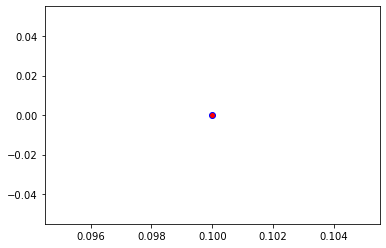

000000531771 485 = CD player
000000532058 431 = bassinet
000000532071 357 = mink
000000532129 463 = bucket
000000532481 701 = parachute
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


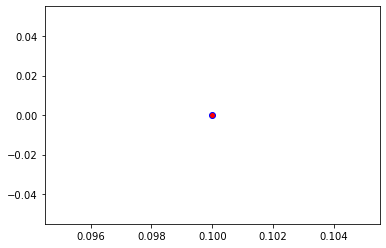

000000532493 801 = snorkel
000000532530 707 = pay-phone
000000532575 223 = schipperke
000000532690 903 = wig
000000532761 831 = studio couch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


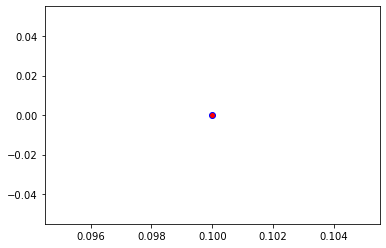

000000532855 872 = tripod
000000532901 831 = studio couch
000000533145 600 = hook
000000533206 898 = water bottle
000000533493 644 = matchstick
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


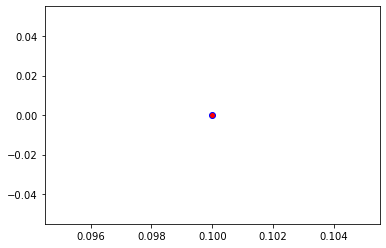

000000533536 534 = washer
000000533816 819 = stage
000000533855 616 = knot
000000533958 461 = plate
000000534041 443 = bib
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


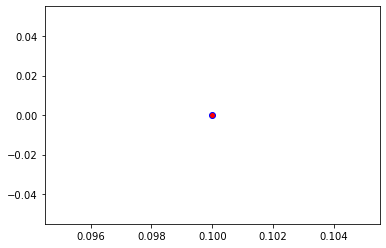

000000534270 830 = stretcher
000000534394 575 = golfcart
000000534601 850 = teddy
000000534605 843 = swing
000000534639 829 = streetcar
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


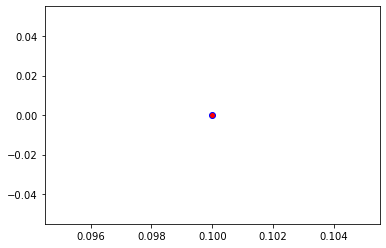

000000534664 757 = recreational vehicle
000000534673 654 = minibus
000000534827 671 = mountain bike
000000535094 37 = ox
000000535156 386 = African elephant
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


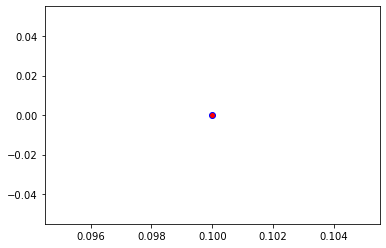

000000535253 916 = web site
000000535306 421 = bannister
000000535523 842 = swimming trunks
000000535578 203 = West Highland white terrier
000000535608 978 = seashore
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


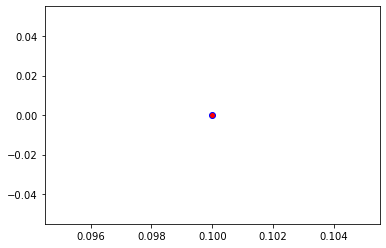

000000535858 978 = seashore
000000536038 806 = sock
000000536073 804 = soap dispenser
000000536343 534 = washer
000000536947 877 = turnstile
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


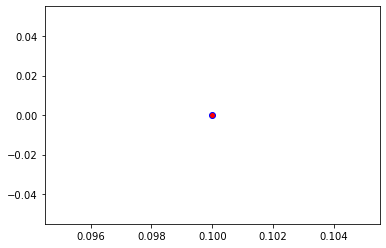

000000537053 251 = dalmatian
000000537153 978 = seashore
000000537241 725 = pitcher
000000537270 617 = lab coat
000000537355 706 = patio
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


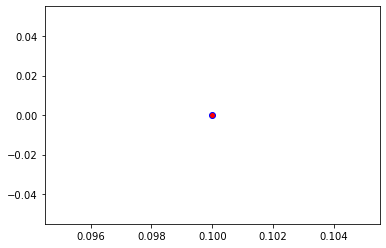

000000537506 476 = carousel
000000537672 571 = gas pump
000000537802 850 = teddy
000000537812 861 = toilet seat
000000537827 522 = croquet ball
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


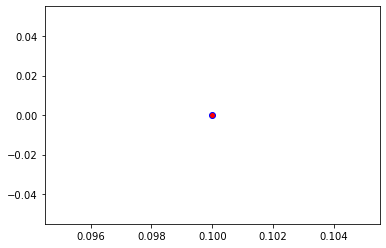

000000537964 494 = chime
000000537991 474 = cardigan
000000538067 864 = wreck
000000538236 582 = grocery store
000000538364 665 = moped
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


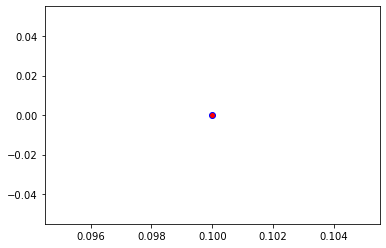

000000538458 792 = shovel
000000539143 547 = electric locomotive
000000539445 705 = passenger car
000000539883 620 = laptop
000000539962 843 = swing
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


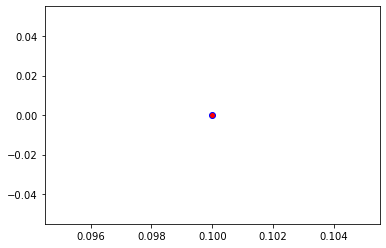

000000540280 619 = lampshade
000000540414 582 = grocery store
000000540466 879 = umbrella
000000540502 435 = tub
000000540928 818 = spotlight
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


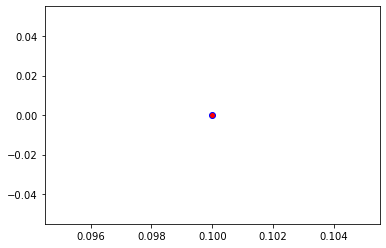

000000540932 978 = seashore
000000540962 556 = screen
000000541055 801 = snorkel
000000541123 646 = maze
000000541291 435 = tub
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


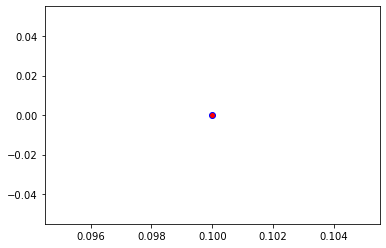

000000541634 809 = soup bowl
000000541664 508 = computer keyboard
000000541773 523 = crutch
000000541952 827 = stove
000000542073 799 = sliding door
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


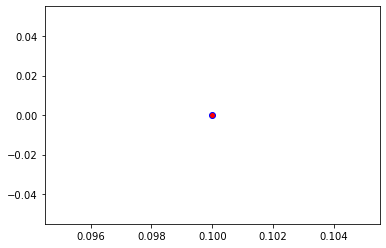

000000542089 896 = washbasin
000000542127 549 = envelope
000000542423 703 = park bench
000000542625 324 = cab
000000542776 716 = picket fence
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


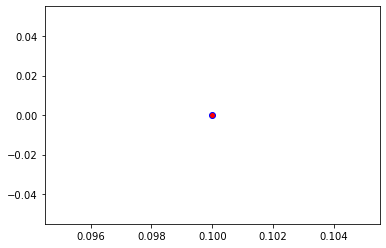

000000542856 874 = trolleybus
000000543043 324 = cab
000000543047 736 = pool table
000000543300 484 = catamaran
000000543528 812 = space shuttle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


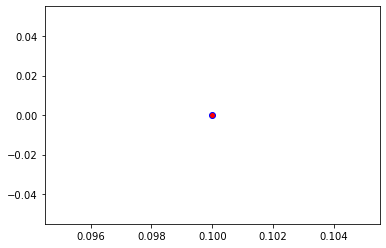

000000543581 831 = studio couch
000000544052 836 = sunglass
000000544306 442 = bell cote
000000544444 248 = ski
000000544519 971 = bubble
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


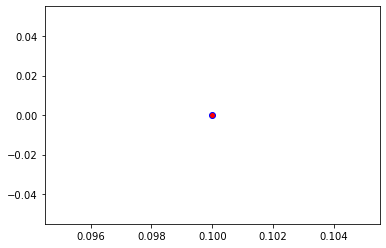

000000544565 813 = spatula
000000544605 920 = traffic light
000000544811 172 = whippet
000000545007 409 = analog clock
000000545100 639 = suit
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


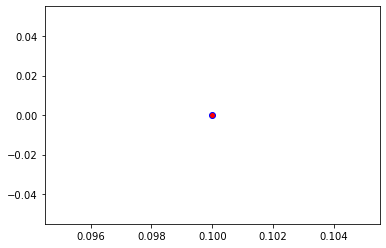

000000545129 340 = zebra
000000545219 555 = fire engine
000000545407 404 = airliner
000000545594 423 = barber chair
000000545730 99 = goose
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


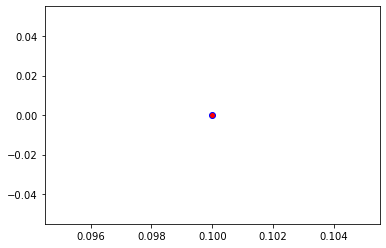

000000545826 282 = tiger cat
000000545958 250 = Siberian husky
000000546011 340 = zebra
000000546219 822 = steel drum
000000546325 831 = studio couch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


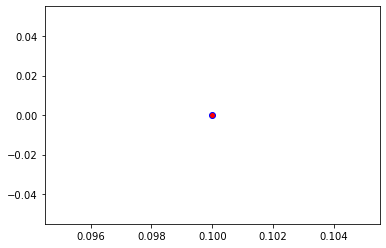

000000546475 633 = loupe
000000546556 99 = goose
000000546626 438 = beaker
000000546659 788 = shoe shop
000000546717 918 = crossword puzzle
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


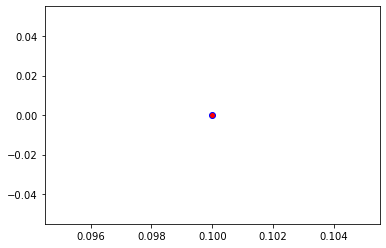

000000546823 880 = unicycle
000000546826 626 = lighter
000000546829 202 = soft-coated wheaten terrier
000000546964 706 = patio
000000546976 524 = cuirass
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


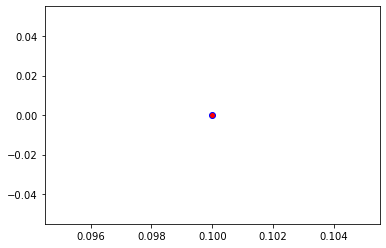

000000547144 838 = sunscreen
000000547336 602 = horizontal bar
000000547383 5 = ram
000000547502 171 = Italian greyhound
000000547519 294 = brown bear
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


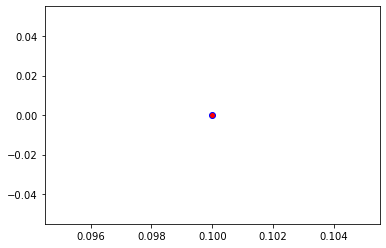

000000547816 794 = shower curtain
000000547854 641 = maraca
000000547886 354 = Arabian camel
000000548246 421 = bannister
000000548267 864 = wreck
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


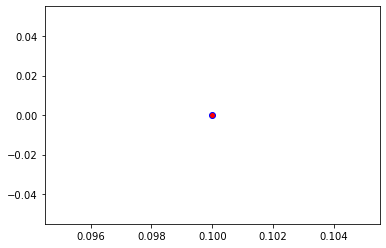

000000548339 981 = ballplayer
000000548506 954 = banana
000000548524 540 = drilling platform
000000548555 721 = pillow
000000548780 562 = fountain
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


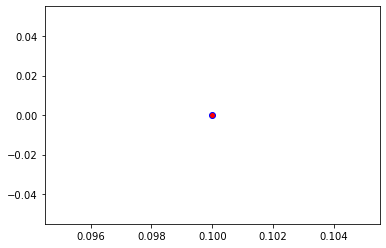

000000549055 562 = fountain
000000549136 358 = pole
000000549167 461 = plate
000000549220 254 = pug
000000549390 444 = bicycle-built-for-two
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


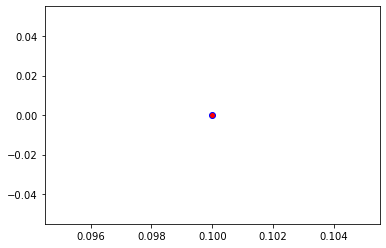

000000549674 527 = desktop computer
000000549738 978 = seashore
000000549930 879 = umbrella
000000550084 874 = trolleybus
000000550322 828 = strainer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


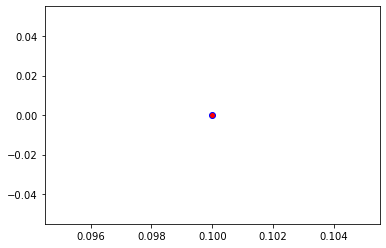

000000550349 874 = trolleybus
000000550426 883 = vase
000000550471 461 = plate
000000550691 705 = passenger car
000000550714 954 = banana
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


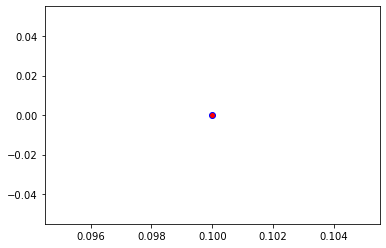

000000550797 896 = washbasin
000000550939 549 = envelope
000000551215 560 = football helmet
000000551304 619 = lampshade
000000551350 646 = maze
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


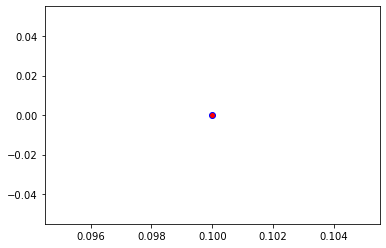

000000551439 903 = wig
000000551660 836 = sunglass
000000551780 409 = analog clock
000000551794 562 = fountain
000000551804 358 = pole
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


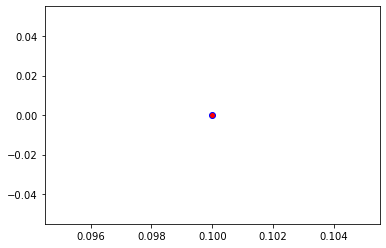

000000551815 431 = bassinet
000000551820 617 = lab coat
000000551822 334 = cup
000000552371 178 = Weimaraner
000000552612 54 = hog
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


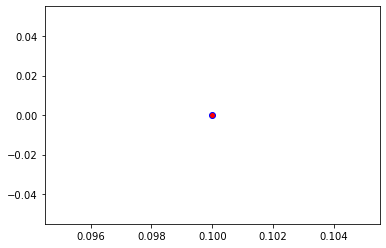

000000552775 859 = toaster
000000552842 981 = ballplayer
000000552883 534 = washer
000000552902 340 = zebra
000000553094 744 = projectile
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


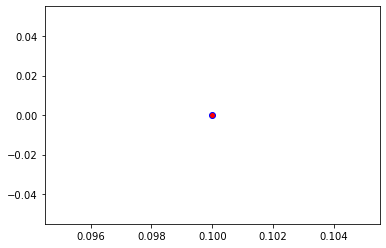

000000553221 978 = seashore
000000553339 880 = unicycle
000000553511 324 = cab
000000553664 526 = desk
000000553669 877 = turnstile
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


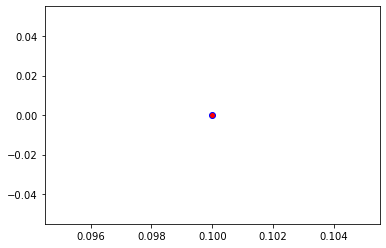

000000553731 399 = abaya
000000553776 830 = stretcher
000000553788 681 = notebook
000000553990 178 = Weimaraner
000000554002 233 = Bouvier des Flandres
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


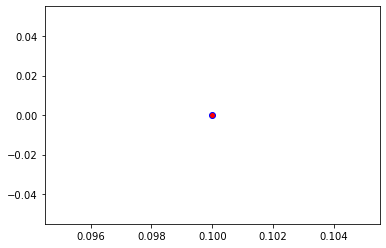

000000554156 752 = racket
000000554266 608 = jean
000000554291 606 = iron
000000554328 981 = ballplayer
000000554579 254 = pug
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


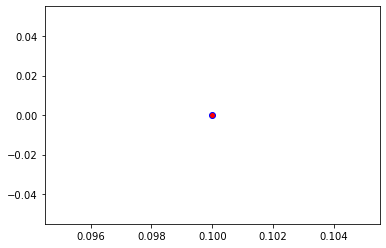

000000554595 693 = paddle
000000554735 793 = shower cap
000000554838 480 = cash machine
000000555005 875 = trombone
000000555009 556 = screen
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


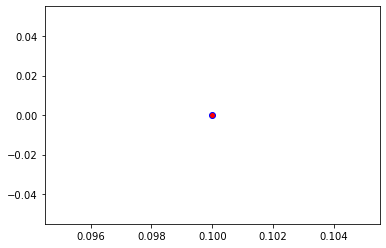

000000555012 794 = shower curtain
000000555050 829 = streetcar
000000555412 924 = guacamole
000000555597 829 = streetcar
000000555705 287 = lynx
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


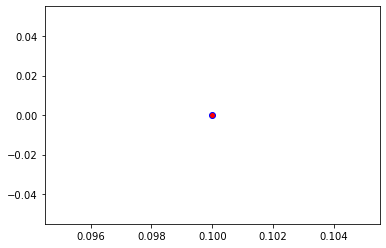

000000555972 883 = vase
000000556000 642 = marimba
000000556158 792 = shovel
000000556193 480 = cash machine
000000556498 458 = brass
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


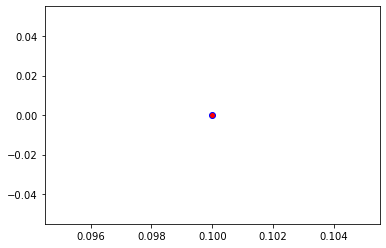

000000556765 385 = Indian elephant
000000556873 808 = sombrero
000000557172 896 = washbasin
000000557258 861 = toilet seat
000000557501 877 = turnstile
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


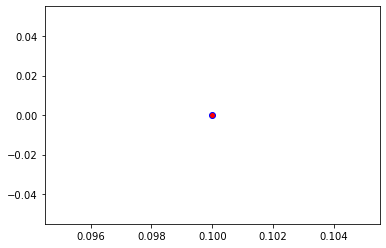

000000557672 716 = picket fence
000000557884 883 = vase
000000557916 669 = mosquito net
000000558073 435 = bathtub
000000558114 819 = stage
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


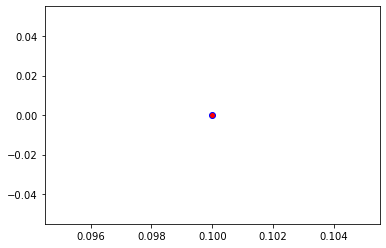

000000558213 829 = streetcar
000000558421 803 = snowplow
000000558558 682 = obelisk
000000558854 504 = coffee mug
000000559099 842 = swimming trunks
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


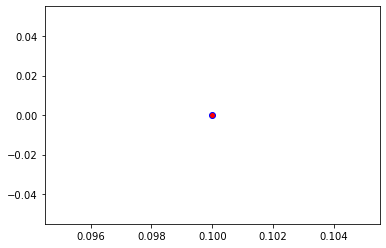

000000559160 615 = knee pad
000000559348 646 = maze
000000559513 840 = swab
000000559543 495 = china cabinet
000000559547 981 = ballplayer
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


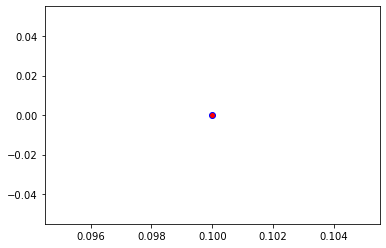

000000559707 965 = burrito
000000559842 433 = bathing cap
000000559956 174 = Norwegian elkhound
000000560011 761 = remote control
000000560178 850 = teddy
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


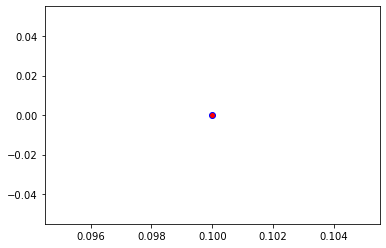

000000560256 329 = cucumber
000000560266 175 = otter
000000560279 861 = toilet seat
000000560312 624 = library
000000560371 919 = street sign
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


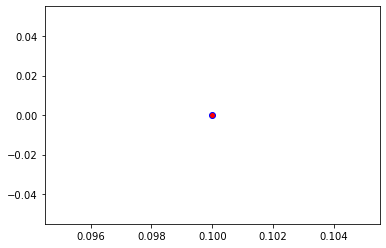

000000560474 656 = minivan
000000560880 471 = cannon
000000560911 785 = seat belt
000000561009 22 = bald eagle
000000561223 500 = cliff
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


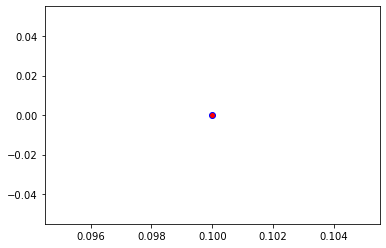

000000561256 639 = suit
000000561335 801 = snorkel
000000561366 810 = space bar
000000561465 965 = burrito
000000561679 919 = street sign
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


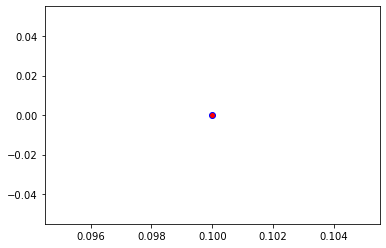

000000561889 451 = bolo tie
000000561958 880 = unicycle
000000562059 910 = wooden spoon
000000562121 340 = zebra
000000562197 947 = mushroom
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


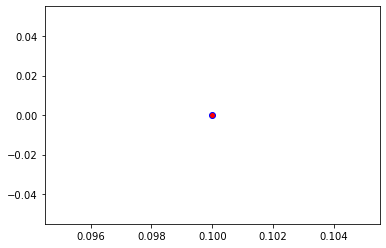

000000562207 523 = crutch
000000562229 843 = swing
000000562243 906 = Windsor tie
000000562443 340 = zebra
000000562448 324 = cab
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


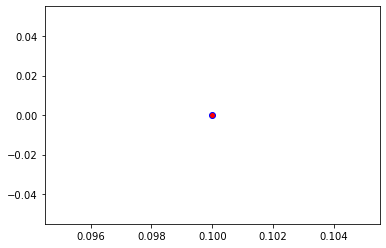

000000562561 250 = Siberian husky
000000562581 722 = ping-pong ball
000000562818 248 = ski
000000562843 504 = coffee mug
000000563267 745 = projector
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


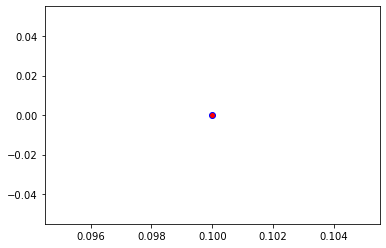

000000563281 763 = revolver
000000563349 701 = parachute
000000563470 242 = boxer
000000563603 296 = ice bear
000000563604 781 = scoreboard
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


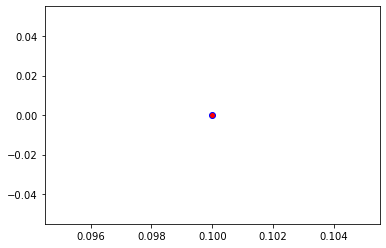

000000563648 560 = football helmet
000000563653 919 = street sign
000000563702 829 = streetcar
000000563758 189 = Lakeland terrier
000000563882 683 = oboe
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


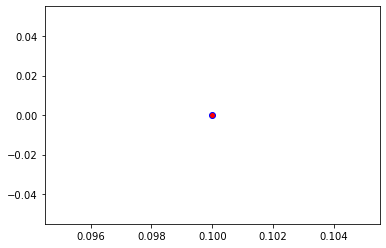

000000564023 877 = turnstile
000000564091 611 = jigsaw puzzle
000000564127 861 = toilet seat
000000564133 347 = bison
000000564280 171 = Italian greyhound
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


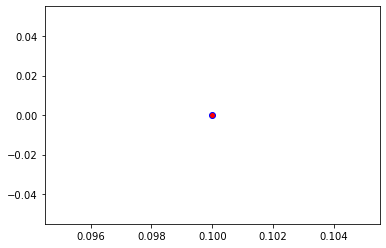

000000564336 579 = grand piano
000000565012 920 = traffic light
000000565045 894 = wardrobe
000000565153 879 = umbrella
000000565391 609 = jeep
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


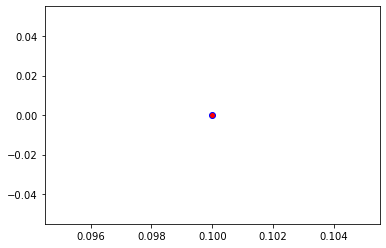

000000565469 448 = birdhouse
000000565563 791 = shopping cart
000000565597 963 = pizza
000000565607 562 = fountain
000000565624 386 = African elephant
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


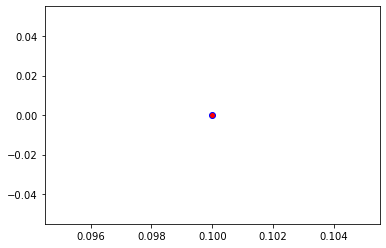

000000565776 831 = studio couch
000000565778 705 = passenger car
000000565853 760 = refrigerator
000000565877 620 = laptop
000000565962 626 = lighter
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


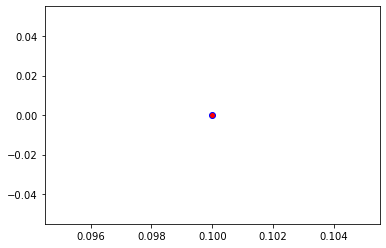

000000565989 498 = cinema
000000566042 251 = dalmatian
000000566282 523 = crutch
000000566436 562 = fountain
000000566524 705 = passenger car
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


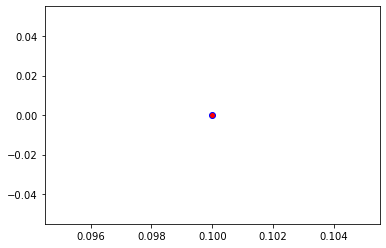

000000566758 867 = trailer truck
000000566923 523 = crutch
000000567011 978 = seashore
000000567197 555 = fire engine
000000567432 318 = wing
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


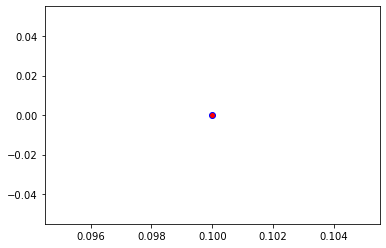

000000567640 805 = soccer ball
000000567740 792 = shovel
000000567825 928 = ice cream
000000567886 630 = Loafer
000000567898 712 = Petri dish
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


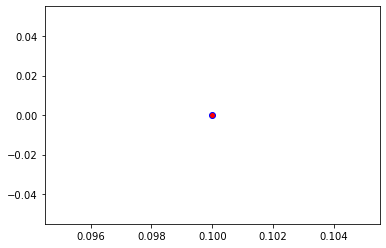

000000568147 704 = parking meter
000000568195 818 = spotlight
000000568213 752 = racket
000000568290 874 = trolleybus
000000568439 734 = police van
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


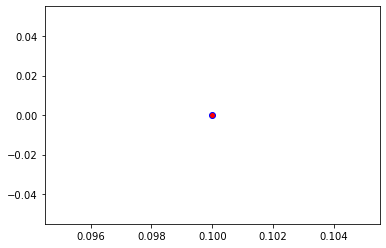

000000568584 669 = mosquito net
000000568690 861 = toilet seat
000000568710 648 = medicine chest
000000568814 903 = wig
000000568981 842 = swimming trunks
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


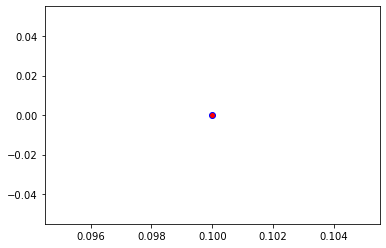

000000569030 646 = maze
000000569059 526 = desk
000000569273 898 = water bottle
000000569565 569 = garbage truck
000000569700 883 = vase
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


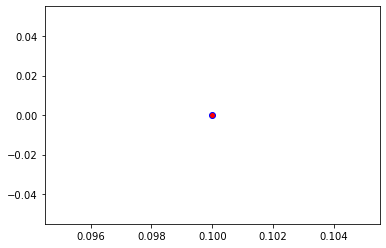

000000569825 701 = parachute
000000569917 435 = tub
000000569972 978 = seashore
000000569976 830 = stretcher
000000570169 855 = thimble
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


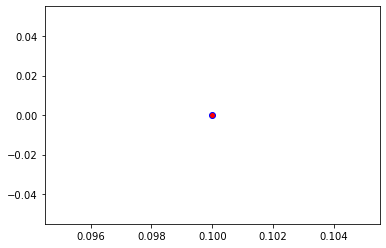

000000570448 978 = seashore
000000570456 831 = studio couch
000000570471 747 = punching bag
000000570539 654 = minibus
000000570664 285 = Egyptian cat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


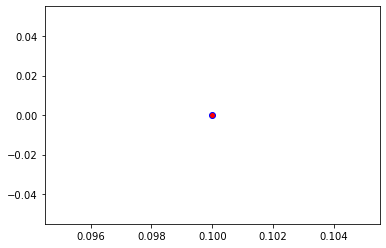

000000570688 701 = parachute
000000570736 435 = bathtub
000000570756 978 = seashore
000000570782 527 = desktop computer
000000570834 671 = mountain bike
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


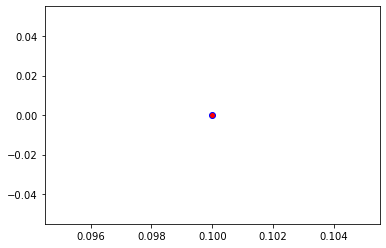

000000571008 919 = street sign
000000571264 665 = moped
000000571313 831 = studio couch
000000571598 457 = bow tie
000000571718 954 = banana
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


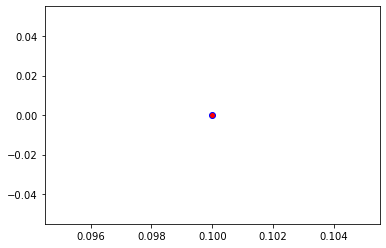

000000571804 334 = cup
000000571857 977 = sandbar
000000571893 413 = rifle
000000571943 920 = traffic light
000000572303 565 = freight car
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


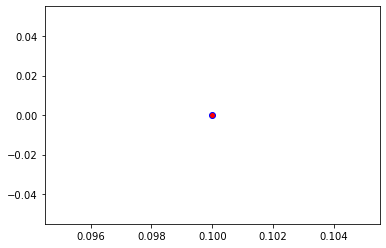

000000572388 223 = schipperke
000000572408 383 = Madagascar cat
000000572462 916 = web site
000000572517 296 = ice bear
000000572555 829 = streetcar
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


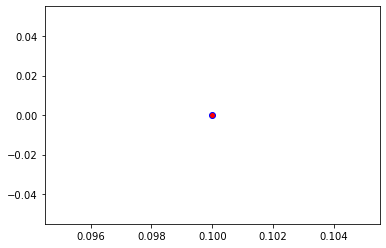

000000572620 880 = unicycle
000000572678 762 = restaurant
000000572900 882 = vacuum
000000572956 670 = motor scooter
000000573008 975 = lakeside
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


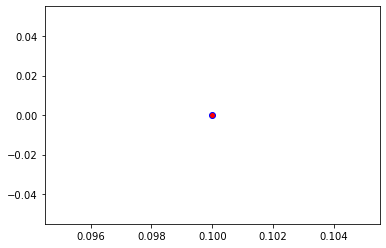

000000573094 665 = moped
000000573258 248 = ski
000000573391 280 = grey fox
000000573626 54 = hog
000000573943 582 = grocery store
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


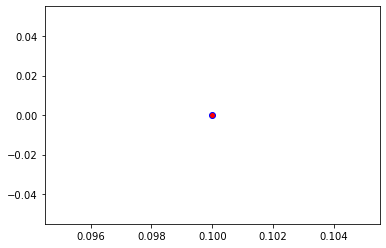

000000574297 562 = fountain
000000574315 285 = Egyptian cat
000000574425 675 = moving van
000000574520 562 = fountain
000000574702 665 = moped
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


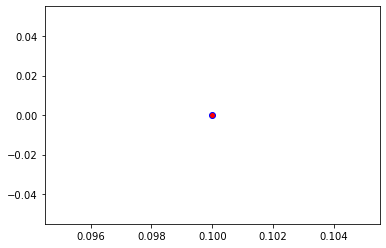

000000574810 283 = Persian cat
000000574823 981 = ballplayer
000000575081 543 = dumbbell
000000575187 4 = hammer
000000575205 702 = parallel bars
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


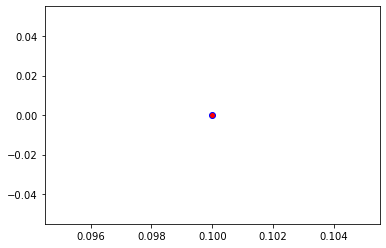

000000575243 421 = bannister
000000575357 177 = Scottish deerhound
000000575372 920 = traffic light
000000575500 954 = banana
000000575815 861 = toilet seat
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


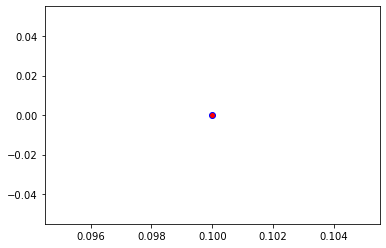

000000575970 624 = library
000000576031 248 = ski
000000576052 354 = Arabian camel
000000576566 670 = motor scooter
000000576654 701 = parachute
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


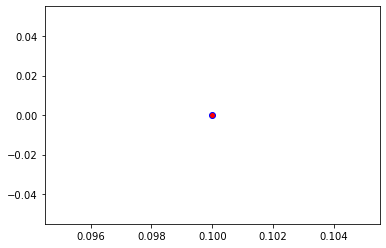

000000576955 562 = fountain
000000577149 340 = zebra
000000577182 703 = park bench
000000577539 818 = spotlight
000000577584 894 = wardrobe
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


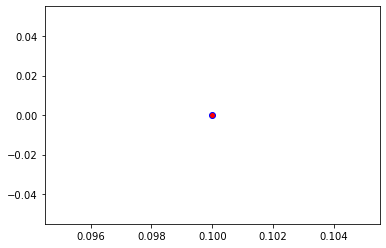

000000577735 428 = barrow
000000577862 251 = dalmatian
000000577864 641 = maraca
000000577932 523 = crutch
000000577959 978 = seashore
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


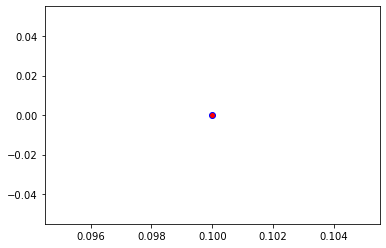

000000577976 324 = cab
000000578093 466 = bullet train
000000578236 39 = common iguana
000000578489 461 = breastplate
000000578500 762 = restaurant
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.4000000059604645
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


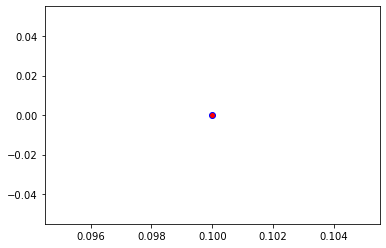

000000578545 831 = studio couch
000000578792 479 = car wheel
000000578871 572 = goblet
000000578922 632 = loudspeaker
000000578967 705 = passenger car
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


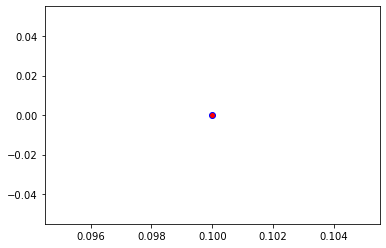

000000579070 898 = water bottle
000000579091 924 = guacamole
000000579158 404 = airliner
000000579307 801 = snorkel
000000579321 199 = Scotch terrier
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


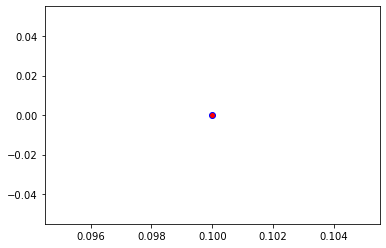

000000579635 977 = sandbar
000000579655 841 = sweatshirt
000000579818 706 = patio
000000579893 919 = street sign
000000579900 818 = spotlight
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


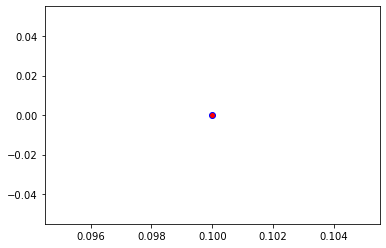

000000579902 518 = crash helmet
000000579970 624 = library
000000580197 457 = bow tie
000000580294 909 = wok
000000580410 831 = studio couch
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


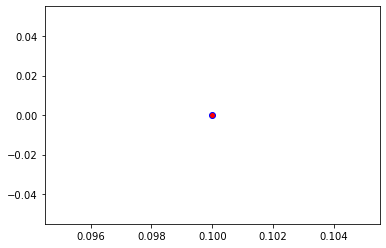

000000580418 37 = ox
000000580757 614 = kimono
000000581062 428 = barrow
000000581100 537 = dogsled
000000581206 584 = hair slide
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.20000000298023224
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


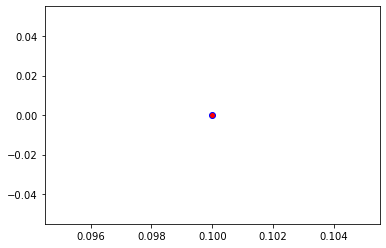

000000581317 400 = gown
000000581357 916 = web site
000000581482 884 = vault
000000581615 861 = toilet seat
000000581781 788 = shoe shop
Min values in image-array: 0.0 Max values in image-array: 255.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.0
LinfProjectedGradientDescentAttack(rel_stepsize=0.03333333333333333, abs_stepsize=None, steps=40, random_start=True)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)


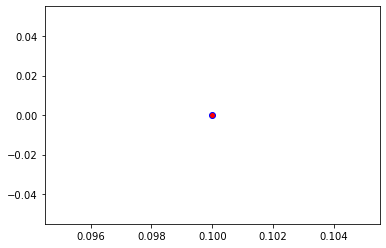

In [11]:
# divide files into successive n-sized chunks.
def divide_chunks(l, n):
    # looping till length l
    for i in range(0, len(l), n): 
        yield l[i:i + n]

# load images into a list
list_images = glob.glob('datasets/coco_original/data/*.jpg')
# size of batches that are created from list of images
n = 5
batches = list(divide_chunks(list_images, n))

# for each batch do following steps
# 1: Process image and get original image name and predict class for image.
# 2: Convert the image pixel values and labels for foolbox approved type
# 3: Create attack
# 4: Save crafted images into folder
for batch in batches:
    own_images = [] #preprocessed images
    image_probabilities = []
    image_ids = []
    original_name = []


    for fname in batch:
        image_name = fname.split('data\\')[1]
        original_name.append(image_name.split('.jpg')[0])
        image_raw = tf.io.read_file(fname)
        image = tf.image.decode_image(image_raw)
        image = preprocess(image)
        own_images.append(image)
        image_probs = pretrained_model.predict(image)
        image_probabilities.append(image_probs)    
    if path.exists('data/{}'.format(image_name)):
        print('Adversarial file exists')
        continue
    for x, y, name in zip(own_images, image_probabilities, original_name):
        #plt.figure()
        #plt.imshow(x[0] * 0.5 + 0.5)  # To change [-1, 1] to [0,1]?
        _, image_class, class_confidence = get_imagenet_label(y)
        image_class = image_class.replace("_", " ")
        print(name, str(find_label_id(image_class)) + ' = ' + image_class) # if none error incurs later
        image_ids.append(find_label_id(image_class))
        #plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
        #plt.close()



    # Prints values of pixels
    print('Min values in image-array: ' + str(np.amin(own_images)) + ' Max values in image-array: ' + str(np.amax(own_images)))
    #Convert own images and corresponding labels for foolbox approved type
    own_images_tf = []
    own_labels_tf = tf.convert_to_tensor(image_ids, dtype=tf.int32)
    for x in own_images.copy():
        a = tf.squeeze(x)
        a = a/255 # shift from [0,255] to [0,1]
        own_images_tf.append(a)
    own_images_tf = tf.convert_to_tensor(own_images_tf, dtype=tf.float32)
    # Prints values of pixels after processing
    print('Min values in image-array: ' + str(np.amin(own_images_tf)) + ' Max values in image-array: ' + str(np.amax(own_images_tf)))
    # Testing that conversion works
    #fb.plot.images(own_images_tf)
    accuracy = fb.utils.accuracy(fmodel, own_images_tf, own_labels_tf)
    print('Model accuracy on own images:', accuracy)



    # instantiate the corresponding attack class
    def attack_type(attack):
        if attack == 'LinfPGD':
            return fb.attacks.LinfProjectedGradientDescentAttack()
        elif attack == 'FGSM':
            return fb.attacks.LinfFastGradientAttack()
        elif attack == 'CW_L2':
            return fb.attacks.L2CarliniWagnerAttack()
        elif attack == 'DeepFool':
            return fb.attacks.L2DeepFoolAttack()
        else:
            print('Select valid attack')

    #steps = 10
    #epsilons = np.linspace(0.0, 0.10, num=steps)
    epsilons = [0.1]
    attacks = ['LinfPGD',
              'FGSM',
              'CW_L2',
              'DeepFool']
    attack = attack_type(attacks[0])
    print(attack)
    # use eagerpy tensors own images
    images = ep.astensor(own_images_tf)
    labels = ep.astensor(own_labels_tf)
    # all are tensors
    # raw = The raw adversarial examples. --> depends on attack
    # clipped = The clipped adversarial examples --> guaranteed to not be perturbed more than epsilon.
    # is_adv = boolean for each sample image. True if misclassified and within the epsilon balls around the clean sample.
    raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=epsilons)
    print(is_adv.float32().mean(axis=-1))
    robust_accuracy = 1 - is_adv.float32().mean(axis=-1)
    # show accuracy vs epsilons
    plt.plot(epsilons, robust_accuracy.numpy(), color='blue', linestyle='solid', marker='o', markerfacecolor='red')
    plt.show()
    plt.close()



    # Creates figure object containing image, class and class confidence
    class MyFigure:
        def __init__(self, image , image_class, class_confidence):
            self.image = image
            self.image_class = image_class
            self.class_confidence = class_confidence

    # Save images
    def save_images(images):
        for x in range(0, len(images)):
            _, image_class, class_confidence = get_imagenet_label(image_probs)
            name = original_name[x]
            try:
                plt.imsave('data/{}.jpg'.format(original_name[x]), images[x].image)
            except:
                print('ERROR while saving')


    for perturbed_step, epsilon in zip(clipped, epsilons):
        list_of_figures = []

        for x in perturbed_step:
            x = x.numpy()
            image = np.expand_dims(x, axis=0)
            image_probs = pretrained_model.predict(image)
            _, image_class, class_confidence = get_imagenet_label(image_probs)       

            #create fig object
            a = MyFigure(x, image_class, class_confidence)
            list_of_figures.append(a)

        save_images(list_of_figures)

Epsilon value of adversary: 0.1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


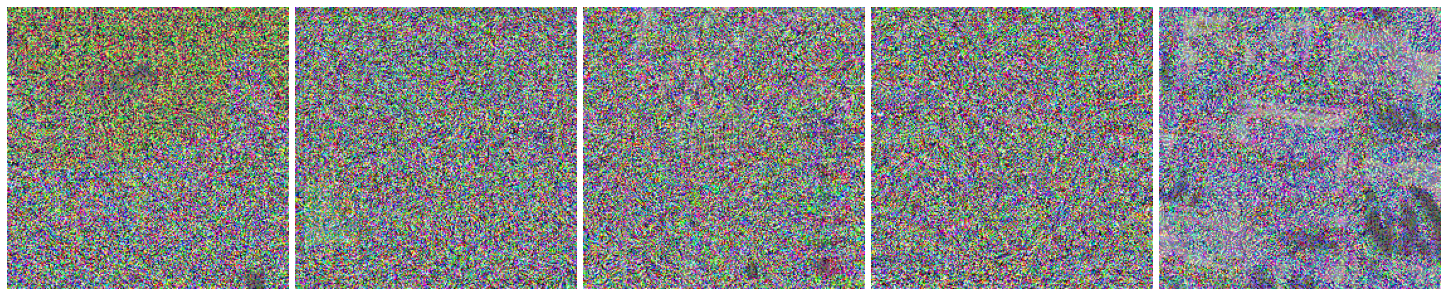

In [12]:
# show adversary
for adversary, epsilon in zip(clipped, epsilons):
    print('Epsilon value of adversary:', str(epsilon))
    fb.plot.images(adversary - images, bounds=(-0.1, 0.1), scale=4.)
    plt.show()
    plt.close()

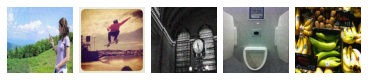

In [13]:
# show adversarial images using fb.plot
for adversary in clipped:
    fb.plot.images(adversary)
    plt.show()
    plt.close()

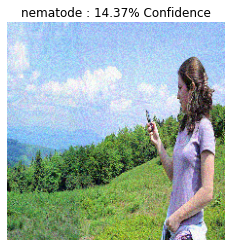

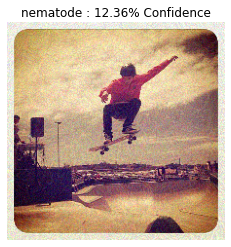

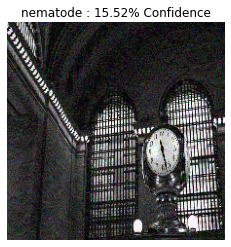

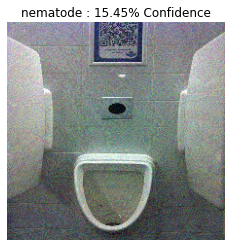

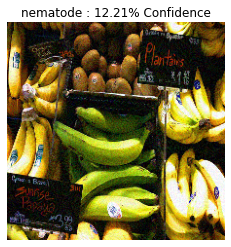

In [14]:
# helper variables for visualizing only one image
row_number = 0 # 0-len(epsilon)

raw_adversarial_images = raw[row_number].numpy()
clipped_adversarial_images = clipped[row_number].numpy()

# Predict adversarial image and show visualization
for x in clipped_adversarial_images:
    image = np.expand_dims(x, axis=0)
    image_probs = pretrained_model.predict(image)
    plt.figure()
    plt.imshow(x)  # To change [-1, 1] to [0,1] #  * 0.5 + 0.2
    _, image_class, class_confidence = get_imagenet_label(image_probs)
    plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
    plt.axis('off')
    plt.show()